# SO SÁNH VỀ SỰ HIỆU QUẢ CỦA MẠNG LƯỚI THẦN KINH KAN VỚI MỘT SỐ PHƯƠNG PHÁP HỌC MÁY THÔNG DỤNG

### 1. Mount Gdrive

In [1]:
#@markdown # Connect Google Drive
from google.colab import drive
from IPython.display import clear_output
import ipywidgets as widgets
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)
Shared_Drive = "" #@param {type:"string"}
#@markdown - Leave empty if you're not using a shared drive

print("Connecting...")
drive.mount('/content/gdrive')

if Shared_Drive!="" and os.path.exists("/content/gdrive/Shareddrives"):
  mainpth="Shareddrives/"+Shared_Drive
else:
  mainpth="MyDrive"

clear_output()
inf('\u2714 Done','success', '50px')

#@markdown ---

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

### 2. Setup Library

In [2]:
!pip install tqdm torchinfo torchmetrics accelerate wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 11.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl 

In [3]:
%cd /content/gdrive/MyDrive/FAIR/2024/Convolutional-KANs

/content/gdrive/MyDrive/FAIR/2024/Convolutional-KANs


In [ ]:
# !pip install -r requirements.txt

### 3. Import library

In [4]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

from architectures.CKAN_BN import CKAN_BN
from architectures.SimpleModels import *
from architectures.ConvNet import ConvNet
from architectures.KANConvs_MLP import KANC_MLP
from architectures.KKAN import KKAN_Convolutional_Network
from architectures.conv_and_kan import NormalConvsKAN

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('../cifar-10-batches-py'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../cifar-10-batches-py/test_batch
../cifar-10-batches-py/data_batch_3
../cifar-10-batches-py/data_batch_2
../cifar-10-batches-py/data_batch_5
../cifar-10-batches-py/data_batch_1
../cifar-10-batches-py/data_batch_4
../cifar-10-batches-py/batches.meta


In [6]:
import torchvision
import torch.nn.functional as F

from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import torchvision.datasets as datasets

import math
import wandb

### 4. CIFAR10 dataset

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batchSize = 64

dataset = torchvision.datasets.CIFAR10(root="/content/gdrive/MyDrive/FAIR/2024/", train=True, download=False, transform=transform) #transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root="/content/gdrive/MyDrive/FAIR/2024/", train=False, download=False, transform=transform) #transforms.ToTensor())

trainset, validateset = random_split(dataset, [45000, 5000])

trainloader = DataLoader(trainset, batchSize, shuffle=True)
validateloader = DataLoader(validateset, batchSize, shuffle=True)
testloader = DataLoader(testset, batch_size=batchSize, shuffle=False)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

### 5. MNIST dataset

In [7]:
# Transformaciones
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Cargar MNIST y filtrar por dos clases
mnist_train = MNIST(root='./data', train=True, download=False, transform=transform)

mnist_test = MNIST(root='./data', train=False, download=False, transform=transform)

# DataLoader
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)

In [8]:
len(train_loader)

938

###7. Function to train 7 test model

In [9]:
def train(model, device, train_loader, optimizer, epoch, criterion):
    """
    Train the model for one epoch

    Args:
        model: the neural network model
        device: cuda or cpu
        train_loader: DataLoader for training data
        optimizer: the optimizer to use (e.g. SGD)
        epoch: the current epoch
        criterion: the loss function (e.g. CrossEntropy)

    Returns:
        avg_loss: the average loss over the training set
    """

    model.to(device)
    model.train()
    train_loss = 0
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(tqdm(train_loader)):
        running_loss = 0.0
        # Recall that GPU is optimized for the operations we are dealing with
        data, target = data.to(device), target.to(device)

        # Reset the optimizer
        optimizer.zero_grad()

        # Push the data forward through the model layers
        output = model(data)

        # Get the loss
        loss = criterion(output, target)

        # Keep a running total
        train_loss += loss.item()

        # Backpropagate
        loss.backward()
        optimizer.step()

        #wandb training log
        running_loss += loss.item()
        if batch_idx % 10 == 9:    # print every 10 mini-batches
          avg_loss = running_loss / (batch_idx+1)
          print(f'[{batch_idx + 1}, {batch_idx + 1:5d}] loss: {avg_loss:.3f}')
          wandb.log({"batch": batch_idx + 1, "loss": avg_loss})
          running_loss = 0.0
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    # print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

def test(model, device, test_loader, criterion):
    """
    Test the model

    Args:
        model: the neural network model
        device: cuda or cpu
        test_loader: DataLoader for test data
        criterion: the loss function (e.g. CrossEntropy)

    Returns:
        test_loss: the average loss over the test set
        accuracy: the accuracy of the model on the test set
        precision: the precision of the model on the test set
        recall: the recall of the model on the test set
        f1: the f1 score of the model on the test set
    """

    model.eval()
    test_loss = 0
    correct = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            # Get the predicted classes for this batch
            output = model(data)

            # Calculate the loss for this batch
            test_loss += criterion(output, target).item()

            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += (target == predicted).sum().item()

            # Collect all targets and predictions for metric calculations
            all_targets.extend(target.view_as(predicted).cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Calculate overall metrics
    precision = precision_score(all_targets, all_predictions, average='macro')
    recall = recall_score(all_targets, all_predictions, average='macro')
    f1 = f1_score(all_targets, all_predictions, average='macro')

    # Normalize test loss
    test_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset)

    # print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}\n'.format(
    #     test_loss, correct, len(test_loader.dataset), accuracy, precision, recall, f1))

    return test_loss, accuracy, precision, recall, f1

In [10]:
def train_and_test_models(model, device, train_loader, test_loader, optimizer, criterion, epochs, scheduler):
    """
    Train and test the model

    Args:
        model: the neural network model
        device: cuda or cpu
        train_loader: DataLoader for training data
        test_loader: DataLoader for test data
        optimizer: the optimizer to use (e.g. SGD)
        criterion: the loss function (e.g. CrossEntropy)
        epochs: the number of epochs to train
        scheduler: the learning rate scheduler

    Returns:
        all_train_loss: a list of the average training loss for each epoch
        all_test_loss: a list of the average test loss for each epoch
        all_test_accuracy: a list of the accuracy for each epoch
        all_test_precision: a list of the precision for each epoch
        all_test_recall: a list of the recall for each epoch
        all_test_f1: a list of the f1 score for each epoch
    """
    # Track metrics
    all_train_loss = []
    all_test_loss = []
    all_test_accuracy = []
    all_test_precision = []
    all_test_recall = []
    all_test_f1 = []

    for epoch in range(1, epochs + 1):
        # Train the model

        train_loss = train(model, device, train_loader, optimizer, epoch, criterion)
        all_train_loss.append(train_loss)

        # Test the model
        test_loss, test_accuracy, test_precision, test_recall, test_f1 = test(model, device, test_loader, criterion)
        all_test_loss.append(test_loss)
        all_test_accuracy.append(test_accuracy)
        all_test_precision.append(test_precision)
        all_test_recall.append(test_recall)
        all_test_f1.append(test_f1)

        print(f'End of Epoch {epoch}: Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2%}')
        scheduler.step()

    model.all_test_accuracy = all_test_accuracy
    model.all_test_precision = all_test_precision
    model.all_test_f1 = all_test_f1
    model.all_test_recall = all_test_recall

    return all_train_loss, all_test_loss, all_test_accuracy, all_test_precision, all_test_recall, all_test_f1

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### 8. List Models To Train:
- 1 Layer MLP
- ConvNet (Nhỏ)
- ConvNet (Vừa)
- ConvNet (Lớn)
- KANConv & MLP Simple
- Conv & KAN KKAN

In [12]:
epochs = 10
# Initialize wandb
wandb.init(project="fair2024_convkan_compare", entity="toandang76")

# Configurations and hyperparameters tracked by wandb
wandb.config = {
  "learning_rate": 0.001,
  "epochs": epochs,
  "batch_size": len(train_loader.dataset) / len(train_loader)
}

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


#### - CNN (Small)

In [12]:
%%time
model_SimpleCNN = SimpleCNN()
model_SimpleCNN.to(device)
optimizer_SimpleCNN = optim.AdamW(model_SimpleCNN.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_SimpleCNN = optim.lr_scheduler.ExponentialLR(optimizer_SimpleCNN, gamma=0.8)
criterion_SimpleCNN = nn.CrossEntropyLoss()
all_train_loss_SimpleCNN, all_test_loss_SimpleCNN, all_test_accuracy_SimpleCNN, all_test_precision_SimpleCNN, all_test_recall_SimpleCNN, all_test_f1_SimpleCNN = train_and_test_models(model_SimpleCNN, device, train_loader, test_loader, optimizer_SimpleCNN, criterion_SimpleCNN, epochs=epochs, scheduler=scheduler_SimpleCNN)

  2%|▏         | 21/938 [00:01<00:34, 26.73it/s]

[10,    10] loss: 0.227
[20,    20] loss: 0.111


  4%|▍         | 41/938 [00:01<00:19, 45.36it/s]

[30,    30] loss: 0.072
[40,    40] loss: 0.052


  6%|▋         | 60/938 [00:02<00:16, 52.69it/s]

[50,    50] loss: 0.039
[60,    60] loss: 0.030


  8%|▊         | 79/938 [00:02<00:14, 58.35it/s]

[70,    70] loss: 0.021
[80,    80] loss: 0.016


 10%|▉         | 91/938 [00:02<00:18, 45.47it/s]

[90,    90] loss: 0.011


 11%|█         | 105/938 [00:03<00:23, 34.76it/s]

[100,   100] loss: 0.009


 12%|█▏        | 113/938 [00:03<00:24, 33.37it/s]

[110,   110] loss: 0.006


 13%|█▎        | 121/938 [00:03<00:34, 23.63it/s]

[120,   120] loss: 0.006


 14%|█▍        | 134/938 [00:04<00:30, 26.22it/s]

[130,   130] loss: 0.004


 15%|█▌        | 145/938 [00:04<00:27, 29.15it/s]

[140,   140] loss: 0.004


 16%|█▌        | 151/938 [00:04<00:27, 28.72it/s]

[150,   150] loss: 0.004


 18%|█▊        | 167/938 [00:05<00:22, 33.67it/s]

[160,   160] loss: 0.002
[170,   170] loss: 0.002


 20%|█▉        | 186/938 [00:05<00:15, 48.54it/s]

[180,   180] loss: 0.003
[190,   190] loss: 0.002


 23%|██▎       | 212/938 [00:06<00:12, 57.20it/s]

[200,   200] loss: 0.002
[210,   210] loss: 0.002


 25%|██▍       | 231/938 [00:06<00:11, 58.96it/s]

[220,   220] loss: 0.001
[230,   230] loss: 0.002


 26%|██▌       | 245/938 [00:06<00:11, 58.70it/s]

[240,   240] loss: 0.002
[250,   250] loss: 0.001


 29%|██▉       | 271/938 [00:07<00:11, 58.41it/s]

[260,   260] loss: 0.001
[270,   270] loss: 0.001


 31%|███       | 291/938 [00:07<00:11, 58.69it/s]

[280,   280] loss: 0.001
[290,   290] loss: 0.001


 33%|███▎      | 311/938 [00:07<00:10, 58.24it/s]

[300,   300] loss: 0.002
[310,   310] loss: 0.001


 35%|███▌      | 330/938 [00:08<00:10, 58.66it/s]

[320,   320] loss: 0.001
[330,   330] loss: 0.001


 37%|███▋      | 348/938 [00:08<00:10, 54.39it/s]

[340,   340] loss: 0.001


 38%|███▊      | 360/938 [00:08<00:10, 52.56it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.001


 41%|████      | 380/938 [00:09<00:09, 57.83it/s]

[370,   370] loss: 0.001
[380,   380] loss: 0.001


 43%|████▎     | 399/938 [00:09<00:08, 60.00it/s]

[390,   390] loss: 0.001
[400,   400] loss: 0.001


 45%|████▍     | 418/938 [00:09<00:08, 57.95it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.001


 47%|████▋     | 438/938 [00:10<00:08, 60.51it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.001


 49%|████▉     | 458/938 [00:10<00:07, 60.72it/s]

[450,   450] loss: 0.001
[460,   460] loss: 0.001


 51%|█████     | 479/938 [00:10<00:07, 59.46it/s]

[470,   470] loss: 0.001
[480,   480] loss: 0.001


 53%|█████▎    | 498/938 [00:11<00:07, 59.72it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 55%|█████▌    | 516/938 [00:11<00:09, 44.15it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 526/938 [00:11<00:09, 41.99it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 536/938 [00:12<00:09, 43.00it/s]

[530,   530] loss: 0.001


 58%|█████▊    | 546/938 [00:12<00:09, 43.52it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 556/938 [00:12<00:09, 38.59it/s]

[550,   550] loss: 0.000


 60%|██████    | 566/938 [00:12<00:09, 39.34it/s]

[560,   560] loss: 0.000


 61%|██████▏   | 576/938 [00:13<00:08, 41.56it/s]

[570,   570] loss: 0.000


 63%|██████▎   | 587/938 [00:13<00:07, 44.79it/s]

[580,   580] loss: 0.000


 64%|██████▍   | 598/938 [00:13<00:07, 46.27it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 603/938 [00:13<00:07, 43.61it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 618/938 [00:14<00:08, 39.69it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 626/938 [00:14<00:08, 38.92it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 634/938 [00:14<00:08, 36.75it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 647/938 [00:14<00:07, 38.01it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 655/938 [00:15<00:07, 36.44it/s]

[650,   650] loss: 0.000


 72%|███████▏  | 671/938 [00:15<00:05, 45.57it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 689/938 [00:15<00:04, 53.02it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 75%|███████▌  | 708/938 [00:16<00:04, 56.66it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 728/938 [00:16<00:03, 59.84it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|███████▉  | 748/938 [00:16<00:03, 61.07it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 769/938 [00:17<00:02, 60.90it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 790/938 [00:17<00:02, 64.04it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▋ | 811/938 [00:17<00:02, 59.67it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 830/938 [00:18<00:01, 57.46it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 91%|█████████ | 850/938 [00:18<00:01, 61.00it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.001


 93%|█████████▎| 869/938 [00:18<00:01, 57.21it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 889/938 [00:19<00:00, 60.95it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 910/938 [00:19<00:00, 61.79it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 930/938 [00:19<00:00, 57.83it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:19<00:00, 47.05it/s]


End of Epoch 1: Train Loss: 0.417351, Test Loss: 0.0023, Accuracy: 95.56%


  1%|          | 7/938 [00:00<00:14, 63.97it/s]

[10,    10] loss: 0.008


  2%|▏         | 21/938 [00:00<00:15, 59.49it/s]

[20,    20] loss: 0.005


  3%|▎         | 27/938 [00:00<00:16, 55.57it/s]

[30,    30] loss: 0.002


  4%|▍         | 40/938 [00:00<00:15, 58.90it/s]

[40,    40] loss: 0.005


  5%|▍         | 46/938 [00:00<00:15, 58.82it/s]

[50,    50] loss: 0.004


  6%|▋         | 60/938 [00:01<00:14, 61.65it/s]

[60,    60] loss: 0.002


  7%|▋         | 67/938 [00:01<00:14, 59.07it/s]

[70,    70] loss: 0.003


  9%|▊         | 80/938 [00:01<00:14, 59.40it/s]

[80,    80] loss: 0.002


  9%|▉         | 86/938 [00:01<00:15, 54.94it/s]

[90,    90] loss: 0.002


 10%|█         | 98/938 [00:01<00:14, 56.60it/s]

[100,   100] loss: 0.002


 12%|█▏        | 111/938 [00:01<00:14, 58.45it/s]

[110,   110] loss: 0.002


 13%|█▎        | 118/938 [00:02<00:13, 59.83it/s]

[120,   120] loss: 0.002


 14%|█▍        | 131/938 [00:02<00:13, 60.01it/s]

[130,   130] loss: 0.001


 15%|█▍        | 138/938 [00:02<00:13, 60.04it/s]

[140,   140] loss: 0.001


 15%|█▌        | 145/938 [00:02<00:14, 55.53it/s]

[150,   150] loss: 0.001


 17%|█▋        | 158/938 [00:02<00:13, 59.52it/s]

[160,   160] loss: 0.001


 18%|█▊        | 165/938 [00:02<00:13, 58.94it/s]

[170,   170] loss: 0.001


 20%|█▉        | 184/938 [00:03<00:15, 47.56it/s]

[180,   180] loss: 0.000


 21%|██        | 194/938 [00:03<00:17, 43.11it/s]

[190,   190] loss: 0.001


 22%|██▏       | 204/938 [00:03<00:16, 43.56it/s]

[200,   200] loss: 0.001


 23%|██▎       | 216/938 [00:03<00:15, 46.41it/s]

[210,   210] loss: 0.001


 24%|██▍       | 226/938 [00:04<00:16, 42.79it/s]

[220,   220] loss: 0.001


 25%|██▌       | 236/938 [00:04<00:16, 42.47it/s]

[230,   230] loss: 0.001


 26%|██▌       | 246/938 [00:04<00:16, 41.83it/s]

[240,   240] loss: 0.001


 27%|██▋       | 257/938 [00:04<00:15, 45.32it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000

 28%|██▊       | 267/938 [00:05<00:15, 44.54it/s]

 29%|██▉       | 272/938 [00:05<00:15, 43.27it/s]

[270,   270] loss: 0.001


 30%|███       | 286/938 [00:05<00:17, 38.11it/s]

[280,   280] loss: 0.000


 31%|███▏      | 294/938 [00:05<00:17, 36.89it/s]

[290,   290] loss: 0.000


 33%|███▎      | 307/938 [00:06<00:16, 38.39it/s]

[300,   300] loss: 0.001


 34%|███▎      | 315/938 [00:06<00:16, 36.94it/s]

[310,   310] loss: 0.000


 35%|███▍      | 327/938 [00:06<00:16, 36.07it/s]

[320,   320] loss: 0.000


 36%|███▌      | 337/938 [00:07<00:14, 41.33it/s]

[330,   330] loss: 0.001
[340,   340] loss: 0.000


 38%|███▊      | 357/938 [00:07<00:10, 54.43it/s]

[350,   350] loss: 0.001
[360,   360] loss: 0.000


 40%|████      | 376/938 [00:07<00:10, 54.51it/s]

[370,   370] loss: 0.001
[380,   380] loss: 0.000


 43%|████▎     | 402/938 [00:08<00:08, 60.23it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 44%|████▍     | 416/938 [00:08<00:08, 61.73it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 46%|████▋     | 436/938 [00:08<00:08, 60.03it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▊     | 457/938 [00:09<00:08, 59.85it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.001


 51%|█████     | 478/938 [00:09<00:07, 62.20it/s]

[470,   470] loss: 0.001
[480,   480] loss: 0.000


 53%|█████▎    | 498/938 [00:09<00:07, 59.75it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 55%|█████▌    | 519/938 [00:10<00:06, 60.79it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.000


 58%|█████▊    | 540/938 [00:10<00:06, 59.88it/s]

[530,   530] loss: 0.000
[540,   540] loss: 0.000


 60%|█████▉    | 561/938 [00:10<00:06, 58.99it/s]

[550,   550] loss: 0.000
[560,   560] loss: 0.000


 62%|██████▏   | 581/938 [00:11<00:06, 59.32it/s]

[570,   570] loss: 0.000
[580,   580] loss: 0.001


 63%|██████▎   | 595/938 [00:11<00:05, 61.43it/s]

[590,   590] loss: 0.000
[600,   600] loss: 0.000


 66%|██████▌   | 621/938 [00:11<00:05, 57.45it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 68%|██████▊   | 642/938 [00:12<00:04, 62.21it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.000


 70%|██████▉   | 656/938 [00:12<00:04, 60.33it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 73%|███████▎  | 681/938 [00:12<00:04, 58.05it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 75%|███████▍  | 700/938 [00:13<00:04, 59.42it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 77%|███████▋  | 718/938 [00:13<00:03, 57.18it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▊  | 737/938 [00:13<00:03, 58.76it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 756/938 [00:14<00:03, 59.25it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 777/938 [00:14<00:02, 58.41it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▍ | 797/938 [00:14<00:02, 59.60it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 817/938 [00:15<00:01, 60.57it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 838/938 [00:15<00:01, 58.32it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████▏| 858/938 [00:15<00:01, 60.19it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 94%|█████████▎| 878/938 [00:16<00:01, 59.44it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 896/938 [00:16<00:00, 53.11it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 921/938 [00:16<00:00, 56.49it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 54.00it/s]

[930,   930] loss: 0.000


End of Epoch 2: Train Loss: 0.145619, Test Loss: 0.0019, Accuracy: 96.42%


  2%|▏         | 18/938 [00:00<00:19, 48.20it/s]

[10,    10] loss: 0.022
[20,    20] loss: 0.010


  3%|▎         | 31/938 [00:00<00:16, 53.96it/s]

[30,    30] loss: 0.003


  4%|▍         | 42/938 [00:01<00:41, 21.64it/s]

[40,    40] loss: 0.001


  6%|▌         | 53/938 [00:01<00:29, 30.26it/s]

[50,    50] loss: 0.004


  7%|▋         | 63/938 [00:01<00:25, 34.32it/s]

[60,    60] loss: 0.002


  7%|▋         | 68/938 [00:02<00:33, 25.94it/s]

[70,    70] loss: 0.001


  9%|▉         | 87/938 [00:03<00:34, 24.62it/s]

[80,    80] loss: 0.002


 10%|█         | 96/938 [00:03<00:26, 32.30it/s]

[90,    90] loss: 0.003


 11%|█▏        | 106/938 [00:03<00:22, 37.66it/s]

[100,   100] loss: 0.000


 12%|█▏        | 115/938 [00:03<00:23, 34.58it/s]

[110,   110] loss: 0.002


 13%|█▎        | 124/938 [00:04<00:21, 37.72it/s]

[120,   120] loss: 0.001


 15%|█▍        | 137/938 [00:04<00:21, 36.82it/s]

[130,   130] loss: 0.001


 15%|█▌        | 145/938 [00:04<00:21, 36.46it/s]

[140,   140] loss: 0.001


 17%|█▋        | 158/938 [00:05<00:20, 38.33it/s]

[150,   150] loss: 0.000


 18%|█▊        | 166/938 [00:05<00:21, 36.09it/s]

[160,   160] loss: 0.001


 19%|█▊        | 174/938 [00:05<00:21, 35.85it/s]

[170,   170] loss: 0.001


 20%|█▉        | 187/938 [00:05<00:19, 38.20it/s]

[180,   180] loss: 0.000


 21%|██▏       | 200/938 [00:06<00:15, 48.61it/s]

[190,   190] loss: 0.001
[200,   200] loss: 0.000


 23%|██▎       | 218/938 [00:06<00:14, 50.62it/s]

[210,   210] loss: 0.000


 25%|██▍       | 231/938 [00:06<00:13, 53.08it/s]

[220,   220] loss: 0.001
[230,   230] loss: 0.000


 27%|██▋       | 251/938 [00:07<00:11, 57.69it/s]

[240,   240] loss: 0.001
[250,   250] loss: 0.000


 28%|██▊       | 265/938 [00:07<00:11, 59.72it/s]

[260,   260] loss: 0.001
[270,   270] loss: 0.000


 31%|███       | 291/938 [00:07<00:11, 57.71it/s]

[280,   280] loss: 0.000
[290,   290] loss: 0.000


 33%|███▎      | 309/938 [00:08<00:10, 57.74it/s]

[300,   300] loss: 0.000
[310,   310] loss: 0.001


 35%|███▍      | 327/938 [00:08<00:11, 52.70it/s]

[320,   320] loss: 0.000


 36%|███▌      | 340/938 [00:08<00:10, 55.34it/s]

[330,   330] loss: 0.001
[340,   340] loss: 0.000


 38%|███▊      | 359/938 [00:08<00:10, 57.72it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.000


 40%|████      | 377/938 [00:09<00:09, 57.19it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 43%|████▎     | 401/938 [00:09<00:09, 54.88it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 45%|████▍     | 418/938 [00:10<00:11, 45.07it/s]

[410,   410] loss: 0.000


 46%|████▌     | 428/938 [00:10<00:11, 43.53it/s]

[420,   420] loss: 0.001


 47%|████▋     | 438/938 [00:10<00:11, 42.10it/s]

[430,   430] loss: 0.001


 48%|████▊     | 448/938 [00:10<00:11, 41.27it/s]

[440,   440] loss: 0.000


 49%|████▉     | 458/938 [00:11<00:11, 40.22it/s]

[450,   450] loss: 0.000


 50%|████▉     | 468/938 [00:11<00:11, 41.12it/s]

[460,   460] loss: 0.000


 50%|█████     | 473/938 [00:11<00:11, 40.41it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 488/938 [00:11<00:10, 42.65it/s]

[480,   480] loss: 0.001


 53%|█████▎    | 498/938 [00:12<00:10, 41.15it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 507/938 [00:12<00:11, 38.11it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 515/938 [00:12<00:11, 36.27it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 523/938 [00:12<00:12, 34.10it/s]

[520,   520] loss: 0.001


 57%|█████▋    | 535/938 [00:13<00:11, 35.86it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 547/938 [00:13<00:10, 36.02it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 555/938 [00:13<00:11, 33.10it/s]

[550,   550] loss: 0.000


 60%|██████    | 566/938 [00:13<00:08, 42.37it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 62%|██████▏   | 586/938 [00:14<00:06, 51.24it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 64%|██████▍   | 605/938 [00:14<00:05, 56.03it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 631/938 [00:15<00:05, 58.73it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 650/938 [00:15<00:05, 56.88it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████   | 662/938 [00:15<00:05, 52.45it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 680/938 [00:16<00:05, 44.54it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 74%|███████▍  | 692/938 [00:16<00:04, 49.49it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 705/938 [00:16<00:06, 33.69it/s]

[700,   700] loss: 0.000


 77%|███████▋  | 718/938 [00:17<00:05, 43.54it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▊  | 737/938 [00:17<00:03, 51.12it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 743/938 [00:17<00:05, 34.94it/s]

[740,   740] loss: 0.000


 81%|████████  | 761/938 [00:18<00:03, 46.21it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 779/938 [00:18<00:03, 52.13it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▍ | 797/938 [00:18<00:02, 55.59it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 88%|████████▊ | 822/938 [00:19<00:01, 58.58it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 90%|████████▉ | 840/938 [00:19<00:01, 56.47it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 92%|█████████▏| 859/938 [00:19<00:01, 58.54it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 94%|█████████▎| 878/938 [00:20<00:01, 58.57it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 896/938 [00:20<00:00, 56.95it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 921/938 [00:20<00:00, 57.90it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:21<00:00, 44.35it/s]


[930,   930] loss: 0.000
End of Epoch 3: Train Loss: 0.123594, Test Loss: 0.0016, Accuracy: 96.72%


  1%|          | 7/938 [00:00<00:15, 60.74it/s]

[10,    10] loss: 0.005


  2%|▏         | 21/938 [00:00<00:15, 58.18it/s]

[20,    20] loss: 0.003


  3%|▎         | 28/938 [00:00<00:15, 59.65it/s]

[30,    30] loss: 0.003


  5%|▍         | 45/938 [00:00<00:20, 44.58it/s]

[40,    40] loss: 0.001


  6%|▌         | 55/938 [00:01<00:20, 42.28it/s]

[50,    50] loss: 0.003


  7%|▋         | 65/938 [00:01<00:19, 43.70it/s]

[60,    60] loss: 0.002


  8%|▊         | 75/938 [00:01<00:21, 40.41it/s]

[70,    70] loss: 0.003


  9%|▉         | 85/938 [00:01<00:20, 40.86it/s]

[80,    80] loss: 0.002


 10%|█         | 95/938 [00:02<00:22, 37.37it/s]

[90,    90] loss: 0.001


 11%|█         | 105/938 [00:02<00:20, 40.66it/s]

[100,   100] loss: 0.001


 12%|█▏        | 115/938 [00:02<00:18, 43.60it/s]

[110,   110] loss: 0.000


 13%|█▎        | 125/938 [00:02<00:19, 42.06it/s]

[120,   120] loss: 0.002


 14%|█▍        | 134/938 [00:03<00:20, 38.70it/s]

[130,   130] loss: 0.000


 16%|█▌        | 146/938 [00:03<00:21, 36.27it/s]

[140,   140] loss: 0.000


 16%|█▋        | 154/938 [00:03<00:20, 37.45it/s]

[150,   150] loss: 0.001


 18%|█▊        | 167/938 [00:04<00:20, 37.59it/s]

[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:04<00:20, 36.96it/s]

[170,   170] loss: 0.001


 20%|█▉        | 183/938 [00:04<00:21, 35.30it/s]

[180,   180] loss: 0.001


 21%|██▏       | 200/938 [00:04<00:15, 48.16it/s]

[190,   190] loss: 0.001
[200,   200] loss: 0.000


 23%|██▎       | 216/938 [00:05<00:14, 49.71it/s]

[210,   210] loss: 0.000
[220,   220] loss: 0.001


 26%|██▌       | 241/938 [00:05<00:12, 56.44it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.000


 28%|██▊       | 261/938 [00:05<00:12, 56.06it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000


 30%|██▉       | 280/938 [00:06<00:11, 58.54it/s]

[270,   270] loss: 0.000
[280,   280] loss: 0.001


 32%|███▏      | 300/938 [00:06<00:10, 61.63it/s]

[290,   290] loss: 0.001
[300,   300] loss: 0.000


 34%|███▍      | 321/938 [00:06<00:10, 60.41it/s]

[310,   310] loss: 0.000
[320,   320] loss: 0.001


 36%|███▋      | 341/938 [00:07<00:10, 57.12it/s]

[330,   330] loss: 0.000
[340,   340] loss: 0.000


 38%|███▊      | 360/938 [00:07<00:09, 59.20it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.001


 41%|████      | 380/938 [00:07<00:09, 61.83it/s]

[370,   370] loss: 0.001
[380,   380] loss: 0.000


 43%|████▎     | 400/938 [00:08<00:09, 58.32it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 45%|████▍     | 420/938 [00:08<00:08, 60.04it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 47%|████▋     | 441/938 [00:08<00:08, 58.98it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▉     | 459/938 [00:09<00:08, 56.68it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.001


 51%|█████     | 479/938 [00:09<00:07, 60.55it/s]

[470,   470] loss: 0.000
[480,   480] loss: 0.000


 53%|█████▎    | 500/938 [00:09<00:07, 58.81it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 55%|█████▌    | 519/938 [00:10<00:07, 58.76it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.000


 57%|█████▋    | 538/938 [00:10<00:06, 60.48it/s]

[530,   530] loss: 0.000
[540,   540] loss: 0.000


 60%|█████▉    | 559/938 [00:10<00:06, 59.31it/s]

[550,   550] loss: 0.000
[560,   560] loss: 0.000


 62%|██████▏   | 578/938 [00:11<00:06, 58.45it/s]

[570,   570] loss: 0.000
[580,   580] loss: 0.000


 64%|██████▍   | 598/938 [00:11<00:05, 61.60it/s]

[590,   590] loss: 0.000
[600,   600] loss: 0.000


 66%|██████▌   | 619/938 [00:11<00:05, 59.48it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 68%|██████▊   | 638/938 [00:12<00:05, 57.92it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.000


 70%|███████   | 658/938 [00:12<00:04, 60.12it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 72%|███████▏  | 677/938 [00:12<00:04, 57.71it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 74%|███████▍  | 696/938 [00:13<00:04, 58.59it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 76%|███████▋  | 716/938 [00:13<00:03, 60.81it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▊  | 737/938 [00:14<00:03, 59.40it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 761/938 [00:14<00:03, 57.01it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 774/938 [00:14<00:03, 50.83it/s]

[770,   770] loss: 0.000


 84%|████████▎ | 785/938 [00:14<00:03, 43.16it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 795/938 [00:15<00:03, 42.05it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 805/938 [00:15<00:03, 42.01it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 815/938 [00:15<00:02, 41.22it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 825/938 [00:15<00:02, 41.69it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 835/938 [00:16<00:02, 43.49it/s]

[830,   830] loss: 0.000


 90%|█████████ | 845/938 [00:16<00:02, 43.57it/s]

[840,   840] loss: 0.000


 91%|█████████ | 855/938 [00:16<00:01, 45.89it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 93%|█████████▎| 876/938 [00:17<00:01, 41.34it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 886/938 [00:17<00:01, 38.10it/s]

[880,   880] loss: 0.000


 95%|█████████▌| 894/938 [00:17<00:01, 37.30it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 906/938 [00:17<00:00, 37.56it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 914/938 [00:18<00:00, 33.65it/s]

[910,   910] loss: 0.000


 99%|█████████▉| 930/938 [00:18<00:00, 44.15it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 50.20it/s]


End of Epoch 4: Train Loss: 0.111306, Test Loss: 0.0015, Accuracy: 96.88%


  1%|          | 7/938 [00:00<00:14, 62.56it/s]

[10,    10] loss: 0.002


  2%|▏         | 21/938 [00:00<00:15, 58.33it/s]

[20,    20] loss: 0.001


  3%|▎         | 27/938 [00:00<00:15, 58.59it/s]

[30,    30] loss: 0.003


  4%|▍         | 40/938 [00:00<00:15, 58.83it/s]

[40,    40] loss: 0.005


  5%|▍         | 46/938 [00:00<00:15, 57.87it/s]

[50,    50] loss: 0.001


  6%|▋         | 60/938 [00:01<00:14, 59.21it/s]

[60,    60] loss: 0.001


  8%|▊         | 79/938 [00:01<00:14, 58.74it/s]

[70,    70] loss: 0.001
[80,    80] loss: 0.002


 10%|█         | 98/938 [00:01<00:14, 58.88it/s]

[90,    90] loss: 0.000
[100,   100] loss: 0.001


 13%|█▎        | 118/938 [00:02<00:13, 59.99it/s]

[110,   110] loss: 0.001
[120,   120] loss: 0.000


 15%|█▍        | 138/938 [00:02<00:13, 59.95it/s]

[130,   130] loss: 0.001
[140,   140] loss: 0.001


 17%|█▋        | 158/938 [00:02<00:13, 57.65it/s]

[150,   150] loss: 0.001
[160,   160] loss: 0.000


 19%|█▉        | 178/938 [00:03<00:12, 58.84it/s]

[170,   170] loss: 0.000
[180,   180] loss: 0.001


 21%|██        | 197/938 [00:03<00:12, 60.24it/s]

[190,   190] loss: 0.001
[200,   200] loss: 0.000


 23%|██▎       | 217/938 [00:03<00:12, 58.11it/s]

[210,   210] loss: 0.000
[220,   220] loss: 0.001


 25%|██▌       | 237/938 [00:04<00:12, 58.24it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.000


 27%|██▋       | 256/938 [00:04<00:11, 58.06it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000


 29%|██▉       | 276/938 [00:04<00:11, 58.42it/s]

[270,   270] loss: 0.000
[280,   280] loss: 0.000


 32%|███▏      | 296/938 [00:05<00:11, 56.68it/s]

[290,   290] loss: 0.000
[300,   300] loss: 0.000


 34%|███▎      | 316/938 [00:05<00:10, 59.83it/s]

[310,   310] loss: 0.000
[320,   320] loss: 0.001


 36%|███▌      | 337/938 [00:05<00:10, 59.56it/s]

[330,   330] loss: 0.000
[340,   340] loss: 0.000


 38%|███▊      | 356/938 [00:06<00:10, 57.28it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.000


 41%|████      | 381/938 [00:06<00:09, 59.08it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 42%|████▏     | 395/938 [00:06<00:09, 58.17it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 44%|████▍     | 416/938 [00:07<00:08, 58.36it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 46%|████▋     | 435/938 [00:07<00:08, 57.47it/s]

[430,   430] loss: 0.000


 48%|████▊     | 447/938 [00:07<00:10, 48.58it/s]

[440,   440] loss: 0.000


 49%|████▊     | 457/938 [00:07<00:10, 45.23it/s]

[450,   450] loss: 0.000


 50%|████▉     | 467/938 [00:08<00:11, 42.65it/s]

[460,   460] loss: 0.000


 51%|█████     | 478/938 [00:08<00:10, 45.63it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 483/938 [00:08<00:10, 41.90it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 498/938 [00:08<00:10, 41.88it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:09<00:10, 42.34it/s]

[500,   500] loss: 0.000


 55%|█████▌    | 518/938 [00:09<00:09, 42.09it/s]

[510,   510] loss: 0.000


 56%|█████▋    | 528/938 [00:09<00:09, 44.11it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 538/938 [00:09<00:09, 42.52it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 543/938 [00:10<00:09, 40.59it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 556/938 [00:10<00:09, 38.47it/s]

[550,   550] loss: 0.000


 60%|██████    | 564/938 [00:10<00:10, 36.97it/s]

[560,   560] loss: 0.000


 61%|██████▏   | 576/938 [00:10<00:09, 37.33it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 584/938 [00:11<00:09, 35.73it/s]

[580,   580] loss: 0.000


 64%|██████▎   | 597/938 [00:11<00:09, 37.69it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 605/938 [00:11<00:09, 36.49it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 619/938 [00:12<00:07, 40.95it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 631/938 [00:12<00:06, 48.83it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 650/938 [00:12<00:05, 57.29it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████▏  | 669/938 [00:12<00:04, 59.01it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 688/938 [00:13<00:04, 56.68it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 75%|███████▌  | 706/938 [00:13<00:04, 55.21it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 731/938 [00:14<00:03, 55.75it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|███████▉  | 750/938 [00:14<00:03, 57.76it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 769/938 [00:14<00:02, 58.52it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 788/938 [00:15<00:02, 57.88it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▌ | 808/938 [00:15<00:02, 59.36it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 828/938 [00:15<00:01, 60.51it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 91%|█████████ | 849/938 [00:16<00:01, 59.71it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 869/938 [00:16<00:01, 58.99it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 889/938 [00:16<00:00, 60.85it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 910/938 [00:17<00:00, 57.96it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 930/938 [00:17<00:00, 59.24it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 53.23it/s]


End of Epoch 5: Train Loss: 0.104796, Test Loss: 0.0014, Accuracy: 97.13%


  1%|          | 7/938 [00:00<00:14, 62.80it/s]

[10,    10] loss: 0.003


  2%|▏         | 21/938 [00:00<00:15, 58.09it/s]

[20,    20] loss: 0.002


  3%|▎         | 27/938 [00:00<00:16, 55.31it/s]

[30,    30] loss: 0.002


  4%|▍         | 40/938 [00:00<00:15, 58.96it/s]

[40,    40] loss: 0.004


  5%|▍         | 46/938 [00:00<00:15, 58.09it/s]

[50,    50] loss: 0.001


  6%|▋         | 59/938 [00:01<00:15, 58.47it/s]

[60,    60] loss: 0.000


  8%|▊         | 71/938 [00:01<00:14, 59.11it/s]

[70,    70] loss: 0.002


  8%|▊         | 77/938 [00:01<00:15, 55.39it/s]

[80,    80] loss: 0.000


  9%|▉         | 89/938 [00:01<00:15, 55.04it/s]

[90,    90] loss: 0.001


 10%|█         | 95/938 [00:01<00:15, 54.12it/s]

[100,   100] loss: 0.004


 11%|█▏        | 107/938 [00:01<00:15, 54.26it/s]

[110,   110] loss: 0.001


 13%|█▎        | 120/938 [00:02<00:14, 57.86it/s]

[120,   120] loss: 0.000


 15%|█▍        | 137/938 [00:02<00:18, 43.21it/s]

[130,   130] loss: 0.001


 16%|█▌        | 147/938 [00:02<00:17, 44.00it/s]

[140,   140] loss: 0.000


 17%|█▋        | 157/938 [00:03<00:17, 44.14it/s]

[150,   150] loss: 0.001


 18%|█▊        | 167/938 [00:03<00:19, 40.50it/s]

[160,   160] loss: 0.000


 19%|█▉        | 176/938 [00:03<00:19, 38.66it/s]

[170,   170] loss: 0.001


 20%|█▉        | 185/938 [00:03<00:19, 38.92it/s]

[180,   180] loss: 0.000


 21%|██        | 195/938 [00:03<00:17, 41.67it/s]

[190,   190] loss: 0.001


 22%|██▏       | 205/938 [00:04<00:16, 43.74it/s]

[200,   200] loss: 0.000


 23%|██▎       | 215/938 [00:04<00:16, 44.21it/s]

[210,   210] loss: 0.000


 24%|██▍       | 225/938 [00:04<00:18, 39.32it/s]

[220,   220] loss: 0.000


 25%|██▍       | 234/938 [00:04<00:18, 38.48it/s]

[230,   230] loss: 0.000


 26%|██▌       | 246/938 [00:05<00:18, 36.62it/s]

[240,   240] loss: 0.000


 27%|██▋       | 255/938 [00:05<00:18, 37.50it/s]

[250,   250] loss: 0.001


 28%|██▊       | 263/938 [00:05<00:18, 35.72it/s]

[260,   260] loss: 0.001


 29%|██▉       | 276/938 [00:06<00:17, 38.39it/s]

[270,   270] loss: 0.000


 31%|███       | 288/938 [00:06<00:13, 46.53it/s]

[280,   280] loss: 0.000
[290,   290] loss: 0.000


 33%|███▎      | 308/938 [00:06<00:11, 55.38it/s]

[300,   300] loss: 0.000
[310,   310] loss: 0.000


 35%|███▍      | 327/938 [00:06<00:10, 56.49it/s]

[320,   320] loss: 0.001
[330,   330] loss: 0.000


 37%|███▋      | 347/938 [00:07<00:10, 56.66it/s]

[340,   340] loss: 0.000
[350,   350] loss: 0.000


 39%|███▉      | 367/938 [00:07<00:09, 58.65it/s]

[360,   360] loss: 0.000
[370,   370] loss: 0.000


 41%|████      | 386/938 [00:08<00:09, 58.10it/s]

[380,   380] loss: 0.000
[390,   390] loss: 0.000


 43%|████▎     | 407/938 [00:08<00:09, 58.63it/s]

[400,   400] loss: 0.000
[410,   410] loss: 0.001


 45%|████▌     | 426/938 [00:08<00:08, 58.80it/s]

[420,   420] loss: 0.000
[430,   430] loss: 0.000


 48%|████▊     | 451/938 [00:09<00:08, 58.04it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.001


 50%|█████     | 471/938 [00:09<00:08, 56.46it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 490/938 [00:09<00:07, 56.84it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:10<00:07, 55.85it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▌    | 527/938 [00:10<00:07, 56.95it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 546/938 [00:10<00:06, 59.58it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 572/938 [00:11<00:06, 59.32it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 591/938 [00:11<00:06, 57.31it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▌   | 610/938 [00:11<00:05, 57.79it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 630/938 [00:12<00:05, 60.62it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 650/938 [00:12<00:04, 59.12it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████   | 668/938 [00:12<00:04, 57.65it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 687/938 [00:13<00:04, 58.37it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 75%|███████▌  | 707/938 [00:13<00:03, 60.10it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 728/938 [00:13<00:03, 60.10it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|███████▉  | 748/938 [00:14<00:03, 58.94it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 766/938 [00:14<00:03, 57.24it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 790/938 [00:15<00:02, 55.42it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▌ | 809/938 [00:15<00:02, 57.56it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 828/938 [00:15<00:01, 57.89it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 90%|█████████ | 847/938 [00:16<00:01, 56.73it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 92%|█████████▏| 864/938 [00:16<00:01, 44.49it/s]

[860,   860] loss: 0.000


 94%|█████████▎| 879/938 [00:16<00:01, 44.40it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 884/938 [00:16<00:01, 42.90it/s]

[880,   880] loss: 0.000


 95%|█████████▌| 894/938 [00:17<00:01, 41.46it/s]

[890,   890] loss: 0.000


 96%|█████████▋| 903/938 [00:17<00:00, 37.38it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 917/938 [00:17<00:00, 40.36it/s]

[910,   910] loss: 0.000


 99%|█████████▉| 927/938 [00:17<00:00, 41.82it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 51.39it/s]

[930,   930] loss: 0.000


End of Epoch 6: Train Loss: 0.099624, Test Loss: 0.0013, Accuracy: 97.29%


  1%|          | 6/938 [00:00<00:16, 57.85it/s]

[10,    10] loss: 0.032


  2%|▏         | 18/938 [00:00<00:16, 57.34it/s]

[20,    20] loss: 0.009


  3%|▎         | 31/938 [00:00<00:16, 55.57it/s]

[30,    30] loss: 0.002


  5%|▌         | 50/938 [00:00<00:15, 57.33it/s]

[40,    40] loss: 0.001
[50,    50] loss: 0.001


  7%|▋         | 68/938 [00:01<00:15, 55.32it/s]

[60,    60] loss: 0.002
[70,    70] loss: 0.001


  9%|▉         | 88/938 [00:01<00:14, 58.84it/s]

[80,    80] loss: 0.002
[90,    90] loss: 0.001


 12%|█▏        | 108/938 [00:01<00:13, 59.95it/s]

[100,   100] loss: 0.001
[110,   110] loss: 0.001


 14%|█▎        | 128/938 [00:02<00:14, 57.24it/s]

[120,   120] loss: 0.001
[130,   130] loss: 0.000


 16%|█▌        | 148/938 [00:02<00:13, 60.02it/s]

[140,   140] loss: 0.001
[150,   150] loss: 0.000


 18%|█▊        | 168/938 [00:02<00:12, 59.59it/s]

[160,   160] loss: 0.000
[170,   170] loss: 0.000


 20%|█▉        | 186/938 [00:03<00:13, 53.80it/s]

[180,   180] loss: 0.001
[190,   190] loss: 0.000


 22%|██▏       | 211/938 [00:03<00:12, 57.06it/s]

[200,   200] loss: 0.001
[210,   210] loss: 0.001


 25%|██▍       | 230/938 [00:04<00:12, 58.79it/s]

[220,   220] loss: 0.000
[230,   230] loss: 0.001


 27%|██▋       | 249/938 [00:04<00:11, 57.46it/s]

[240,   240] loss: 0.000
[250,   250] loss: 0.000


 29%|██▊       | 268/938 [00:04<00:11, 59.80it/s]

[260,   260] loss: 0.001
[270,   270] loss: 0.001


 31%|███       | 288/938 [00:05<00:10, 60.99it/s]

[280,   280] loss: 0.000
[290,   290] loss: 0.000


 33%|███▎      | 308/938 [00:05<00:10, 58.98it/s]

[300,   300] loss: 0.000
[310,   310] loss: 0.000


 35%|███▍      | 328/938 [00:05<00:10, 60.98it/s]

[320,   320] loss: 0.000
[330,   330] loss: 0.001


 37%|███▋      | 349/938 [00:06<00:09, 61.52it/s]

[340,   340] loss: 0.000
[350,   350] loss: 0.000


 39%|███▉      | 369/938 [00:06<00:09, 59.25it/s]

[360,   360] loss: 0.000
[370,   370] loss: 0.000


 41%|████▏     | 388/938 [00:06<00:09, 60.87it/s]

[380,   380] loss: 0.000
[390,   390] loss: 0.000


 44%|████▎     | 409/938 [00:07<00:08, 61.00it/s]

[400,   400] loss: 0.000
[410,   410] loss: 0.000


 46%|████▌     | 429/938 [00:07<00:08, 59.47it/s]

[420,   420] loss: 0.000
[430,   430] loss: 0.001


 48%|████▊     | 449/938 [00:07<00:08, 60.01it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|█████     | 470/938 [00:08<00:07, 59.28it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 489/938 [00:08<00:07, 58.52it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:08<00:07, 59.54it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▌    | 526/938 [00:09<00:08, 46.85it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 537/938 [00:09<00:08, 45.19it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 547/938 [00:09<00:09, 42.95it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 558/938 [00:09<00:08, 45.26it/s]

[550,   550] loss: 0.000


 60%|██████    | 563/938 [00:10<00:08, 43.20it/s]

[560,   560] loss: 0.000


 62%|██████▏   | 578/938 [00:10<00:08, 40.90it/s]

[570,   570] loss: 0.000


 63%|██████▎   | 588/938 [00:10<00:08, 43.42it/s]

[580,   580] loss: 0.000


 64%|██████▍   | 598/938 [00:10<00:07, 44.25it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 608/938 [00:11<00:07, 43.00it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 613/938 [00:11<00:08, 40.40it/s]

[610,   610] loss: 0.000


 66%|██████▋   | 623/938 [00:11<00:07, 39.66it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 636/938 [00:11<00:07, 38.98it/s]

[630,   630] loss: 0.000


 69%|██████▊   | 644/938 [00:12<00:07, 37.53it/s]

[640,   640] loss: 0.000


 70%|███████   | 657/938 [00:12<00:07, 38.86it/s]

[650,   650] loss: 0.000


 71%|███████   | 666/938 [00:12<00:06, 38.92it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 674/938 [00:12<00:07, 37.38it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 687/938 [00:13<00:06, 37.31it/s]

[680,   680] loss: 0.000


 75%|███████▍  | 699/938 [00:13<00:05, 46.37it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 77%|███████▋  | 719/938 [00:13<00:03, 56.62it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▊  | 738/938 [00:14<00:03, 57.73it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 758/938 [00:14<00:03, 59.81it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 778/938 [00:14<00:02, 60.34it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▍ | 797/938 [00:15<00:02, 57.35it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 817/938 [00:15<00:02, 59.43it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 836/938 [00:15<00:01, 59.40it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████▏| 856/938 [00:16<00:01, 58.21it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 94%|█████████▍| 881/938 [00:16<00:00, 57.40it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 901/938 [00:16<00:00, 59.05it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 919/938 [00:17<00:00, 56.87it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 53.60it/s]

[930,   930] loss: 0.000


End of Epoch 7: Train Loss: 0.096228, Test Loss: 0.0013, Accuracy: 97.46%


  1%|          | 7/938 [00:00<00:14, 62.31it/s]

[10,    10] loss: 0.010


  2%|▏         | 20/938 [00:00<00:16, 55.75it/s]

[20,    20] loss: 0.002


  3%|▎         | 26/938 [00:00<00:17, 52.31it/s]

[30,    30] loss: 0.003

  4%|▍         | 39/938 [00:00<00:15, 56.35it/s]


[40,    40] loss: 0.004


  6%|▌         | 57/938 [00:01<00:15, 57.26it/s]

[50,    50] loss: 0.003
[60,    60] loss: 0.001


  8%|▊         | 76/938 [00:01<00:14, 59.61it/s]

[70,    70] loss: 0.001
[80,    80] loss: 0.002


 11%|█         | 101/938 [00:01<00:14, 59.00it/s]

[90,    90] loss: 0.001
[100,   100] loss: 0.000


 12%|█▏        | 115/938 [00:02<00:14, 58.08it/s]

[110,   110] loss: 0.002
[120,   120] loss: 0.001


 15%|█▌        | 141/938 [00:02<00:13, 57.31it/s]

[130,   130] loss: 0.001
[140,   140] loss: 0.002


 17%|█▋        | 161/938 [00:02<00:13, 58.06it/s]

[150,   150] loss: 0.002
[160,   160] loss: 0.001


 19%|█▊        | 175/938 [00:03<00:13, 56.95it/s]

[170,   170] loss: 0.000
[180,   180] loss: 0.002


 21%|██▏       | 200/938 [00:03<00:12, 58.33it/s]

[190,   190] loss: 0.000
[200,   200] loss: 0.000


 23%|██▎       | 217/938 [00:03<00:15, 45.66it/s]

[210,   210] loss: 0.001


 24%|██▍       | 227/938 [00:04<00:16, 44.43it/s]

[220,   220] loss: 0.000


 25%|██▌       | 237/938 [00:04<00:15, 45.38it/s]

[230,   230] loss: 0.000


 26%|██▋       | 247/938 [00:04<00:16, 42.06it/s]

[240,   240] loss: 0.001


 27%|██▋       | 257/938 [00:04<00:16, 40.95it/s]

[250,   250] loss: 0.000


 28%|██▊       | 267/938 [00:05<00:15, 42.00it/s]

[260,   260] loss: 0.000


 30%|██▉       | 277/938 [00:05<00:15, 41.93it/s]

[270,   270] loss: 0.001


 31%|███       | 287/938 [00:05<00:15, 41.85it/s]

[280,   280] loss: 0.000


 32%|███▏      | 298/938 [00:05<00:14, 44.32it/s]

[290,   290] loss: 0.000


 33%|███▎      | 308/938 [00:06<00:15, 41.23it/s]

[300,   300] loss: 0.000


 34%|███▍      | 317/938 [00:06<00:16, 38.51it/s]

[310,   310] loss: 0.000


 35%|███▍      | 325/938 [00:06<00:17, 35.80it/s]

[320,   320] loss: 0.000


 36%|███▌      | 335/938 [00:06<00:15, 38.43it/s]

[330,   330] loss: 0.001


 37%|███▋      | 344/938 [00:07<00:15, 38.67it/s]

[340,   340] loss: 0.000


 38%|███▊      | 356/938 [00:07<00:17, 34.03it/s]

[350,   350] loss: 0.000


 39%|███▉      | 367/938 [00:07<00:13, 43.17it/s]

[360,   360] loss: 0.000
[370,   370] loss: 0.000


 41%|████▏     | 387/938 [00:07<00:09, 55.47it/s]

[380,   380] loss: 0.000
[390,   390] loss: 0.000


 43%|████▎     | 406/938 [00:08<00:09, 56.77it/s]

[400,   400] loss: 0.000
[410,   410] loss: 0.000


 45%|████▌     | 426/938 [00:08<00:08, 56.95it/s]

[420,   420] loss: 0.001
[430,   430] loss: 0.001


 48%|████▊     | 452/938 [00:09<00:08, 60.10it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|████▉     | 466/938 [00:09<00:08, 58.84it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 491/938 [00:09<00:07, 57.95it/s]

[480,   480] loss: 0.001
[490,   490] loss: 0.000


 54%|█████▍    | 511/938 [00:10<00:07, 59.76it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▋    | 529/938 [00:10<00:07, 56.06it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 548/938 [00:10<00:06, 56.71it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 60%|██████    | 567/938 [00:11<00:06, 53.96it/s]

[560,   560] loss: 0.000


 62%|██████▏   | 579/938 [00:11<00:06, 54.44it/s]

[570,   570] loss: 0.000
[580,   580] loss: 0.000


 64%|██████▍   | 598/938 [00:11<00:05, 57.80it/s]

[590,   590] loss: 0.000
[600,   600] loss: 0.000


 66%|██████▌   | 617/938 [00:12<00:05, 58.37it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 68%|██████▊   | 635/938 [00:12<00:05, 56.93it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.000


 70%|███████   | 661/938 [00:12<00:04, 58.19it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 73%|███████▎  | 681/938 [00:13<00:04, 59.25it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 75%|███████▍  | 699/938 [00:13<00:04, 54.76it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 705/938 [00:13<00:04, 54.55it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 731/938 [00:13<00:03, 58.39it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|████████  | 751/938 [00:14<00:03, 59.84it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 770/938 [00:14<00:02, 58.39it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 789/938 [00:14<00:02, 60.59it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▋ | 810/938 [00:15<00:02, 61.31it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 830/938 [00:15<00:01, 58.70it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 91%|█████████ | 849/938 [00:16<00:01, 60.19it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 870/938 [00:16<00:01, 60.37it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 890/938 [00:16<00:00, 57.80it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 909/938 [00:17<00:00, 59.21it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 927/938 [00:17<00:00, 57.61it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 53.24it/s]


End of Epoch 8: Train Loss: 0.093476, Test Loss: 0.0013, Accuracy: 97.26%


  2%|▏         | 16/938 [00:00<00:25, 35.50it/s]

[10,    10] loss: 0.008


  3%|▎         | 29/938 [00:00<00:18, 48.49it/s]

[20,    20] loss: 0.002
[30,    30] loss: 0.003


  5%|▌         | 47/938 [00:01<00:17, 52.23it/s]

[40,    40] loss: 0.001
[50,    50] loss: 0.002


  7%|▋         | 66/938 [00:01<00:15, 56.88it/s]

[60,    60] loss: 0.002
[70,    70] loss: 0.002


 10%|▉         | 91/938 [00:01<00:15, 56.22it/s]

[80,    80] loss: 0.000
[90,    90] loss: 0.001


 12%|█▏        | 110/938 [00:02<00:14, 58.05it/s]

[100,   100] loss: 0.001
[110,   110] loss: 0.001


 14%|█▍        | 129/938 [00:02<00:13, 59.08it/s]

[120,   120] loss: 0.000
[130,   130] loss: 0.001


 16%|█▌        | 148/938 [00:02<00:13, 57.14it/s]

[140,   140] loss: 0.000
[150,   150] loss: 0.001


 18%|█▊        | 166/938 [00:03<00:13, 56.46it/s]

[160,   160] loss: 0.000
[170,   170] loss: 0.000


 20%|█▉        | 186/938 [00:03<00:12, 59.14it/s]

[180,   180] loss: 0.000
[190,   190] loss: 0.001


 22%|██▏       | 211/938 [00:03<00:12, 58.04it/s]

[200,   200] loss: 0.000
[210,   210] loss: 0.001


 25%|██▍       | 230/938 [00:04<00:11, 59.64it/s]

[220,   220] loss: 0.000
[230,   230] loss: 0.000


 27%|██▋       | 249/938 [00:04<00:11, 61.28it/s]

[240,   240] loss: 0.000
[250,   250] loss: 0.000


 29%|██▊       | 269/938 [00:04<00:11, 59.85it/s]

[260,   260] loss: 0.000
[270,   270] loss: 0.000


 31%|███       | 289/938 [00:05<00:10, 60.19it/s]

[280,   280] loss: 0.000
[290,   290] loss: 0.001


 33%|███▎      | 310/938 [00:05<00:10, 60.93it/s]

[300,   300] loss: 0.000
[310,   310] loss: 0.000


 35%|███▌      | 330/938 [00:05<00:10, 60.04it/s]

[320,   320] loss: 0.000
[330,   330] loss: 0.000


 37%|███▋      | 351/938 [00:06<00:09, 59.93it/s]

[340,   340] loss: 0.000
[350,   350] loss: 0.000


 39%|███▉      | 365/938 [00:06<00:09, 60.16it/s]

[360,   360] loss: 0.000
[370,   370] loss: 0.000


 42%|████▏     | 392/938 [00:06<00:09, 59.47it/s]

[380,   380] loss: 0.000
[390,   390] loss: 0.000


 44%|████▍     | 411/938 [00:07<00:08, 59.63it/s]

[400,   400] loss: 0.000
[410,   410] loss: 0.000


 46%|████▌     | 430/938 [00:07<00:08, 58.17it/s]

[420,   420] loss: 0.000
[430,   430] loss: 0.000


 48%|████▊     | 449/938 [00:07<00:08, 59.93it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|█████     | 469/938 [00:08<00:07, 60.55it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 489/938 [00:08<00:07, 57.76it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:08<00:07, 59.24it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▌    | 527/938 [00:09<00:07, 57.58it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 546/938 [00:09<00:07, 55.21it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 571/938 [00:10<00:06, 58.22it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 590/938 [00:10<00:05, 59.72it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▍   | 607/938 [00:10<00:07, 44.82it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 617/938 [00:11<00:07, 44.60it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 627/938 [00:11<00:07, 43.83it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 637/938 [00:11<00:06, 43.93it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 642/938 [00:11<00:07, 39.53it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 656/938 [00:11<00:06, 40.68it/s]

[650,   650] loss: 0.000


 71%|███████   | 666/938 [00:12<00:06, 41.54it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 676/938 [00:12<00:06, 42.20it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 686/938 [00:12<00:06, 41.99it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 696/938 [00:12<00:05, 41.61it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 705/938 [00:13<00:05, 39.10it/s]

[700,   700] loss: 0.000


 76%|███████▋  | 717/938 [00:13<00:06, 36.30it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 725/938 [00:13<00:06, 33.55it/s]

[720,   720] loss: 0.000


 79%|███████▊  | 737/938 [00:14<00:05, 35.18it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 747/938 [00:14<00:04, 40.21it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 81%|████████  | 759/938 [00:14<00:03, 47.51it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 778/938 [00:14<00:02, 55.81it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▌ | 798/938 [00:15<00:02, 60.20it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 818/938 [00:15<00:02, 56.60it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 838/938 [00:15<00:01, 59.42it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████▏| 858/938 [00:16<00:01, 61.67it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 93%|█████████▎| 877/938 [00:16<00:01, 56.94it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 901/938 [00:17<00:00, 57.83it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 921/938 [00:17<00:00, 59.44it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 53.07it/s]


[930,   930] loss: 0.000
End of Epoch 9: Train Loss: 0.091502, Test Loss: 0.0012, Accuracy: 97.42%


  1%|          | 6/938 [00:00<00:15, 59.52it/s]

[10,    10] loss: 0.003


  2%|▏         | 19/938 [00:00<00:14, 62.29it/s]

[20,    20] loss: 0.001


  3%|▎         | 26/938 [00:00<00:15, 60.67it/s]

[30,    30] loss: 0.004


  5%|▍         | 45/938 [00:00<00:16, 53.32it/s]

[40,    40] loss: 0.001
[50,    50] loss: 0.001


  7%|▋         | 70/938 [00:01<00:14, 58.06it/s]

[60,    60] loss: 0.004
[70,    70] loss: 0.002


  9%|▉         | 89/938 [00:01<00:14, 58.93it/s]

[80,    80] loss: 0.002
[90,    90] loss: 0.002


 12%|█▏        | 108/938 [00:01<00:14, 56.45it/s]

[100,   100] loss: 0.000
[110,   110] loss: 0.000


 14%|█▎        | 128/938 [00:02<00:13, 60.25it/s]

[120,   120] loss: 0.000
[130,   130] loss: 0.000


 16%|█▌        | 149/938 [00:02<00:13, 60.46it/s]

[140,   140] loss: 0.000
[150,   150] loss: 0.000


 18%|█▊        | 169/938 [00:02<00:13, 57.30it/s]

[160,   160] loss: 0.000
[170,   170] loss: 0.001


 20%|██        | 188/938 [00:03<00:13, 57.03it/s]

[180,   180] loss: 0.000
[190,   190] loss: 0.000


 22%|██▏       | 207/938 [00:03<00:12, 58.35it/s]

[200,   200] loss: 0.000
[210,   210] loss: 0.000


 24%|██▍       | 227/938 [00:03<00:12, 57.30it/s]

[220,   220] loss: 0.000
[230,   230] loss: 0.001


 26%|██▋       | 247/938 [00:04<00:11, 59.23it/s]

[240,   240] loss: 0.000
[250,   250] loss: 0.000


 28%|██▊       | 265/938 [00:04<00:14, 45.94it/s]

[260,   260] loss: 0.000


 29%|██▉       | 275/938 [00:05<00:15, 42.91it/s]

[270,   270] loss: 0.000


 30%|███       | 285/938 [00:05<00:15, 42.77it/s]

[280,   280] loss: 0.000


 31%|███▏      | 295/938 [00:05<00:14, 43.75it/s]

[290,   290] loss: 0.000


 33%|███▎      | 305/938 [00:05<00:16, 39.54it/s]

[300,   300] loss: 0.000


 33%|███▎      | 314/938 [00:05<00:15, 39.36it/s]

[310,   310] loss: 0.000


 35%|███▍      | 324/938 [00:06<00:14, 41.67it/s]

[320,   320] loss: 0.000


 36%|███▌      | 335/938 [00:06<00:13, 43.74it/s]

[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:06<00:13, 44.37it/s]

[340,   340] loss: 0.000


 38%|███▊      | 355/938 [00:06<00:14, 40.11it/s]

[350,   350] loss: 0.000


 39%|███▉      | 364/938 [00:07<00:15, 37.69it/s]

[360,   360] loss: 0.000


 40%|████      | 376/938 [00:07<00:15, 36.84it/s]

[370,   370] loss: 0.000


 41%|████      | 384/938 [00:07<00:15, 36.42it/s]

[380,   380] loss: 0.000


 42%|████▏     | 396/938 [00:08<00:15, 34.77it/s]

[390,   390] loss: 0.000


 43%|████▎     | 404/938 [00:08<00:15, 33.99it/s]

[400,   400] loss: 0.000


 44%|████▍     | 416/938 [00:08<00:11, 45.05it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 47%|████▋     | 440/938 [00:09<00:09, 52.37it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▉     | 459/938 [00:09<00:08, 58.53it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.000


 51%|█████     | 478/938 [00:09<00:07, 59.98it/s]

[470,   470] loss: 0.000
[480,   480] loss: 0.000


 53%|█████▎    | 498/938 [00:10<00:07, 56.92it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.001


 55%|█████▌    | 518/938 [00:10<00:07, 59.90it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.000


 57%|█████▋    | 538/938 [00:10<00:06, 60.09it/s]

[530,   530] loss: 0.000
[540,   540] loss: 0.000


 59%|█████▉    | 557/938 [00:11<00:06, 57.03it/s]

[550,   550] loss: 0.000
[560,   560] loss: 0.000


 62%|██████▏   | 577/938 [00:11<00:06, 58.95it/s]

[570,   570] loss: 0.000
[580,   580] loss: 0.000


 64%|██████▎   | 596/938 [00:11<00:05, 57.07it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 609/938 [00:11<00:06, 54.15it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 628/938 [00:12<00:05, 57.56it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 648/938 [00:12<00:04, 58.74it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████   | 668/938 [00:12<00:04, 58.46it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 686/938 [00:13<00:04, 56.94it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 76%|███████▌  | 711/938 [00:13<00:03, 57.44it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 730/938 [00:14<00:03, 58.92it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|███████▉  | 749/938 [00:14<00:03, 59.54it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 768/938 [00:14<00:02, 59.50it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 786/938 [00:15<00:02, 57.35it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▋ | 811/938 [00:15<00:02, 57.28it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 829/938 [00:15<00:01, 55.26it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 90%|█████████ | 848/938 [00:16<00:01, 56.06it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 92%|█████████▏| 866/938 [00:16<00:01, 55.40it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 890/938 [00:16<00:00, 55.53it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 908/938 [00:17<00:00, 56.36it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 928/938 [00:17<00:00, 58.42it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 52.81it/s]


End of Epoch 10: Train Loss: 0.089799, Test Loss: 0.0012, Accuracy: 97.58%
CPU times: user 3min 14s, sys: 2.59 s, total: 3min 17s
Wall time: 3min 29s


#### - CNN (Medium)

In [13]:
%%time
model_SimpleCNN_2 = SimpleCNN_2()
model_SimpleCNN_2.to(device)
optimizer_SimpleCNN_2 = optim.AdamW(model_SimpleCNN_2.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_SimpleCNN_2 = optim.lr_scheduler.ExponentialLR(optimizer_SimpleCNN_2, gamma=0.8)
criterion_SimpleCNN_2 = nn.CrossEntropyLoss()
all_train_loss_SimpleCNN_2, all_test_loss_SimpleCNN_2, all_test_accuracy_SimpleCNN_2, all_test_precision_SimpleCNN_2, all_test_recall_SimpleCNN_2, all_test_f1_SimpleCNN_2 = train_and_test_models(model_SimpleCNN_2, device, train_loader, test_loader, optimizer_SimpleCNN_2, criterion_SimpleCNN_2, epochs=epochs, scheduler=scheduler_SimpleCNN_2)

  2%|▏         | 15/938 [00:00<00:25, 35.66it/s]

[10,    10] loss: 0.215


  3%|▎         | 24/938 [00:00<00:24, 37.47it/s]

[20,    20] loss: 0.092


  4%|▍         | 37/938 [00:01<00:23, 38.15it/s]

[30,    30] loss: 0.046


  5%|▍         | 45/938 [00:01<00:25, 35.26it/s]

[40,    40] loss: 0.022


  6%|▌         | 54/938 [00:01<00:23, 37.86it/s]

[50,    50] loss: 0.013
[60,    60] loss: 0.009


  9%|▊         | 80/938 [00:01<00:15, 53.98it/s]

[70,    70] loss: 0.006
[80,    80] loss: 0.004


 10%|█         | 98/938 [00:02<00:15, 55.16it/s]

[90,    90] loss: 0.004
[100,   100] loss: 0.002


 13%|█▎        | 118/938 [00:02<00:14, 58.01it/s]

[110,   110] loss: 0.003
[120,   120] loss: 0.003


 14%|█▍        | 136/938 [00:02<00:14, 56.60it/s]

[130,   130] loss: 0.002
[140,   140] loss: 0.004


 17%|█▋        | 161/938 [00:03<00:13, 57.35it/s]

[150,   150] loss: 0.001
[160,   160] loss: 0.002


 19%|█▉        | 181/938 [00:03<00:12, 59.02it/s]

[170,   170] loss: 0.001
[180,   180] loss: 0.002


 21%|██        | 199/938 [00:04<00:12, 56.91it/s]

[190,   190] loss: 0.001
[200,   200] loss: 0.001


 23%|██▎       | 218/938 [00:04<00:12, 59.48it/s]

[210,   210] loss: 0.002
[220,   220] loss: 0.001


 25%|██▌       | 237/938 [00:04<00:12, 57.88it/s]

[230,   230] loss: 0.001
[240,   240] loss: 0.001


 27%|██▋       | 255/938 [00:04<00:11, 57.95it/s]

[250,   250] loss: 0.001
[260,   260] loss: 0.001


 30%|██▉       | 280/938 [00:05<00:11, 57.04it/s]

[270,   270] loss: 0.001
[280,   280] loss: 0.001


 32%|███▏      | 299/938 [00:05<00:10, 59.83it/s]

[290,   290] loss: 0.001
[300,   300] loss: 0.000


 34%|███▍      | 317/938 [00:06<00:11, 53.95it/s]

[310,   310] loss: 0.001
[320,   320] loss: 0.000


 36%|███▋      | 341/938 [00:06<00:10, 56.85it/s]

[330,   330] loss: 0.000
[340,   340] loss: 0.000


 38%|███▊      | 359/938 [00:06<00:10, 57.87it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.000


 40%|████      | 377/938 [00:07<00:10, 54.59it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 42%|████▏     | 396/938 [00:07<00:09, 57.07it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 44%|████▍     | 415/938 [00:07<00:09, 58.10it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 47%|████▋     | 439/938 [00:08<00:09, 55.27it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▉     | 458/938 [00:08<00:08, 58.12it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.000


 51%|█████     | 476/938 [00:08<00:08, 56.28it/s]

[470,   470] loss: 0.000
[480,   480] loss: 0.001


 53%|█████▎    | 501/938 [00:09<00:07, 57.65it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 56%|█████▌    | 521/938 [00:09<00:06, 60.04it/s]

[510,   510] loss: 0.001
[520,   520] loss: 0.000


 57%|█████▋    | 534/938 [00:09<00:07, 53.35it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 546/938 [00:10<00:07, 52.66it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 571/938 [00:10<00:06, 57.49it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 590/938 [00:10<00:05, 58.89it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▍   | 608/938 [00:11<00:06, 54.25it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 614/938 [00:11<00:06, 52.70it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 625/938 [00:11<00:07, 41.90it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 635/938 [00:11<00:07, 40.67it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 645/938 [00:12<00:07, 38.95it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 655/938 [00:12<00:07, 39.61it/s]

[650,   650] loss: 0.000


 71%|███████   | 663/938 [00:12<00:07, 36.80it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 676/938 [00:13<00:07, 36.81it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 684/938 [00:13<00:06, 37.12it/s]

[680,   680] loss: 0.000


 75%|███████▍  | 699/938 [00:13<00:05, 42.52it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 704/938 [00:13<00:05, 43.52it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 714/938 [00:13<00:05, 38.88it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 726/938 [00:14<00:05, 36.13it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 734/938 [00:14<00:05, 36.92it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 748/938 [00:14<00:04, 38.85it/s]

[740,   740] loss: 0.000


 80%|████████  | 752/938 [00:15<00:05, 35.64it/s]

[750,   750] loss: 0.000


 81%|████████▏ | 764/938 [00:15<00:05, 32.59it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 776/938 [00:15<00:03, 44.55it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▍ | 795/938 [00:15<00:02, 53.07it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 819/938 [00:16<00:02, 51.75it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 838/938 [00:16<00:01, 54.90it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████▏| 856/938 [00:17<00:01, 54.26it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 94%|█████████▍| 881/938 [00:17<00:01, 54.99it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 900/938 [00:17<00:00, 56.75it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 918/938 [00:18<00:00, 55.80it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 50.41it/s]

[930,   930] loss: 0.000


End of Epoch 1: Train Loss: 0.229390, Test Loss: 0.0012, Accuracy: 97.86%


  1%|          | 6/938 [00:00<00:15, 58.74it/s]

[10,    10] loss: 0.006


  2%|▏         | 18/938 [00:00<00:16, 56.98it/s]

[20,    20] loss: 0.005


  3%|▎         | 30/938 [00:00<00:16, 53.41it/s]

[30,    30] loss: 0.004


  4%|▍         | 36/938 [00:00<00:16, 53.77it/s]

[40,    40] loss: 0.000


  5%|▌         | 49/938 [00:00<00:15, 55.71it/s]

[50,    50] loss: 0.002


  7%|▋         | 61/938 [00:01<00:15, 55.52it/s]

[60,    60] loss: 0.000


  9%|▊         | 80/938 [00:01<00:15, 56.64it/s]

[70,    70] loss: 0.001
[80,    80] loss: 0.000


 10%|█         | 98/938 [00:01<00:15, 54.58it/s]

[90,    90] loss: 0.001
[100,   100] loss: 0.001


 12%|█▏        | 117/938 [00:02<00:14, 56.75it/s]

[110,   110] loss: 0.001
[120,   120] loss: 0.000


 15%|█▍        | 137/938 [00:02<00:13, 58.26it/s]

[130,   130] loss: 0.000
[140,   140] loss: 0.001


 17%|█▋        | 156/938 [00:02<00:13, 57.83it/s]

[150,   150] loss: 0.001
[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:03<00:13, 57.59it/s]

[170,   170] loss: 0.001
[180,   180] loss: 0.001


 21%|██▏       | 200/938 [00:03<00:12, 57.05it/s]

[190,   190] loss: 0.000
[200,   200] loss: 0.000


 23%|██▎       | 219/938 [00:03<00:12, 56.81it/s]

[210,   210] loss: 0.000
[220,   220] loss: 0.000


 25%|██▌       | 237/938 [00:04<00:12, 54.30it/s]

[230,   230] loss: 0.000


 27%|██▋       | 249/938 [00:04<00:12, 55.33it/s]

[240,   240] loss: 0.000
[250,   250] loss: 0.000


 28%|██▊       | 266/938 [00:04<00:15, 42.68it/s]

[260,   260] loss: 0.000


 29%|██▉       | 276/938 [00:05<00:15, 42.77it/s]

[270,   270] loss: 0.000


 30%|███       | 286/938 [00:05<00:15, 41.33it/s]

[280,   280] loss: 0.000


 32%|███▏      | 296/938 [00:05<00:15, 42.54it/s]

[290,   290] loss: 0.000


 33%|███▎      | 306/938 [00:05<00:16, 38.14it/s]

[300,   300] loss: 0.000


 34%|███▎      | 316/938 [00:06<00:15, 38.88it/s]

[310,   310] loss: 0.000


 35%|███▍      | 325/938 [00:06<00:15, 38.99it/s]

[320,   320] loss: 0.000


 36%|███▌      | 338/938 [00:06<00:14, 40.81it/s]

[330,   330] loss: 0.000


 37%|███▋      | 343/938 [00:06<00:14, 41.15it/s]

[340,   340] loss: 0.000


 38%|███▊      | 356/938 [00:07<00:15, 37.14it/s]

[350,   350] loss: 0.000


 39%|███▉      | 364/938 [00:07<00:16, 35.34it/s]

[360,   360] loss: 0.000


 40%|████      | 377/938 [00:07<00:15, 36.71it/s]

[370,   370] loss: 0.000


 41%|████      | 385/938 [00:08<00:15, 36.06it/s]

[380,   380] loss: 0.000


 42%|████▏     | 393/938 [00:08<00:16, 33.20it/s]

[390,   390] loss: 0.000


 44%|████▎     | 409/938 [00:08<00:11, 44.14it/s]

[400,   400] loss: 0.000
[410,   410] loss: 0.000


 46%|████▌     | 427/938 [00:08<00:09, 52.35it/s]

[420,   420] loss: 0.000
[430,   430] loss: 0.000


 47%|████▋     | 445/938 [00:09<00:09, 52.82it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|█████     | 470/938 [00:09<00:08, 57.85it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 488/938 [00:10<00:07, 57.42it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:10<00:07, 57.45it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▋    | 528/938 [00:10<00:06, 59.44it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 547/938 [00:11<00:06, 58.70it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 60%|██████    | 565/938 [00:11<00:06, 55.82it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 591/938 [00:11<00:06, 57.30it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▍   | 609/938 [00:12<00:05, 54.97it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 628/938 [00:12<00:05, 56.06it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 647/938 [00:12<00:05, 57.59it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████   | 666/938 [00:13<00:04, 56.85it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000

 72%|███████▏  | 678/938 [00:13<00:04, 55.43it/s]


[680,   680] loss: 0.000


 74%|███████▍  | 697/938 [00:13<00:04, 57.35it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 76%|███████▋  | 716/938 [00:13<00:03, 59.00it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▉  | 741/938 [00:14<00:03, 55.62it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 760/938 [00:14<00:03, 59.24it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 779/938 [00:15<00:02, 60.43it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▌ | 799/938 [00:15<00:02, 58.46it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 818/938 [00:15<00:02, 59.90it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 838/938 [00:16<00:01, 59.41it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████▏| 856/938 [00:16<00:01, 55.70it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 94%|█████████▍| 880/938 [00:16<00:01, 57.52it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 899/938 [00:17<00:00, 57.18it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 918/938 [00:17<00:00, 57.40it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 52.44it/s]

[930,   930] loss: 0.000


End of Epoch 2: Train Loss: 0.063092, Test Loss: 0.0008, Accuracy: 98.33%


  2%|▏         | 16/938 [00:00<00:25, 36.69it/s]

[10,    10] loss: 0.005


  3%|▎         | 24/938 [00:00<00:25, 35.86it/s]

[20,    20] loss: 0.006


  4%|▍         | 38/938 [00:01<00:23, 38.08it/s]

[30,    30] loss: 0.001


  5%|▍         | 46/938 [00:01<00:24, 36.50it/s]

[40,    40] loss: 0.001


  6%|▌         | 54/938 [00:01<00:27, 32.64it/s]

[50,    50] loss: 0.001


  8%|▊         | 71/938 [00:01<00:18, 45.75it/s]

[60,    60] loss: 0.001
[70,    70] loss: 0.001


 10%|▉         | 90/938 [00:02<00:15, 54.19it/s]

[80,    80] loss: 0.000
[90,    90] loss: 0.000


 12%|█▏        | 109/938 [00:02<00:14, 56.12it/s]

[100,   100] loss: 0.000
[110,   110] loss: 0.001


 14%|█▎        | 128/938 [00:02<00:14, 57.55it/s]

[120,   120] loss: 0.000
[130,   130] loss: 0.000


 16%|█▌        | 148/938 [00:03<00:13, 58.96it/s]

[140,   140] loss: 0.000
[150,   150] loss: 0.000


 18%|█▊        | 168/938 [00:03<00:13, 58.24it/s]

[160,   160] loss: 0.000
[170,   170] loss: 0.000


 20%|██        | 188/938 [00:03<00:12, 58.61it/s]

[180,   180] loss: 0.000
[190,   190] loss: 0.001


 22%|██▏       | 207/938 [00:04<00:12, 58.52it/s]

[200,   200] loss: 0.001
[210,   210] loss: 0.000


 24%|██▍       | 226/938 [00:04<00:12, 56.86it/s]

[220,   220] loss: 0.000
[230,   230] loss: 0.000


 27%|██▋       | 251/938 [00:05<00:12, 57.22it/s]

[240,   240] loss: 0.000
[250,   250] loss: 0.000


 29%|██▊       | 269/938 [00:05<00:12, 55.67it/s]

[260,   260] loss: 0.000
[270,   270] loss: 0.000


 31%|███       | 288/938 [00:05<00:11, 58.69it/s]

[280,   280] loss: 0.000
[290,   290] loss: 0.000


 33%|███▎      | 306/938 [00:05<00:11, 57.13it/s]

[300,   300] loss: 0.000
[310,   310] loss: 0.000


 35%|███▍      | 326/938 [00:06<00:11, 55.60it/s]

[320,   320] loss: 0.000
[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:06<00:10, 58.03it/s]

[340,   340] loss: 0.000
[350,   350] loss: 0.000


 39%|███▉      | 370/938 [00:07<00:09, 57.67it/s]

[360,   360] loss: 0.000
[370,   370] loss: 0.000


 41%|████▏     | 389/938 [00:07<00:09, 56.62it/s]

[380,   380] loss: 0.000
[390,   390] loss: 0.000


 43%|████▎     | 407/938 [00:07<00:09, 55.04it/s]

[400,   400] loss: 0.000
[410,   410] loss: 0.000


 45%|████▌     | 426/938 [00:08<00:08, 57.63it/s]

[420,   420] loss: 0.000
[430,   430] loss: 0.000


 48%|████▊     | 450/938 [00:08<00:08, 56.03it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|████▉     | 468/938 [00:08<00:08, 56.31it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 488/938 [00:09<00:07, 58.47it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:09<00:07, 57.62it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▌    | 526/938 [00:09<00:07, 55.16it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 59%|█████▊    | 550/938 [00:10<00:07, 53.19it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 569/938 [00:10<00:06, 57.07it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 588/938 [00:11<00:06, 56.01it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▍   | 607/938 [00:11<00:05, 56.97it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 625/938 [00:11<00:06, 47.05it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 635/938 [00:12<00:07, 41.75it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 645/938 [00:12<00:06, 43.54it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 655/938 [00:12<00:06, 43.12it/s]

[650,   650] loss: 0.000


 71%|███████   | 665/938 [00:12<00:06, 41.54it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 675/938 [00:12<00:06, 39.09it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 685/938 [00:13<00:06, 41.75it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 695/938 [00:13<00:05, 41.08it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 705/938 [00:13<00:05, 43.21it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 715/938 [00:13<00:05, 41.16it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 725/938 [00:14<00:05, 39.32it/s]

[720,   720] loss: 0.000


 79%|███████▊  | 737/938 [00:14<00:05, 36.46it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 746/938 [00:14<00:04, 38.48it/s]

[740,   740] loss: 0.000


 80%|████████  | 755/938 [00:14<00:04, 39.40it/s]

[750,   750] loss: 0.000


 81%|████████▏ | 763/938 [00:15<00:04, 36.46it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 776/938 [00:15<00:04, 37.17it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 788/938 [00:15<00:03, 47.09it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▌ | 807/938 [00:16<00:02, 52.52it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 89%|████████▊ | 831/938 [00:16<00:01, 53.92it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 91%|█████████ | 849/938 [00:16<00:01, 56.59it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 92%|█████████▏| 867/938 [00:17<00:01, 56.41it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 94%|█████████▍| 886/938 [00:17<00:00, 56.48it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 911/938 [00:18<00:00, 56.95it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 929/938 [00:18<00:00, 55.06it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 50.71it/s]


End of Epoch 3: Train Loss: 0.042367, Test Loss: 0.0006, Accuracy: 98.63%


  1%|          | 7/938 [00:00<00:15, 61.53it/s]

[10,    10] loss: 0.002


  2%|▏         | 21/938 [00:00<00:15, 60.43it/s]

[20,    20] loss: 0.003


  3%|▎         | 28/938 [00:00<00:15, 59.96it/s]

[30,    30] loss: 0.001


  4%|▎         | 35/938 [00:00<00:16, 54.82it/s]

[40,    40] loss: 0.001


  5%|▌         | 47/938 [00:00<00:15, 55.93it/s]

[50,    50] loss: 0.000


  6%|▋         | 60/938 [00:01<00:15, 57.47it/s]

[60,    60] loss: 0.000


  7%|▋         | 66/938 [00:01<00:15, 56.88it/s]

[70,    70] loss: 0.000


  8%|▊         | 79/938 [00:01<00:14, 57.91it/s]

[80,    80] loss: 0.000


  9%|▉         | 85/938 [00:01<00:14, 57.42it/s]

[90,    90] loss: 0.000


 10%|█         | 98/938 [00:01<00:15, 54.75it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:01<00:14, 56.41it/s]

[110,   110] loss: 0.000


 12%|█▏        | 117/938 [00:02<00:14, 57.17it/s]

[120,   120] loss: 0.001


 14%|█▍        | 130/938 [00:02<00:13, 58.10it/s]

[130,   130] loss: 0.000


 14%|█▍        | 136/938 [00:02<00:13, 58.30it/s]

[140,   140] loss: 0.000


 17%|█▋        | 160/938 [00:02<00:14, 55.17it/s]

[150,   150] loss: 0.000
[160,   160] loss: 0.000


 19%|█▉        | 179/938 [00:03<00:13, 58.11it/s]

[170,   170] loss: 0.000
[180,   180] loss: 0.000


 21%|██        | 198/938 [00:03<00:12, 59.10it/s]

[190,   190] loss: 0.000
[200,   200] loss: 0.000


 23%|██▎       | 216/938 [00:03<00:13, 55.19it/s]

[210,   210] loss: 0.000
[220,   220] loss: 0.000


 26%|██▌       | 241/938 [00:04<00:12, 57.71it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.000


 27%|██▋       | 254/938 [00:04<00:11, 57.26it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000


 30%|██▉       | 278/938 [00:04<00:13, 48.43it/s]

[270,   270] loss: 0.000


 31%|███       | 288/938 [00:05<00:14, 43.71it/s]

[280,   280] loss: 0.000


 32%|███▏      | 298/938 [00:05<00:14, 44.37it/s]

[290,   290] loss: 0.000


 32%|███▏      | 303/938 [00:05<00:15, 41.43it/s]

[300,   300] loss: 0.000


 34%|███▍      | 318/938 [00:05<00:14, 42.05it/s]

[310,   310] loss: 0.000


 34%|███▍      | 323/938 [00:06<00:15, 40.14it/s]

[320,   320] loss: 0.000


 36%|███▌      | 338/938 [00:06<00:14, 42.13it/s]

[330,   330] loss: 0.000


 37%|███▋      | 343/938 [00:06<00:15, 39.04it/s]

[340,   340] loss: 0.000


 38%|███▊      | 357/938 [00:06<00:14, 41.00it/s]

[350,   350] loss: 0.000


 39%|███▉      | 367/938 [00:07<00:14, 39.97it/s]

[360,   360] loss: 0.000


 40%|████      | 377/938 [00:07<00:14, 39.41it/s]

[370,   370] loss: 0.000


 41%|████      | 385/938 [00:07<00:15, 35.42it/s]

[380,   380] loss: 0.000


 42%|████▏     | 393/938 [00:07<00:17, 31.98it/s]

[390,   390] loss: 0.000


 43%|████▎     | 406/938 [00:08<00:14, 35.71it/s]

[400,   400] loss: 0.000


 44%|████▍     | 414/938 [00:08<00:15, 34.01it/s]

[410,   410] loss: 0.000


 46%|████▌     | 430/938 [00:08<00:11, 43.08it/s]

[420,   420] loss: 0.000
[430,   430] loss: 0.000


 48%|████▊     | 448/938 [00:09<00:09, 51.97it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|████▉     | 466/938 [00:09<00:08, 54.28it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 490/938 [00:10<00:08, 54.33it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:10<00:07, 56.11it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▌    | 526/938 [00:10<00:07, 55.44it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 59%|█████▊    | 551/938 [00:11<00:06, 56.54it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 570/938 [00:11<00:06, 58.31it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 589/938 [00:11<00:06, 56.58it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▍   | 608/938 [00:12<00:06, 54.91it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 628/938 [00:12<00:05, 57.16it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 646/938 [00:12<00:05, 55.06it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████▏  | 670/938 [00:13<00:04, 55.66it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 689/938 [00:13<00:04, 55.97it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 75%|███████▌  | 708/938 [00:13<00:04, 57.36it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 728/938 [00:14<00:03, 58.23it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|███████▉  | 747/938 [00:14<00:03, 55.72it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 766/938 [00:14<00:02, 57.74it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 792/938 [00:15<00:02, 58.62it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▋ | 810/938 [00:15<00:02, 56.41it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 829/938 [00:16<00:01, 57.35it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 90%|█████████ | 847/938 [00:16<00:01, 56.91it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 871/938 [00:16<00:01, 55.01it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 94%|█████████▍| 883/938 [00:17<00:01, 51.81it/s]

[880,   880] loss: 0.000


 95%|█████████▌| 894/938 [00:17<00:01, 42.37it/s]

[890,   890] loss: 0.000


 96%|█████████▋| 904/938 [00:17<00:00, 40.34it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 919/938 [00:17<00:00, 43.13it/s]

[910,   910] loss: 0.000


 99%|█████████▊| 924/938 [00:18<00:00, 42.24it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 50.79it/s]

[930,   930] loss: 0.000


End of Epoch 4: Train Loss: 0.032199, Test Loss: 0.0006, Accuracy: 98.68%


  1%|▏         | 13/938 [00:00<00:33, 28.01it/s]

[10,    10] loss: 0.001


  3%|▎         | 24/938 [00:00<00:28, 31.66it/s]

[20,    20] loss: 0.004


  4%|▍         | 36/938 [00:01<00:25, 35.09it/s]

[30,    30] loss: 0.000


  5%|▍         | 44/938 [00:01<00:25, 34.81it/s]

[40,    40] loss: 0.001


  6%|▌         | 56/938 [00:01<00:25, 33.94it/s]

[50,    50] loss: 0.000


  7%|▋         | 64/938 [00:01<00:25, 34.11it/s]

[60,    60] loss: 0.004


  8%|▊         | 76/938 [00:02<00:18, 45.97it/s]

[70,    70] loss: 0.000
[80,    80] loss: 0.000


 11%|█         | 101/938 [00:02<00:15, 53.23it/s]

[90,    90] loss: 0.000
[100,   100] loss: 0.000


 13%|█▎        | 120/938 [00:02<00:14, 57.45it/s]

[110,   110] loss: 0.000
[120,   120] loss: 0.000


 15%|█▍        | 138/938 [00:03<00:14, 56.71it/s]

[130,   130] loss: 0.000
[140,   140] loss: 0.000


 17%|█▋        | 156/938 [00:03<00:15, 52.09it/s]

[150,   150] loss: 0.001
[160,   160] loss: 0.000


 19%|█▉        | 181/938 [00:04<00:13, 55.42it/s]

[170,   170] loss: 0.000
[180,   180] loss: 0.001


 21%|██        | 199/938 [00:04<00:13, 55.68it/s]

[190,   190] loss: 0.000
[200,   200] loss: 0.000


 23%|██▎       | 217/938 [00:04<00:13, 54.89it/s]

[210,   210] loss: 0.000
[220,   220] loss: 0.000


 25%|██▌       | 236/938 [00:05<00:12, 57.67it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.000


 28%|██▊       | 260/938 [00:05<00:12, 55.62it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000


 30%|██▉       | 278/938 [00:05<00:11, 55.52it/s]

[270,   270] loss: 0.000
[280,   280] loss: 0.000


 32%|███▏      | 297/938 [00:06<00:11, 57.19it/s]

[290,   290] loss: 0.000
[300,   300] loss: 0.000


 34%|███▎      | 315/938 [00:06<00:11, 54.44it/s]

[310,   310] loss: 0.000
[320,   320] loss: 0.000


 36%|███▌      | 340/938 [00:06<00:10, 56.66it/s]

[330,   330] loss: 0.000
[340,   340] loss: 0.000


 38%|███▊      | 359/938 [00:07<00:09, 58.73it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.000


 40%|████      | 377/938 [00:07<00:10, 54.03it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 42%|████▏     | 396/938 [00:07<00:09, 56.42it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 45%|████▍     | 421/938 [00:08<00:08, 58.20it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 47%|████▋     | 439/938 [00:08<00:09, 54.18it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▉     | 458/938 [00:09<00:08, 57.34it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.000


 51%|█████     | 477/938 [00:09<00:07, 57.76it/s]

[470,   470] loss: 0.000
[480,   480] loss: 0.000


 53%|█████▎    | 496/938 [00:09<00:08, 54.66it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 56%|█████▌    | 521/938 [00:10<00:07, 57.77it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.000


 57%|█████▋    | 539/938 [00:10<00:07, 56.76it/s]

[530,   530] loss: 0.000
[540,   540] loss: 0.000


 59%|█████▉    | 558/938 [00:10<00:06, 54.36it/s]

[550,   550] loss: 0.000
[560,   560] loss: 0.000


 62%|██████▏   | 578/938 [00:11<00:06, 57.23it/s]

[570,   570] loss: 0.000
[580,   580] loss: 0.000


 64%|██████▎   | 596/938 [00:11<00:06, 56.29it/s]

[590,   590] loss: 0.000
[600,   600] loss: 0.000


 66%|██████▌   | 621/938 [00:11<00:05, 58.86it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 67%|██████▋   | 633/938 [00:12<00:06, 48.72it/s]

[630,   630] loss: 0.000


 69%|██████▊   | 644/938 [00:12<00:06, 43.52it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 654/938 [00:12<00:06, 41.17it/s]

[650,   650] loss: 0.000


 71%|███████   | 664/938 [00:12<00:06, 42.20it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 674/938 [00:13<00:06, 38.78it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 687/938 [00:13<00:06, 40.00it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 696/938 [00:13<00:06, 39.15it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 706/938 [00:14<00:05, 41.26it/s]

[700,   700] loss: 0.000


 76%|███████▋  | 716/938 [00:14<00:05, 40.92it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 725/938 [00:14<00:05, 37.62it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 734/938 [00:14<00:05, 36.84it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 746/938 [00:15<00:05, 36.30it/s]

[740,   740] loss: 0.000


 80%|████████  | 755/938 [00:15<00:04, 37.75it/s]

[750,   750] loss: 0.000


 81%|████████▏ | 763/938 [00:15<00:04, 35.32it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 777/938 [00:15<00:03, 41.29it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 788/938 [00:16<00:03, 46.27it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▌ | 806/938 [00:16<00:02, 50.80it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 825/938 [00:16<00:02, 54.13it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 91%|█████████ | 850/938 [00:17<00:01, 56.16it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 869/938 [00:17<00:01, 55.58it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 887/938 [00:17<00:00, 51.62it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 899/938 [00:18<00:00, 53.47it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 918/938 [00:18<00:00, 55.45it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 49.64it/s]

[930,   930] loss: 0.000


End of Epoch 5: Train Loss: 0.024394, Test Loss: 0.0005, Accuracy: 98.91%


  1%|          | 6/938 [00:00<00:16, 56.43it/s]

[10,    10] loss: 0.001


  2%|▏         | 18/938 [00:00<00:16, 56.04it/s]

[20,    20] loss: 0.001


  3%|▎         | 31/938 [00:00<00:16, 56.33it/s]

[30,    30] loss: 0.001


  4%|▍         | 37/938 [00:00<00:15, 57.04it/s]

[40,    40] loss: 0.000


  5%|▌         | 50/938 [00:00<00:15, 57.80it/s]

[50,    50] loss: 0.000


  6%|▌         | 56/938 [00:01<00:16, 54.43it/s]

[60,    60] loss: 0.000


  9%|▊         | 81/938 [00:01<00:15, 55.00it/s]

[70,    70] loss: 0.000
[80,    80] loss: 0.000


 11%|█         | 100/938 [00:01<00:14, 57.79it/s]

[90,    90] loss: 0.000
[100,   100] loss: 0.000


 13%|█▎        | 118/938 [00:02<00:14, 55.06it/s]

[110,   110] loss: 0.000
[120,   120] loss: 0.000


 15%|█▍        | 137/938 [00:02<00:14, 55.49it/s]

[130,   130] loss: 0.000
[140,   140] loss: 0.000


 17%|█▋        | 161/938 [00:02<00:13, 56.26it/s]

[150,   150] loss: 0.000
[160,   160] loss: 0.000


 19%|█▉        | 179/938 [00:03<00:13, 54.38it/s]

[170,   170] loss: 0.001
[180,   180] loss: 0.000


 21%|██        | 198/938 [00:03<00:13, 54.96it/s]

[190,   190] loss: 0.000
[200,   200] loss: 0.000


 23%|██▎       | 217/938 [00:03<00:12, 56.78it/s]

[210,   210] loss: 0.000
[220,   220] loss: 0.000


 25%|██▌       | 235/938 [00:04<00:13, 53.21it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.000


 28%|██▊       | 260/938 [00:04<00:12, 54.94it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000


 29%|██▉       | 276/938 [00:05<00:15, 43.47it/s]

[270,   270] loss: 0.000


 30%|███       | 286/938 [00:05<00:15, 40.83it/s]

[280,   280] loss: 0.000


 32%|███▏      | 296/938 [00:05<00:15, 42.77it/s]

[290,   290] loss: 0.000


 33%|███▎      | 306/938 [00:05<00:15, 40.49it/s]

[300,   300] loss: 0.000


 34%|███▎      | 315/938 [00:06<00:15, 39.33it/s]

[310,   310] loss: 0.000


 35%|███▍      | 324/938 [00:06<00:15, 38.79it/s]

[320,   320] loss: 0.000


 36%|███▌      | 334/938 [00:06<00:15, 39.47it/s]

[330,   330] loss: 0.000


 37%|███▋      | 344/938 [00:06<00:14, 39.81it/s]

[340,   340] loss: 0.000


 38%|███▊      | 354/938 [00:07<00:14, 38.98it/s]

[350,   350] loss: 0.000


 39%|███▉      | 367/938 [00:07<00:15, 37.31it/s]

[360,   360] loss: 0.000


 40%|███▉      | 375/938 [00:07<00:15, 36.01it/s]

[370,   370] loss: 0.000


 41%|████▏     | 388/938 [00:08<00:14, 39.03it/s]

[380,   380] loss: 0.000


 42%|████▏     | 396/938 [00:08<00:14, 37.41it/s]

[390,   390] loss: 0.000


 43%|████▎     | 405/938 [00:08<00:14, 37.13it/s]

[400,   400] loss: 0.000


 44%|████▍     | 417/938 [00:08<00:14, 36.29it/s]

[410,   410] loss: 0.000


 46%|████▌     | 429/938 [00:09<00:10, 46.94it/s]

[420,   420] loss: 0.000
[430,   430] loss: 0.000


 48%|████▊     | 446/938 [00:09<00:09, 50.57it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|█████     | 471/938 [00:09<00:08, 55.34it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 490/938 [00:10<00:07, 58.21it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:10<00:07, 53.89it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▌    | 526/938 [00:10<00:07, 55.30it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 545/938 [00:11<00:06, 56.64it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 570/938 [00:11<00:06, 55.36it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 589/938 [00:11<00:06, 58.12it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▍   | 607/938 [00:12<00:06, 52.53it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 620/938 [00:12<00:05, 54.26it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 68%|██████▊   | 638/938 [00:12<00:05, 56.54it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.000


 70%|██████▉   | 656/938 [00:13<00:04, 56.85it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 73%|███████▎  | 681/938 [00:13<00:04, 55.22it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 75%|███████▍  | 700/938 [00:13<00:04, 57.48it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 77%|███████▋  | 718/938 [00:14<00:03, 55.48it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 78%|███████▊  | 736/938 [00:14<00:03, 54.93it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 761/938 [00:15<00:03, 56.53it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 780/938 [00:15<00:02, 55.32it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▌ | 798/938 [00:15<00:02, 55.06it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 816/938 [00:16<00:02, 56.63it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 835/938 [00:16<00:01, 55.06it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 92%|█████████▏| 859/938 [00:16<00:01, 56.32it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 93%|█████████▎| 877/938 [00:17<00:01, 56.38it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 896/938 [00:17<00:00, 55.95it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 921/938 [00:17<00:00, 56.39it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 51.47it/s]


[930,   930] loss: 0.000
End of Epoch 6: Train Loss: 0.018788, Test Loss: 0.0005, Accuracy: 98.90%


  2%|▏         | 17/938 [00:00<00:25, 36.65it/s]

[10,    10] loss: 0.002


  3%|▎         | 25/938 [00:00<00:25, 35.84it/s]

[20,    20] loss: 0.000


  4%|▎         | 33/938 [00:00<00:26, 34.54it/s]

[30,    30] loss: 0.000


  5%|▍         | 45/938 [00:01<00:26, 33.08it/s]

[40,    40] loss: 0.000


  6%|▌         | 55/938 [00:01<00:21, 40.33it/s]

[50,    50] loss: 0.001
[60,    60] loss: 0.000


  9%|▊         | 81/938 [00:01<00:16, 53.53it/s]

[70,    70] loss: 0.000
[80,    80] loss: 0.000


 11%|█         | 99/938 [00:02<00:15, 54.57it/s]

[90,    90] loss: 0.000
[100,   100] loss: 0.000


 13%|█▎        | 118/938 [00:02<00:14, 56.13it/s]

[110,   110] loss: 0.000
[120,   120] loss: 0.000


 15%|█▍        | 138/938 [00:02<00:13, 58.23it/s]

[130,   130] loss: 0.000
[140,   140] loss: 0.000


 17%|█▋        | 156/938 [00:03<00:13, 56.11it/s]

[150,   150] loss: 0.000
[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:03<00:13, 55.89it/s]

[170,   170] loss: 0.000
[180,   180] loss: 0.000


 21%|██        | 199/938 [00:04<00:13, 53.42it/s]

[190,   190] loss: 0.000
[200,   200] loss: 0.000


 23%|██▎       | 217/938 [00:04<00:13, 53.99it/s]

[210,   210] loss: 0.000
[220,   220] loss: 0.000


 26%|██▌       | 241/938 [00:04<00:13, 52.99it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.000


 28%|██▊       | 260/938 [00:05<00:12, 55.54it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000


 30%|██▉       | 278/938 [00:05<00:11, 55.41it/s]

[270,   270] loss: 0.000
[280,   280] loss: 0.000


 32%|███▏      | 296/938 [00:05<00:11, 54.48it/s]

[290,   290] loss: 0.000
[300,   300] loss: 0.000


 34%|███▍      | 320/938 [00:06<00:11, 55.41it/s]

[310,   310] loss: 0.000
[320,   320] loss: 0.000


 36%|███▌      | 339/938 [00:06<00:10, 57.87it/s]

[330,   330] loss: 0.000
[340,   340] loss: 0.000


 38%|███▊      | 358/938 [00:07<00:10, 57.47it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.000


 40%|████      | 376/938 [00:07<00:10, 55.29it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 43%|████▎     | 401/938 [00:07<00:09, 56.80it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 45%|████▍     | 419/938 [00:08<00:09, 56.10it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 47%|████▋     | 437/938 [00:08<00:09, 54.25it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▊     | 456/938 [00:08<00:08, 56.24it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.000


 51%|█████     | 475/938 [00:09<00:08, 53.75it/s]

[470,   470] loss: 0.000
[480,   480] loss: 0.000


 53%|█████▎    | 500/938 [00:09<00:07, 56.86it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 55%|█████▌    | 518/938 [00:09<00:07, 55.04it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.000


 57%|█████▋    | 536/938 [00:10<00:07, 53.29it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 548/938 [00:10<00:07, 53.03it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 60%|██████    | 567/938 [00:10<00:06, 57.02it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 62%|██████▏   | 586/938 [00:11<00:06, 53.67it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 64%|██████▍   | 605/938 [00:11<00:07, 47.39it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 615/938 [00:11<00:07, 43.98it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 625/938 [00:12<00:07, 41.82it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 635/938 [00:12<00:07, 42.37it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 645/938 [00:12<00:07, 39.85it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 654/938 [00:12<00:07, 38.98it/s]

[650,   650] loss: 0.000


 71%|███████   | 667/938 [00:13<00:06, 38.72it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 676/938 [00:13<00:06, 40.67it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 686/938 [00:13<00:05, 42.36it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 696/938 [00:13<00:05, 41.24it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 706/938 [00:14<00:05, 39.46it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 714/938 [00:14<00:06, 36.68it/s]

[710,   710] loss: 0.000


 78%|███████▊  | 727/938 [00:14<00:05, 37.45it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 735/938 [00:14<00:05, 35.58it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 743/938 [00:15<00:05, 33.08it/s]

[740,   740] loss: 0.000


 81%|████████  | 760/938 [00:15<00:03, 45.51it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 779/938 [00:15<00:03, 52.51it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▍ | 797/938 [00:16<00:02, 48.75it/s]

[790,   790] loss: 0.000


 86%|████████▋ | 810/938 [00:16<00:02, 52.99it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 829/938 [00:16<00:01, 57.90it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 90%|█████████ | 847/938 [00:17<00:01, 54.95it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 92%|█████████▏| 866/938 [00:17<00:01, 56.71it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 891/938 [00:17<00:00, 57.40it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 909/938 [00:18<00:00, 54.85it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 915/938 [00:18<00:00, 51.23it/s]

[910,   910] loss: 0.000


 99%|█████████▉| 927/938 [00:18<00:00, 51.54it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 49.88it/s]


End of Epoch 7: Train Loss: 0.014353, Test Loss: 0.0005, Accuracy: 98.85%


  1%|          | 6/938 [00:00<00:15, 59.55it/s]

[10,    10] loss: 0.002


  2%|▏         | 18/938 [00:00<00:16, 54.27it/s]

[20,    20] loss: 0.001


  3%|▎         | 31/938 [00:00<00:16, 55.55it/s]

[30,    30] loss: 0.000


  4%|▍         | 37/938 [00:00<00:15, 56.56it/s]

[40,    40] loss: 0.000


  5%|▌         | 50/938 [00:00<00:15, 58.03it/s]

[50,    50] loss: 0.000


  6%|▌         | 56/938 [00:00<00:15, 57.25it/s]

[60,    60] loss: 0.000


  9%|▊         | 80/938 [00:01<00:15, 54.41it/s]

[70,    70] loss: 0.000
[80,    80] loss: 0.000


 11%|█         | 99/938 [00:01<00:14, 57.29it/s]

[90,    90] loss: 0.000
[100,   100] loss: 0.000


 12%|█▏        | 117/938 [00:02<00:14, 56.86it/s]

[110,   110] loss: 0.000
[120,   120] loss: 0.000


 15%|█▌        | 141/938 [00:02<00:14, 54.79it/s]

[130,   130] loss: 0.000
[140,   140] loss: 0.000


 17%|█▋        | 160/938 [00:02<00:14, 55.12it/s]

[150,   150] loss: 0.000
[160,   160] loss: 0.000


 19%|█▉        | 178/938 [00:03<00:13, 55.52it/s]

[170,   170] loss: 0.000
[180,   180] loss: 0.000


 21%|██        | 198/938 [00:03<00:13, 56.34it/s]

[190,   190] loss: 0.000
[200,   200] loss: 0.000


 23%|██▎       | 216/938 [00:03<00:12, 56.69it/s]

[210,   210] loss: 0.000
[220,   220] loss: 0.000


 25%|██▍       | 234/938 [00:04<00:12, 54.40it/s]

[230,   230] loss: 0.000


 26%|██▌       | 245/938 [00:04<00:15, 43.51it/s]

[240,   240] loss: 0.000


 27%|██▋       | 255/938 [00:04<00:16, 40.91it/s]

[250,   250] loss: 0.000


 28%|██▊       | 265/938 [00:05<00:16, 41.24it/s]

[260,   260] loss: 0.000


 29%|██▉       | 275/938 [00:05<00:16, 39.81it/s]

[270,   270] loss: 0.000


 30%|███       | 284/938 [00:05<00:17, 37.30it/s]

[280,   280] loss: 0.000


 32%|███▏      | 298/938 [00:05<00:15, 40.41it/s]

[290,   290] loss: 0.000


 32%|███▏      | 303/938 [00:06<00:15, 40.82it/s]

[300,   300] loss: 0.000


 34%|███▍      | 318/938 [00:06<00:14, 42.50it/s]

[310,   310] loss: 0.000


 34%|███▍      | 323/938 [00:06<00:14, 41.09it/s]

[320,   320] loss: 0.000


 36%|███▌      | 336/938 [00:06<00:15, 37.65it/s]

[330,   330] loss: 0.000


 37%|███▋      | 344/938 [00:07<00:15, 37.54it/s]

[340,   340] loss: 0.000


 38%|███▊      | 356/938 [00:07<00:16, 35.58it/s]

[350,   350] loss: 0.000


 39%|███▉      | 364/938 [00:07<00:16, 34.76it/s]

[360,   360] loss: 0.000


 40%|████      | 377/938 [00:08<00:15, 36.77it/s]

[370,   370] loss: 0.000


 41%|████      | 385/938 [00:08<00:16, 33.82it/s]

[380,   380] loss: 0.000


 43%|████▎     | 401/938 [00:08<00:11, 45.59it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 45%|████▍     | 419/938 [00:08<00:09, 52.65it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 47%|████▋     | 438/938 [00:09<00:09, 54.77it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▊     | 456/938 [00:09<00:08, 55.68it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.000


 51%|█████▏    | 481/938 [00:10<00:08, 55.41it/s]

[470,   470] loss: 0.000
[480,   480] loss: 0.000


 53%|█████▎    | 499/938 [00:10<00:08, 53.74it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 55%|█████▌    | 517/938 [00:10<00:08, 52.59it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.000


 57%|█████▋    | 536/938 [00:11<00:07, 56.23it/s]

[530,   530] loss: 0.000
[540,   540] loss: 0.000


 60%|█████▉    | 561/938 [00:11<00:06, 55.61it/s]

[550,   550] loss: 0.000
[560,   560] loss: 0.000


 62%|██████▏   | 580/938 [00:11<00:06, 57.14it/s]

[570,   570] loss: 0.000
[580,   580] loss: 0.000


 64%|██████▍   | 599/938 [00:12<00:06, 54.77it/s]

[590,   590] loss: 0.000
[600,   600] loss: 0.000


 66%|██████▌   | 618/938 [00:12<00:05, 54.33it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 68%|██████▊   | 636/938 [00:12<00:05, 54.62it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.000


 70%|███████   | 660/938 [00:13<00:05, 53.26it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 72%|███████▏  | 678/938 [00:13<00:04, 55.92it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 74%|███████▍  | 698/938 [00:14<00:04, 56.20it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 76%|███████▋  | 716/938 [00:14<00:03, 55.64it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 78%|███████▊  | 734/938 [00:14<00:03, 52.83it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 747/938 [00:14<00:03, 52.83it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 771/938 [00:15<00:03, 54.26it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 789/938 [00:15<00:02, 56.55it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▌ | 808/938 [00:16<00:02, 57.04it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 827/938 [00:16<00:02, 54.65it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 90%|█████████ | 846/938 [00:16<00:01, 56.33it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 870/938 [00:17<00:01, 54.72it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 888/938 [00:17<00:00, 55.22it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 906/938 [00:17<00:00, 55.93it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 931/938 [00:18<00:00, 54.99it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 50.60it/s]


End of Epoch 8: Train Loss: 0.011417, Test Loss: 0.0004, Accuracy: 99.03%


  2%|▏         | 16/938 [00:00<00:27, 33.19it/s]

[10,    10] loss: 0.000


  3%|▎         | 29/938 [00:00<00:19, 47.45it/s]

[20,    20] loss: 0.000
[30,    30] loss: 0.000


  5%|▌         | 48/938 [00:01<00:16, 55.29it/s]

[40,    40] loss: 0.000
[50,    50] loss: 0.000


  7%|▋         | 66/938 [00:01<00:16, 52.36it/s]

[60,    60] loss: 0.001


  8%|▊         | 78/938 [00:01<00:16, 53.57it/s]

[70,    70] loss: 0.000
[80,    80] loss: 0.000


 10%|█         | 98/938 [00:01<00:14, 57.60it/s]

[90,    90] loss: 0.000
[100,   100] loss: 0.000


 12%|█▏        | 117/938 [00:02<00:14, 58.22it/s]

[110,   110] loss: 0.000
[120,   120] loss: 0.000


 14%|█▍        | 135/938 [00:02<00:14, 54.17it/s]

[130,   130] loss: 0.000
[140,   140] loss: 0.000


 17%|█▋        | 159/938 [00:03<00:14, 55.12it/s]

[150,   150] loss: 0.000
[160,   160] loss: 0.000


 19%|█▉        | 177/938 [00:03<00:14, 52.06it/s]

[170,   170] loss: 0.001


 20%|██        | 190/938 [00:03<00:13, 54.47it/s]

[180,   180] loss: 0.000
[190,   190] loss: 0.000


 22%|██▏       | 208/938 [00:03<00:13, 53.32it/s]

[200,   200] loss: 0.000
[210,   210] loss: 0.000


 24%|██▍       | 228/938 [00:04<00:12, 55.74it/s]

[220,   220] loss: 0.000
[230,   230] loss: 0.000


 26%|██▌       | 246/938 [00:04<00:12, 54.63it/s]

[240,   240] loss: 0.000
[250,   250] loss: 0.000


 29%|██▉       | 271/938 [00:05<00:11, 56.56it/s]

[260,   260] loss: 0.000
[270,   270] loss: 0.000


 31%|███       | 289/938 [00:05<00:11, 56.76it/s]

[280,   280] loss: 0.000
[290,   290] loss: 0.000


 33%|███▎      | 307/938 [00:05<00:11, 54.40it/s]

[300,   300] loss: 0.000
[310,   310] loss: 0.000


 35%|███▌      | 331/938 [00:06<00:10, 55.24it/s]

[320,   320] loss: 0.000
[330,   330] loss: 0.000


 37%|███▋      | 349/938 [00:06<00:11, 53.25it/s]

[340,   340] loss: 0.000
[350,   350] loss: 0.000


 39%|███▉      | 368/938 [00:06<00:10, 56.37it/s]

[360,   360] loss: 0.000
[370,   370] loss: 0.000


 41%|████▏     | 387/938 [00:07<00:09, 56.83it/s]

[380,   380] loss: 0.000
[390,   390] loss: 0.000


 43%|████▎     | 405/938 [00:07<00:09, 53.63it/s]

[400,   400] loss: 0.000
[410,   410] loss: 0.000


 46%|████▌     | 429/938 [00:07<00:09, 56.32it/s]

[420,   420] loss: 0.000
[430,   430] loss: 0.000


 48%|████▊     | 447/938 [00:08<00:08, 56.59it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|█████     | 471/938 [00:08<00:08, 53.18it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 489/938 [00:09<00:08, 55.63it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 507/938 [00:09<00:08, 52.60it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 57%|█████▋    | 531/938 [00:09<00:07, 55.96it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 59%|█████▊    | 550/938 [00:10<00:06, 58.03it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 568/938 [00:10<00:07, 50.76it/s]

[560,   560] loss: 0.000


 61%|██████    | 574/938 [00:10<00:08, 43.75it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 584/938 [00:11<00:08, 41.84it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 594/938 [00:11<00:08, 39.17it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 608/938 [00:11<00:08, 40.05it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 613/938 [00:11<00:08, 36.66it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 627/938 [00:12<00:07, 40.13it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 636/938 [00:12<00:07, 38.58it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 645/938 [00:12<00:07, 39.11it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 654/938 [00:12<00:07, 38.89it/s]

[650,   650] loss: 0.000


 71%|███████   | 666/938 [00:13<00:07, 35.76it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 675/938 [00:13<00:07, 35.05it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 687/938 [00:13<00:06, 36.05it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 695/938 [00:13<00:06, 35.22it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 703/938 [00:14<00:06, 34.50it/s]

[700,   700] loss: 0.000


 76%|███████▋  | 717/938 [00:14<00:05, 39.57it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▉  | 740/938 [00:15<00:03, 49.83it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 758/938 [00:15<00:03, 54.28it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 776/938 [00:15<00:02, 54.50it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▌ | 800/938 [00:16<00:02, 54.67it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 818/938 [00:16<00:02, 52.81it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 836/938 [00:16<00:01, 54.53it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 92%|█████████▏| 860/938 [00:17<00:01, 54.70it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 94%|█████████▎| 878/938 [00:17<00:01, 53.96it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 896/938 [00:17<00:00, 55.45it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 920/938 [00:18<00:00, 55.73it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 50.24it/s]

[930,   930] loss: 0.000


End of Epoch 9: Train Loss: 0.009362, Test Loss: 0.0004, Accuracy: 99.02%


  1%|          | 6/938 [00:00<00:16, 55.54it/s]

[10,    10] loss: 0.000


  2%|▏         | 19/938 [00:00<00:16, 56.90it/s]

[20,    20] loss: 0.000


  4%|▍         | 38/938 [00:00<00:17, 52.20it/s]

[30,    30] loss: 0.000
[40,    40] loss: 0.000


  6%|▌         | 56/938 [00:01<00:15, 55.13it/s]

[50,    50] loss: 0.000
[60,    60] loss: 0.000


  9%|▊         | 80/938 [00:01<00:16, 52.92it/s]

[70,    70] loss: 0.000
[80,    80] loss: 0.000


 11%|█         | 99/938 [00:01<00:14, 56.51it/s]

[90,    90] loss: 0.000
[100,   100] loss: 0.000


 12%|█▏        | 117/938 [00:02<00:14, 55.81it/s]

[110,   110] loss: 0.000
[120,   120] loss: 0.000


 14%|█▍        | 135/938 [00:02<00:15, 52.60it/s]

[130,   130] loss: 0.000
[140,   140] loss: 0.000


 17%|█▋        | 159/938 [00:02<00:13, 55.73it/s]

[150,   150] loss: 0.000
[160,   160] loss: 0.000


 19%|█▉        | 177/938 [00:03<00:13, 55.14it/s]

[170,   170] loss: 0.000
[180,   180] loss: 0.000


 21%|██        | 195/938 [00:03<00:14, 52.83it/s]

[190,   190] loss: 0.000


 22%|██▏       | 206/938 [00:03<00:16, 43.60it/s]

[200,   200] loss: 0.000


 23%|██▎       | 216/938 [00:04<00:16, 42.79it/s]

[210,   210] loss: 0.000


 24%|██▍       | 226/938 [00:04<00:17, 41.84it/s]

[220,   220] loss: 0.000


 25%|██▌       | 236/938 [00:04<00:16, 41.48it/s]

[230,   230] loss: 0.000


 26%|██▌       | 246/938 [00:04<00:17, 40.27it/s]

[240,   240] loss: 0.000


 27%|██▋       | 256/938 [00:05<00:16, 40.13it/s]

[250,   250] loss: 0.000


 28%|██▊       | 265/938 [00:05<00:17, 39.06it/s]

[260,   260] loss: 0.000


 30%|██▉       | 279/938 [00:05<00:15, 41.55it/s]

[270,   270] loss: 0.000


 31%|███       | 289/938 [00:05<00:14, 44.64it/s]

[280,   280] loss: 0.000


 31%|███▏      | 294/938 [00:06<00:14, 43.73it/s]

[290,   290] loss: 0.000


 32%|███▏      | 304/938 [00:06<00:16, 38.83it/s]

[300,   300] loss: 0.000


 34%|███▍      | 317/938 [00:06<00:17, 35.84it/s]

[310,   310] loss: 0.000


 35%|███▍      | 325/938 [00:06<00:18, 33.87it/s]

[320,   320] loss: 0.000


 36%|███▌      | 333/938 [00:07<00:17, 34.38it/s]

[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:07<00:18, 32.63it/s]

[340,   340] loss: 0.000


 38%|███▊      | 357/938 [00:07<00:13, 42.97it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.000


 40%|████      | 376/938 [00:08<00:10, 51.81it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 42%|████▏     | 395/938 [00:08<00:11, 49.06it/s]

[390,   390] loss: 0.000


 43%|████▎     | 408/938 [00:08<00:09, 54.23it/s]

[400,   400] loss: 0.000
[410,   410] loss: 0.000


 46%|████▌     | 427/938 [00:09<00:09, 55.69it/s]

[420,   420] loss: 0.000


 47%|████▋     | 439/938 [00:09<00:09, 53.83it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▊     | 457/938 [00:09<00:09, 51.60it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.000


 51%|█████▏    | 481/938 [00:10<00:08, 54.76it/s]

[470,   470] loss: 0.000
[480,   480] loss: 0.000


 53%|█████▎    | 500/938 [00:10<00:07, 55.61it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 55%|█████▌    | 518/938 [00:10<00:07, 54.81it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.000


 57%|█████▋    | 538/938 [00:11<00:06, 57.60it/s]

[530,   530] loss: 0.000
[540,   540] loss: 0.000


 59%|█████▉    | 556/938 [00:11<00:07, 53.72it/s]

[550,   550] loss: 0.000


 61%|██████    | 568/938 [00:11<00:06, 53.80it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 587/938 [00:12<00:06, 55.50it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 64%|██████▍   | 605/938 [00:12<00:05, 56.04it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 629/938 [00:12<00:05, 54.79it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 647/938 [00:13<00:05, 56.62it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████   | 665/938 [00:13<00:05, 51.76it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 678/938 [00:13<00:04, 53.38it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 74%|███████▍  | 696/938 [00:14<00:04, 54.76it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 77%|███████▋  | 720/938 [00:14<00:04, 53.88it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▉  | 739/938 [00:14<00:03, 54.97it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 757/938 [00:15<00:03, 54.84it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 775/938 [00:15<00:03, 53.21it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▌ | 800/938 [00:15<00:02, 57.12it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 819/938 [00:16<00:02, 57.82it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 837/938 [00:16<00:01, 54.63it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 92%|█████████▏| 861/938 [00:17<00:01, 54.26it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 94%|█████████▎| 879/938 [00:17<00:01, 55.18it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 896/938 [00:17<00:00, 42.81it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 906/938 [00:18<00:00, 41.94it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 916/938 [00:18<00:00, 41.44it/s]

[910,   910] loss: 0.000


 99%|█████████▊| 926/938 [00:18<00:00, 41.85it/s]

[920,   920] loss: 0.000


100%|█████████▉| 935/938 [00:18<00:00, 36.31it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 49.41it/s]


End of Epoch 10: Train Loss: 0.007600, Test Loss: 0.0005, Accuracy: 98.95%
CPU times: user 3min 20s, sys: 2.63 s, total: 3min 22s
Wall time: 3min 32s


#### - 1 Layer & MLP

In [13]:
%%time
model_SimpleLinear = SimpleLinear()
model_SimpleLinear.to(device)
optimizer_SimpleLinear = optim.AdamW(model_SimpleLinear.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_SimpleLinear = optim.lr_scheduler.ExponentialLR(optimizer_SimpleLinear, gamma=0.8)
criterion_SimpleLinear = nn.CrossEntropyLoss()
all_train_loss_SimpleLinear, all_test_loss_SimpleLinear, all_test_accuracy_SimpleLinear, all_test_precision_SimpleLinear, all_test_recall_SimpleLinear, all_test_f1_SimpleLinear = train_and_test_models(model_SimpleLinear, device, train_loader, test_loader, optimizer_SimpleLinear, criterion_SimpleLinear, epochs=10, scheduler=scheduler_SimpleLinear)


  2%|▏         | 22/938 [00:00<00:22, 41.24it/s]

[10,    10] loss: 0.179
[20,    20] loss: 0.075


  5%|▍         | 43/938 [00:01<00:15, 57.75it/s]

[30,    30] loss: 0.039
[40,    40] loss: 0.023


  6%|▌         | 57/938 [00:01<00:16, 54.70it/s]

[50,    50] loss: 0.017


  7%|▋         | 70/938 [00:01<00:14, 59.20it/s]

[60,    60] loss: 0.014
[70,    70] loss: 0.008


 10%|▉         | 91/938 [00:01<00:13, 63.58it/s]

[80,    80] loss: 0.006
[90,    90] loss: 0.005


 12%|█▏        | 113/938 [00:02<00:12, 66.96it/s]

[100,   100] loss: 0.007
[110,   110] loss: 0.005


 14%|█▎        | 127/938 [00:02<00:13, 61.70it/s]

[120,   120] loss: 0.005
[130,   130] loss: 0.004


 16%|█▌        | 149/938 [00:02<00:11, 67.58it/s]

[140,   140] loss: 0.004
[150,   150] loss: 0.004


 18%|█▊        | 172/938 [00:03<00:11, 69.50it/s]

[160,   160] loss: 0.003
[170,   170] loss: 0.003


 20%|█▉        | 186/938 [00:03<00:11, 68.27it/s]

[180,   180] loss: 0.003
[190,   190] loss: 0.002


 22%|██▏       | 207/938 [00:03<00:11, 61.90it/s]

[200,   200] loss: 0.002
[210,   210] loss: 0.003


 24%|██▍       | 229/938 [00:03<00:10, 66.56it/s]

[220,   220] loss: 0.002
[230,   230] loss: 0.002


 27%|██▋       | 250/938 [00:04<00:10, 65.51it/s]

[240,   240] loss: 0.003
[250,   250] loss: 0.002


 29%|██▉       | 271/938 [00:04<00:10, 64.28it/s]

[260,   260] loss: 0.002
[270,   270] loss: 0.002


 31%|███       | 293/938 [00:04<00:09, 67.62it/s]

[280,   280] loss: 0.001
[290,   290] loss: 0.002


 33%|███▎      | 309/938 [00:05<00:09, 69.72it/s]

[300,   300] loss: 0.002
[310,   310] loss: 0.002


 35%|███▌      | 330/938 [00:05<00:09, 63.99it/s]

[320,   320] loss: 0.001
[330,   330] loss: 0.001


 37%|███▋      | 351/938 [00:05<00:08, 66.10it/s]

[340,   340] loss: 0.002
[350,   350] loss: 0.001


 39%|███▉      | 365/938 [00:06<00:08, 66.93it/s]

[360,   360] loss: 0.001
[370,   370] loss: 0.001


 41%|████      | 384/938 [00:06<00:10, 50.80it/s]

[380,   380] loss: 0.001


 42%|████▏     | 395/938 [00:06<00:11, 47.72it/s]

[390,   390] loss: 0.001


 43%|████▎     | 407/938 [00:06<00:10, 50.65it/s]

[400,   400] loss: 0.001


 45%|████▍     | 418/938 [00:07<00:11, 45.35it/s]

[410,   410] loss: 0.001


 46%|████▌     | 428/938 [00:07<00:11, 44.11it/s]

[420,   420] loss: 0.001


 47%|████▋     | 438/938 [00:07<00:10, 45.71it/s]

[430,   430] loss: 0.001


 48%|████▊     | 448/938 [00:07<00:10, 46.50it/s]

[440,   440] loss: 0.001


 49%|████▉     | 459/938 [00:08<00:09, 49.31it/s]

[450,   450] loss: 0.001
[460,   460] loss: 0.001


 51%|█████     | 474/938 [00:08<00:10, 42.80it/s]

[470,   470] loss: 0.001


 52%|█████▏    | 484/938 [00:08<00:11, 40.29it/s]

[480,   480] loss: 0.001


 53%|█████▎    | 499/938 [00:09<00:10, 43.24it/s]

[490,   490] loss: 0.001


 54%|█████▎    | 504/938 [00:09<00:10, 41.61it/s]

[500,   500] loss: 0.001


 55%|█████▍    | 514/938 [00:09<00:11, 38.25it/s]

[510,   510] loss: 0.001


 57%|█████▋    | 531/938 [00:09<00:08, 49.04it/s]

[520,   520] loss: 0.001
[530,   530] loss: 0.001


 59%|█████▉    | 552/938 [00:10<00:06, 61.07it/s]

[540,   540] loss: 0.001
[550,   550] loss: 0.001


 60%|██████    | 566/938 [00:10<00:05, 64.42it/s]

[560,   560] loss: 0.001
[570,   570] loss: 0.001


 63%|██████▎   | 588/938 [00:10<00:05, 65.30it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.001


 65%|██████▌   | 610/938 [00:10<00:04, 67.92it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.001


 67%|██████▋   | 631/938 [00:11<00:04, 68.17it/s]

[620,   620] loss: 0.001
[630,   630] loss: 0.001


 70%|██████▉   | 652/938 [00:11<00:04, 65.98it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.001


 71%|███████   | 666/938 [00:11<00:04, 62.78it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 688/938 [00:12<00:03, 64.75it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.001


 76%|███████▌  | 710/938 [00:12<00:03, 65.69it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 732/938 [00:12<00:03, 65.49it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.001


 80%|███████▉  | 748/938 [00:13<00:02, 68.56it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 769/938 [00:13<00:02, 65.06it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.001


 84%|████████▍ | 790/938 [00:13<00:02, 62.67it/s]

[780,   780] loss: 0.001
[790,   790] loss: 0.000


 86%|████████▋ | 811/938 [00:14<00:02, 63.49it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.001


 88%|████████▊ | 826/938 [00:14<00:01, 65.85it/s]

[820,   820] loss: 0.001
[830,   830] loss: 0.000


 90%|█████████ | 848/938 [00:14<00:01, 64.55it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 869/938 [00:14<00:01, 65.93it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 891/938 [00:15<00:00, 66.17it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 912/938 [00:15<00:00, 65.29it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 928/938 [00:15<00:00, 67.82it/s]

[920,   920] loss: 0.001
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:16<00:00, 58.60it/s]


End of Epoch 1: Train Loss: 0.466595, Test Loss: 0.0050, Accuracy: 90.86%


  1%|          | 7/938 [00:00<00:14, 64.95it/s]

[10,    10] loss: 0.025


  2%|▏         | 21/938 [00:00<00:13, 66.03it/s]

[20,    20] loss: 0.021


  3%|▎         | 29/938 [00:00<00:13, 69.36it/s]

[30,    30] loss: 0.013


  5%|▍         | 43/938 [00:00<00:13, 68.79it/s]

[40,    40] loss: 0.009


  5%|▌         | 50/938 [00:00<00:13, 66.93it/s]

[50,    50] loss: 0.006


  6%|▌         | 57/938 [00:00<00:13, 67.56it/s]

[60,    60] loss: 0.004


  8%|▊         | 71/938 [00:01<00:13, 63.98it/s]

[70,    70] loss: 0.004


  8%|▊         | 78/938 [00:01<00:13, 63.94it/s]

[80,    80] loss: 0.006


 10%|▉         | 92/938 [00:01<00:13, 62.44it/s]

[90,    90] loss: 0.004


 11%|█         | 105/938 [00:01<00:16, 51.01it/s]

[100,   100] loss: 0.005


 12%|█▏        | 117/938 [00:01<00:16, 50.73it/s]

[110,   110] loss: 0.004
[120,   120] loss: 0.002


 14%|█▍        | 135/938 [00:02<00:15, 51.59it/s]

[130,   130] loss: 0.001


 16%|█▌        | 146/938 [00:02<00:16, 46.94it/s]

[140,   140] loss: 0.002


 17%|█▋        | 156/938 [00:02<00:17, 43.63it/s]

[150,   150] loss: 0.002


 18%|█▊        | 167/938 [00:03<00:16, 47.37it/s]

[160,   160] loss: 0.002


 19%|█▉        | 178/938 [00:03<00:15, 48.32it/s]

[170,   170] loss: 0.002
[180,   180] loss: 0.002


 21%|██        | 196/938 [00:03<00:15, 48.88it/s]

[190,   190] loss: 0.001


 22%|██▏       | 206/938 [00:03<00:16, 44.53it/s]

[200,   200] loss: 0.001


 23%|██▎       | 216/938 [00:04<00:17, 41.35it/s]

[210,   210] loss: 0.001


 24%|██▍       | 226/938 [00:04<00:17, 41.47it/s]

[220,   220] loss: 0.002


 25%|██▌       | 236/938 [00:04<00:16, 43.08it/s]

[230,   230] loss: 0.001


 26%|██▌       | 246/938 [00:04<00:16, 42.96it/s]

[240,   240] loss: 0.001


 27%|██▋       | 256/938 [00:05<00:17, 38.45it/s]

[250,   250] loss: 0.001


 29%|██▊       | 269/938 [00:05<00:13, 49.10it/s]

[260,   260] loss: 0.001
[270,   270] loss: 0.002


 31%|███       | 291/938 [00:05<00:10, 61.07it/s]

[280,   280] loss: 0.001
[290,   290] loss: 0.001


 33%|███▎      | 306/938 [00:05<00:09, 65.04it/s]

[300,   300] loss: 0.001
[310,   310] loss: 0.000


 35%|███▍      | 327/938 [00:06<00:09, 63.56it/s]

[320,   320] loss: 0.002
[330,   330] loss: 0.001


 37%|███▋      | 349/938 [00:06<00:08, 67.97it/s]

[340,   340] loss: 0.001
[350,   350] loss: 0.001


 40%|███▉      | 371/938 [00:06<00:08, 68.17it/s]

[360,   360] loss: 0.001
[370,   370] loss: 0.001


 41%|████      | 385/938 [00:07<00:08, 61.60it/s]

[380,   380] loss: 0.001
[390,   390] loss: 0.000


 43%|████▎     | 408/938 [00:07<00:07, 67.69it/s]

[400,   400] loss: 0.001
[410,   410] loss: 0.001


 46%|████▌     | 430/938 [00:07<00:07, 68.76it/s]

[420,   420] loss: 0.000
[430,   430] loss: 0.001


 47%|████▋     | 444/938 [00:07<00:07, 65.15it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.001


 50%|█████     | 472/938 [00:08<00:07, 65.68it/s]

[460,   460] loss: 0.001
[470,   470] loss: 0.001


 53%|█████▎    | 493/938 [00:08<00:06, 65.81it/s]

[480,   480] loss: 0.001
[490,   490] loss: 0.001


 54%|█████▍    | 507/938 [00:08<00:06, 65.05it/s]

[500,   500] loss: 0.001
[510,   510] loss: 0.000


 56%|█████▋    | 529/938 [00:09<00:06, 62.93it/s]

[520,   520] loss: 0.001
[530,   530] loss: 0.001


 59%|█████▊    | 551/938 [00:09<00:05, 64.55it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.001


 61%|██████    | 572/938 [00:09<00:05, 66.17it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.001


 62%|██████▏   | 586/938 [00:10<00:05, 62.24it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.001


 65%|██████▍   | 609/938 [00:10<00:05, 65.04it/s]

[600,   600] loss: 0.001
[610,   610] loss: 0.000


 67%|██████▋   | 630/938 [00:10<00:04, 65.90it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 651/938 [00:11<00:04, 61.77it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.001


 72%|███████▏  | 673/938 [00:11<00:03, 68.01it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 687/938 [00:11<00:03, 65.62it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.001


 75%|███████▌  | 708/938 [00:12<00:03, 60.25it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 730/938 [00:12<00:03, 66.01it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|████████  | 751/938 [00:12<00:02, 66.51it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 766/938 [00:12<00:02, 68.08it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 787/938 [00:13<00:02, 65.57it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▌ | 809/938 [00:13<00:01, 67.30it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 89%|████████▊ | 831/938 [00:13<00:01, 67.39it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 91%|█████████ | 852/938 [00:14<00:01, 63.51it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 868/938 [00:14<00:01, 67.82it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 890/938 [00:14<00:00, 70.15it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 96%|█████████▋| 905/938 [00:15<00:00, 65.60it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▊| 925/938 [00:15<00:00, 51.32it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:15<00:00, 59.43it/s]

[930,   930] loss: 0.000


End of Epoch 2: Train Loss: 0.322635, Test Loss: 0.0046, Accuracy: 91.61%


  1%|          | 7/938 [00:00<00:14, 63.72it/s]

[10,    10] loss: 0.031


  2%|▏         | 21/938 [00:00<00:14, 64.97it/s]

[20,    20] loss: 0.012


  3%|▎         | 29/938 [00:00<00:13, 67.20it/s]

[30,    30] loss: 0.013


  4%|▍         | 36/938 [00:00<00:14, 64.10it/s]

[40,    40] loss: 0.008


  5%|▌         | 50/938 [00:00<00:14, 61.36it/s]

[50,    50] loss: 0.008


  6%|▌         | 57/938 [00:00<00:14, 62.68it/s]

[60,    60] loss: 0.007


  8%|▊         | 71/938 [00:01<00:14, 61.22it/s]

[70,    70] loss: 0.003


  8%|▊         | 78/938 [00:01<00:13, 62.80it/s]

[80,    80] loss: 0.003


 10%|▉         | 92/938 [00:01<00:12, 65.45it/s]

[90,    90] loss: 0.003


 11%|█         | 99/938 [00:01<00:12, 65.50it/s]

[100,   100] loss: 0.003


 11%|█▏        | 106/938 [00:01<00:12, 65.42it/s]

[110,   110] loss: 0.001


 13%|█▎        | 120/938 [00:01<00:13, 61.56it/s]

[120,   120] loss: 0.002


 14%|█▎        | 127/938 [00:02<00:12, 63.36it/s]

[130,   130] loss: 0.002


 15%|█▌        | 141/938 [00:02<00:12, 63.19it/s]

[140,   140] loss: 0.003


 16%|█▌        | 148/938 [00:02<00:12, 61.63it/s]

[150,   150] loss: 0.001


 17%|█▋        | 162/938 [00:02<00:12, 62.70it/s]

[160,   160] loss: 0.002


 18%|█▊        | 170/938 [00:02<00:11, 64.84it/s]

[170,   170] loss: 0.002


 19%|█▉        | 177/938 [00:02<00:12, 60.83it/s]

[180,   180] loss: 0.001


 20%|██        | 191/938 [00:03<00:12, 62.14it/s]

[190,   190] loss: 0.002


 21%|██        | 198/938 [00:03<00:12, 61.20it/s]

[200,   200] loss: 0.001


 23%|██▎       | 212/938 [00:03<00:11, 60.54it/s]

[210,   210] loss: 0.003


 23%|██▎       | 219/938 [00:03<00:11, 62.21it/s]

[220,   220] loss: 0.001


 24%|██▍       | 226/938 [00:03<00:11, 61.70it/s]

[230,   230] loss: 0.002


 26%|██▌       | 240/938 [00:03<00:11, 60.52it/s]

[240,   240] loss: 0.001


 26%|██▋       | 247/938 [00:03<00:11, 61.76it/s]

[250,   250] loss: 0.002


 28%|██▊       | 261/938 [00:04<00:11, 60.60it/s]

[260,   260] loss: 0.001


 29%|██▊       | 268/938 [00:04<00:11, 59.16it/s]

[270,   270] loss: 0.001


 30%|███       | 282/938 [00:04<00:10, 61.16it/s]

[280,   280] loss: 0.001


 31%|███       | 290/938 [00:04<00:10, 64.46it/s]

[290,   290] loss: 0.001


 32%|███▏      | 297/938 [00:04<00:10, 61.96it/s]

[300,   300] loss: 0.000


 33%|███▎      | 312/938 [00:04<00:09, 64.37it/s]

[310,   310] loss: 0.001


 34%|███▍      | 320/938 [00:05<00:09, 67.30it/s]

[320,   320] loss: 0.001


 35%|███▍      | 327/938 [00:05<00:09, 67.53it/s]

[330,   330] loss: 0.001


 36%|███▋      | 341/938 [00:05<00:09, 65.85it/s]

[340,   340] loss: 0.001


 37%|███▋      | 349/938 [00:05<00:08, 68.18it/s]

[350,   350] loss: 0.001


 38%|███▊      | 356/938 [00:05<00:08, 67.95it/s]

[360,   360] loss: 0.001


 39%|███▉      | 370/938 [00:05<00:08, 64.43it/s]

[370,   370] loss: 0.001


 40%|████      | 377/938 [00:05<00:08, 64.84it/s]

[380,   380] loss: 0.001


 42%|████▏     | 391/938 [00:06<00:08, 61.14it/s]

[390,   390] loss: 0.001


 42%|████▏     | 398/938 [00:06<00:09, 59.76it/s]

[400,   400] loss: 0.001


 44%|████▍     | 412/938 [00:06<00:08, 62.85it/s]

[410,   410] loss: 0.001


 45%|████▍     | 419/938 [00:06<00:08, 59.94it/s]

[420,   420] loss: 0.001


 45%|████▌     | 426/938 [00:06<00:08, 57.65it/s]

[430,   430] loss: 0.001


 47%|████▋     | 441/938 [00:07<00:07, 62.66it/s]

[440,   440] loss: 0.001


 48%|████▊     | 449/938 [00:07<00:07, 64.60it/s]

[450,   450] loss: 0.000


 49%|████▉     | 463/938 [00:07<00:07, 64.64it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:07<00:07, 64.95it/s]

[470,   470] loss: 0.000


 51%|█████     | 478/938 [00:07<00:07, 65.31it/s]

[480,   480] loss: 0.001


 52%|█████▏    | 492/938 [00:07<00:07, 62.87it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 499/938 [00:07<00:06, 64.59it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 513/938 [00:08<00:06, 65.77it/s]

[510,   510] loss: 0.001


 55%|█████▌    | 520/938 [00:08<00:06, 66.58it/s]

[520,   520] loss: 0.001


 56%|█████▌    | 527/938 [00:08<00:06, 64.34it/s]

[530,   530] loss: 0.001


 58%|█████▊    | 545/938 [00:09<00:12, 31.76it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 558/938 [00:09<00:09, 41.10it/s]

[550,   550] loss: 0.001
[560,   560] loss: 0.001


 61%|██████    | 568/938 [00:09<00:08, 41.40it/s]

[570,   570] loss: 0.001


 62%|██████▏   | 583/938 [00:10<00:19, 17.88it/s]

[580,   580] loss: 0.001


 64%|██████▍   | 598/938 [00:11<00:10, 31.24it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 609/938 [00:11<00:08, 39.49it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 66%|██████▌   | 615/938 [00:11<00:07, 42.53it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 635/938 [00:11<00:07, 39.83it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 645/938 [00:12<00:07, 40.43it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 655/938 [00:12<00:07, 38.66it/s]

[650,   650] loss: 0.001


 71%|███████   | 663/938 [00:12<00:07, 37.48it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 676/938 [00:12<00:07, 36.70it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 685/938 [00:13<00:06, 38.64it/s]

[680,   680] loss: 0.001
[690,   690] loss: 0.001


 76%|███████▌  | 711/938 [00:13<00:04, 54.75it/s]

[700,   700] loss: 0.001
[710,   710] loss: 0.000


 78%|███████▊  | 731/938 [00:13<00:03, 59.10it/s]

[720,   720] loss: 0.001
[730,   730] loss: 0.000


 80%|████████  | 752/938 [00:14<00:02, 63.34it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.001


 82%|████████▏ | 766/938 [00:14<00:02, 62.97it/s]

[760,   760] loss: 0.001
[770,   770] loss: 0.000


 84%|████████▍ | 787/938 [00:14<00:02, 60.60it/s]

[780,   780] loss: 0.001
[790,   790] loss: 0.001


 86%|████████▌ | 808/938 [00:15<00:02, 64.08it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 830/938 [00:15<00:01, 66.48it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 91%|█████████ | 851/938 [00:15<00:01, 61.18it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 872/938 [00:16<00:01, 62.94it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 887/938 [00:16<00:00, 66.44it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 908/938 [00:16<00:00, 61.60it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 930/938 [00:17<00:00, 66.00it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 54.49it/s]


End of Epoch 3: Train Loss: 0.304330, Test Loss: 0.0045, Accuracy: 91.71%


  1%|          | 7/938 [00:00<00:13, 69.94it/s]

[10,    10] loss: 0.020


  2%|▏         | 21/938 [00:00<00:13, 67.92it/s]

[20,    20] loss: 0.011


  3%|▎         | 28/938 [00:00<00:13, 67.66it/s]

[30,    30] loss: 0.012


  4%|▎         | 35/938 [00:00<00:14, 61.30it/s]

[40,    40] loss: 0.010


  5%|▌         | 50/938 [00:00<00:13, 64.96it/s]

[50,    50] loss: 0.007


  6%|▌         | 57/938 [00:00<00:13, 64.16it/s]

[60,    60] loss: 0.006


  8%|▊         | 71/938 [00:01<00:13, 64.69it/s]

[70,    70] loss: 0.005


  8%|▊         | 78/938 [00:01<00:13, 65.53it/s]

[80,    80] loss: 0.002


 10%|▉         | 92/938 [00:01<00:13, 64.74it/s]

[90,    90] loss: 0.002


 11%|█         | 99/938 [00:01<00:13, 60.47it/s]

[100,   100] loss: 0.002


 11%|█▏        | 106/938 [00:01<00:14, 58.99it/s]

[110,   110] loss: 0.004


 13%|█▎        | 120/938 [00:01<00:12, 63.24it/s]

[120,   120] loss: 0.002


 14%|█▎        | 127/938 [00:01<00:12, 63.99it/s]

[130,   130] loss: 0.002


 15%|█▌        | 141/938 [00:02<00:12, 64.66it/s]

[140,   140] loss: 0.002


 16%|█▌        | 148/938 [00:02<00:11, 66.12it/s]

[150,   150] loss: 0.003


 17%|█▋        | 155/938 [00:02<00:12, 64.20it/s]

[160,   160] loss: 0.001


 18%|█▊        | 170/938 [00:02<00:12, 63.49it/s]

[170,   170] loss: 0.002


 19%|█▉        | 177/938 [00:02<00:11, 64.45it/s]

[180,   180] loss: 0.001


 20%|██        | 191/938 [00:02<00:11, 64.88it/s]

[190,   190] loss: 0.002


 21%|██        | 198/938 [00:03<00:11, 64.80it/s]

[200,   200] loss: 0.002


 23%|██▎       | 212/938 [00:03<00:10, 66.62it/s]

[210,   210] loss: 0.001


 23%|██▎       | 219/938 [00:03<00:10, 66.62it/s]

[220,   220] loss: 0.001


 24%|██▍       | 226/938 [00:03<00:11, 63.08it/s]

[230,   230] loss: 0.002


 26%|██▌       | 241/938 [00:03<00:10, 65.13it/s]

[240,   240] loss: 0.001


 27%|██▋       | 249/938 [00:03<00:10, 67.44it/s]

[250,   250] loss: 0.001


 29%|██▊       | 269/938 [00:04<00:12, 53.92it/s]

[260,   260] loss: 0.001


 29%|██▉       | 275/938 [00:04<00:12, 52.95it/s]

[270,   270] loss: 0.001
[280,   280] loss: 0.001


 32%|███▏      | 297/938 [00:04<00:14, 43.33it/s]

[290,   290] loss: 0.001


 33%|███▎      | 307/938 [00:05<00:15, 41.88it/s]

[300,   300] loss: 0.001


 34%|███▍      | 318/938 [00:05<00:13, 44.97it/s]

[310,   310] loss: 0.001


 35%|███▍      | 328/938 [00:05<00:13, 43.60it/s]

[320,   320] loss: 0.001


 36%|███▌      | 339/938 [00:05<00:12, 47.09it/s]

[330,   330] loss: 0.000
[340,   340] loss: 0.001

 37%|███▋      | 344/938 [00:06<00:12, 46.68it/s]


[350,   350] loss: 0.001


 39%|███▉      | 365/938 [00:06<00:13, 43.12it/s]

[360,   360] loss: 0.002


 40%|███▉      | 375/938 [00:06<00:14, 38.66it/s]

[370,   370] loss: 0.001


 41%|████▏     | 389/938 [00:07<00:12, 42.55it/s]

[380,   380] loss: 0.001


 42%|████▏     | 394/938 [00:07<00:13, 41.75it/s]

[390,   390] loss: 0.001


 43%|████▎     | 404/938 [00:07<00:13, 41.08it/s]

[400,   400] loss: 0.001


 44%|████▍     | 413/938 [00:07<00:14, 35.54it/s]

[410,   410] loss: 0.001


 46%|████▌     | 431/938 [00:08<00:10, 50.18it/s]

[420,   420] loss: 0.001
[430,   430] loss: 0.001


 48%|████▊     | 452/938 [00:08<00:08, 59.39it/s]

[440,   440] loss: 0.001
[450,   450] loss: 0.001


 50%|█████     | 471/938 [00:08<00:07, 59.16it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 491/938 [00:09<00:07, 62.49it/s]

[480,   480] loss: 0.001
[490,   490] loss: 0.001


 55%|█████▍    | 512/938 [00:09<00:06, 63.93it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.001


 56%|█████▌    | 526/938 [00:09<00:06, 62.10it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 547/938 [00:09<00:06, 64.25it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 568/938 [00:10<00:05, 63.51it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 589/938 [00:10<00:05, 61.94it/s]

[580,   580] loss: 0.001
[590,   590] loss: 0.001


 65%|██████▌   | 611/938 [00:10<00:05, 63.73it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 632/938 [00:11<00:04, 65.30it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.001


 69%|██████▉   | 646/938 [00:11<00:04, 65.83it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████   | 667/938 [00:11<00:04, 62.15it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 688/938 [00:12<00:03, 65.03it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 76%|███████▌  | 709/938 [00:12<00:03, 66.02it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 730/938 [00:12<00:03, 64.46it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|████████  | 751/938 [00:13<00:02, 64.87it/s]

[740,   740] loss: 0.001
[750,   750] loss: 0.001


 82%|████████▏ | 773/938 [00:13<00:02, 66.23it/s]

[760,   760] loss: 0.001
[770,   770] loss: 0.001


 84%|████████▍ | 787/938 [00:13<00:02, 63.49it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.001


 86%|████████▌ | 808/938 [00:14<00:02, 62.78it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.001


 88%|████████▊ | 830/938 [00:14<00:01, 67.31it/s]

[820,   820] loss: 0.001
[830,   830] loss: 0.000


 91%|█████████ | 851/938 [00:14<00:01, 63.51it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 872/938 [00:15<00:01, 62.69it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▌| 893/938 [00:15<00:00, 64.27it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 907/938 [00:15<00:00, 59.39it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 928/938 [00:15<00:00, 62.36it/s]

[920,   920] loss: 0.001
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:16<00:00, 58.26it/s]


End of Epoch 4: Train Loss: 0.294765, Test Loss: 0.0045, Accuracy: 91.97%


  2%|▏         | 15/938 [00:00<00:24, 37.84it/s]

[10,    10] loss: 0.014


  3%|▎         | 26/938 [00:00<00:20, 44.56it/s]

[20,    20] loss: 0.012


  4%|▍         | 36/938 [00:00<00:22, 40.31it/s]

[30,    30] loss: 0.009


  5%|▍         | 46/938 [00:01<00:21, 42.43it/s]

[40,    40] loss: 0.010


  6%|▌         | 56/938 [00:01<00:20, 42.57it/s]

[50,    50] loss: 0.004


  7%|▋         | 67/938 [00:01<00:18, 46.06it/s]

[60,    60] loss: 0.008
[70,    70] loss: 0.008


  9%|▉         | 83/938 [00:01<00:19, 43.93it/s]

[80,    80] loss: 0.003


 10%|▉         | 93/938 [00:02<00:22, 38.15it/s]

[90,    90] loss: 0.005


 11%|█▏        | 106/938 [00:02<00:21, 38.38it/s]

[100,   100] loss: 0.003


 12%|█▏        | 116/938 [00:02<00:19, 41.83it/s]

[110,   110] loss: 0.002


 13%|█▎        | 126/938 [00:03<00:19, 41.27it/s]

[120,   120] loss: 0.004


 14%|█▍        | 135/938 [00:03<00:21, 37.61it/s]

[130,   130] loss: 0.002


 16%|█▌        | 147/938 [00:03<00:16, 46.76it/s]

[140,   140] loss: 0.001
[150,   150] loss: 0.002


 18%|█▊        | 169/938 [00:03<00:12, 60.47it/s]

[160,   160] loss: 0.001
[170,   170] loss: 0.001


 20%|██        | 191/938 [00:04<00:11, 63.56it/s]

[180,   180] loss: 0.001
[190,   190] loss: 0.001


 23%|██▎       | 212/938 [00:04<00:11, 63.56it/s]

[200,   200] loss: 0.000
[210,   210] loss: 0.001


 24%|██▍       | 227/938 [00:04<00:10, 66.52it/s]

[220,   220] loss: 0.002
[230,   230] loss: 0.001


 26%|██▋       | 248/938 [00:05<00:10, 65.26it/s]

[240,   240] loss: 0.002
[250,   250] loss: 0.001


 29%|██▉       | 270/938 [00:05<00:10, 64.59it/s]

[260,   260] loss: 0.002
[270,   270] loss: 0.001


 31%|███       | 292/938 [00:05<00:09, 67.11it/s]

[280,   280] loss: 0.001
[290,   290] loss: 0.001


 33%|███▎      | 306/938 [00:05<00:09, 66.28it/s]

[300,   300] loss: 0.001
[310,   310] loss: 0.001


 35%|███▍      | 328/938 [00:06<00:09, 63.65it/s]

[320,   320] loss: 0.000
[330,   330] loss: 0.001


 37%|███▋      | 350/938 [00:06<00:08, 65.88it/s]

[340,   340] loss: 0.001
[350,   350] loss: 0.001


 40%|███▉      | 371/938 [00:06<00:08, 63.62it/s]

[360,   360] loss: 0.001
[370,   370] loss: 0.001


 41%|████      | 385/938 [00:07<00:09, 59.77it/s]

[380,   380] loss: 0.000
[390,   390] loss: 0.001


 44%|████▍     | 413/938 [00:07<00:08, 61.31it/s]

[400,   400] loss: 0.001
[410,   410] loss: 0.000


 46%|████▌     | 428/938 [00:07<00:07, 64.95it/s]

[420,   420] loss: 0.001
[430,   430] loss: 0.000


 48%|████▊     | 449/938 [00:08<00:07, 61.94it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.001


 50%|█████     | 470/938 [00:08<00:07, 62.39it/s]

[460,   460] loss: 0.001
[470,   470] loss: 0.001


 52%|█████▏    | 491/938 [00:08<00:06, 65.40it/s]

[480,   480] loss: 0.001
[490,   490] loss: 0.001


 54%|█████▍    | 505/938 [00:09<00:06, 63.48it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▌    | 527/938 [00:09<00:06, 63.56it/s]

[520,   520] loss: 0.001
[530,   530] loss: 0.000


 59%|█████▊    | 549/938 [00:09<00:05, 66.59it/s]

[540,   540] loss: 0.001
[550,   550] loss: 0.000


 61%|██████    | 570/938 [00:10<00:05, 65.49it/s]

[560,   560] loss: 0.001
[570,   570] loss: 0.000


 63%|██████▎   | 591/938 [00:10<00:05, 63.46it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▌   | 612/938 [00:10<00:04, 65.35it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 626/938 [00:10<00:04, 65.15it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.001


 69%|██████▉   | 647/938 [00:11<00:04, 62.02it/s]

[640,   640] loss: 0.001
[650,   650] loss: 0.000


 71%|███████   | 668/938 [00:11<00:04, 65.19it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.001


 74%|███████▎  | 690/938 [00:11<00:03, 67.30it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 76%|███████▌  | 711/938 [00:12<00:03, 63.58it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 732/938 [00:12<00:03, 64.36it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|████████  | 753/938 [00:12<00:02, 65.02it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 767/938 [00:13<00:02, 63.99it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 787/938 [00:13<00:03, 50.14it/s]

[780,   780] loss: 0.000


 85%|████████▌ | 799/938 [00:13<00:02, 47.92it/s]

[790,   790] loss: 0.000


 86%|████████▋ | 810/938 [00:14<00:02, 48.01it/s]

[800,   800] loss: 0.001
[810,   810] loss: 0.000


 88%|████████▊ | 825/938 [00:14<00:02, 42.10it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 836/938 [00:14<00:02, 44.70it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████▏| 856/938 [00:15<00:01, 42.43it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 866/938 [00:15<00:01, 44.69it/s]

[860,   860] loss: 0.001
[870,   870] loss: 0.000


 94%|█████████▍| 886/938 [00:15<00:01, 44.79it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 896/938 [00:16<00:00, 44.17it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 906/938 [00:16<00:00, 40.48it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 916/938 [00:16<00:00, 43.25it/s]

[910,   910] loss: 0.000


 99%|█████████▊| 926/938 [00:16<00:00, 40.99it/s]

[920,   920] loss: 0.000


100%|█████████▉| 936/938 [00:17<00:00, 39.71it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 54.67it/s]


End of Epoch 5: Train Loss: 0.287423, Test Loss: 0.0045, Accuracy: 91.91%


  1%|          | 7/938 [00:00<00:14, 62.74it/s]

[10,    10] loss: 0.032


  2%|▏         | 21/938 [00:00<00:14, 61.63it/s]

[20,    20] loss: 0.007


  3%|▎         | 29/938 [00:00<00:13, 65.43it/s]

[30,    30] loss: 0.010


  5%|▍         | 43/938 [00:00<00:13, 65.70it/s]

[40,    40] loss: 0.004


  5%|▌         | 51/938 [00:00<00:13, 66.59it/s]

[50,    50] loss: 0.006


  6%|▋         | 59/938 [00:00<00:12, 67.93it/s]

[60,    60] loss: 0.004


  7%|▋         | 66/938 [00:01<00:13, 64.31it/s]

[70,    70] loss: 0.003


  9%|▊         | 80/938 [00:01<00:13, 61.33it/s]

[80,    80] loss: 0.005


  9%|▉         | 87/938 [00:01<00:13, 62.79it/s]

[90,    90] loss: 0.003


 11%|█         | 101/938 [00:01<00:13, 63.42it/s]

[100,   100] loss: 0.001


 12%|█▏        | 108/938 [00:01<00:12, 64.53it/s]

[110,   110] loss: 0.003


 13%|█▎        | 122/938 [00:01<00:12, 64.85it/s]

[120,   120] loss: 0.002


 14%|█▍        | 129/938 [00:02<00:12, 65.35it/s]

[130,   130] loss: 0.003


 14%|█▍        | 136/938 [00:02<00:13, 60.85it/s]

[140,   140] loss: 0.002


 16%|█▌        | 150/938 [00:02<00:12, 62.48it/s]

[150,   150] loss: 0.001


 17%|█▋        | 157/938 [00:02<00:12, 63.91it/s]

[160,   160] loss: 0.001


 18%|█▊        | 171/938 [00:02<00:11, 64.76it/s]

[170,   170] loss: 0.001


 19%|█▉        | 178/938 [00:02<00:11, 64.95it/s]

[180,   180] loss: 0.001


 20%|██        | 192/938 [00:03<00:11, 63.35it/s]

[190,   190] loss: 0.001


 21%|██        | 199/938 [00:03<00:12, 61.11it/s]

[200,   200] loss: 0.001


 22%|██▏       | 206/938 [00:03<00:12, 60.76it/s]

[210,   210] loss: 0.001


 23%|██▎       | 220/938 [00:03<00:12, 59.82it/s]

[220,   220] loss: 0.001


 24%|██▍       | 226/938 [00:03<00:12, 58.53it/s]

[230,   230] loss: 0.002


 26%|██▌       | 240/938 [00:03<00:11, 62.00it/s]

[240,   240] loss: 0.001


 26%|██▋       | 247/938 [00:03<00:11, 61.95it/s]

[250,   250] loss: 0.001


 28%|██▊       | 261/938 [00:04<00:11, 59.91it/s]

[260,   260] loss: 0.002


 29%|██▊       | 268/938 [00:04<00:10, 61.83it/s]

[270,   270] loss: 0.001


 30%|███       | 283/938 [00:04<00:10, 63.34it/s]

[280,   280] loss: 0.001


 31%|███       | 290/938 [00:04<00:10, 64.23it/s]

[290,   290] loss: 0.001


 32%|███▏      | 297/938 [00:04<00:09, 65.34it/s]

[300,   300] loss: 0.001


 33%|███▎      | 312/938 [00:04<00:09, 66.65it/s]

[310,   310] loss: 0.001


 34%|███▍      | 319/938 [00:05<00:09, 63.71it/s]

[320,   320] loss: 0.001


 35%|███▍      | 326/938 [00:05<00:09, 63.34it/s]

[330,   330] loss: 0.001


 36%|███▌      | 340/938 [00:05<00:09, 63.30it/s]

[340,   340] loss: 0.001


 37%|███▋      | 347/938 [00:05<00:09, 63.67it/s]

[350,   350] loss: 0.000


 38%|███▊      | 361/938 [00:05<00:09, 63.41it/s]

[360,   360] loss: 0.001


 39%|███▉      | 369/938 [00:05<00:08, 65.85it/s]

[370,   370] loss: 0.001


 40%|████      | 376/938 [00:05<00:08, 65.38it/s]

[380,   380] loss: 0.000


 42%|████▏     | 390/938 [00:06<00:08, 62.06it/s]

[390,   390] loss: 0.001


 42%|████▏     | 397/938 [00:06<00:09, 59.78it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:06<00:09, 58.12it/s]

[410,   410] loss: 0.001


 45%|████▍     | 418/938 [00:06<00:08, 59.76it/s]

[420,   420] loss: 0.001


 46%|████▌     | 432/938 [00:06<00:08, 61.87it/s]

[430,   430] loss: 0.001


 47%|████▋     | 439/938 [00:07<00:08, 61.12it/s]

[440,   440] loss: 0.001


 48%|████▊     | 446/938 [00:07<00:08, 60.09it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:07<00:07, 62.49it/s]

[460,   460] loss: 0.001


 50%|████▉     | 468/938 [00:07<00:07, 60.67it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 482/938 [00:07<00:07, 62.25it/s]

[480,   480] loss: 0.001


 52%|█████▏    | 489/938 [00:07<00:07, 63.40it/s]

[490,   490] loss: 0.001


 53%|█████▎    | 496/938 [00:07<00:07, 62.94it/s]

[500,   500] loss: 0.001


 55%|█████▍    | 515/938 [00:08<00:08, 49.03it/s]

[510,   510] loss: 0.001


 56%|█████▌    | 527/938 [00:08<00:08, 48.87it/s]

[520,   520] loss: 0.001


 57%|█████▋    | 538/938 [00:08<00:07, 50.05it/s]

[530,   530] loss: 0.001
[540,   540] loss: 0.000


 59%|█████▉    | 555/938 [00:09<00:08, 44.33it/s]

[550,   550] loss: 0.000


 60%|██████    | 565/938 [00:09<00:08, 43.70it/s]

[560,   560] loss: 0.000


 61%|██████▏   | 575/938 [00:09<00:08, 44.47it/s]

[570,   570] loss: 0.001


 62%|██████▏   | 585/938 [00:09<00:07, 46.98it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▍   | 607/938 [00:10<00:06, 47.47it/s]

[600,   600] loss: 0.001


 66%|██████▌   | 617/938 [00:10<00:07, 40.81it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 627/938 [00:10<00:07, 39.56it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 636/938 [00:11<00:07, 38.67it/s]

[630,   630] loss: 0.000


 69%|██████▊   | 644/938 [00:11<00:07, 38.29it/s]

[640,   640] loss: 0.001


 70%|██████▉   | 656/938 [00:11<00:07, 36.26it/s]

[650,   650] loss: 0.000


 71%|███████   | 666/938 [00:11<00:06, 41.73it/s]

[660,   660] loss: 0.001
[670,   670] loss: 0.001


 74%|███████▍  | 692/938 [00:12<00:04, 57.50it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 75%|███████▌  | 706/938 [00:12<00:03, 61.93it/s]

[700,   700] loss: 0.001
[710,   710] loss: 0.000


 78%|███████▊  | 729/938 [00:12<00:03, 64.39it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|███████▉  | 750/938 [00:13<00:02, 63.25it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 771/938 [00:13<00:02, 62.93it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 792/938 [00:13<00:02, 62.58it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▌ | 806/938 [00:14<00:02, 63.15it/s]

[800,   800] loss: 0.001
[810,   810] loss: 0.000


 88%|████████▊ | 827/938 [00:14<00:01, 63.30it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 90%|█████████ | 848/938 [00:14<00:01, 64.14it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 870/938 [00:15<00:01, 64.61it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 891/938 [00:15<00:00, 63.56it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 912/938 [00:15<00:00, 61.46it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▊| 926/938 [00:16<00:00, 59.77it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:16<00:00, 57.57it/s]


End of Epoch 6: Train Loss: 0.282596, Test Loss: 0.0044, Accuracy: 91.94%


  1%|          | 7/938 [00:00<00:13, 69.63it/s]

[10,    10] loss: 0.012


  2%|▏         | 21/938 [00:00<00:14, 64.92it/s]

[20,    20] loss: 0.012


  3%|▎         | 28/938 [00:00<00:13, 65.37it/s]

[30,    30] loss: 0.013


  4%|▎         | 35/938 [00:00<00:14, 61.90it/s]

[40,    40] loss: 0.005


  5%|▌         | 49/938 [00:00<00:14, 61.81it/s]

[50,    50] loss: 0.003


  6%|▌         | 56/938 [00:00<00:14, 62.39it/s]

[60,    60] loss: 0.005


  8%|▊         | 71/938 [00:01<00:13, 63.38it/s]

[70,    70] loss: 0.005


  8%|▊         | 79/938 [00:01<00:13, 66.07it/s]

[80,    80] loss: 0.005


 10%|▉         | 93/938 [00:01<00:12, 65.72it/s]

[90,    90] loss: 0.002


 11%|█         | 100/938 [00:01<00:13, 64.12it/s]

[100,   100] loss: 0.002


 11%|█▏        | 107/938 [00:01<00:12, 63.94it/s]

[110,   110] loss: 0.005


 13%|█▎        | 121/938 [00:01<00:12, 63.57it/s]

[120,   120] loss: 0.002


 14%|█▎        | 128/938 [00:02<00:12, 64.06it/s]

[130,   130] loss: 0.002


 15%|█▌        | 143/938 [00:02<00:11, 66.62it/s]

[140,   140] loss: 0.002


 16%|█▌        | 150/938 [00:02<00:12, 65.57it/s]

[150,   150] loss: 0.001


 17%|█▋        | 157/938 [00:02<00:11, 66.37it/s]

[160,   160] loss: 0.001


 18%|█▊        | 171/938 [00:02<00:12, 63.50it/s]

[170,   170] loss: 0.001


 19%|█▉        | 178/938 [00:02<00:12, 60.96it/s]

[180,   180] loss: 0.002


 20%|██        | 192/938 [00:03<00:12, 61.93it/s]

[190,   190] loss: 0.001


 21%|██▏       | 200/938 [00:03<00:11, 64.36it/s]

[200,   200] loss: 0.001


 22%|██▏       | 207/938 [00:03<00:11, 65.47it/s]

[210,   210] loss: 0.002


 24%|██▎       | 221/938 [00:03<00:10, 65.49it/s]

[220,   220] loss: 0.002


 25%|██▌       | 235/938 [00:03<00:13, 50.64it/s]

[230,   230] loss: 0.001


 26%|██▋       | 247/938 [00:04<00:14, 48.95it/s]

[240,   240] loss: 0.002


 28%|██▊       | 258/938 [00:04<00:14, 48.51it/s]

[250,   250] loss: 0.001


 29%|██▊       | 269/938 [00:04<00:13, 49.89it/s]

[260,   260] loss: 0.001
[270,   270] loss: 0.002


 30%|███       | 285/938 [00:04<00:15, 43.30it/s]

[280,   280] loss: 0.001


 31%|███▏      | 295/938 [00:05<00:14, 45.43it/s]

[290,   290] loss: 0.001
[300,   300] loss: 0.001


 34%|███▎      | 316/938 [00:05<00:13, 45.67it/s]

[310,   310] loss: 0.001


 35%|███▍      | 326/938 [00:05<00:14, 42.90it/s]

[320,   320] loss: 0.001


 36%|███▌      | 336/938 [00:06<00:14, 41.33it/s]

[330,   330] loss: 0.001


 37%|███▋      | 346/938 [00:06<00:13, 43.36it/s]

[340,   340] loss: 0.001


 38%|███▊      | 356/938 [00:06<00:13, 42.15it/s]

[350,   350] loss: 0.001


 39%|███▉      | 366/938 [00:06<00:14, 40.75it/s]

[360,   360] loss: 0.001


 40%|████      | 376/938 [00:07<00:14, 39.78it/s]

[370,   370] loss: 0.000


 41%|████      | 384/938 [00:07<00:14, 39.23it/s]

[380,   380] loss: 0.001
[390,   390] loss: 0.001

 43%|████▎     | 399/938 [00:07<00:10, 52.18it/s]


[400,   400] loss: 0.001


 45%|████▍     | 418/938 [00:07<00:09, 55.99it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.001


 47%|████▋     | 439/938 [00:08<00:08, 61.90it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▉     | 460/938 [00:08<00:07, 62.53it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.000


 51%|█████▏    | 481/938 [00:08<00:07, 60.76it/s]

[470,   470] loss: 0.001
[480,   480] loss: 0.001


 53%|█████▎    | 501/938 [00:09<00:07, 60.89it/s]

[490,   490] loss: 0.001
[500,   500] loss: 0.001


 56%|█████▌    | 522/938 [00:09<00:06, 63.23it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.001


 57%|█████▋    | 536/938 [00:09<00:06, 62.97it/s]

[530,   530] loss: 0.001
[540,   540] loss: 0.001


 59%|█████▉    | 557/938 [00:10<00:06, 62.20it/s]

[550,   550] loss: 0.001
[560,   560] loss: 0.000


 62%|██████▏   | 578/938 [00:10<00:05, 64.76it/s]

[570,   570] loss: 0.001
[580,   580] loss: 0.001


 64%|██████▍   | 599/938 [00:10<00:05, 65.36it/s]

[590,   590] loss: 0.001
[600,   600] loss: 0.001


 66%|██████▌   | 620/938 [00:11<00:05, 61.96it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 68%|██████▊   | 641/938 [00:11<00:04, 63.60it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.001


 71%|███████   | 662/938 [00:11<00:04, 63.71it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 72%|███████▏  | 676/938 [00:11<00:04, 63.41it/s]

[670,   670] loss: 0.001
[680,   680] loss: 0.000


 74%|███████▍  | 698/938 [00:12<00:03, 65.54it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 77%|███████▋  | 720/938 [00:12<00:03, 67.03it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.001


 79%|███████▉  | 741/938 [00:12<00:03, 62.50it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████▏ | 763/938 [00:13<00:02, 65.47it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 778/938 [00:13<00:02, 66.96it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▌ | 799/938 [00:13<00:02, 63.93it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.001


 87%|████████▋ | 820/938 [00:14<00:01, 62.33it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 90%|████████▉ | 841/938 [00:14<00:01, 63.37it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████ | 855/938 [00:14<00:01, 61.63it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 93%|█████████▎| 876/938 [00:15<00:00, 64.65it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 897/938 [00:15<00:00, 65.07it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 918/938 [00:15<00:00, 62.71it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:16<00:00, 58.54it/s]

[930,   930] loss: 0.000


End of Epoch 7: Train Loss: 0.278861, Test Loss: 0.0044, Accuracy: 92.20%


  2%|▏         | 17/938 [00:00<00:18, 50.00it/s]

[10,    10] loss: 0.052
[20,    20] loss: 0.018

  3%|▎         | 29/938 [00:00<00:18, 49.68it/s]

  4%|▎         | 34/938 [00:00<00:18, 48.39it/s]

[30,    30] loss: 0.007


  5%|▍         | 44/938 [00:00<00:20, 43.77it/s]

[40,    40] loss: 0.008


  6%|▌         | 54/938 [00:01<00:20, 42.92it/s]

[50,    50] loss: 0.005


  7%|▋         | 64/938 [00:01<00:21, 41.04it/s]

[60,    60] loss: 0.006


  8%|▊         | 74/938 [00:01<00:22, 39.23it/s]

[70,    70] loss: 0.004


  9%|▉         | 87/938 [00:02<00:20, 41.54it/s]

[80,    80] loss: 0.003


 10%|█         | 97/938 [00:02<00:19, 42.25it/s]

[90,    90] loss: 0.003


 11%|█▏        | 107/938 [00:02<00:19, 42.18it/s]

[100,   100] loss: 0.002


 12%|█▏        | 116/938 [00:02<00:20, 39.51it/s]

[110,   110] loss: 0.003


 13%|█▎        | 124/938 [00:02<00:21, 38.54it/s]

[120,   120] loss: 0.003
[130,   130] loss: 0.002


 15%|█▌        | 145/938 [00:03<00:14, 53.28it/s]

[140,   140] loss: 0.003
[150,   150] loss: 0.002


 18%|█▊        | 173/938 [00:03<00:11, 64.56it/s]

[160,   160] loss: 0.001
[170,   170] loss: 0.001


 20%|█▉        | 187/938 [00:03<00:11, 62.98it/s]

[180,   180] loss: 0.001
[190,   190] loss: 0.001


 22%|██▏       | 208/938 [00:04<00:11, 63.53it/s]

[200,   200] loss: 0.001
[210,   210] loss: 0.001


 24%|██▍       | 229/938 [00:04<00:11, 60.70it/s]

[220,   220] loss: 0.002
[230,   230] loss: 0.000


 26%|██▋       | 248/938 [00:04<00:11, 58.01it/s]

[240,   240] loss: 0.002
[250,   250] loss: 0.001


 28%|██▊       | 267/938 [00:05<00:11, 56.21it/s]

[260,   260] loss: 0.001
[270,   270] loss: 0.001


 31%|███       | 287/938 [00:05<00:10, 62.62it/s]

[280,   280] loss: 0.001
[290,   290] loss: 0.001


 33%|███▎      | 308/938 [00:05<00:10, 60.23it/s]

[300,   300] loss: 0.002
[310,   310] loss: 0.001


 35%|███▌      | 329/938 [00:06<00:10, 60.29it/s]

[320,   320] loss: 0.001
[330,   330] loss: 0.001


 37%|███▋      | 350/938 [00:06<00:09, 62.31it/s]

[340,   340] loss: 0.001
[350,   350] loss: 0.000


 40%|███▉      | 371/938 [00:06<00:09, 61.89it/s]

[360,   360] loss: 0.001
[370,   370] loss: 0.000


 42%|████▏     | 392/938 [00:07<00:08, 61.68it/s]

[380,   380] loss: 0.001
[390,   390] loss: 0.001


 44%|████▍     | 413/938 [00:07<00:08, 64.18it/s]

[400,   400] loss: 0.001
[410,   410] loss: 0.001


 46%|████▌     | 427/938 [00:07<00:07, 65.39it/s]

[420,   420] loss: 0.001
[430,   430] loss: 0.001


 48%|████▊     | 449/938 [00:08<00:07, 65.29it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.001


 50%|█████     | 470/938 [00:08<00:07, 64.56it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 491/938 [00:08<00:06, 64.62it/s]

[480,   480] loss: 0.001
[490,   490] loss: 0.000


 55%|█████▍    | 512/938 [00:09<00:06, 63.66it/s]

[500,   500] loss: 0.001
[510,   510] loss: 0.000


 57%|█████▋    | 533/938 [00:09<00:06, 63.48it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 547/938 [00:09<00:06, 64.48it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 568/938 [00:10<00:05, 63.06it/s]

[560,   560] loss: 0.001
[570,   570] loss: 0.001


 63%|██████▎   | 590/938 [00:10<00:05, 65.49it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.001


 65%|██████▌   | 611/938 [00:10<00:05, 64.79it/s]

[600,   600] loss: 0.001
[610,   610] loss: 0.000


 67%|██████▋   | 632/938 [00:11<00:04, 62.64it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 646/938 [00:11<00:04, 61.15it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.001


 71%|███████   | 668/938 [00:11<00:04, 64.82it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 689/938 [00:11<00:03, 66.02it/s]

[680,   680] loss: 0.001
[690,   690] loss: 0.000


 76%|███████▌  | 710/938 [00:12<00:03, 61.62it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 731/938 [00:12<00:03, 62.74it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 79%|███████▉  | 745/938 [00:12<00:02, 64.63it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 765/938 [00:13<00:03, 48.58it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 777/938 [00:13<00:03, 47.86it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 84%|████████▍ | 788/938 [00:13<00:03, 49.21it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 804/938 [00:14<00:02, 46.09it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 819/938 [00:14<00:02, 44.14it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 830/938 [00:14<00:02, 46.67it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 90%|█████████ | 847/938 [00:15<00:01, 49.55it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 92%|█████████▏| 867/938 [00:15<00:01, 41.87it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 877/938 [00:15<00:01, 41.93it/s]

[870,   870] loss: 0.000


 95%|█████████▍| 887/938 [00:16<00:01, 41.65it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 897/938 [00:16<00:00, 41.54it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 907/938 [00:16<00:00, 42.98it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 917/938 [00:16<00:00, 38.99it/s]

[910,   910] loss: 0.000


 99%|█████████▊| 926/938 [00:17<00:00, 40.08it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 54.41it/s]

[930,   930] loss: 0.000


End of Epoch 8: Train Loss: 0.276257, Test Loss: 0.0043, Accuracy: 92.14%


  2%|▏         | 17/938 [00:00<00:19, 46.20it/s]

[10,    10] loss: 0.023


  3%|▎         | 28/938 [00:00<00:18, 48.04it/s]

[20,    20] loss: 0.022


  4%|▍         | 38/938 [00:00<00:20, 44.63it/s]

[30,    30] loss: 0.010


  5%|▌         | 48/938 [00:01<00:20, 42.63it/s]

[40,    40] loss: 0.008


  6%|▌         | 58/938 [00:01<00:21, 41.80it/s]

[50,    50] loss: 0.004


  7%|▋         | 63/938 [00:01<00:21, 41.19it/s]

[60,    60] loss: 0.003


  8%|▊         | 76/938 [00:01<00:22, 38.65it/s]

[70,    70] loss: 0.007


  9%|▉         | 86/938 [00:02<00:20, 41.54it/s]

[80,    80] loss: 0.002


 10%|█         | 96/938 [00:02<00:20, 41.68it/s]

[90,    90] loss: 0.004


 11%|█         | 105/938 [00:02<00:21, 39.16it/s]

[100,   100] loss: 0.003


 13%|█▎        | 121/938 [00:02<00:17, 45.62it/s]

[110,   110] loss: 0.002
[120,   120] loss: 0.003


 15%|█▌        | 142/938 [00:03<00:13, 56.95it/s]

[130,   130] loss: 0.003
[140,   140] loss: 0.001


 17%|█▋        | 156/938 [00:03<00:12, 61.31it/s]

[150,   150] loss: 0.002
[160,   160] loss: 0.001


 19%|█▉        | 177/938 [00:03<00:12, 62.24it/s]

[170,   170] loss: 0.001
[180,   180] loss: 0.002


 21%|██        | 199/938 [00:04<00:11, 62.95it/s]

[190,   190] loss: 0.001
[200,   200] loss: 0.001


 23%|██▎       | 220/938 [00:04<00:11, 65.10it/s]

[210,   210] loss: 0.002
[220,   220] loss: 0.001


 26%|██▌       | 241/938 [00:04<00:11, 62.65it/s]

[230,   230] loss: 0.001
[240,   240] loss: 0.001


 28%|██▊       | 262/938 [00:05<00:10, 62.80it/s]

[250,   250] loss: 0.001
[260,   260] loss: 0.001


 30%|███       | 283/938 [00:05<00:10, 64.24it/s]

[270,   270] loss: 0.001
[280,   280] loss: 0.001


 32%|███▏      | 297/938 [00:05<00:10, 62.83it/s]

[290,   290] loss: 0.000
[300,   300] loss: 0.001


 34%|███▍      | 318/938 [00:05<00:09, 62.25it/s]

[310,   310] loss: 0.000
[320,   320] loss: 0.001


 36%|███▌      | 339/938 [00:06<00:09, 62.44it/s]

[330,   330] loss: 0.001
[340,   340] loss: 0.001


 38%|███▊      | 360/938 [00:06<00:09, 62.77it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.001


 41%|████      | 381/938 [00:07<00:08, 62.21it/s]

[370,   370] loss: 0.002
[380,   380] loss: 0.001


 42%|████▏     | 395/938 [00:07<00:09, 58.48it/s]

[390,   390] loss: 0.000


 43%|████▎     | 407/938 [00:07<00:11, 47.48it/s]

[400,   400] loss: 0.001


 44%|████▍     | 417/938 [00:07<00:11, 46.79it/s]

[410,   410] loss: 0.001


 46%|████▌     | 428/938 [00:08<00:11, 44.65it/s]

[420,   420] loss: 0.000


 47%|████▋     | 438/938 [00:08<00:11, 44.81it/s]

[430,   430] loss: 0.001


 47%|████▋     | 443/938 [00:08<00:12, 41.04it/s]

[440,   440] loss: 0.000


 49%|████▉     | 458/938 [00:08<00:11, 42.48it/s]

[450,   450] loss: 0.001


 50%|████▉     | 468/938 [00:09<00:11, 41.57it/s]

[460,   460] loss: 0.001


 51%|█████     | 478/938 [00:09<00:10, 43.63it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 489/938 [00:09<00:09, 47.05it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 494/938 [00:09<00:09, 44.90it/s]

[490,   490] loss: 0.000


 54%|█████▎    | 504/938 [00:09<00:11, 38.54it/s]

[500,   500] loss: 0.001


 55%|█████▌    | 517/938 [00:10<00:11, 36.83it/s]

[510,   510] loss: 0.001


 56%|█████▌    | 526/938 [00:10<00:11, 37.41it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 534/938 [00:10<00:10, 37.43it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 547/938 [00:11<00:10, 37.86it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 555/938 [00:11<00:10, 35.46it/s]

[550,   550] loss: 0.000


 60%|██████    | 563/938 [00:11<00:11, 32.80it/s]

[560,   560] loss: 0.001


 62%|██████▏   | 580/938 [00:11<00:07, 47.70it/s]

[570,   570] loss: 0.001
[580,   580] loss: 0.000


 64%|██████▍   | 600/938 [00:12<00:06, 55.43it/s]

[590,   590] loss: 0.000
[600,   600] loss: 0.001


 66%|██████▌   | 619/938 [00:12<00:05, 57.92it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.001


 68%|██████▊   | 639/938 [00:12<00:04, 61.95it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.001


 70%|███████   | 660/938 [00:13<00:04, 63.70it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 73%|███████▎  | 681/938 [00:13<00:04, 60.47it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 75%|███████▍  | 702/938 [00:13<00:03, 64.03it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.001


 77%|███████▋  | 723/938 [00:14<00:03, 65.11it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▊  | 737/938 [00:14<00:03, 62.30it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 759/938 [00:14<00:02, 63.69it/s]

[750,   750] loss: 0.001
[760,   760] loss: 0.000


 83%|████████▎ | 780/938 [00:15<00:02, 64.31it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▌ | 801/938 [00:15<00:02, 63.15it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 88%|████████▊ | 822/938 [00:15<00:01, 60.12it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 90%|████████▉ | 843/938 [00:16<00:01, 63.11it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████▏| 857/938 [00:16<00:01, 63.24it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 94%|█████████▎| 878/938 [00:16<00:00, 63.80it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 899/938 [00:16<00:00, 65.43it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 920/938 [00:17<00:00, 62.67it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:17<00:00, 53.23it/s]


[930,   930] loss: 0.000
End of Epoch 9: Train Loss: 0.273902, Test Loss: 0.0043, Accuracy: 92.18%


  1%|          | 7/938 [00:00<00:14, 63.72it/s]

[10,    10] loss: 0.015


  1%|▏         | 14/938 [00:00<00:15, 60.29it/s]

[20,    20] loss: 0.016


  3%|▎         | 28/938 [00:00<00:15, 58.48it/s]

[30,    30] loss: 0.009


  4%|▍         | 42/938 [00:00<00:14, 62.17it/s]

[40,    40] loss: 0.006


  5%|▌         | 49/938 [00:00<00:15, 58.75it/s]

[50,    50] loss: 0.004


  7%|▋         | 62/938 [00:01<00:14, 60.75it/s]

[60,    60] loss: 0.003


  7%|▋         | 69/938 [00:01<00:13, 62.89it/s]

[70,    70] loss: 0.005


  8%|▊         | 76/938 [00:01<00:14, 61.36it/s]

[80,    80] loss: 0.003


 10%|▉         | 90/938 [00:01<00:13, 62.46it/s]

[90,    90] loss: 0.004


 10%|█         | 97/938 [00:01<00:13, 62.13it/s]

[100,   100] loss: 0.003


 11%|█         | 104/938 [00:01<00:13, 62.16it/s]

[110,   110] loss: 0.002


 13%|█▎        | 118/938 [00:01<00:13, 60.83it/s]

[120,   120] loss: 0.002


 15%|█▍        | 137/938 [00:02<00:16, 48.74it/s]

[130,   130] loss: 0.001


 16%|█▌        | 148/938 [00:02<00:16, 47.27it/s]

[140,   140] loss: 0.001


 17%|█▋        | 158/938 [00:02<00:18, 43.33it/s]

[150,   150] loss: 0.002


 17%|█▋        | 163/938 [00:03<00:18, 41.55it/s]

[160,   160] loss: 0.003


 19%|█▉        | 178/938 [00:03<00:18, 41.42it/s]

[170,   170] loss: 0.002


 20%|██        | 189/938 [00:03<00:16, 45.88it/s]

[180,   180] loss: 0.001
[190,   190] loss: 0.002


 22%|██▏       | 209/938 [00:04<00:16, 44.98it/s]

[200,   200] loss: 0.001


 23%|██▎       | 215/938 [00:04<00:15, 47.22it/s]

[210,   210] loss: 0.001


 24%|██▍       | 225/938 [00:04<00:15, 45.58it/s]

[220,   220] loss: 0.001


 25%|██▌       | 235/938 [00:04<00:15, 45.10it/s]

[230,   230] loss: 0.002


 26%|██▌       | 245/938 [00:04<00:16, 42.01it/s]

[240,   240] loss: 0.002


 27%|██▋       | 255/938 [00:05<00:16, 41.08it/s]

[250,   250] loss: 0.001


 28%|██▊       | 265/938 [00:05<00:16, 41.43it/s]

[260,   260] loss: 0.001


 29%|██▉       | 275/938 [00:05<00:15, 42.53it/s]

[270,   270] loss: 0.002


 30%|███       | 285/938 [00:05<00:16, 39.64it/s]

[280,   280] loss: 0.001


 32%|███▏      | 300/938 [00:06<00:13, 46.11it/s]

[290,   290] loss: 0.001
[300,   300] loss: 0.001


 34%|███▍      | 320/938 [00:06<00:10, 57.21it/s]

[310,   310] loss: 0.001
[320,   320] loss: 0.001


 36%|███▋      | 341/938 [00:06<00:10, 58.29it/s]

[330,   330] loss: 0.001
[340,   340] loss: 0.001


 38%|███▊      | 361/938 [00:07<00:09, 60.93it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.002


 41%|████      | 382/938 [00:07<00:08, 63.29it/s]

[370,   370] loss: 0.001
[380,   380] loss: 0.000


 42%|████▏     | 396/938 [00:07<00:08, 64.51it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 44%|████▍     | 417/938 [00:08<00:08, 63.17it/s]

[410,   410] loss: 0.001
[420,   420] loss: 0.001


 47%|████▋     | 439/938 [00:08<00:07, 63.48it/s]

[430,   430] loss: 0.001
[440,   440] loss: 0.000


 49%|████▉     | 461/938 [00:08<00:07, 64.44it/s]

[450,   450] loss: 0.001
[460,   460] loss: 0.000


 51%|█████▏    | 482/938 [00:09<00:07, 62.90it/s]

[470,   470] loss: 0.000
[480,   480] loss: 0.001


 54%|█████▎    | 503/938 [00:09<00:06, 65.26it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 55%|█████▌    | 517/938 [00:09<00:06, 64.41it/s]

[510,   510] loss: 0.001
[520,   520] loss: 0.001


 57%|█████▋    | 538/938 [00:10<00:06, 61.63it/s]

[530,   530] loss: 0.000
[540,   540] loss: 0.000


 60%|█████▉    | 559/938 [00:10<00:06, 61.61it/s]

[550,   550] loss: 0.000
[560,   560] loss: 0.001


 62%|██████▏   | 580/938 [00:10<00:05, 64.04it/s]

[570,   570] loss: 0.001
[580,   580] loss: 0.000


 64%|██████▍   | 601/938 [00:11<00:05, 62.05it/s]

[590,   590] loss: 0.000
[600,   600] loss: 0.000


 66%|██████▋   | 622/938 [00:11<00:05, 62.10it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 68%|██████▊   | 636/938 [00:11<00:04, 62.42it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.001


 70%|███████   | 657/938 [00:11<00:04, 60.74it/s]

[650,   650] loss: 0.001
[660,   660] loss: 0.000


 72%|███████▏  | 678/938 [00:12<00:04, 61.78it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 75%|███████▍  | 700/938 [00:12<00:03, 63.61it/s]

[690,   690] loss: 0.001
[700,   700] loss: 0.001


 77%|███████▋  | 721/938 [00:12<00:03, 61.23it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▉  | 742/938 [00:13<00:03, 63.39it/s]

[730,   730] loss: 0.001
[740,   740] loss: 0.000


 81%|████████▏ | 763/938 [00:13<00:02, 63.64it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 777/938 [00:13<00:02, 61.81it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▌ | 799/938 [00:14<00:02, 65.44it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 820/938 [00:14<00:01, 63.84it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 90%|████████▉ | 841/938 [00:14<00:01, 62.05it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 92%|█████████▏| 862/938 [00:15<00:01, 63.33it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 93%|█████████▎| 876/938 [00:15<00:01, 61.65it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 897/938 [00:15<00:00, 62.91it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 918/938 [00:16<00:00, 62.83it/s]

[910,   910] loss: 0.001
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:16<00:00, 56.55it/s]

[930,   930] loss: 0.000


End of Epoch 10: Train Loss: 0.272332, Test Loss: 0.0043, Accuracy: 92.40%
CPU times: user 2min 57s, sys: 2.32 s, total: 2min 59s
Wall time: 3min 10s


#### - CNN (big)

In [14]:
%%time
model_ConvNet = ConvNet()
model_ConvNet.to(device)
optimizer_ConvNet = optim.AdamW(model_ConvNet.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_ConvNet = optim.lr_scheduler.ExponentialLR(optimizer_ConvNet, gamma=0.8)
criterion_ConvNet = nn.CrossEntropyLoss()
all_train_loss_ConvNet, all_test_loss_ConvNet, all_test_accuracy_ConvNet, all_test_precision_ConvNet, all_test_recall_ConvNet, all_test_f1_ConvNet = train_and_test_models(model_ConvNet, device, train_loader, test_loader, optimizer_ConvNet, criterion_ConvNet, epochs=10, scheduler=scheduler_ConvNet)


  0%|          | 0/938 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
  2%|▏         | 16/938 [00:00<00:32, 28.33it/s]

[10,    10] loss: 0.227


  3%|▎         | 26/938 [00:00<00:24, 36.89it/s]

[20,    20] loss: 0.077


  4%|▍         | 36/938 [00:01<00:21, 41.16it/s]

[30,    30] loss: 0.034


  5%|▍         | 46/938 [00:01<00:20, 43.65it/s]

[40,    40] loss: 0.011


  6%|▌         | 56/938 [00:01<00:20, 43.54it/s]

[50,    50] loss: 0.007


  7%|▋         | 66/938 [00:01<00:19, 43.89it/s]

[60,    60] loss: 0.006


  8%|▊         | 76/938 [00:02<00:19, 43.48it/s]

[70,    70] loss: 0.004


  9%|▉         | 86/938 [00:02<00:18, 45.17it/s]

[80,    80] loss: 0.007


 10%|█         | 96/938 [00:02<00:18, 46.05it/s]

[90,    90] loss: 0.002


 11%|█▏        | 106/938 [00:02<00:18, 46.03it/s]

[100,   100] loss: 0.005


 12%|█▏        | 116/938 [00:03<00:17, 45.69it/s]

[110,   110] loss: 0.001


 13%|█▎        | 126/938 [00:03<00:17, 45.90it/s]

[120,   120] loss: 0.001


 14%|█▍        | 136/938 [00:03<00:17, 46.45it/s]

[130,   130] loss: 0.002


 16%|█▌        | 146/938 [00:03<00:17, 45.77it/s]

[140,   140] loss: 0.001


 17%|█▋        | 156/938 [00:03<00:17, 45.37it/s]

[150,   150] loss: 0.002


 18%|█▊        | 166/938 [00:04<00:17, 44.70it/s]

[160,   160] loss: 0.001


 19%|█▉        | 177/938 [00:04<00:16, 45.86it/s]

[170,   170] loss: 0.001


 20%|██        | 188/938 [00:04<00:16, 46.04it/s]

[180,   180] loss: 0.001


 21%|██        | 198/938 [00:04<00:16, 45.63it/s]

[190,   190] loss: 0.001


 22%|██▏       | 208/938 [00:05<00:16, 43.29it/s]

[200,   200] loss: 0.001


 23%|██▎       | 218/938 [00:05<00:16, 44.53it/s]

[210,   210] loss: 0.000


 24%|██▍       | 229/938 [00:05<00:15, 46.43it/s]

[220,   220] loss: 0.001


 25%|██▌       | 239/938 [00:05<00:14, 46.82it/s]

[230,   230] loss: 0.001


 26%|██▌       | 244/938 [00:05<00:15, 46.12it/s]

[240,   240] loss: 0.001


 27%|██▋       | 254/938 [00:06<00:15, 43.28it/s]

[250,   250] loss: 0.001


 28%|██▊       | 264/938 [00:06<00:15, 44.43it/s]

[260,   260] loss: 0.001


 30%|██▉       | 279/938 [00:06<00:14, 44.31it/s]

[270,   270] loss: 0.001


 31%|███       | 289/938 [00:06<00:14, 45.40it/s]

[280,   280] loss: 0.001


 31%|███▏      | 294/938 [00:06<00:14, 44.38it/s]

[290,   290] loss: 0.000


 33%|███▎      | 309/938 [00:07<00:14, 44.91it/s]

[300,   300] loss: 0.000


 34%|███▍      | 319/938 [00:07<00:13, 46.36it/s]

[310,   310] loss: 0.000


 35%|███▍      | 324/938 [00:07<00:13, 45.91it/s]

[320,   320] loss: 0.000


 36%|███▌      | 335/938 [00:07<00:13, 46.28it/s]

[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:08<00:13, 43.69it/s]

[340,   340] loss: 0.000


 38%|███▊      | 355/938 [00:08<00:12, 45.86it/s]

[350,   350] loss: 0.000


 39%|███▉      | 365/938 [00:08<00:12, 47.12it/s]

[360,   360] loss: 0.000


 40%|███▉      | 375/938 [00:08<00:12, 45.73it/s]

[370,   370] loss: 0.000


 41%|████      | 385/938 [00:08<00:12, 43.48it/s]

[380,   380] loss: 0.001


 42%|████▏     | 395/938 [00:09<00:12, 43.78it/s]

[390,   390] loss: 0.000


 43%|████▎     | 405/938 [00:09<00:11, 46.11it/s]

[400,   400] loss: 0.000


 44%|████▍     | 415/938 [00:09<00:11, 46.06it/s]

[410,   410] loss: 0.000


 45%|████▌     | 425/938 [00:09<00:10, 46.96it/s]

[420,   420] loss: 0.000


 46%|████▋     | 435/938 [00:10<00:11, 43.81it/s]

[430,   430] loss: 0.000


 47%|████▋     | 445/938 [00:10<00:12, 38.60it/s]

[440,   440] loss: 0.000


 49%|████▉     | 458/938 [00:10<00:12, 38.92it/s]

[450,   450] loss: 0.000


 50%|████▉     | 467/938 [00:10<00:12, 38.62it/s]

[460,   460] loss: 0.000


 51%|█████     | 475/938 [00:11<00:13, 34.99it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 487/938 [00:11<00:12, 35.04it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 496/938 [00:11<00:12, 35.06it/s]

[490,   490] loss: 0.000


 54%|█████▎    | 504/938 [00:12<00:12, 34.36it/s]

[500,   500] loss: 0.000


 55%|█████▌    | 516/938 [00:12<00:12, 35.06it/s]

[510,   510] loss: 0.001


 56%|█████▌    | 524/938 [00:12<00:12, 33.26it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 536/938 [00:13<00:12, 32.30it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 544/938 [00:13<00:13, 30.29it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 556/938 [00:13<00:12, 31.38it/s]

[550,   550] loss: 0.000


 60%|██████    | 566/938 [00:13<00:09, 38.36it/s]

[560,   560] loss: 0.000


 61%|██████▏   | 576/938 [00:14<00:08, 40.82it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 586/938 [00:14<00:08, 41.98it/s]

[580,   580] loss: 0.000


 64%|██████▎   | 596/938 [00:14<00:07, 44.89it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 606/938 [00:14<00:07, 44.63it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 616/938 [00:15<00:07, 45.20it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 626/938 [00:15<00:07, 44.09it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 636/938 [00:15<00:06, 44.66it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 646/938 [00:15<00:06, 43.68it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 656/938 [00:15<00:06, 44.76it/s]

[650,   650] loss: 0.000


 71%|███████   | 666/938 [00:16<00:06, 44.12it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 677/938 [00:16<00:05, 44.70it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 687/938 [00:16<00:05, 45.42it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 697/938 [00:16<00:05, 45.29it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 707/938 [00:17<00:05, 44.79it/s]

[700,   700] loss: 0.000


 76%|███████▋  | 717/938 [00:17<00:04, 44.60it/s]

[710,   710] loss: 0.000


 78%|███████▊  | 727/938 [00:17<00:04, 45.52it/s]

[720,   720] loss: 0.000


 79%|███████▊  | 737/938 [00:17<00:04, 45.14it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 747/938 [00:17<00:04, 46.09it/s]

[740,   740] loss: 0.000


 81%|████████  | 757/938 [00:18<00:04, 44.61it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 767/938 [00:18<00:03, 44.93it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 777/938 [00:18<00:03, 44.42it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 787/938 [00:18<00:03, 45.09it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 797/938 [00:19<00:03, 44.08it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 807/938 [00:19<00:02, 43.76it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 817/938 [00:19<00:02, 45.27it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 827/938 [00:19<00:02, 45.56it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 837/938 [00:19<00:02, 46.23it/s]

[830,   830] loss: 0.000


 90%|█████████ | 847/938 [00:20<00:02, 44.94it/s]

[840,   840] loss: 0.000


 91%|█████████▏| 857/938 [00:20<00:01, 44.71it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 867/938 [00:20<00:01, 45.46it/s]

[860,   860] loss: 0.000


 94%|█████████▎| 878/938 [00:20<00:01, 47.29it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 883/938 [00:21<00:01, 43.53it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 898/938 [00:21<00:00, 44.94it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 908/938 [00:21<00:00, 45.18it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 918/938 [00:21<00:00, 45.36it/s]

[910,   910] loss: 0.000


 99%|█████████▉| 928/938 [00:22<00:00, 45.02it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:22<00:00, 42.12it/s]

[930,   930] loss: 0.000


End of Epoch 1: Train Loss: 0.197760, Test Loss: 0.0008, Accuracy: 98.52%


  2%|▏         | 16/938 [00:00<00:26, 35.42it/s]

[10,    10] loss: 0.023


  3%|▎         | 24/938 [00:00<00:27, 33.24it/s]

[20,    20] loss: 0.003


  4%|▍         | 36/938 [00:01<00:29, 30.72it/s]

[30,    30] loss: 0.001


  5%|▍         | 44/938 [00:01<00:28, 30.95it/s]

[40,    40] loss: 0.000


  6%|▌         | 56/938 [00:01<00:28, 30.47it/s]

[50,    50] loss: 0.001


  7%|▋         | 64/938 [00:02<00:28, 30.60it/s]

[60,    60] loss: 0.000


  8%|▊         | 79/938 [00:02<00:21, 40.78it/s]

[70,    70] loss: 0.001


  9%|▉         | 84/938 [00:02<00:20, 41.58it/s]

[80,    80] loss: 0.001


 11%|█         | 99/938 [00:02<00:19, 43.98it/s]

[90,    90] loss: 0.001


 11%|█         | 104/938 [00:02<00:19, 42.26it/s]

[100,   100] loss: 0.001


 13%|█▎        | 119/938 [00:03<00:17, 45.83it/s]

[110,   110] loss: 0.001


 14%|█▍        | 129/938 [00:03<00:17, 46.10it/s]

[120,   120] loss: 0.001


 15%|█▍        | 139/938 [00:03<00:17, 45.59it/s]

[130,   130] loss: 0.000


 15%|█▌        | 144/938 [00:03<00:17, 45.40it/s]

[140,   140] loss: 0.001


 16%|█▋        | 154/938 [00:04<00:17, 43.83it/s]

[150,   150] loss: 0.001


 18%|█▊        | 165/938 [00:04<00:16, 45.76it/s]

[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:04<00:16, 45.86it/s]

[170,   170] loss: 0.001


 20%|█▉        | 185/938 [00:04<00:16, 45.54it/s]

[180,   180] loss: 0.001


 21%|██        | 195/938 [00:04<00:17, 43.00it/s]

[190,   190] loss: 0.000


 22%|██▏       | 205/938 [00:05<00:16, 43.54it/s]

[200,   200] loss: 0.001


 23%|██▎       | 215/938 [00:05<00:16, 43.90it/s]

[210,   210] loss: 0.000


 24%|██▍       | 225/938 [00:05<00:16, 42.84it/s]

[220,   220] loss: 0.000


 25%|██▌       | 235/938 [00:05<00:15, 44.70it/s]

[230,   230] loss: 0.000


 26%|██▌       | 245/938 [00:06<00:15, 43.96it/s]

[240,   240] loss: 0.000


 27%|██▋       | 255/938 [00:06<00:15, 45.25it/s]

[250,   250] loss: 0.001


 28%|██▊       | 265/938 [00:06<00:15, 42.57it/s]

[260,   260] loss: 0.000


 29%|██▉       | 275/938 [00:06<00:15, 43.81it/s]

[270,   270] loss: 0.000


 30%|███       | 285/938 [00:06<00:15, 43.16it/s]

[280,   280] loss: 0.000


 31%|███▏      | 295/938 [00:07<00:14, 44.82it/s]

[290,   290] loss: 0.000


 33%|███▎      | 305/938 [00:07<00:13, 46.62it/s]

[300,   300] loss: 0.000


 34%|███▎      | 315/938 [00:07<00:13, 44.85it/s]

[310,   310] loss: 0.000


 35%|███▍      | 325/938 [00:07<00:13, 43.90it/s]

[320,   320] loss: 0.000


 36%|███▌      | 335/938 [00:08<00:13, 44.00it/s]

[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:08<00:13, 44.52it/s]

[340,   340] loss: 0.000


 38%|███▊      | 355/938 [00:08<00:12, 45.73it/s]

[350,   350] loss: 0.001


 39%|███▉      | 365/938 [00:08<00:12, 45.27it/s]

[360,   360] loss: 0.000


 40%|███▉      | 375/938 [00:08<00:12, 43.94it/s]

[370,   370] loss: 0.000


 41%|████      | 385/938 [00:09<00:12, 45.53it/s]

[380,   380] loss: 0.000


 42%|████▏     | 395/938 [00:09<00:11, 47.05it/s]

[390,   390] loss: 0.000


 43%|████▎     | 405/938 [00:09<00:11, 46.26it/s]

[400,   400] loss: 0.000


 44%|████▍     | 415/938 [00:09<00:11, 46.00it/s]

[410,   410] loss: 0.000


 45%|████▌     | 425/938 [00:10<00:11, 45.05it/s]

[420,   420] loss: 0.000


 46%|████▋     | 435/938 [00:10<00:10, 46.11it/s]

[430,   430] loss: 0.000


 47%|████▋     | 445/938 [00:10<00:10, 45.75it/s]

[440,   440] loss: 0.000


 49%|████▊     | 455/938 [00:10<00:11, 43.57it/s]

[450,   450] loss: 0.000


 50%|████▉     | 465/938 [00:10<00:11, 42.89it/s]

[460,   460] loss: 0.000


 51%|█████     | 475/938 [00:11<00:10, 43.10it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 485/938 [00:11<00:10, 44.41it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 495/938 [00:11<00:10, 42.59it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 505/938 [00:11<00:10, 41.92it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 515/938 [00:12<00:11, 37.85it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 527/938 [00:12<00:11, 37.34it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 535/938 [00:12<00:11, 34.85it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 543/938 [00:13<00:11, 34.51it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 555/938 [00:13<00:11, 33.71it/s]

[550,   550] loss: 0.000


 60%|██████    | 563/938 [00:13<00:10, 34.51it/s]

[560,   560] loss: 0.000


 61%|██████▏   | 576/938 [00:13<00:10, 35.23it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 584/938 [00:14<00:09, 35.88it/s]

[580,   580] loss: 0.000


 64%|██████▎   | 596/938 [00:14<00:09, 34.67it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 604/938 [00:14<00:10, 31.15it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 615/938 [00:15<00:10, 29.44it/s]

[610,   610] loss: 0.000


 66%|██████▋   | 623/938 [00:15<00:10, 29.58it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 636/938 [00:15<00:08, 37.20it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 645/938 [00:16<00:07, 39.09it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 655/938 [00:16<00:06, 43.13it/s]

[650,   650] loss: 0.000


 71%|███████   | 665/938 [00:16<00:06, 43.77it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 675/938 [00:16<00:05, 44.89it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 685/938 [00:16<00:05, 44.66it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 695/938 [00:17<00:05, 42.75it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 705/938 [00:17<00:05, 44.24it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 715/938 [00:17<00:05, 44.16it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 725/938 [00:17<00:04, 44.16it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 735/938 [00:18<00:04, 42.47it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 745/938 [00:18<00:04, 43.26it/s]

[740,   740] loss: 0.000


 80%|████████  | 755/938 [00:18<00:04, 43.81it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 765/938 [00:18<00:03, 44.68it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 775/938 [00:18<00:03, 42.80it/s]

[770,   770] loss: 0.000


 84%|████████▎ | 785/938 [00:19<00:03, 43.09it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 795/938 [00:19<00:03, 43.79it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 805/938 [00:19<00:02, 44.56it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 815/938 [00:19<00:02, 44.69it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 825/938 [00:20<00:02, 43.60it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 835/938 [00:20<00:02, 45.15it/s]

[830,   830] loss: 0.000


 90%|█████████ | 845/938 [00:20<00:02, 45.67it/s]

[840,   840] loss: 0.000


 91%|█████████ | 855/938 [00:20<00:01, 45.51it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 865/938 [00:20<00:01, 43.73it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 875/938 [00:21<00:01, 43.56it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 885/938 [00:21<00:01, 44.96it/s]

[880,   880] loss: 0.000


 95%|█████████▌| 895/938 [00:21<00:00, 44.30it/s]

[890,   890] loss: 0.000


 96%|█████████▋| 905/938 [00:21<00:00, 44.16it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 915/938 [00:22<00:00, 43.58it/s]

[910,   910] loss: 0.000


 99%|█████████▊| 925/938 [00:22<00:00, 45.27it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:22<00:00, 41.47it/s]

[930,   930] loss: 0.000


End of Epoch 2: Train Loss: 0.066636, Test Loss: 0.0005, Accuracy: 98.90%


  2%|▏         | 15/938 [00:00<00:20, 45.89it/s]

[10,    10] loss: 0.001


  3%|▎         | 25/938 [00:00<00:21, 43.09it/s]

[20,    20] loss: 0.002


  4%|▎         | 34/938 [00:00<00:25, 35.81it/s]

[30,    30] loss: 0.001


  5%|▍         | 46/938 [00:01<00:24, 35.82it/s]

[40,    40] loss: 0.000


  6%|▌         | 54/938 [00:01<00:24, 36.35it/s]

[50,    50] loss: 0.000


  7%|▋         | 66/938 [00:01<00:26, 33.18it/s]

[60,    60] loss: 0.000


  8%|▊         | 74/938 [00:02<00:26, 32.96it/s]

[70,    70] loss: 0.001


  9%|▉         | 86/938 [00:02<00:25, 34.05it/s]

[80,    80] loss: 0.001


 10%|█         | 94/938 [00:02<00:24, 34.71it/s]

[90,    90] loss: 0.000


 11%|█         | 102/938 [00:02<00:25, 33.25it/s]

[100,   100] loss: 0.000


 12%|█▏        | 114/938 [00:03<00:25, 32.44it/s]

[110,   110] loss: 0.000


 13%|█▎        | 126/938 [00:03<00:25, 31.31it/s]

[120,   120] loss: 0.000


 14%|█▍        | 134/938 [00:03<00:26, 30.42it/s]

[130,   130] loss: 0.000


 15%|█▌        | 145/938 [00:04<00:26, 30.48it/s]

[140,   140] loss: 0.000


 17%|█▋        | 155/938 [00:04<00:21, 37.09it/s]

[150,   150] loss: 0.000


 18%|█▊        | 165/938 [00:04<00:19, 40.34it/s]

[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:04<00:18, 41.34it/s]

[170,   170] loss: 0.000


 20%|█▉        | 185/938 [00:05<00:17, 43.54it/s]

[180,   180] loss: 0.000


 21%|██        | 195/938 [00:05<00:17, 43.11it/s]

[190,   190] loss: 0.000


 22%|██▏       | 205/938 [00:05<00:16, 43.62it/s]

[200,   200] loss: 0.000


 23%|██▎       | 215/938 [00:05<00:16, 43.09it/s]

[210,   210] loss: 0.000


 24%|██▍       | 225/938 [00:06<00:16, 44.09it/s]

[220,   220] loss: 0.000


 25%|██▌       | 235/938 [00:06<00:15, 45.69it/s]

[230,   230] loss: 0.000


 26%|██▌       | 245/938 [00:06<00:15, 44.99it/s]

[240,   240] loss: 0.000


 27%|██▋       | 255/938 [00:06<00:15, 45.42it/s]

[250,   250] loss: 0.000


 28%|██▊       | 265/938 [00:06<00:15, 44.46it/s]

[260,   260] loss: 0.000


 29%|██▉       | 275/938 [00:07<00:14, 45.74it/s]

[270,   270] loss: 0.000


 30%|███       | 285/938 [00:07<00:14, 46.34it/s]

[280,   280] loss: 0.000


 31%|███▏      | 295/938 [00:07<00:14, 45.81it/s]

[290,   290] loss: 0.000


 33%|███▎      | 305/938 [00:07<00:14, 44.26it/s]

[300,   300] loss: 0.000


 34%|███▎      | 315/938 [00:08<00:13, 44.61it/s]

[310,   310] loss: 0.000


 35%|███▍      | 325/938 [00:08<00:13, 45.51it/s]

[320,   320] loss: 0.000


 36%|███▌      | 335/938 [00:08<00:13, 44.76it/s]

[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:08<00:13, 45.51it/s]

[340,   340] loss: 0.000


 38%|███▊      | 355/938 [00:08<00:13, 44.23it/s]

[350,   350] loss: 0.000


 39%|███▉      | 365/938 [00:09<00:12, 45.85it/s]

[360,   360] loss: 0.000


 40%|███▉      | 375/938 [00:09<00:12, 46.64it/s]

[370,   370] loss: 0.000


 41%|████      | 385/938 [00:09<00:12, 44.78it/s]

[380,   380] loss: 0.000


 42%|████▏     | 395/938 [00:09<00:12, 44.77it/s]

[390,   390] loss: 0.000


 43%|████▎     | 405/938 [00:10<00:11, 45.15it/s]

[400,   400] loss: 0.000


 44%|████▍     | 415/938 [00:10<00:12, 43.01it/s]

[410,   410] loss: 0.000


 45%|████▌     | 425/938 [00:10<00:11, 43.71it/s]

[420,   420] loss: 0.000


 46%|████▋     | 435/938 [00:10<00:11, 44.81it/s]

[430,   430] loss: 0.000


 47%|████▋     | 445/938 [00:10<00:11, 43.67it/s]

[440,   440] loss: 0.000


 49%|████▊     | 455/938 [00:11<00:10, 44.46it/s]

[450,   450] loss: 0.000


 50%|████▉     | 465/938 [00:11<00:10, 44.99it/s]

[460,   460] loss: 0.000


 51%|█████     | 475/938 [00:11<00:10, 44.65it/s]

[470,   470] loss: 0.001


 52%|█████▏    | 485/938 [00:11<00:10, 43.54it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 495/938 [00:12<00:09, 44.31it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 505/938 [00:12<00:09, 45.56it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 515/938 [00:12<00:09, 45.54it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 525/938 [00:12<00:09, 45.01it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 535/938 [00:12<00:09, 44.08it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 545/938 [00:13<00:08, 45.01it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 555/938 [00:13<00:08, 45.66it/s]

[550,   550] loss: 0.000


 60%|██████    | 565/938 [00:13<00:08, 44.12it/s]

[560,   560] loss: 0.000


 61%|██████▏   | 575/938 [00:13<00:08, 43.56it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 585/938 [00:14<00:07, 44.47it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 595/938 [00:14<00:08, 39.99it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 604/938 [00:14<00:09, 34.71it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 616/938 [00:15<00:09, 33.42it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 624/938 [00:15<00:08, 35.50it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 636/938 [00:15<00:08, 34.52it/s]

[630,   630] loss: 0.000


 69%|██████▊   | 644/938 [00:15<00:08, 33.66it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 656/938 [00:16<00:08, 34.71it/s]

[650,   650] loss: 0.000


 71%|███████   | 664/938 [00:16<00:07, 34.80it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 676/938 [00:16<00:08, 31.84it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 684/938 [00:17<00:08, 30.32it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 696/938 [00:17<00:07, 32.01it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 704/938 [00:17<00:07, 31.83it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 715/938 [00:18<00:07, 29.46it/s]

[710,   710] loss: 0.000


 78%|███████▊  | 729/938 [00:18<00:05, 39.20it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 734/938 [00:18<00:05, 40.16it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 744/938 [00:18<00:04, 40.35it/s]

[740,   740] loss: 0.000


 81%|████████  | 758/938 [00:19<00:04, 41.62it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 768/938 [00:19<00:04, 41.51it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 778/938 [00:19<00:03, 42.33it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 788/938 [00:19<00:03, 42.91it/s]

[780,   780] loss: 0.000


 85%|████████▌ | 798/938 [00:20<00:03, 43.08it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 808/938 [00:20<00:02, 44.66it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 818/938 [00:20<00:02, 45.12it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 828/938 [00:20<00:02, 45.39it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 838/938 [00:20<00:02, 44.06it/s]

[830,   830] loss: 0.000


 90%|█████████ | 848/938 [00:21<00:01, 45.06it/s]

[840,   840] loss: 0.000


 91%|█████████▏| 858/938 [00:21<00:01, 44.41it/s]

[850,   850] loss: 0.000


 93%|█████████▎| 868/938 [00:21<00:01, 44.48it/s]

[860,   860] loss: 0.000


 94%|█████████▎| 878/938 [00:21<00:01, 42.63it/s]

[870,   870] loss: 0.000


 95%|█████████▍| 888/938 [00:22<00:01, 43.44it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 898/938 [00:22<00:00, 43.67it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 908/938 [00:22<00:00, 44.50it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 918/938 [00:22<00:00, 44.88it/s]

[910,   910] loss: 0.000


 99%|█████████▉| 928/938 [00:23<00:00, 43.10it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:23<00:00, 40.34it/s]

[930,   930] loss: 0.000


End of Epoch 3: Train Loss: 0.045816, Test Loss: 0.0003, Accuracy: 99.35%


  2%|▏         | 15/938 [00:00<00:20, 44.70it/s]

[10,    10] loss: 0.001


  3%|▎         | 25/938 [00:00<00:20, 45.09it/s]

[20,    20] loss: 0.000


  4%|▎         | 35/938 [00:00<00:19, 45.61it/s]

[30,    30] loss: 0.001


  5%|▍         | 45/938 [00:00<00:19, 45.39it/s]

[40,    40] loss: 0.001


  6%|▌         | 55/938 [00:01<00:20, 43.45it/s]

[50,    50] loss: 0.000


  7%|▋         | 65/938 [00:01<00:19, 44.40it/s]

[60,    60] loss: 0.000


  8%|▊         | 75/938 [00:01<00:19, 45.16it/s]

[70,    70] loss: 0.001


  9%|▉         | 85/938 [00:01<00:18, 45.34it/s]

[80,    80] loss: 0.000


 10%|█         | 95/938 [00:02<00:18, 45.59it/s]

[90,    90] loss: 0.001


 11%|█         | 105/938 [00:02<00:18, 44.33it/s]

[100,   100] loss: 0.000


 12%|█▏        | 115/938 [00:02<00:20, 39.37it/s]

[110,   110] loss: 0.000


 13%|█▎        | 124/938 [00:02<00:22, 36.47it/s]

[120,   120] loss: 0.001


 14%|█▍        | 136/938 [00:03<00:22, 36.11it/s]

[130,   130] loss: 0.000


 15%|█▌        | 144/938 [00:03<00:24, 33.01it/s]

[140,   140] loss: 0.000


 17%|█▋        | 156/938 [00:03<00:23, 33.13it/s]

[150,   150] loss: 0.000


 17%|█▋        | 164/938 [00:04<00:23, 33.31it/s]

[160,   160] loss: 0.000


 19%|█▉        | 176/938 [00:04<00:22, 34.29it/s]

[170,   170] loss: 0.000


 20%|█▉        | 184/938 [00:04<00:23, 32.73it/s]

[180,   180] loss: 0.000


 21%|██        | 196/938 [00:05<00:23, 32.00it/s]

[190,   190] loss: 0.000


 22%|██▏       | 204/938 [00:05<00:22, 31.94it/s]

[200,   200] loss: 0.001


 23%|██▎       | 212/938 [00:05<00:23, 31.34it/s]

[210,   210] loss: 0.000


 24%|██▍       | 224/938 [00:05<00:24, 29.49it/s]

[220,   220] loss: 0.000


 25%|██▌       | 238/938 [00:06<00:18, 38.12it/s]

[230,   230] loss: 0.000


 26%|██▋       | 248/938 [00:06<00:16, 41.69it/s]

[240,   240] loss: 0.000


 28%|██▊       | 258/938 [00:06<00:16, 41.98it/s]

[250,   250] loss: 0.000


 29%|██▊       | 268/938 [00:07<00:15, 42.58it/s]

[260,   260] loss: 0.000


 30%|██▉       | 278/938 [00:07<00:15, 42.15it/s]

[270,   270] loss: 0.000


 31%|███       | 288/938 [00:07<00:14, 43.67it/s]

[280,   280] loss: 0.000


 32%|███▏      | 298/938 [00:07<00:14, 43.68it/s]

[290,   290] loss: 0.000


 33%|███▎      | 308/938 [00:07<00:14, 44.03it/s]

[300,   300] loss: 0.000


 34%|███▍      | 318/938 [00:08<00:14, 42.94it/s]

[310,   310] loss: 0.000


 35%|███▍      | 328/938 [00:08<00:13, 44.19it/s]

[320,   320] loss: 0.000


 36%|███▌      | 338/938 [00:08<00:13, 44.33it/s]

[330,   330] loss: 0.000


 37%|███▋      | 348/938 [00:08<00:13, 43.84it/s]

[340,   340] loss: 0.000


 38%|███▊      | 358/938 [00:09<00:12, 45.02it/s]

[350,   350] loss: 0.000


 39%|███▉      | 368/938 [00:09<00:13, 43.01it/s]

[360,   360] loss: 0.000


 40%|████      | 378/938 [00:09<00:12, 43.14it/s]

[370,   370] loss: 0.000


 41%|████▏     | 388/938 [00:09<00:13, 42.07it/s]

[380,   380] loss: 0.000


 42%|████▏     | 398/938 [00:10<00:12, 43.07it/s]

[390,   390] loss: 0.000


 43%|████▎     | 408/938 [00:10<00:12, 42.78it/s]

[400,   400] loss: 0.000


 45%|████▍     | 418/938 [00:10<00:11, 44.29it/s]

[410,   410] loss: 0.000


 45%|████▌     | 423/938 [00:10<00:12, 42.12it/s]

[420,   420] loss: 0.000


 47%|████▋     | 438/938 [00:10<00:11, 42.33it/s]

[430,   430] loss: 0.000


 48%|████▊     | 448/938 [00:11<00:11, 43.03it/s]

[440,   440] loss: 0.000


 49%|████▉     | 458/938 [00:11<00:10, 44.46it/s]

[450,   450] loss: 0.000


 50%|█████     | 469/938 [00:11<00:10, 46.11it/s]

[460,   460] loss: 0.000


 51%|█████     | 474/938 [00:11<00:10, 45.05it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 489/938 [00:12<00:09, 45.20it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 494/938 [00:12<00:10, 42.48it/s]

[490,   490] loss: 0.000


 54%|█████▎    | 504/938 [00:12<00:09, 43.61it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 514/938 [00:12<00:09, 42.69it/s]

[510,   510] loss: 0.000


 56%|█████▋    | 529/938 [00:13<00:09, 43.52it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 534/938 [00:13<00:09, 42.22it/s]

[530,   530] loss: 0.000


 59%|█████▊    | 549/938 [00:13<00:08, 44.09it/s]

[540,   540] loss: 0.000


 60%|█████▉    | 559/938 [00:13<00:08, 44.63it/s]

[550,   550] loss: 0.000


 60%|██████    | 564/938 [00:13<00:08, 42.56it/s]

[560,   560] loss: 0.000


 61%|██████    | 574/938 [00:14<00:08, 43.76it/s]

[570,   570] loss: 0.000


 63%|██████▎   | 589/938 [00:14<00:07, 44.30it/s]

[580,   580] loss: 0.000


 64%|██████▍   | 599/938 [00:14<00:07, 44.46it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 609/938 [00:14<00:07, 44.64it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 619/938 [00:15<00:07, 45.15it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 624/938 [00:15<00:07, 42.99it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 639/938 [00:15<00:06, 44.79it/s]

[630,   630] loss: 0.000


 69%|██████▊   | 644/938 [00:15<00:07, 41.98it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 654/938 [00:15<00:06, 41.76it/s]

[650,   650] loss: 0.000


 71%|███████   | 664/938 [00:16<00:07, 37.76it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 676/938 [00:16<00:07, 35.84it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 684/938 [00:16<00:07, 34.86it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 696/938 [00:17<00:06, 35.07it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 704/938 [00:17<00:06, 33.86it/s]

[700,   700] loss: 0.000


 76%|███████▋  | 717/938 [00:17<00:05, 37.12it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 725/938 [00:17<00:05, 36.81it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 733/938 [00:18<00:05, 34.38it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 745/938 [00:18<00:06, 31.83it/s]

[740,   740] loss: 0.000


 80%|████████  | 753/938 [00:18<00:05, 32.58it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 765/938 [00:19<00:05, 30.77it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 773/938 [00:19<00:05, 31.86it/s]

[770,   770] loss: 0.000


 84%|████████▎ | 785/938 [00:19<00:04, 31.20it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 794/938 [00:20<00:03, 36.27it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 808/938 [00:20<00:03, 41.01it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 818/938 [00:20<00:02, 42.80it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 828/938 [00:20<00:02, 43.41it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 838/938 [00:21<00:02, 43.85it/s]

[830,   830] loss: 0.000


 90%|█████████ | 848/938 [00:21<00:02, 43.33it/s]

[840,   840] loss: 0.000


 91%|█████████▏| 858/938 [00:21<00:01, 44.93it/s]

[850,   850] loss: 0.000


 93%|█████████▎| 868/938 [00:21<00:01, 45.79it/s]

[860,   860] loss: 0.000


 94%|█████████▎| 879/938 [00:21<00:01, 46.07it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 884/938 [00:22<00:01, 42.93it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 899/938 [00:22<00:00, 42.77it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 909/938 [00:22<00:00, 44.24it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 919/938 [00:22<00:00, 45.10it/s]

[910,   910] loss: 0.000


 99%|█████████▊| 924/938 [00:23<00:00, 43.72it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:23<00:00, 40.17it/s]


[930,   930] loss: 0.000
End of Epoch 4: Train Loss: 0.035887, Test Loss: 0.0003, Accuracy: 99.33%


  2%|▏         | 15/938 [00:00<00:20, 45.45it/s]

[10,    10] loss: 0.000


  3%|▎         | 25/938 [00:00<00:20, 43.69it/s]

[20,    20] loss: 0.000


  4%|▎         | 35/938 [00:00<00:20, 44.33it/s]

[30,    30] loss: 0.000


  5%|▍         | 45/938 [00:01<00:19, 45.89it/s]

[40,    40] loss: 0.000


  6%|▌         | 55/938 [00:01<00:19, 46.27it/s]

[50,    50] loss: 0.000


  7%|▋         | 65/938 [00:01<00:20, 42.87it/s]

[60,    60] loss: 0.001


  8%|▊         | 75/938 [00:01<00:19, 44.36it/s]

[70,    70] loss: 0.000


  9%|▉         | 85/938 [00:01<00:18, 44.93it/s]

[80,    80] loss: 0.000


 10%|█         | 95/938 [00:02<00:18, 45.21it/s]

[90,    90] loss: 0.000


 11%|█         | 105/938 [00:02<00:18, 46.26it/s]

[100,   100] loss: 0.000


 12%|█▏        | 115/938 [00:02<00:18, 43.73it/s]

[110,   110] loss: 0.000


 13%|█▎        | 125/938 [00:02<00:17, 45.48it/s]

[120,   120] loss: 0.001


 14%|█▍        | 135/938 [00:03<00:17, 45.23it/s]

[130,   130] loss: 0.001


 15%|█▌        | 145/938 [00:03<00:17, 45.90it/s]

[140,   140] loss: 0.000


 17%|█▋        | 155/938 [00:03<00:17, 43.89it/s]

[150,   150] loss: 0.000


 18%|█▊        | 165/938 [00:03<00:17, 43.06it/s]

[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:03<00:17, 44.24it/s]

[170,   170] loss: 0.001


 20%|█▉        | 185/938 [00:04<00:18, 40.93it/s]

[180,   180] loss: 0.000


 21%|██        | 194/938 [00:04<00:20, 36.15it/s]

[190,   190] loss: 0.000


 22%|██▏       | 206/938 [00:04<00:20, 35.40it/s]

[200,   200] loss: 0.000


 23%|██▎       | 214/938 [00:05<00:20, 35.79it/s]

[210,   210] loss: 0.000


 24%|██▎       | 222/938 [00:05<00:22, 32.52it/s]

[220,   220] loss: 0.000


 25%|██▍       | 234/938 [00:05<00:21, 33.52it/s]

[230,   230] loss: 0.000


 26%|██▋       | 247/938 [00:05<00:19, 36.30it/s]

[240,   240] loss: 0.000


 27%|██▋       | 255/938 [00:06<00:19, 34.81it/s]

[250,   250] loss: 0.000


 28%|██▊       | 263/938 [00:06<00:20, 32.16it/s]

[260,   260] loss: 0.000


 29%|██▉       | 275/938 [00:06<00:21, 30.88it/s]

[270,   270] loss: 0.000


 31%|███       | 287/938 [00:07<00:19, 34.02it/s]

[280,   280] loss: 0.000


 31%|███▏      | 295/938 [00:07<00:19, 32.49it/s]

[290,   290] loss: 0.000


 32%|███▏      | 303/938 [00:07<00:21, 29.41it/s]

[300,   300] loss: 0.000


 34%|███▍      | 317/938 [00:08<00:16, 38.01it/s]

[310,   310] loss: 0.000


 35%|███▍      | 327/938 [00:08<00:14, 41.35it/s]

[320,   320] loss: 0.000


 36%|███▌      | 337/938 [00:08<00:14, 41.90it/s]

[330,   330] loss: 0.000


 37%|███▋      | 347/938 [00:08<00:13, 43.26it/s]

[340,   340] loss: 0.000


 38%|███▊      | 357/938 [00:09<00:13, 43.36it/s]

[350,   350] loss: 0.000


 39%|███▉      | 367/938 [00:09<00:12, 44.55it/s]

[360,   360] loss: 0.000


 40%|████      | 377/938 [00:09<00:12, 44.08it/s]

[370,   370] loss: 0.000


 41%|████▏     | 387/938 [00:09<00:12, 44.98it/s]

[380,   380] loss: 0.000


 42%|████▏     | 397/938 [00:09<00:12, 44.52it/s]

[390,   390] loss: 0.000


 43%|████▎     | 407/938 [00:10<00:11, 45.87it/s]

[400,   400] loss: 0.000


 44%|████▍     | 417/938 [00:10<00:11, 44.26it/s]

[410,   410] loss: 0.000


 46%|████▌     | 427/938 [00:10<00:11, 45.40it/s]

[420,   420] loss: 0.000


 47%|████▋     | 437/938 [00:10<00:11, 44.54it/s]

[430,   430] loss: 0.000


 48%|████▊     | 447/938 [00:11<00:10, 45.65it/s]

[440,   440] loss: 0.000


 49%|████▊     | 457/938 [00:11<00:10, 45.79it/s]

[450,   450] loss: 0.000


 50%|████▉     | 467/938 [00:11<00:10, 44.93it/s]

[460,   460] loss: 0.000


 51%|█████     | 477/938 [00:11<00:10, 45.48it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 487/938 [00:11<00:10, 44.64it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 497/938 [00:12<00:09, 45.08it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 507/938 [00:12<00:10, 42.78it/s]

[500,   500] loss: 0.000


 55%|█████▌    | 517/938 [00:12<00:09, 44.09it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 527/938 [00:12<00:09, 42.96it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 537/938 [00:13<00:09, 43.95it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 547/938 [00:13<00:08, 44.45it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 557/938 [00:13<00:08, 44.14it/s]

[550,   550] loss: 0.000


 60%|██████    | 567/938 [00:13<00:08, 44.65it/s]

[560,   560] loss: 0.000


 62%|██████▏   | 577/938 [00:14<00:08, 44.56it/s]

[570,   570] loss: 0.000


 63%|██████▎   | 587/938 [00:14<00:08, 43.87it/s]

[580,   580] loss: 0.000


 64%|██████▎   | 597/938 [00:14<00:07, 43.02it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 607/938 [00:14<00:07, 44.62it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 617/938 [00:14<00:07, 43.38it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 627/938 [00:15<00:06, 44.65it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 637/938 [00:15<00:07, 42.28it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 647/938 [00:15<00:06, 43.79it/s]

[640,   640] loss: 0.000


 70%|███████   | 657/938 [00:15<00:06, 45.20it/s]

[650,   650] loss: 0.000


 71%|███████   | 667/938 [00:16<00:06, 45.17it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 677/938 [00:16<00:05, 45.59it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 687/938 [00:16<00:05, 43.84it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 698/938 [00:16<00:05, 45.82it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 708/938 [00:17<00:05, 45.56it/s]

[700,   700] loss: 0.000


 77%|███████▋  | 718/938 [00:17<00:04, 45.51it/s]

[710,   710] loss: 0.000


 78%|███████▊  | 728/938 [00:17<00:04, 44.19it/s]

[720,   720] loss: 0.000


 79%|███████▊  | 738/938 [00:17<00:04, 45.44it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 748/938 [00:17<00:04, 43.68it/s]

[740,   740] loss: 0.000


 80%|████████  | 753/938 [00:18<00:04, 37.24it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 765/938 [00:18<00:04, 34.97it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 777/938 [00:18<00:04, 35.58it/s]

[770,   770] loss: 0.000


 84%|████████▎ | 785/938 [00:19<00:04, 33.08it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 793/938 [00:19<00:04, 32.47it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 805/938 [00:19<00:03, 34.38it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 813/938 [00:19<00:03, 34.52it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 825/938 [00:20<00:03, 33.06it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 833/938 [00:20<00:03, 31.99it/s]

[830,   830] loss: 0.000


 90%|█████████ | 845/938 [00:20<00:02, 32.82it/s]

[840,   840] loss: 0.000


 91%|█████████ | 853/938 [00:21<00:02, 32.75it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 865/938 [00:21<00:02, 31.44it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 873/938 [00:21<00:02, 29.69it/s]

[870,   870] loss: 0.000


 95%|█████████▍| 887/938 [00:22<00:01, 38.18it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 896/938 [00:22<00:01, 40.67it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 906/938 [00:22<00:00, 40.88it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 916/938 [00:22<00:00, 43.12it/s]

[910,   910] loss: 0.000


 99%|█████████▊| 926/938 [00:23<00:00, 44.86it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:23<00:00, 40.26it/s]

[930,   930] loss: 0.000


End of Epoch 5: Train Loss: 0.029937, Test Loss: 0.0003, Accuracy: 99.33%


  2%|▏         | 15/938 [00:00<00:19, 46.18it/s]

[10,    10] loss: 0.011


  3%|▎         | 25/938 [00:00<00:20, 44.36it/s]

[20,    20] loss: 0.000


  4%|▎         | 35/938 [00:00<00:21, 42.68it/s]

[30,    30] loss: 0.000


  5%|▍         | 45/938 [00:01<00:20, 42.58it/s]

[40,    40] loss: 0.000


  6%|▌         | 55/938 [00:01<00:21, 41.83it/s]

[50,    50] loss: 0.000


  7%|▋         | 65/938 [00:01<00:20, 43.13it/s]

[60,    60] loss: 0.000


  8%|▊         | 75/938 [00:01<00:21, 41.04it/s]

[70,    70] loss: 0.000


  9%|▉         | 85/938 [00:01<00:19, 43.25it/s]

[80,    80] loss: 0.000


 10%|█         | 95/938 [00:02<00:19, 44.17it/s]

[90,    90] loss: 0.000


 11%|█         | 105/938 [00:02<00:18, 44.58it/s]

[100,   100] loss: 0.000


 12%|█▏        | 115/938 [00:02<00:18, 44.95it/s]

[110,   110] loss: 0.000


 13%|█▎        | 125/938 [00:02<00:19, 42.11it/s]

[120,   120] loss: 0.000


 14%|█▍        | 135/938 [00:03<00:18, 43.81it/s]

[130,   130] loss: 0.000


 15%|█▌        | 145/938 [00:03<00:17, 44.54it/s]

[140,   140] loss: 0.000


 17%|█▋        | 155/938 [00:03<00:17, 44.78it/s]

[150,   150] loss: 0.000


 18%|█▊        | 165/938 [00:03<00:18, 42.53it/s]

[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:04<00:17, 42.67it/s]

[170,   170] loss: 0.000


 20%|█▉        | 185/938 [00:04<00:17, 43.37it/s]

[180,   180] loss: 0.000


 21%|██        | 195/938 [00:04<00:17, 43.55it/s]

[190,   190] loss: 0.000


 22%|██▏       | 205/938 [00:04<00:17, 42.06it/s]

[200,   200] loss: 0.000


 23%|██▎       | 215/938 [00:04<00:17, 42.12it/s]

[210,   210] loss: 0.000


 24%|██▍       | 225/938 [00:05<00:16, 42.47it/s]

[220,   220] loss: 0.000


 25%|██▌       | 235/938 [00:05<00:16, 43.44it/s]

[230,   230] loss: 0.000


 26%|██▌       | 245/938 [00:05<00:15, 44.24it/s]

[240,   240] loss: 0.000


 27%|██▋       | 255/938 [00:05<00:16, 42.16it/s]

[250,   250] loss: 0.000


 28%|██▊       | 265/938 [00:06<00:15, 43.83it/s]

[260,   260] loss: 0.001


 29%|██▉       | 275/938 [00:06<00:17, 38.04it/s]

[270,   270] loss: 0.000


 31%|███       | 287/938 [00:06<00:18, 35.62it/s]

[280,   280] loss: 0.000


 32%|███▏      | 296/938 [00:07<00:17, 36.20it/s]

[290,   290] loss: 0.000


 32%|███▏      | 304/938 [00:07<00:17, 36.34it/s]

[300,   300] loss: 0.000


 34%|███▎      | 316/938 [00:07<00:18, 34.38it/s]

[310,   310] loss: 0.000


 35%|███▍      | 324/938 [00:07<00:17, 34.95it/s]

[320,   320] loss: 0.000


 36%|███▌      | 336/938 [00:08<00:17, 35.25it/s]

[330,   330] loss: 0.000


 37%|███▋      | 344/938 [00:08<00:16, 35.59it/s]

[340,   340] loss: 0.000


 38%|███▊      | 352/938 [00:08<00:18, 31.84it/s]

[350,   350] loss: 0.000


 39%|███▉      | 364/938 [00:09<00:18, 30.48it/s]

[360,   360] loss: 0.000


 40%|████      | 376/938 [00:09<00:17, 31.31it/s]

[370,   370] loss: 0.000


 41%|████      | 384/938 [00:09<00:18, 29.90it/s]

[380,   380] loss: 0.000


 42%|████▏     | 398/938 [00:10<00:14, 36.91it/s]

[390,   390] loss: 0.000


 43%|████▎     | 408/938 [00:10<00:13, 40.62it/s]

[400,   400] loss: 0.000


 45%|████▍     | 418/938 [00:10<00:12, 42.69it/s]

[410,   410] loss: 0.000


 46%|████▌     | 428/938 [00:10<00:12, 42.47it/s]

[420,   420] loss: 0.000


 47%|████▋     | 438/938 [00:11<00:11, 42.28it/s]

[430,   430] loss: 0.000


 48%|████▊     | 448/938 [00:11<00:11, 43.86it/s]

[440,   440] loss: 0.000


 49%|████▉     | 458/938 [00:11<00:10, 44.73it/s]

[450,   450] loss: 0.000


 50%|████▉     | 468/938 [00:11<00:10, 43.52it/s]

[460,   460] loss: 0.000


 51%|█████     | 478/938 [00:11<00:10, 44.61it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 488/938 [00:12<00:10, 44.44it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 498/938 [00:12<00:09, 44.06it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:12<00:09, 45.32it/s]

[500,   500] loss: 0.000


 55%|█████▌    | 518/938 [00:12<00:09, 44.09it/s]

[510,   510] loss: 0.000


 56%|█████▋    | 528/938 [00:13<00:09, 44.30it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 538/938 [00:13<00:08, 45.59it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 548/938 [00:13<00:08, 44.90it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 558/938 [00:13<00:08, 42.97it/s]

[550,   550] loss: 0.000


 61%|██████    | 568/938 [00:13<00:08, 44.72it/s]

[560,   560] loss: 0.000


 62%|██████▏   | 578/938 [00:14<00:08, 44.59it/s]

[570,   570] loss: 0.000


 63%|██████▎   | 588/938 [00:14<00:07, 44.73it/s]

[580,   580] loss: 0.000


 64%|██████▍   | 598/938 [00:14<00:07, 45.02it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 608/938 [00:14<00:07, 43.64it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 618/938 [00:15<00:07, 44.03it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 628/938 [00:15<00:07, 43.92it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 638/938 [00:15<00:06, 44.86it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 648/938 [00:15<00:06, 43.61it/s]

[640,   640] loss: 0.000


 70%|███████   | 658/938 [00:16<00:06, 44.43it/s]

[650,   650] loss: 0.000


 71%|███████   | 668/938 [00:16<00:06, 43.89it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 678/938 [00:16<00:05, 44.37it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 688/938 [00:16<00:05, 42.93it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 698/938 [00:16<00:05, 43.82it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 708/938 [00:17<00:05, 43.68it/s]

[700,   700] loss: 0.000


 77%|███████▋  | 718/938 [00:17<00:04, 44.35it/s]

[710,   710] loss: 0.000


 78%|███████▊  | 728/938 [00:17<00:04, 44.69it/s]

[720,   720] loss: 0.000


 79%|███████▊  | 738/938 [00:17<00:04, 43.54it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 748/938 [00:18<00:04, 44.17it/s]

[740,   740] loss: 0.000


 81%|████████  | 758/938 [00:18<00:04, 43.03it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 768/938 [00:18<00:03, 44.35it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 773/938 [00:18<00:03, 43.31it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 788/938 [00:19<00:03, 43.78it/s]

[780,   780] loss: 0.000


 85%|████████▌ | 798/938 [00:19<00:03, 43.85it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 808/938 [00:19<00:02, 44.07it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 818/938 [00:19<00:02, 43.00it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 823/938 [00:19<00:02, 42.61it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 836/938 [00:20<00:02, 36.55it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 844/938 [00:20<00:02, 35.76it/s]

[840,   840] loss: 0.000


 91%|█████████▏| 856/938 [00:20<00:02, 35.76it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 864/938 [00:21<00:02, 33.52it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 876/938 [00:21<00:01, 33.21it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 884/938 [00:21<00:01, 34.53it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 896/938 [00:21<00:01, 35.11it/s]

[890,   890] loss: 0.000


 96%|█████████▋| 904/938 [00:22<00:00, 34.68it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 916/938 [00:22<00:00, 32.19it/s]

[910,   910] loss: 0.000


 99%|█████████▊| 924/938 [00:22<00:00, 31.16it/s]

[920,   920] loss: 0.000


100%|█████████▉| 936/938 [00:23<00:00, 31.08it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [00:23<00:00, 40.22it/s]


End of Epoch 6: Train Loss: 0.023419, Test Loss: 0.0002, Accuracy: 99.54%


  2%|▏         | 15/938 [00:00<00:20, 45.87it/s]

[10,    10] loss: 0.000


  3%|▎         | 25/938 [00:00<00:20, 44.25it/s]

[20,    20] loss: 0.000


  4%|▎         | 35/938 [00:00<00:21, 42.48it/s]

[30,    30] loss: 0.000


  5%|▍         | 45/938 [00:01<00:20, 44.18it/s]

[40,    40] loss: 0.003


  6%|▌         | 55/938 [00:01<00:19, 45.23it/s]

[50,    50] loss: 0.000


  7%|▋         | 65/938 [00:01<00:19, 44.31it/s]

[60,    60] loss: 0.000


  8%|▊         | 75/938 [00:01<00:19, 43.91it/s]

[70,    70] loss: 0.000


  9%|▉         | 85/938 [00:01<00:19, 42.67it/s]

[80,    80] loss: 0.000


 10%|█         | 95/938 [00:02<00:19, 43.61it/s]

[90,    90] loss: 0.000


 11%|█         | 105/938 [00:02<00:19, 43.31it/s]

[100,   100] loss: 0.000


 12%|█▏        | 115/938 [00:02<00:18, 44.03it/s]

[110,   110] loss: 0.000


 13%|█▎        | 125/938 [00:02<00:19, 40.72it/s]

[120,   120] loss: 0.000


 14%|█▍        | 135/938 [00:03<00:18, 42.49it/s]

[130,   130] loss: 0.000


 15%|█▌        | 145/938 [00:03<00:18, 42.92it/s]

[140,   140] loss: 0.000


 17%|█▋        | 155/938 [00:03<00:17, 43.77it/s]

[150,   150] loss: 0.000


 18%|█▊        | 165/938 [00:03<00:18, 41.67it/s]

[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:04<00:17, 43.20it/s]

[170,   170] loss: 0.000


 20%|█▉        | 185/938 [00:04<00:17, 44.23it/s]

[180,   180] loss: 0.000


 21%|██        | 195/938 [00:04<00:16, 44.93it/s]

[190,   190] loss: 0.000


 22%|██▏       | 205/938 [00:04<00:16, 44.26it/s]

[200,   200] loss: 0.000


 23%|██▎       | 215/938 [00:04<00:17, 42.33it/s]

[210,   210] loss: 0.000


 24%|██▍       | 225/938 [00:05<00:16, 43.70it/s]

[220,   220] loss: 0.000


 25%|██▌       | 235/938 [00:05<00:16, 41.68it/s]

[230,   230] loss: 0.000


 26%|██▌       | 245/938 [00:05<00:16, 42.97it/s]

[240,   240] loss: 0.000


 27%|██▋       | 255/938 [00:05<00:16, 42.14it/s]

[250,   250] loss: 0.000


 28%|██▊       | 265/938 [00:06<00:15, 44.18it/s]

[260,   260] loss: 0.000


 29%|██▉       | 275/938 [00:06<00:14, 44.92it/s]

[270,   270] loss: 0.000


 30%|███       | 285/938 [00:06<00:14, 44.96it/s]

[280,   280] loss: 0.000


 31%|███▏      | 295/938 [00:06<00:14, 42.98it/s]

[290,   290] loss: 0.000


 33%|███▎      | 305/938 [00:07<00:15, 41.70it/s]

[300,   300] loss: 0.000


 34%|███▎      | 315/938 [00:07<00:14, 43.62it/s]

[310,   310] loss: 0.000


 35%|███▍      | 325/938 [00:07<00:13, 44.17it/s]

[320,   320] loss: 0.000


 36%|███▌      | 335/938 [00:07<00:14, 42.03it/s]

[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:08<00:15, 37.53it/s]

[340,   340] loss: 0.000


 38%|███▊      | 353/938 [00:08<00:16, 35.37it/s]

[350,   350] loss: 0.000


 39%|███▉      | 365/938 [00:08<00:16, 35.53it/s]

[360,   360] loss: 0.000


 40%|███▉      | 373/938 [00:08<00:16, 33.52it/s]

[370,   370] loss: 0.000


 41%|████      | 385/938 [00:09<00:16, 34.04it/s]

[380,   380] loss: 0.000


 42%|████▏     | 397/938 [00:09<00:15, 34.56it/s]

[390,   390] loss: 0.000


 43%|████▎     | 405/938 [00:09<00:15, 33.46it/s]

[400,   400] loss: 0.000


 45%|████▍     | 418/938 [00:10<00:14, 36.54it/s]

[410,   410] loss: 0.000


 45%|████▌     | 426/938 [00:10<00:14, 34.71it/s]

[420,   420] loss: 0.000


 46%|████▋     | 434/938 [00:10<00:14, 33.74it/s]

[430,   430] loss: 0.000


 48%|████▊     | 446/938 [00:11<00:15, 31.26it/s]

[440,   440] loss: 0.000


 48%|████▊     | 454/938 [00:11<00:14, 32.97it/s]

[450,   450] loss: 0.000


 50%|████▉     | 466/938 [00:11<00:14, 32.34it/s]

[460,   460] loss: 0.000


 51%|█████     | 474/938 [00:11<00:14, 32.38it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 489/938 [00:12<00:10, 40.88it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 499/938 [00:12<00:10, 43.17it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 509/938 [00:12<00:09, 44.50it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 514/938 [00:12<00:09, 42.78it/s]

[510,   510] loss: 0.000


 56%|█████▋    | 529/938 [00:13<00:09, 44.12it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 539/938 [00:13<00:09, 44.24it/s]

[530,   530] loss: 0.000


 59%|█████▊    | 549/938 [00:13<00:08, 43.90it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 554/938 [00:13<00:08, 43.58it/s]

[550,   550] loss: 0.000


 60%|██████    | 564/938 [00:13<00:08, 42.12it/s]

[560,   560] loss: 0.000


 62%|██████▏   | 579/938 [00:14<00:08, 44.15it/s]

[570,   570] loss: 0.000


 63%|██████▎   | 589/938 [00:14<00:07, 43.95it/s]

[580,   580] loss: 0.000


 64%|██████▍   | 599/938 [00:14<00:07, 43.96it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 604/938 [00:14<00:07, 43.02it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 614/938 [00:15<00:07, 42.13it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 629/938 [00:15<00:07, 43.82it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 634/938 [00:15<00:07, 42.59it/s]

[630,   630] loss: 0.000


 69%|██████▊   | 644/938 [00:15<00:07, 41.53it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 654/938 [00:16<00:06, 43.01it/s]

[650,   650] loss: 0.000


 71%|███████▏  | 669/938 [00:16<00:05, 45.37it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 679/938 [00:16<00:05, 45.49it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 684/938 [00:16<00:05, 45.03it/s]

[680,   680] loss: 0.000


 75%|███████▍  | 699/938 [00:17<00:05, 44.78it/s]

[690,   690] loss: 0.000


 76%|███████▌  | 709/938 [00:17<00:05, 45.03it/s]

[700,   700] loss: 0.000


 77%|███████▋  | 719/938 [00:17<00:04, 45.17it/s]

[710,   710] loss: 0.000


 78%|███████▊  | 729/938 [00:17<00:04, 44.70it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 734/938 [00:17<00:04, 42.88it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 749/938 [00:18<00:04, 43.08it/s]

[740,   740] loss: 0.000


 81%|████████  | 759/938 [00:18<00:04, 44.42it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 769/938 [00:18<00:03, 44.87it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 774/938 [00:18<00:03, 43.00it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 789/938 [00:19<00:03, 45.21it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 794/938 [00:19<00:03, 43.29it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 809/938 [00:19<00:02, 44.36it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 814/938 [00:19<00:02, 43.11it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 829/938 [00:20<00:02, 43.55it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 834/938 [00:20<00:02, 43.20it/s]

[830,   830] loss: 0.000


 91%|█████████ | 849/938 [00:20<00:02, 44.42it/s]

[840,   840] loss: 0.000


 92%|█████████▏| 859/938 [00:20<00:01, 44.77it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 864/938 [00:20<00:01, 42.68it/s]

[860,   860] loss: 0.000


 94%|█████████▎| 879/938 [00:21<00:01, 44.95it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 884/938 [00:21<00:01, 42.92it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 899/938 [00:21<00:00, 44.29it/s]

[890,   890] loss: 0.000


 96%|█████████▋| 904/938 [00:21<00:00, 42.38it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 914/938 [00:22<00:00, 37.24it/s]

[910,   910] loss: 0.000


 99%|█████████▊| 926/938 [00:22<00:00, 36.33it/s]

[920,   920] loss: 0.000


100%|█████████▉| 934/938 [00:22<00:00, 36.01it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [00:22<00:00, 41.28it/s]


End of Epoch 7: Train Loss: 0.019412, Test Loss: 0.0002, Accuracy: 99.51%


  2%|▏         | 15/938 [00:00<00:20, 45.73it/s]

[10,    10] loss: 0.000


  3%|▎         | 25/938 [00:00<00:20, 44.17it/s]

[20,    20] loss: 0.000


  4%|▎         | 35/938 [00:00<00:21, 42.50it/s]

[30,    30] loss: 0.002


  5%|▍         | 45/938 [00:01<00:21, 42.02it/s]

[40,    40] loss: 0.000


  6%|▌         | 55/938 [00:01<00:20, 42.65it/s]

[50,    50] loss: 0.000


  7%|▋         | 65/938 [00:01<00:20, 43.18it/s]

[60,    60] loss: 0.000


  8%|▊         | 75/938 [00:01<00:19, 43.28it/s]

[70,    70] loss: 0.000


  9%|▉         | 85/938 [00:01<00:20, 42.63it/s]

[80,    80] loss: 0.000


 10%|█         | 95/938 [00:02<00:19, 43.89it/s]

[90,    90] loss: 0.000


 11%|█         | 105/938 [00:02<00:20, 40.93it/s]

[100,   100] loss: 0.000


 12%|█▏        | 115/938 [00:02<00:19, 42.28it/s]

[110,   110] loss: 0.000


 13%|█▎        | 125/938 [00:02<00:19, 41.80it/s]

[120,   120] loss: 0.001


 14%|█▍        | 135/938 [00:03<00:18, 43.88it/s]

[130,   130] loss: 0.000


 15%|█▌        | 145/938 [00:03<00:17, 45.10it/s]

[140,   140] loss: 0.000


 17%|█▋        | 155/938 [00:03<00:17, 43.56it/s]

[150,   150] loss: 0.000


 18%|█▊        | 165/938 [00:03<00:18, 42.50it/s]

[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:04<00:17, 42.72it/s]

[170,   170] loss: 0.001


 20%|█▉        | 185/938 [00:04<00:17, 43.81it/s]

[180,   180] loss: 0.000


 21%|██        | 195/938 [00:04<00:17, 42.73it/s]

[190,   190] loss: 0.000


 22%|██▏       | 205/938 [00:04<00:17, 42.29it/s]

[200,   200] loss: 0.000


 23%|██▎       | 215/938 [00:04<00:16, 43.29it/s]

[210,   210] loss: 0.000


 24%|██▍       | 225/938 [00:05<00:16, 43.82it/s]

[220,   220] loss: 0.000


 25%|██▌       | 235/938 [00:05<00:16, 43.83it/s]

[230,   230] loss: 0.000


 26%|██▌       | 245/938 [00:05<00:16, 43.29it/s]

[240,   240] loss: 0.000


 27%|██▋       | 255/938 [00:05<00:16, 42.52it/s]

[250,   250] loss: 0.000


 28%|██▊       | 265/938 [00:06<00:15, 43.46it/s]

[260,   260] loss: 0.000


 29%|██▉       | 275/938 [00:06<00:15, 44.11it/s]

[270,   270] loss: 0.000


 30%|███       | 285/938 [00:06<00:15, 42.65it/s]

[280,   280] loss: 0.000


 31%|███▏      | 295/938 [00:06<00:15, 41.37it/s]

[290,   290] loss: 0.000


 33%|███▎      | 305/938 [00:07<00:15, 41.46it/s]

[300,   300] loss: 0.000


 34%|███▎      | 315/938 [00:07<00:14, 42.97it/s]

[310,   310] loss: 0.000


 35%|███▍      | 325/938 [00:07<00:14, 43.26it/s]

[320,   320] loss: 0.000


 36%|███▌      | 335/938 [00:07<00:14, 41.04it/s]

[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:08<00:14, 41.45it/s]

[340,   340] loss: 0.000


 38%|███▊      | 355/938 [00:08<00:13, 43.35it/s]

[350,   350] loss: 0.000


 39%|███▉      | 365/938 [00:08<00:13, 43.44it/s]

[360,   360] loss: 0.000


 40%|███▉      | 375/938 [00:08<00:14, 39.68it/s]

[370,   370] loss: 0.000


 41%|████      | 385/938 [00:09<00:13, 39.54it/s]

[380,   380] loss: 0.000


 42%|████▏     | 395/938 [00:09<00:13, 41.50it/s]

[390,   390] loss: 0.000


 43%|████▎     | 405/938 [00:09<00:13, 40.39it/s]

[400,   400] loss: 0.000


 44%|████▍     | 414/938 [00:09<00:15, 33.33it/s]

[410,   410] loss: 0.000


 45%|████▌     | 426/938 [00:10<00:14, 35.21it/s]

[420,   420] loss: 0.000


 46%|████▋     | 434/938 [00:10<00:14, 35.05it/s]

[430,   430] loss: 0.000


 48%|████▊     | 446/938 [00:10<00:14, 34.19it/s]

[440,   440] loss: 0.000


 48%|████▊     | 454/938 [00:10<00:14, 32.45it/s]

[450,   450] loss: 0.000


 50%|████▉     | 466/938 [00:11<00:13, 35.50it/s]

[460,   460] loss: 0.000


 51%|█████     | 474/938 [00:11<00:13, 35.40it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 482/938 [00:11<00:13, 33.53it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 494/938 [00:12<00:14, 31.71it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 506/938 [00:12<00:13, 31.15it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 514/938 [00:12<00:13, 30.54it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 525/938 [00:13<00:13, 29.86it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 538/938 [00:13<00:11, 35.24it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 546/938 [00:13<00:10, 37.12it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 556/938 [00:14<00:09, 39.91it/s]

[550,   550] loss: 0.000


 60%|██████    | 566/938 [00:14<00:08, 42.38it/s]

[560,   560] loss: 0.000


 61%|██████▏   | 576/938 [00:14<00:08, 43.74it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 586/938 [00:14<00:07, 44.66it/s]

[580,   580] loss: 0.000


 64%|██████▎   | 596/938 [00:14<00:07, 42.97it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 606/938 [00:15<00:07, 42.87it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 616/938 [00:15<00:07, 44.17it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 626/938 [00:15<00:07, 44.10it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 636/938 [00:15<00:06, 43.50it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 646/938 [00:16<00:06, 42.65it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 656/938 [00:16<00:06, 42.64it/s]

[650,   650] loss: 0.000


 71%|███████   | 666/938 [00:16<00:06, 43.57it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 676/938 [00:16<00:06, 42.45it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 685/938 [00:17<00:07, 33.01it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 696/938 [00:17<00:08, 28.98it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 707/938 [00:17<00:07, 32.21it/s]

[700,   700] loss: 0.000


 76%|███████▋  | 716/938 [00:18<00:06, 35.64it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 726/938 [00:18<00:05, 40.48it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 736/938 [00:18<00:04, 42.86it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 746/938 [00:18<00:04, 40.87it/s]

[740,   740] loss: 0.000


 81%|████████  | 756/938 [00:19<00:04, 42.26it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 766/938 [00:19<00:04, 42.24it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 776/938 [00:19<00:03, 43.28it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 786/938 [00:19<00:03, 41.84it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 796/938 [00:20<00:03, 42.34it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 806/938 [00:20<00:03, 40.21it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 816/938 [00:20<00:02, 41.25it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 826/938 [00:20<00:02, 38.03it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 834/938 [00:21<00:02, 35.84it/s]

[830,   830] loss: 0.000


 90%|█████████ | 846/938 [00:21<00:02, 35.91it/s]

[840,   840] loss: 0.000


 91%|█████████ | 854/938 [00:21<00:02, 36.43it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 866/938 [00:21<00:02, 32.73it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 874/938 [00:22<00:01, 33.49it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 886/938 [00:22<00:01, 35.33it/s]

[880,   880] loss: 0.000


 95%|█████████▌| 894/938 [00:22<00:01, 34.37it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 906/938 [00:23<00:00, 36.14it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 914/938 [00:23<00:00, 33.52it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 922/938 [00:23<00:00, 29.53it/s]

[920,   920] loss: 0.000


100%|█████████▉| 935/938 [00:24<00:00, 28.47it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [00:24<00:00, 38.68it/s]


End of Epoch 8: Train Loss: 0.018399, Test Loss: 0.0002, Accuracy: 99.61%


  2%|▏         | 16/938 [00:00<00:29, 31.75it/s]

[10,    10] loss: 0.000


  3%|▎         | 26/938 [00:00<00:24, 37.53it/s]

[20,    20] loss: 0.000


  4%|▎         | 35/938 [00:00<00:23, 39.16it/s]

[30,    30] loss: 0.000


  5%|▍         | 45/938 [00:01<00:21, 41.19it/s]

[40,    40] loss: 0.000


  6%|▌         | 55/938 [00:01<00:20, 42.79it/s]

[50,    50] loss: 0.000


  7%|▋         | 65/938 [00:01<00:20, 42.70it/s]

[60,    60] loss: 0.000


  8%|▊         | 75/938 [00:01<00:21, 40.45it/s]

[70,    70] loss: 0.000


  9%|▉         | 85/938 [00:02<00:20, 42.45it/s]

[80,    80] loss: 0.000


 10%|█         | 95/938 [00:02<00:19, 43.06it/s]

[90,    90] loss: 0.000


 11%|█         | 105/938 [00:02<00:19, 43.37it/s]

[100,   100] loss: 0.000


 12%|█▏        | 115/938 [00:02<00:18, 44.41it/s]

[110,   110] loss: 0.000


 13%|█▎        | 125/938 [00:03<00:19, 41.36it/s]

[120,   120] loss: 0.000


 14%|█▍        | 135/938 [00:03<00:19, 41.57it/s]

[130,   130] loss: 0.000


 15%|█▌        | 145/938 [00:03<00:18, 43.09it/s]

[140,   140] loss: 0.000


 17%|█▋        | 155/938 [00:03<00:17, 43.60it/s]

[150,   150] loss: 0.000


 18%|█▊        | 165/938 [00:04<00:18, 41.10it/s]

[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:04<00:17, 42.97it/s]

[170,   170] loss: 0.000


 20%|█▉        | 185/938 [00:04<00:17, 43.47it/s]

[180,   180] loss: 0.000


 21%|██        | 195/938 [00:04<00:17, 43.01it/s]

[190,   190] loss: 0.000


 22%|██▏       | 205/938 [00:04<00:17, 42.52it/s]

[200,   200] loss: 0.000


 23%|██▎       | 215/938 [00:05<00:16, 42.92it/s]

[210,   210] loss: 0.000


 24%|██▍       | 225/938 [00:05<00:16, 43.71it/s]

[220,   220] loss: 0.000


 25%|██▌       | 235/938 [00:05<00:16, 43.07it/s]

[230,   230] loss: 0.000


 26%|██▌       | 245/938 [00:05<00:17, 40.74it/s]

[240,   240] loss: 0.000


 27%|██▋       | 255/938 [00:06<00:16, 41.23it/s]

[250,   250] loss: 0.000


 28%|██▊       | 265/938 [00:06<00:15, 42.78it/s]

[260,   260] loss: 0.000


 29%|██▉       | 275/938 [00:06<00:14, 44.24it/s]

[270,   270] loss: 0.000


 30%|███       | 285/938 [00:06<00:14, 44.74it/s]

[280,   280] loss: 0.000


 31%|███▏      | 295/938 [00:07<00:15, 42.57it/s]

[290,   290] loss: 0.000


 33%|███▎      | 305/938 [00:07<00:14, 43.36it/s]

[300,   300] loss: 0.000


 34%|███▎      | 315/938 [00:07<00:13, 44.68it/s]

[310,   310] loss: 0.000


 35%|███▍      | 325/938 [00:07<00:14, 43.46it/s]

[320,   320] loss: 0.000


 36%|███▌      | 335/938 [00:07<00:14, 41.53it/s]

[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:08<00:14, 41.64it/s]

[340,   340] loss: 0.000


 38%|███▊      | 355/938 [00:08<00:13, 43.35it/s]

[350,   350] loss: 0.000


 39%|███▉      | 365/938 [00:08<00:13, 43.53it/s]

[360,   360] loss: 0.000


 40%|███▉      | 375/938 [00:08<00:13, 42.74it/s]

[370,   370] loss: 0.000


 41%|████      | 385/938 [00:09<00:13, 41.85it/s]

[380,   380] loss: 0.000


 42%|████▏     | 395/938 [00:09<00:12, 43.05it/s]

[390,   390] loss: 0.000


 43%|████▎     | 405/938 [00:09<00:12, 43.80it/s]

[400,   400] loss: 0.000


 44%|████▍     | 415/938 [00:09<00:11, 43.73it/s]

[410,   410] loss: 0.000


 45%|████▌     | 425/938 [00:10<00:11, 43.59it/s]

[420,   420] loss: 0.000


 46%|████▋     | 435/938 [00:10<00:11, 43.26it/s]

[430,   430] loss: 0.000


 47%|████▋     | 445/938 [00:10<00:11, 42.50it/s]

[440,   440] loss: 0.000


 48%|████▊     | 454/938 [00:10<00:12, 37.39it/s]

[450,   450] loss: 0.000


 50%|████▉     | 466/938 [00:11<00:13, 35.29it/s]

[460,   460] loss: 0.000


 51%|█████     | 474/938 [00:11<00:13, 35.65it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 486/938 [00:11<00:13, 34.26it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 494/938 [00:11<00:13, 33.41it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 507/938 [00:12<00:12, 34.11it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 515/938 [00:12<00:12, 34.86it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 523/938 [00:12<00:11, 36.50it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 535/938 [00:13<00:12, 32.60it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 543/938 [00:13<00:12, 31.43it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:13<00:12, 30.56it/s]

[550,   550] loss: 0.000


 60%|██████    | 565/938 [00:14<00:12, 29.38it/s]

[560,   560] loss: 0.000


 62%|██████▏   | 578/938 [00:14<00:10, 35.70it/s]

[570,   570] loss: 0.000


 63%|██████▎   | 587/938 [00:14<00:08, 40.16it/s]

[580,   580] loss: 0.000


 64%|██████▎   | 597/938 [00:15<00:08, 40.65it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 607/938 [00:15<00:07, 42.58it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 617/938 [00:15<00:07, 42.93it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 627/938 [00:15<00:07, 43.42it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 637/938 [00:15<00:07, 42.84it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 647/938 [00:16<00:06, 43.21it/s]

[640,   640] loss: 0.000


 70%|███████   | 657/938 [00:16<00:06, 41.59it/s]

[650,   650] loss: 0.000


 71%|███████   | 667/938 [00:16<00:06, 42.83it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 677/938 [00:16<00:06, 42.02it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 687/938 [00:17<00:05, 42.81it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 697/938 [00:17<00:05, 43.30it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 707/938 [00:17<00:05, 42.36it/s]

[700,   700] loss: 0.000


 76%|███████▋  | 717/938 [00:17<00:05, 42.03it/s]

[710,   710] loss: 0.000


 78%|███████▊  | 727/938 [00:18<00:04, 42.69it/s]

[720,   720] loss: 0.000


 79%|███████▊  | 737/938 [00:18<00:04, 44.05it/s]

[730,   730] loss: 0.000


 80%|███████▉  | 747/938 [00:18<00:04, 42.32it/s]

[740,   740] loss: 0.000


 81%|████████  | 757/938 [00:18<00:04, 43.51it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 767/938 [00:19<00:03, 42.78it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 777/938 [00:19<00:03, 43.36it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 787/938 [00:19<00:03, 43.44it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 797/938 [00:19<00:03, 43.37it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 807/938 [00:19<00:03, 42.71it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 817/938 [00:20<00:02, 42.93it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 827/938 [00:20<00:02, 43.36it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 837/938 [00:20<00:02, 42.82it/s]

[830,   830] loss: 0.000


 90%|█████████ | 847/938 [00:20<00:02, 41.98it/s]

[840,   840] loss: 0.000


 91%|█████████▏| 857/938 [00:21<00:01, 41.85it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 867/938 [00:21<00:01, 43.44it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 877/938 [00:21<00:01, 42.60it/s]

[870,   870] loss: 0.000


 95%|█████████▍| 887/938 [00:21<00:01, 42.51it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 897/938 [00:22<00:00, 42.61it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 907/938 [00:22<00:00, 43.02it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 917/938 [00:22<00:00, 43.73it/s]

[910,   910] loss: 0.000


 99%|█████████▉| 927/938 [00:22<00:00, 43.67it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:23<00:00, 40.67it/s]

[930,   930] loss: 0.000


End of Epoch 9: Train Loss: 0.014696, Test Loss: 0.0002, Accuracy: 99.59%


  2%|▏         | 16/938 [00:00<00:25, 35.51it/s]

[10,    10] loss: 0.001


  3%|▎         | 24/938 [00:00<00:27, 32.78it/s]

[20,    20] loss: 0.000


  4%|▍         | 36/938 [00:01<00:29, 30.58it/s]

[30,    30] loss: 0.000


  5%|▍         | 44/938 [00:01<00:28, 31.12it/s]

[40,    40] loss: 0.001


  6%|▌         | 56/938 [00:01<00:28, 30.98it/s]

[50,    50] loss: 0.000


  7%|▋         | 63/938 [00:02<00:29, 29.37it/s]

[60,    60] loss: 0.000


  8%|▊         | 76/938 [00:02<00:23, 36.12it/s]

[70,    70] loss: 0.000


  9%|▉         | 86/938 [00:02<00:21, 40.32it/s]

[80,    80] loss: 0.000


 10%|█         | 96/938 [00:02<00:19, 42.84it/s]

[90,    90] loss: 0.000


 11%|█▏        | 106/938 [00:03<00:20, 41.21it/s]

[100,   100] loss: 0.000


 12%|█▏        | 116/938 [00:03<00:19, 42.47it/s]

[110,   110] loss: 0.000


 13%|█▎        | 126/938 [00:03<00:18, 43.73it/s]

[120,   120] loss: 0.000


 14%|█▍        | 136/938 [00:03<00:18, 43.36it/s]

[130,   130] loss: 0.000


 16%|█▌        | 146/938 [00:04<00:18, 41.78it/s]

[140,   140] loss: 0.000


 17%|█▋        | 156/938 [00:04<00:18, 42.51it/s]

[150,   150] loss: 0.000


 18%|█▊        | 166/938 [00:04<00:17, 43.80it/s]

[160,   160] loss: 0.000


 19%|█▉        | 176/938 [00:04<00:17, 43.43it/s]

[170,   170] loss: 0.000


 20%|█▉        | 186/938 [00:04<00:17, 42.06it/s]

[180,   180] loss: 0.000


 21%|██        | 196/938 [00:05<00:17, 42.14it/s]

[190,   190] loss: 0.000


 22%|██▏       | 206/938 [00:05<00:17, 42.94it/s]

[200,   200] loss: 0.000


 23%|██▎       | 216/938 [00:05<00:16, 44.10it/s]

[210,   210] loss: 0.000


 24%|██▍       | 226/938 [00:05<00:16, 42.48it/s]

[220,   220] loss: 0.000


 25%|██▌       | 236/938 [00:06<00:16, 42.39it/s]

[230,   230] loss: 0.000


 26%|██▌       | 246/938 [00:06<00:16, 42.40it/s]

[240,   240] loss: 0.000


 27%|██▋       | 256/938 [00:06<00:15, 43.41it/s]

[250,   250] loss: 0.000


 28%|██▊       | 266/938 [00:06<00:15, 44.60it/s]

[260,   260] loss: 0.000


 29%|██▉       | 276/938 [00:07<00:15, 42.00it/s]

[270,   270] loss: 0.000


 30%|███       | 286/938 [00:07<00:15, 41.74it/s]

[280,   280] loss: 0.000


 32%|███▏      | 296/938 [00:07<00:14, 43.35it/s]

[290,   290] loss: 0.000


 33%|███▎      | 306/938 [00:07<00:14, 44.54it/s]

[300,   300] loss: 0.000


 34%|███▎      | 316/938 [00:07<00:14, 44.06it/s]

[310,   310] loss: 0.000


 35%|███▍      | 326/938 [00:08<00:14, 43.30it/s]

[320,   320] loss: 0.000


 36%|███▌      | 336/938 [00:08<00:14, 42.67it/s]

[330,   330] loss: 0.000


 37%|███▋      | 346/938 [00:08<00:13, 43.05it/s]

[340,   340] loss: 0.000


 38%|███▊      | 356/938 [00:08<00:13, 42.76it/s]

[350,   350] loss: 0.000


 39%|███▉      | 366/938 [00:09<00:13, 42.86it/s]

[360,   360] loss: 0.000


 40%|████      | 376/938 [00:09<00:13, 42.41it/s]

[370,   370] loss: 0.000


 41%|████      | 386/938 [00:09<00:12, 43.52it/s]

[380,   380] loss: 0.000


 42%|████▏     | 396/938 [00:09<00:12, 44.16it/s]

[390,   390] loss: 0.000


 43%|████▎     | 406/938 [00:10<00:12, 43.84it/s]

[400,   400] loss: 0.000


 44%|████▍     | 416/938 [00:10<00:11, 43.71it/s]

[410,   410] loss: 0.000


 45%|████▌     | 426/938 [00:10<00:11, 44.32it/s]

[420,   420] loss: 0.000


 46%|████▋     | 436/938 [00:10<00:11, 44.09it/s]

[430,   430] loss: 0.000


 48%|████▊     | 446/938 [00:11<00:11, 44.06it/s]

[440,   440] loss: 0.000


 49%|████▊     | 456/938 [00:11<00:11, 42.97it/s]

[450,   450] loss: 0.000


 50%|████▉     | 466/938 [00:11<00:10, 43.85it/s]

[460,   460] loss: 0.000


 51%|█████     | 476/938 [00:11<00:10, 42.62it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 486/938 [00:11<00:10, 42.27it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 496/938 [00:12<00:10, 40.40it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 505/938 [00:12<00:12, 35.44it/s]

[500,   500] loss: 0.000


 55%|█████▌    | 517/938 [00:12<00:11, 35.20it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 525/938 [00:13<00:11, 34.72it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 533/938 [00:13<00:12, 32.61it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 545/938 [00:13<00:11, 33.19it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 553/938 [00:13<00:11, 33.71it/s]

[550,   550] loss: 0.000


 60%|██████    | 565/938 [00:14<00:10, 35.98it/s]

[560,   560] loss: 0.000


 61%|██████    | 573/938 [00:14<00:10, 33.91it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 585/938 [00:14<00:10, 32.86it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 593/938 [00:15<00:11, 30.34it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 605/938 [00:15<00:10, 30.43it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 613/938 [00:15<00:10, 30.29it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 626/938 [00:16<00:09, 34.25it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 636/938 [00:16<00:07, 38.65it/s]

[630,   630] loss: 0.000


 69%|██████▊   | 644/938 [00:16<00:07, 37.99it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 654/938 [00:16<00:07, 40.42it/s]

[650,   650] loss: 0.000


 71%|███████▏  | 669/938 [00:17<00:06, 43.62it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 679/938 [00:17<00:05, 43.78it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 689/938 [00:17<00:05, 43.49it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 694/938 [00:17<00:05, 43.03it/s]

[690,   690] loss: 0.000


 76%|███████▌  | 709/938 [00:18<00:05, 44.03it/s]

[700,   700] loss: 0.000


 77%|███████▋  | 719/938 [00:18<00:04, 44.47it/s]

[710,   710] loss: 0.000


 78%|███████▊  | 729/938 [00:18<00:04, 44.15it/s]

[720,   720] loss: 0.000


 79%|███████▉  | 739/938 [00:18<00:04, 44.41it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 744/938 [00:18<00:04, 41.93it/s]

[740,   740] loss: 0.000


 81%|████████  | 759/938 [00:19<00:04, 44.31it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 769/938 [00:19<00:03, 44.52it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 774/938 [00:19<00:04, 40.80it/s]

[770,   770] loss: 0.000


 84%|████████▎ | 784/938 [00:19<00:03, 41.43it/s]

[780,   780] loss: 0.000


 85%|████████▌ | 799/938 [00:20<00:03, 43.51it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 804/938 [00:20<00:03, 43.22it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 814/938 [00:20<00:02, 41.64it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 824/938 [00:20<00:02, 43.45it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 839/938 [00:21<00:02, 44.41it/s]

[830,   830] loss: 0.000


 91%|█████████ | 849/938 [00:21<00:01, 45.23it/s]

[840,   840] loss: 0.000


 92%|█████████▏| 859/938 [00:21<00:01, 45.39it/s]

[850,   850] loss: 0.000


 93%|█████████▎| 869/938 [00:21<00:01, 44.48it/s]

[860,   860] loss: 0.000


 94%|█████████▎| 879/938 [00:22<00:01, 43.60it/s]

[870,   870] loss: 0.000


 95%|█████████▍| 889/938 [00:22<00:01, 43.19it/s]

[880,   880] loss: 0.000


 96%|█████████▌| 899/938 [00:22<00:00, 44.31it/s]

[890,   890] loss: 0.000


 96%|█████████▋| 904/938 [00:22<00:00, 42.88it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 914/938 [00:22<00:00, 43.14it/s]

[910,   910] loss: 0.000


 99%|█████████▉| 929/938 [00:23<00:00, 44.21it/s]

[920,   920] loss: 0.000


100%|██████████| 938/938 [00:23<00:00, 40.07it/s]

[930,   930] loss: 0.000


End of Epoch 10: Train Loss: 0.013597, Test Loss: 0.0002, Accuracy: 99.58%
CPU times: user 4min 4s, sys: 2.75 s, total: 4min 7s
Wall time: 4min 19s


#### - KKAN

In [15]:
%%time
model_KKAN_Convolutional_Network = KKAN_Convolutional_Network(device = device)
model_KKAN_Convolutional_Network.to(device)
optimizer_KKAN_Convolutional_Network = optim.AdamW(model_KKAN_Convolutional_Network.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_KKAN_Convolutional_Network = optim.lr_scheduler.ExponentialLR(optimizer_KKAN_Convolutional_Network, gamma=0.8)
criterion_KKAN_Convolutional_Network = nn.CrossEntropyLoss()

all_train_loss_KKAN_Convolutional_Network, all_test_loss_KKAN_Convolutional_Network, all_test_accuracy_KKAN_Convolutional_Network, all_test_precision_KKAN_Convolutional_Network, all_test_recall_KKAN_Convolutional_Network, all_test_f1_KKAN_Convolutional_Network = train_and_test_models(model_KKAN_Convolutional_Network, device, train_loader, test_loader, optimizer_KKAN_Convolutional_Network, criterion_KKAN_Convolutional_Network, epochs=10, scheduler=scheduler_KKAN_Convolutional_Network)


  1%|          | 11/938 [00:01<02:06,  7.35it/s]

[10,    10] loss: 0.225


  2%|▏         | 21/938 [00:03<02:17,  6.68it/s]

[20,    20] loss: 0.107


  3%|▎         | 32/938 [00:04<01:32,  9.84it/s]

[30,    30] loss: 0.068


  4%|▍         | 42/938 [00:05<01:26, 10.36it/s]

[40,    40] loss: 0.045


  6%|▌         | 52/938 [00:06<01:25, 10.39it/s]

[50,    50] loss: 0.033


  6%|▋         | 60/938 [00:06<01:24, 10.44it/s]

[60,    60] loss: 0.021


  8%|▊         | 72/938 [00:08<01:22, 10.46it/s]

[70,    70] loss: 0.014


  9%|▊         | 82/938 [00:09<01:19, 10.72it/s]

[80,    80] loss: 0.010


 10%|▉         | 90/938 [00:09<01:18, 10.85it/s]

[90,    90] loss: 0.008


 11%|█         | 102/938 [00:10<01:19, 10.53it/s]

[100,   100] loss: 0.006


 12%|█▏        | 112/938 [00:11<01:19, 10.43it/s]

[110,   110] loss: 0.004


 13%|█▎        | 122/938 [00:12<01:17, 10.59it/s]

[120,   120] loss: 0.005


 14%|█▍        | 131/938 [00:13<01:30,  8.90it/s]

[130,   130] loss: 0.003


 15%|█▌        | 141/938 [00:15<01:40,  7.93it/s]

[140,   140] loss: 0.002


 16%|█▌        | 151/938 [00:16<01:50,  7.09it/s]

[150,   150] loss: 0.002


 17%|█▋        | 161/938 [00:17<01:21,  9.55it/s]

[160,   160] loss: 0.001


 18%|█▊        | 171/938 [00:18<01:14, 10.36it/s]

[170,   170] loss: 0.001


 19%|█▉        | 181/938 [00:19<01:11, 10.56it/s]

[180,   180] loss: 0.002


 20%|██        | 191/938 [00:20<01:09, 10.70it/s]

[190,   190] loss: 0.002


 21%|██▏       | 201/938 [00:21<01:10, 10.52it/s]

[200,   200] loss: 0.001


 22%|██▏       | 211/938 [00:22<01:09, 10.53it/s]

[210,   210] loss: 0.001


 24%|██▎       | 221/938 [00:23<01:08, 10.49it/s]

[220,   220] loss: 0.001


 25%|██▍       | 231/938 [00:24<01:07, 10.54it/s]

[230,   230] loss: 0.001


 26%|██▌       | 241/938 [00:25<01:05, 10.71it/s]

[240,   240] loss: 0.001


 27%|██▋       | 251/938 [00:26<01:05, 10.51it/s]

[250,   250] loss: 0.001


 28%|██▊       | 261/938 [00:27<01:09,  9.80it/s]

[260,   260] loss: 0.001


 29%|██▉       | 271/938 [00:28<01:26,  7.74it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:32,  7.08it/s]

[280,   280] loss: 0.001


 31%|███       | 291/938 [00:30<01:09,  9.37it/s]

[290,   290] loss: 0.001


 32%|███▏      | 301/938 [00:31<01:00, 10.60it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:32<00:59, 10.60it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:33<00:59, 10.42it/s]

[320,   320] loss: 0.001


 35%|███▌      | 331/938 [00:34<00:58, 10.36it/s]

[330,   330] loss: 0.001


 36%|███▋      | 341/938 [00:35<00:57, 10.30it/s]

[340,   340] loss: 0.001


 37%|███▋      | 351/938 [00:36<00:58, 10.06it/s]

[350,   350] loss: 0.001


 38%|███▊      | 361/938 [00:37<00:56, 10.20it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:38<00:54, 10.35it/s]

[370,   370] loss: 0.001


 41%|████      | 381/938 [00:39<00:54, 10.23it/s]

[380,   380] loss: 0.001


 42%|████▏     | 391/938 [00:40<00:58,  9.31it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:41<01:12,  7.46it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:43<01:18,  6.70it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:44<00:53,  9.62it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:45<00:48, 10.51it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:46<00:47, 10.39it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:47<00:46, 10.47it/s]

[450,   450] loss: 0.001


 49%|████▉     | 461/938 [00:48<00:45, 10.44it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:49<00:43, 10.64it/s]

[470,   470] loss: 0.001


 51%|█████▏    | 481/938 [00:50<00:43, 10.57it/s]

[480,   480] loss: 0.001


 52%|█████▏    | 491/938 [00:51<00:41, 10.64it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:51<00:41, 10.44it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:52<00:40, 10.52it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:53<00:43,  9.60it/s]

[520,   520] loss: 0.001


 57%|█████▋    | 531/938 [00:55<00:51,  7.86it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:56<00:54,  7.25it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:57<00:41,  9.25it/s]

[550,   550] loss: 0.001


 60%|█████▉    | 561/938 [00:58<00:36, 10.44it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [00:59<00:34, 10.50it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:00<00:33, 10.66it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:01<00:33, 10.47it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:02<00:32, 10.45it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:03<00:30, 10.69it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:04<00:29, 10.73it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:05<00:28, 10.69it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:06<00:28, 10.54it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:07<00:27, 10.54it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:08<00:36,  7.63it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:09<00:36,  7.22it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:10<00:28,  9.08it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:11<00:24, 10.21it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:12<00:23, 10.30it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:13<00:21, 10.34it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:14<00:21, 10.09it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:15<00:19, 10.63it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:16<00:18, 10.48it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:17<00:17, 10.55it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:18<00:16, 10.56it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:19<00:16, 10.43it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:20<00:14, 10.47it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:21<00:20,  7.11it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:23<00:19,  7.17it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:24<00:14,  8.71it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:25<00:11, 10.23it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:26<00:10, 10.40it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:27<00:09, 10.53it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:28<00:08, 10.34it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:29<00:07, 10.29it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:30<00:06, 10.21it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:31<00:05, 10.40it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:32<00:04, 10.41it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:33<00:03, 10.46it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:34<00:02,  9.79it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:35<00:02,  7.84it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:36<00:00,  7.13it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:37<00:00,  9.60it/s]


End of Epoch 1: Train Loss: 0.314620, Test Loss: 0.0014, Accuracy: 97.32%


  1%|          | 11/938 [00:01<01:31, 10.17it/s]

[10,    10] loss: 0.007


  2%|▏         | 21/938 [00:02<01:42,  8.91it/s]

[20,    20] loss: 0.002


  3%|▎         | 31/938 [00:03<01:59,  7.56it/s]

[30,    30] loss: 0.002


  4%|▍         | 41/938 [00:04<02:15,  6.63it/s]

[40,    40] loss: 0.000


  5%|▌         | 51/938 [00:06<01:30,  9.76it/s]

[50,    50] loss: 0.002


  7%|▋         | 62/938 [00:07<01:28,  9.85it/s]

[60,    60] loss: 0.001


  8%|▊         | 72/938 [00:08<01:24, 10.29it/s]

[70,    70] loss: 0.002


  9%|▊         | 82/938 [00:09<01:21, 10.45it/s]

[80,    80] loss: 0.001


 10%|▉         | 92/938 [00:09<01:19, 10.59it/s]

[90,    90] loss: 0.002


 11%|█         | 100/938 [00:10<01:19, 10.48it/s]

[100,   100] loss: 0.001


 12%|█▏        | 110/938 [00:11<01:19, 10.47it/s]

[110,   110] loss: 0.000


 13%|█▎        | 120/938 [00:12<01:18, 10.47it/s]

[120,   120] loss: 0.003


 14%|█▍        | 130/938 [00:13<01:18, 10.25it/s]

[130,   130] loss: 0.001


 15%|█▌        | 142/938 [00:14<01:15, 10.49it/s]

[140,   140] loss: 0.001


 16%|█▌        | 151/938 [00:15<01:33,  8.40it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:17<01:45,  7.39it/s]

[160,   160] loss: 0.001


 18%|█▊        | 172/938 [00:18<01:35,  7.99it/s]

[170,   170] loss: 0.000


 19%|█▉        | 182/938 [00:19<01:13, 10.29it/s]

[180,   180] loss: 0.000


 20%|██        | 192/938 [00:20<01:12, 10.36it/s]

[190,   190] loss: 0.000


 22%|██▏       | 202/938 [00:21<01:09, 10.52it/s]

[200,   200] loss: 0.000


 23%|██▎       | 212/938 [00:22<01:08, 10.53it/s]

[210,   210] loss: 0.000


 24%|██▎       | 222/938 [00:23<01:08, 10.51it/s]

[220,   220] loss: 0.000


 25%|██▍       | 230/938 [00:24<01:07, 10.47it/s]

[230,   230] loss: 0.000


 26%|██▌       | 240/938 [00:25<01:07, 10.38it/s]

[240,   240] loss: 0.000


 27%|██▋       | 250/938 [00:26<01:06, 10.35it/s]

[250,   250] loss: 0.000


 28%|██▊       | 260/938 [00:27<01:05, 10.40it/s]

[260,   260] loss: 0.000


 29%|██▉       | 272/938 [00:28<01:04, 10.33it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:22,  7.93it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:30<01:27,  7.37it/s]

[290,   290] loss: 0.000


 32%|███▏      | 302/938 [00:32<01:18,  8.12it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:33<01:03,  9.91it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:34<01:01, 10.09it/s]

[320,   320] loss: 0.000


 35%|███▌      | 331/938 [00:35<01:00, 10.02it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:36<00:58, 10.21it/s]

[340,   340] loss: 0.000


 37%|███▋      | 351/938 [00:37<01:01,  9.51it/s]

[350,   350] loss: 0.000


 38%|███▊      | 360/938 [00:38<00:56, 10.18it/s]

[360,   360] loss: 0.000


 39%|███▉      | 370/938 [00:39<00:55, 10.22it/s]

[370,   370] loss: 0.000


 41%|████      | 380/938 [00:40<00:54, 10.27it/s]

[380,   380] loss: 0.000


 42%|████▏     | 392/938 [00:41<00:52, 10.39it/s]

[390,   390] loss: 0.000


 43%|████▎     | 400/938 [00:41<00:51, 10.44it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:43<01:12,  7.23it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:44<01:11,  7.21it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:45<00:56,  9.01it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:46<00:47, 10.36it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:47<00:45, 10.60it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:48<00:46, 10.35it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:49<00:44, 10.48it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:50<00:43, 10.46it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:51<00:42, 10.55it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:52<00:41, 10.61it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:53<00:41, 10.34it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:54<00:40, 10.41it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:55<00:39, 10.40it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:56<00:55,  7.10it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:58<00:56,  6.91it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:59<00:41,  9.03it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [01:00<00:35, 10.27it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:01<00:35, 10.07it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:02<00:33, 10.24it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:03<00:32, 10.42it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:04<00:31, 10.34it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:05<00:30, 10.46it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:06<00:29, 10.41it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:07<00:28, 10.43it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:08<00:28, 10.23it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:09<00:27,  9.93it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:10<00:35,  7.47it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:11<00:36,  6.95it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:13<00:27,  8.99it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:14<00:23, 10.18it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:15<00:22, 10.16it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:16<00:27,  7.92it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:17<00:27,  7.43it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 742/938 [01:19<00:22,  8.85it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:19<00:18, 10.37it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:20<00:16, 10.49it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:21<00:15, 10.46it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:22<00:17,  9.10it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:24<00:19,  7.61it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:25<00:20,  6.54it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:26<00:14,  9.05it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:27<00:11, 10.15it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:28<00:10, 10.25it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:29<00:09, 10.36it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:30<00:08, 10.30it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:31<00:07, 10.20it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:32<00:06, 10.02it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:33<00:05, 10.12it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:34<00:04, 10.05it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:35<00:03, 10.43it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:36<00:03,  7.98it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:38<00:02,  7.01it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:39<00:01,  6.78it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:40<00:00,  9.36it/s]


End of Epoch 2: Train Loss: 0.076331, Test Loss: 0.0010, Accuracy: 98.21%


  1%|▏         | 12/938 [00:01<01:28, 10.50it/s]

[10,    10] loss: 0.003


  2%|▏         | 21/938 [00:02<01:54,  7.98it/s]

[20,    20] loss: 0.006


  3%|▎         | 31/938 [00:03<01:59,  7.58it/s]

[30,    30] loss: 0.001


  4%|▍         | 41/938 [00:04<01:57,  7.65it/s]

[40,    40] loss: 0.001


  5%|▌         | 51/938 [00:05<01:26, 10.31it/s]

[50,    50] loss: 0.001


  7%|▋         | 61/938 [00:06<01:22, 10.66it/s]

[60,    60] loss: 0.001


  8%|▊         | 71/938 [00:07<01:22, 10.51it/s]

[70,    70] loss: 0.001


  9%|▊         | 81/938 [00:08<01:21, 10.53it/s]

[80,    80] loss: 0.000


 10%|▉         | 91/938 [00:09<01:20, 10.56it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:10<01:19, 10.53it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:11<01:18, 10.55it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:12<01:18, 10.42it/s]

[120,   120] loss: 0.001


 14%|█▍        | 131/938 [00:13<01:17, 10.37it/s]

[130,   130] loss: 0.001


 15%|█▌        | 141/938 [00:14<01:18, 10.19it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:15<01:42,  7.69it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:17<01:46,  7.28it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:18<01:34,  8.13it/s]

[170,   170] loss: 0.000


 19%|█▉        | 182/938 [00:19<01:14, 10.14it/s]

[180,   180] loss: 0.000


 20%|██        | 190/938 [00:20<01:14, 10.08it/s]

[190,   190] loss: 0.001


 22%|██▏       | 202/938 [00:21<01:10, 10.43it/s]

[200,   200] loss: 0.001


 22%|██▏       | 210/938 [00:22<01:09, 10.51it/s]

[210,   210] loss: 0.000


 24%|██▎       | 222/938 [00:23<01:07, 10.61it/s]

[220,   220] loss: 0.000


 25%|██▍       | 230/938 [00:24<01:06, 10.64it/s]

[230,   230] loss: 0.000


 26%|██▌       | 240/938 [00:25<01:07, 10.37it/s]

[240,   240] loss: 0.000


 27%|██▋       | 252/938 [00:26<01:06, 10.34it/s]

[250,   250] loss: 0.000


 28%|██▊       | 262/938 [00:27<01:05, 10.29it/s]

[260,   260] loss: 0.000


 29%|██▉       | 272/938 [00:28<01:03, 10.42it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:28,  7.45it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:30<01:35,  6.80it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:32<01:13,  8.65it/s]

[300,   300] loss: 0.001


 33%|███▎      | 311/938 [00:33<01:04,  9.73it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:34<01:03,  9.78it/s]

[320,   320] loss: 0.000


 35%|███▌      | 331/938 [00:35<01:02,  9.65it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:36<01:00,  9.90it/s]

[340,   340] loss: 0.000


 37%|███▋      | 350/938 [00:37<00:58, 10.09it/s]

[350,   350] loss: 0.000


 38%|███▊      | 361/938 [00:38<00:59,  9.72it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:39<00:58,  9.75it/s]

[370,   370] loss: 0.000


 41%|████      | 381/938 [00:40<00:55, 10.04it/s]

[380,   380] loss: 0.000


 42%|████▏     | 392/938 [00:41<00:52, 10.31it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:42<01:06,  8.14it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:43<01:06,  7.87it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:45<01:19,  6.49it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:46<00:53,  9.56it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:47<00:48, 10.34it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:48<00:47, 10.31it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:49<00:47, 10.11it/s]

[460,   460] loss: 0.000


 50%|█████     | 470/938 [00:49<00:45, 10.18it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:51<00:45, 10.09it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:52<00:42, 10.47it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:52<00:41, 10.50it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:53<00:41, 10.17it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:54<00:39, 10.43it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:56<00:49,  8.22it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:57<00:52,  7.55it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:58<00:49,  7.80it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 562/938 [00:59<00:37, 10.15it/s]

[560,   560] loss: 0.000


 61%|██████    | 572/938 [01:00<00:35, 10.24it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 582/938 [01:01<00:34, 10.45it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 590/938 [01:02<00:32, 10.64it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 600/938 [01:03<00:31, 10.67it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 612/938 [01:04<00:30, 10.54it/s]

[610,   610] loss: 0.000


 66%|██████▋   | 622/938 [01:05<00:29, 10.62it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 632/938 [01:06<00:28, 10.60it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 642/938 [01:07<00:28, 10.44it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 650/938 [01:08<00:27, 10.55it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:09<00:33,  8.26it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:11<00:37,  7.11it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:12<00:33,  7.57it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:13<00:25,  9.79it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 702/938 [01:14<00:22, 10.28it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 712/938 [01:15<00:21, 10.49it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 722/938 [01:16<00:20, 10.37it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 732/938 [01:17<00:20, 10.25it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 742/938 [01:18<00:18, 10.43it/s]

[740,   740] loss: 0.000


 80%|███████▉  | 750/938 [01:19<00:17, 10.57it/s]

[750,   750] loss: 0.000


 81%|████████  | 760/938 [01:20<00:16, 10.59it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 772/938 [01:21<00:16, 10.12it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 782/938 [01:22<00:15, 10.31it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:23<00:19,  7.36it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:24<00:18,  7.31it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:26<00:15,  8.15it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:27<00:11,  9.84it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:28<00:10,  9.84it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:29<00:09,  9.91it/s]

[840,   840] loss: 0.000


 91%|█████████ | 852/938 [01:30<00:08, 10.23it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 860/938 [01:30<00:07, 10.21it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 870/938 [01:31<00:06, 10.10it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 882/938 [01:33<00:05, 10.37it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 890/938 [01:33<00:04, 10.46it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 900/938 [01:34<00:03, 10.19it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:36<00:02,  9.10it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:37<00:02,  7.08it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:38<00:01,  6.63it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:39<00:00,  9.41it/s]


End of Epoch 3: Train Loss: 0.053808, Test Loss: 0.0008, Accuracy: 98.40%


  1%|▏         | 12/938 [00:01<01:31, 10.17it/s]

[10,    10] loss: 0.004


  2%|▏         | 21/938 [00:02<01:55,  7.92it/s]

[20,    20] loss: 0.002


  3%|▎         | 31/938 [00:03<01:57,  7.72it/s]

[30,    30] loss: 0.001


  4%|▍         | 41/938 [00:05<02:13,  6.71it/s]

[40,    40] loss: 0.000


  5%|▌         | 51/938 [00:05<01:29,  9.96it/s]

[50,    50] loss: 0.002


  7%|▋         | 61/938 [00:06<01:24, 10.36it/s]

[60,    60] loss: 0.002


  8%|▊         | 71/938 [00:07<01:23, 10.42it/s]

[70,    70] loss: 0.000


  9%|▊         | 81/938 [00:08<01:23, 10.26it/s]

[80,    80] loss: 0.000


 10%|▉         | 91/938 [00:09<01:20, 10.53it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:10<01:20, 10.38it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:11<01:18, 10.59it/s]

[110,   110] loss: 0.001


 13%|█▎        | 121/938 [00:12<01:17, 10.55it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:13<01:17, 10.41it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:14<01:17, 10.31it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:15<01:35,  8.23it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:17<01:40,  7.71it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:18<01:47,  7.11it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:19<01:17,  9.78it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:20<01:12, 10.35it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:21<01:10, 10.43it/s]

[200,   200] loss: 0.000


 22%|██▏       | 211/938 [00:22<01:10, 10.36it/s]

[210,   210] loss: 0.000


 24%|██▎       | 221/938 [00:23<01:11, 10.08it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:24<01:08, 10.35it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:25<01:09, 10.04it/s]

[240,   240] loss: 0.000


 27%|██▋       | 251/938 [00:26<01:07, 10.13it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:27<01:05, 10.26it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:28<01:03, 10.48it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:19,  8.22it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:30<01:24,  7.63it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:32<01:32,  6.87it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:33<01:03,  9.88it/s]

[310,   310] loss: 0.001


 34%|███▍      | 321/938 [00:34<01:03,  9.73it/s]

[320,   320] loss: 0.000


 35%|███▌      | 332/938 [00:35<00:57, 10.45it/s]

[330,   330] loss: 0.000


 36%|███▋      | 342/938 [00:36<00:57, 10.35it/s]

[340,   340] loss: 0.000


 38%|███▊      | 352/938 [00:37<00:57, 10.28it/s]

[350,   350] loss: 0.000


 38%|███▊      | 360/938 [00:37<00:56, 10.18it/s]

[360,   360] loss: 0.000


 40%|███▉      | 372/938 [00:39<00:53, 10.48it/s]

[370,   370] loss: 0.001


 41%|████      | 380/938 [00:39<00:51, 10.76it/s]

[380,   380] loss: 0.000


 42%|████▏     | 392/938 [00:40<00:51, 10.51it/s]

[390,   390] loss: 0.000


 43%|████▎     | 402/938 [00:41<00:50, 10.60it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:43<01:08,  7.72it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:44<01:12,  7.13it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:45<01:00,  8.43it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:46<00:48, 10.19it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:47<00:46, 10.39it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:48<00:45, 10.42it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:49<00:45, 10.20it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:50<00:44, 10.29it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:51<00:43, 10.25it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:52<00:41, 10.50it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:53<00:41, 10.31it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:54<00:40, 10.27it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:55<00:38, 10.48it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:56<00:55,  7.21it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:58<00:54,  7.13it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:59<00:45,  8.33it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [01:00<00:37,  9.85it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:01<00:37,  9.45it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 590/938 [01:02<00:34, 10.19it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 602/938 [01:03<00:32, 10.30it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 610/938 [01:04<00:31, 10.46it/s]

[610,   610] loss: 0.000


 66%|██████▋   | 622/938 [01:05<00:31, 10.13it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 632/938 [01:06<00:29, 10.40it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 642/938 [01:07<00:28, 10.54it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 652/938 [01:08<00:27, 10.46it/s]

[650,   650] loss: 0.000


 70%|███████   | 660/938 [01:09<00:26, 10.58it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:10<00:35,  7.43it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:11<00:37,  6.90it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:13<00:27,  8.95it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 702/938 [01:14<00:23, 10.26it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 712/938 [01:15<00:21, 10.46it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 722/938 [01:16<00:20, 10.37it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 732/938 [01:17<00:19, 10.57it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 740/938 [01:17<00:18, 10.60it/s]

[740,   740] loss: 0.000


 80%|███████▉  | 750/938 [01:18<00:17, 10.73it/s]

[750,   750] loss: 0.000


 81%|████████  | 762/938 [01:19<00:16, 10.72it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 770/938 [01:20<00:15, 10.55it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 782/938 [01:21<00:14, 10.64it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 790/938 [01:22<00:13, 10.59it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:23<00:17,  7.71it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:25<00:18,  6.88it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:26<00:12,  9.04it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:27<00:10, 10.03it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:28<00:09, 10.22it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:29<00:08, 10.15it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:30<00:07, 10.23it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:31<00:06, 10.10it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:32<00:05,  9.95it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:33<00:04,  9.90it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:34<00:03, 10.13it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:35<00:02, 10.32it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:36<00:02,  7.93it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:38<00:01,  6.98it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:39<00:00,  9.47it/s]


End of Epoch 4: Train Loss: 0.041762, Test Loss: 0.0008, Accuracy: 98.35%


  1%|          | 11/938 [00:01<01:30, 10.20it/s]

[10,    10] loss: 0.004


  2%|▏         | 21/938 [00:02<01:32,  9.86it/s]

[20,    20] loss: 0.001


  3%|▎         | 31/938 [00:03<01:44,  8.67it/s]

[30,    30] loss: 0.002


  4%|▍         | 41/938 [00:04<01:59,  7.54it/s]

[40,    40] loss: 0.000


  5%|▌         | 51/938 [00:05<02:10,  6.78it/s]

[50,    50] loss: 0.000


  7%|▋         | 61/938 [00:07<01:37,  8.95it/s]

[60,    60] loss: 0.001


  8%|▊         | 71/938 [00:08<01:25, 10.10it/s]

[70,    70] loss: 0.000


  9%|▊         | 81/938 [00:08<01:23, 10.26it/s]

[80,    80] loss: 0.000


 10%|▉         | 91/938 [00:09<01:20, 10.47it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:10<01:18, 10.65it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:11<01:18, 10.60it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:12<01:19, 10.22it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:13<01:18, 10.31it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:14<01:18, 10.14it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:15<01:15, 10.47it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:16<01:13, 10.50it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:18<01:46,  7.23it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:19<01:49,  6.91it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:20<01:23,  9.00it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:21<01:11, 10.32it/s]

[200,   200] loss: 0.002


 22%|██▏       | 211/938 [00:22<01:10, 10.34it/s]

[210,   210] loss: 0.000


 24%|██▎       | 221/938 [00:23<01:09, 10.37it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:24<01:10, 10.05it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:25<01:08, 10.13it/s]

[240,   240] loss: 0.000


 27%|██▋       | 251/938 [00:26<01:08,  9.96it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:27<01:10,  9.54it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:28<01:05, 10.17it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:05,  9.97it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:30<01:22,  7.86it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:32<01:23,  7.60it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:33<01:32,  6.78it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:34<01:01, 10.00it/s]

[320,   320] loss: 0.000


 35%|███▌      | 331/938 [00:35<00:59, 10.19it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:36<00:57, 10.46it/s]

[340,   340] loss: 0.000


 37%|███▋      | 351/938 [00:37<00:56, 10.42it/s]

[350,   350] loss: 0.000


 38%|███▊      | 361/938 [00:38<00:55, 10.45it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:39<00:53, 10.52it/s]

[370,   370] loss: 0.000


 41%|████      | 381/938 [00:40<00:53, 10.45it/s]

[380,   380] loss: 0.000


 42%|████▏     | 391/938 [00:41<00:53, 10.32it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:42<00:51, 10.39it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:43<00:52, 10.06it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:44<01:02,  8.30it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:45<01:05,  7.70it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:47<01:05,  7.58it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:48<00:52,  9.21it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:49<00:45, 10.39it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:50<00:45, 10.19it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:51<00:44, 10.31it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:52<00:43, 10.21it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:53<00:42, 10.34it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:53<00:40, 10.42it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:54<00:40, 10.33it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:55<00:39, 10.31it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:56<00:38, 10.24it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:58<00:51,  7.54it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:59<00:50,  7.40it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [01:00<00:45,  8.06it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:01<00:36,  9.91it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 590/938 [01:02<00:34, 10.18it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 600/938 [01:03<00:32, 10.36it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 610/938 [01:04<00:30, 10.60it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 620/938 [01:05<00:30, 10.52it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 632/938 [01:06<00:29, 10.26it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 640/938 [01:07<00:28, 10.41it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 652/938 [01:08<00:27, 10.49it/s]

[650,   650] loss: 0.000


 71%|███████   | 662/938 [01:09<00:26, 10.34it/s]

[660,   660] loss: 0.000


 71%|███████▏  | 670/938 [01:10<00:25, 10.37it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:11<00:36,  7.10it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:13<00:36,  6.69it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:14<00:26,  8.95it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:15<00:21, 10.43it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:16<00:20, 10.51it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:17<00:19, 10.50it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:18<00:19, 10.25it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:19<00:18, 10.38it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:20<00:17, 10.38it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:21<00:15, 10.48it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:22<00:15, 10.32it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:23<00:14, 10.24it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:24<00:14,  9.67it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:25<00:17,  7.31it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:27<00:16,  6.97it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:28<00:11,  9.53it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 842/938 [01:29<00:09, 10.42it/s]

[840,   840] loss: 0.000


 91%|█████████ | 852/938 [01:30<00:08, 10.45it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 860/938 [01:31<00:07, 10.38it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 872/938 [01:32<00:06, 10.37it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 880/938 [01:32<00:05, 10.29it/s]

[880,   880] loss: 0.000


 95%|█████████▌| 892/938 [01:34<00:04, 10.32it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 902/938 [01:35<00:03, 10.25it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 912/938 [01:36<00:02, 10.32it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 922/938 [01:37<00:01, 10.13it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:38<00:00,  8.64it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:39<00:00,  9.47it/s]


End of Epoch 5: Train Loss: 0.033639, Test Loss: 0.0007, Accuracy: 98.58%


  1%|          | 11/938 [00:01<01:35,  9.73it/s]

[10,    10] loss: 0.003


  2%|▏         | 21/938 [00:02<01:29, 10.19it/s]

[20,    20] loss: 0.001


  3%|▎         | 31/938 [00:03<01:28, 10.21it/s]

[30,    30] loss: 0.000


  4%|▍         | 41/938 [00:04<01:37,  9.16it/s]

[40,    40] loss: 0.000


  5%|▌         | 51/938 [00:05<02:00,  7.38it/s]

[50,    50] loss: 0.000


  7%|▋         | 61/938 [00:06<02:04,  7.03it/s]

[60,    60] loss: 0.000


  8%|▊         | 71/938 [00:07<01:33,  9.28it/s]

[70,    70] loss: 0.000


  9%|▊         | 80/938 [00:08<01:24, 10.16it/s]

[80,    80] loss: 0.000


 10%|▉         | 90/938 [00:09<01:20, 10.48it/s]

[90,    90] loss: 0.001


 11%|█         | 100/938 [00:10<01:21, 10.30it/s]

[100,   100] loss: 0.000


 12%|█▏        | 110/938 [00:11<01:21, 10.12it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:12<01:23,  9.73it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:14<01:25,  9.45it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:15<01:24,  9.41it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:16<01:21,  9.65it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:17<01:21,  9.59it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:18<01:50,  6.95it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:19<01:51,  6.79it/s]

[180,   180] loss: 0.001


 20%|██        | 191/938 [00:21<01:32,  8.05it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:22<01:16,  9.62it/s]

[200,   200] loss: 0.000


 22%|██▏       | 210/938 [00:23<01:11, 10.25it/s]

[210,   210] loss: 0.000


 23%|██▎       | 220/938 [00:24<01:08, 10.42it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:25<01:12,  9.80it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:26<01:12,  9.60it/s]

[240,   240] loss: 0.000


 27%|██▋       | 251/938 [00:27<01:08, 10.05it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:28<01:06, 10.16it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:29<01:07,  9.89it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:30<01:05,  9.96it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:31<01:17,  8.36it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:32<01:28,  7.21it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:34<01:35,  6.55it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:35<01:06,  9.21it/s]

[320,   320] loss: 0.000


 35%|███▌      | 331/938 [00:36<01:00, 10.10it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:37<00:58, 10.25it/s]

[340,   340] loss: 0.000


 37%|███▋      | 351/938 [00:38<00:56, 10.46it/s]

[350,   350] loss: 0.000


 38%|███▊      | 361/938 [00:39<00:55, 10.49it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:40<00:53, 10.56it/s]

[370,   370] loss: 0.000


 41%|████      | 381/938 [00:41<00:54, 10.30it/s]

[380,   380] loss: 0.000


 42%|████▏     | 391/938 [00:42<00:52, 10.34it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:42<00:51, 10.42it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:43<00:51, 10.31it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:45<01:06,  7.76it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:46<01:06,  7.58it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:47<01:06,  7.43it/s]

[440,   440] loss: 0.000


 48%|████▊     | 452/938 [00:49<00:47, 10.14it/s]

[450,   450] loss: 0.000


 49%|████▉     | 462/938 [00:49<00:45, 10.56it/s]

[460,   460] loss: 0.000


 50%|█████     | 470/938 [00:50<00:44, 10.46it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 482/938 [00:51<00:43, 10.44it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 492/938 [00:52<00:42, 10.53it/s]

[490,   490] loss: 0.000


 54%|█████▎    | 502/938 [00:53<00:41, 10.57it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 512/938 [00:54<00:40, 10.46it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 522/938 [00:55<00:40, 10.37it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 532/938 [00:56<00:38, 10.42it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 542/938 [00:57<00:37, 10.53it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:58<00:45,  8.51it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [01:00<00:49,  7.65it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [01:01<00:54,  6.69it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:02<00:41,  8.66it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 590/938 [01:03<00:34, 10.23it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 602/938 [01:04<00:31, 10.54it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 612/938 [01:05<00:31, 10.47it/s]

[610,   610] loss: 0.000


 66%|██████▋   | 622/938 [01:06<00:30, 10.23it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 632/938 [01:07<00:29, 10.42it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 642/938 [01:08<00:28, 10.42it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 652/938 [01:09<00:27, 10.33it/s]

[650,   650] loss: 0.000


 71%|███████   | 662/938 [01:10<00:26, 10.41it/s]

[660,   660] loss: 0.000


 71%|███████▏  | 670/938 [01:11<00:25, 10.51it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:12<00:31,  8.12it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:13<00:31,  7.74it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:15<00:36,  6.52it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 712/938 [01:16<00:22,  9.86it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:17<00:21, 10.31it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:18<00:20, 10.31it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:19<00:19, 10.30it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:20<00:17, 10.48it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:20<00:17, 10.40it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:21<00:15, 10.48it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:22<00:15, 10.29it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:23<00:14, 10.43it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:24<00:13, 10.40it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:26<00:15,  7.94it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:27<00:15,  7.47it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:28<00:15,  6.82it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:29<00:09,  9.99it/s]

[840,   840] loss: 0.000


 91%|█████████ | 852/938 [01:30<00:08, 10.50it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 862/938 [01:31<00:07, 10.64it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 870/938 [01:32<00:06, 10.44it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 882/938 [01:33<00:05, 10.17it/s]

[880,   880] loss: 0.000


 95%|█████████▌| 892/938 [01:34<00:04, 10.27it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 902/938 [01:35<00:03, 10.35it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 912/938 [01:36<00:02, 10.37it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 920/938 [01:37<00:01, 10.46it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 932/938 [01:38<00:00, 10.38it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:39<00:00,  9.44it/s]


End of Epoch 6: Train Loss: 0.028135, Test Loss: 0.0007, Accuracy: 98.54%


  1%|▏         | 12/938 [00:01<01:28, 10.46it/s]

[10,    10] loss: 0.002


  2%|▏         | 22/938 [00:02<01:28, 10.37it/s]

[20,    20] loss: 0.001


  3%|▎         | 30/938 [00:02<01:26, 10.52it/s]

[30,    30] loss: 0.001


  4%|▍         | 40/938 [00:03<01:25, 10.48it/s]

[40,    40] loss: 0.000


  5%|▌         | 51/938 [00:05<01:52,  7.91it/s]

[50,    50] loss: 0.000


  7%|▋         | 61/938 [00:06<01:54,  7.65it/s]

[60,    60] loss: 0.000


  8%|▊         | 71/938 [00:07<02:03,  7.04it/s]

[70,    70] loss: 0.000


  9%|▊         | 81/938 [00:08<01:25, 10.03it/s]

[80,    80] loss: 0.001


 10%|▉         | 92/938 [00:10<01:23, 10.18it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:10<01:21, 10.30it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:12<01:38,  8.39it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:13<01:51,  7.30it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:14<01:56,  6.91it/s]

[130,   130] loss: 0.000


 15%|█▌        | 142/938 [00:15<01:20,  9.83it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:16<01:16, 10.23it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:17<01:16, 10.17it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:19<01:37,  7.85it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:20<01:46,  7.14it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:21<01:29,  8.38it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:22<01:13,  9.99it/s]

[200,   200] loss: 0.000


 23%|██▎       | 212/938 [00:23<01:11, 10.17it/s]

[210,   210] loss: 0.000


 24%|██▎       | 222/938 [00:24<01:10, 10.13it/s]

[220,   220] loss: 0.000


 25%|██▍       | 230/938 [00:25<01:08, 10.32it/s]

[230,   230] loss: 0.000


 26%|██▌       | 240/938 [00:26<01:07, 10.38it/s]

[240,   240] loss: 0.000


 27%|██▋       | 251/938 [00:27<01:05, 10.43it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:28<01:05, 10.29it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:29<01:03, 10.50it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:30<01:03, 10.37it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:31<01:07,  9.63it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:33<01:31,  6.94it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:34<01:31,  6.88it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:35<01:04,  9.54it/s]

[320,   320] loss: 0.000


 35%|███▌      | 330/938 [00:36<00:58, 10.43it/s]

[330,   330] loss: 0.000


 36%|███▌      | 340/938 [00:37<00:59, 10.08it/s]

[340,   340] loss: 0.000


 38%|███▊      | 352/938 [00:38<00:57, 10.27it/s]

[350,   350] loss: 0.000


 39%|███▊      | 362/938 [00:39<00:56, 10.26it/s]

[360,   360] loss: 0.000


 40%|███▉      | 372/938 [00:40<00:54, 10.44it/s]

[370,   370] loss: 0.000


 41%|████      | 382/938 [00:41<00:53, 10.40it/s]

[380,   380] loss: 0.000


 42%|████▏     | 392/938 [00:42<00:52, 10.32it/s]

[390,   390] loss: 0.000


 43%|████▎     | 402/938 [00:43<00:52, 10.27it/s]

[400,   400] loss: 0.000


 44%|████▍     | 412/938 [00:44<00:51, 10.28it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:45<01:08,  7.55it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:46<01:07,  7.55it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:48<01:18,  6.31it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:49<00:49,  9.77it/s]

[450,   450] loss: 0.001


 49%|████▉     | 461/938 [00:50<00:48,  9.88it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:51<00:45, 10.19it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:52<00:45, 10.16it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:53<00:43, 10.23it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:54<00:42, 10.23it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:55<00:41, 10.31it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:56<00:40, 10.28it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:57<00:40, 10.05it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:58<00:39, 10.09it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:59<00:52,  7.38it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [01:01<00:53,  7.02it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [01:02<00:43,  8.52it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:03<00:36,  9.84it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:04<00:34, 10.20it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:05<00:32, 10.22it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:06<00:32, 10.22it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:07<00:31, 10.07it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:08<00:30, 10.09it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:09<00:28, 10.37it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:10<00:27, 10.28it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:11<00:26, 10.39it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:12<00:25, 10.49it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:13<00:34,  7.42it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:14<00:34,  7.10it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:16<00:27,  8.78it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 712/938 [01:17<00:21, 10.37it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 722/938 [01:18<00:20, 10.38it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 732/938 [01:19<00:19, 10.54it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 742/938 [01:19<00:18, 10.50it/s]

[740,   740] loss: 0.000


 80%|████████  | 752/938 [01:20<00:18, 10.26it/s]

[750,   750] loss: 0.000


 81%|████████  | 762/938 [01:21<00:16, 10.47it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 772/938 [01:22<00:16, 10.30it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 782/938 [01:23<00:14, 10.45it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 790/938 [01:24<00:13, 10.62it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 800/938 [01:25<00:13, 10.37it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:27<00:16,  7.60it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:28<00:16,  6.89it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:29<00:11,  9.71it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:30<00:09, 10.21it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:31<00:08, 10.45it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:32<00:07, 10.14it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:33<00:06,  9.99it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:34<00:05, 10.09it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:35<00:04, 10.29it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:36<00:03, 10.26it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:37<00:02, 10.15it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:38<00:01, 10.25it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:39<00:00,  8.49it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:40<00:00,  9.33it/s]


End of Epoch 7: Train Loss: 0.024015, Test Loss: 0.0007, Accuracy: 98.68%


  1%|          | 11/938 [00:01<01:30, 10.23it/s]

[10,    10] loss: 0.003


  2%|▏         | 21/938 [00:02<01:27, 10.46it/s]

[20,    20] loss: 0.001


  3%|▎         | 31/938 [00:02<01:27, 10.41it/s]

[30,    30] loss: 0.000


  4%|▍         | 41/938 [00:04<01:47,  8.34it/s]

[40,    40] loss: 0.000


  5%|▌         | 51/938 [00:05<01:56,  7.61it/s]

[50,    50] loss: 0.000


  7%|▋         | 61/938 [00:06<02:18,  6.34it/s]

[60,    60] loss: 0.000


  8%|▊         | 71/938 [00:07<01:30,  9.62it/s]

[70,    70] loss: 0.000


  9%|▊         | 81/938 [00:08<01:23, 10.26it/s]

[80,    80] loss: 0.000


 10%|▉         | 91/938 [00:09<01:22, 10.31it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:10<01:21, 10.32it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:11<01:21, 10.16it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:12<01:20, 10.20it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:13<01:17, 10.42it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:14<01:15, 10.49it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:15<01:14, 10.49it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:16<01:14, 10.36it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:17<01:37,  7.88it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:19<01:50,  6.82it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:20<01:47,  6.96it/s]

[190,   190] loss: 0.000


 22%|██▏       | 202/938 [00:21<01:11, 10.23it/s]

[200,   200] loss: 0.000


 23%|██▎       | 212/938 [00:22<01:08, 10.54it/s]

[210,   210] loss: 0.000


 24%|██▎       | 222/938 [00:23<01:08, 10.52it/s]

[220,   220] loss: 0.000


 25%|██▍       | 232/938 [00:24<01:07, 10.50it/s]

[230,   230] loss: 0.000


 26%|██▌       | 242/938 [00:25<01:06, 10.45it/s]

[240,   240] loss: 0.000


 27%|██▋       | 252/938 [00:26<01:04, 10.62it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:27<01:09,  9.70it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:28<01:06, 10.09it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:03, 10.38it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:30<01:01, 10.45it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:31<01:19,  7.97it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:32<01:27,  7.16it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:34<01:23,  7.41it/s]

[320,   320] loss: 0.000


 35%|███▌      | 331/938 [00:35<01:02,  9.70it/s]

[330,   330] loss: 0.000


 36%|███▋      | 342/938 [00:36<00:58, 10.20it/s]

[340,   340] loss: 0.000


 38%|███▊      | 352/938 [00:37<00:56, 10.40it/s]

[350,   350] loss: 0.000


 39%|███▊      | 362/938 [00:38<00:55, 10.33it/s]

[360,   360] loss: 0.000


 40%|███▉      | 372/938 [00:39<00:54, 10.48it/s]

[370,   370] loss: 0.000


 41%|████      | 382/938 [00:40<00:52, 10.51it/s]

[380,   380] loss: 0.000


 42%|████▏     | 392/938 [00:41<00:51, 10.50it/s]

[390,   390] loss: 0.000


 43%|████▎     | 402/938 [00:42<00:51, 10.38it/s]

[400,   400] loss: 0.000


 44%|████▎     | 410/938 [00:42<00:50, 10.40it/s]

[410,   410] loss: 0.000


 45%|████▍     | 420/938 [00:43<00:49, 10.50it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:45<01:05,  7.80it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:46<01:09,  7.15it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:48<01:13,  6.65it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:49<00:52,  9.11it/s]

[460,   460] loss: 0.000


 50%|█████     | 470/938 [00:49<00:44, 10.42it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 482/938 [00:51<00:43, 10.40it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 490/938 [00:51<00:42, 10.53it/s]

[490,   490] loss: 0.000


 54%|█████▎    | 502/938 [00:53<00:41, 10.38it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 512/938 [00:54<00:41, 10.35it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 522/938 [00:55<00:39, 10.46it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 532/938 [00:55<00:39, 10.31it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 542/938 [00:56<00:38, 10.30it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 552/938 [00:57<00:37, 10.18it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:59<00:52,  7.21it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [01:00<00:51,  7.07it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:01<00:48,  7.29it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 592/938 [01:02<00:33, 10.26it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 602/938 [01:03<00:32, 10.37it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 612/938 [01:04<00:31, 10.45it/s]

[610,   610] loss: 0.000


 66%|██████▋   | 622/938 [01:05<00:30, 10.41it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 630/938 [01:06<00:29, 10.47it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 640/938 [01:07<00:28, 10.36it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 650/938 [01:08<00:27, 10.56it/s]

[650,   650] loss: 0.000


 70%|███████   | 660/938 [01:09<00:27, 10.19it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 672/938 [01:10<00:25, 10.47it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 682/938 [01:11<00:24, 10.45it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:12<00:30,  8.01it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:14<00:33,  7.11it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:15<00:27,  8.12it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 722/938 [01:16<00:20, 10.34it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 732/938 [01:17<00:19, 10.36it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 742/938 [01:18<00:19, 10.31it/s]

[740,   740] loss: 0.000


 80%|████████  | 752/938 [01:19<00:18, 10.26it/s]

[750,   750] loss: 0.000


 81%|████████  | 762/938 [01:20<00:17, 10.07it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 772/938 [01:21<00:16, 10.37it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 780/938 [01:22<00:15, 10.47it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 790/938 [01:23<00:13, 10.71it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 800/938 [01:24<00:13, 10.53it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 810/938 [01:24<00:12, 10.52it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:26<00:15,  7.68it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:27<00:15,  7.11it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:29<00:11,  8.79it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:30<00:08, 10.30it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:31<00:07, 10.10it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:31<00:06, 10.42it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:32<00:05, 10.51it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:33<00:04, 10.37it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:34<00:03, 10.16it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:35<00:02, 10.16it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:36<00:01, 10.26it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:37<00:00, 10.26it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:38<00:00,  9.53it/s]


End of Epoch 8: Train Loss: 0.021103, Test Loss: 0.0006, Accuracy: 98.63%


  1%|          | 11/938 [00:01<01:31, 10.10it/s]

[10,    10] loss: 0.002


  2%|▏         | 21/938 [00:02<01:29, 10.25it/s]

[20,    20] loss: 0.001


  3%|▎         | 32/938 [00:03<01:29, 10.11it/s]

[30,    30] loss: 0.000


  4%|▍         | 42/938 [00:04<01:26, 10.32it/s]

[40,    40] loss: 0.001


  5%|▌         | 50/938 [00:04<01:28, 10.05it/s]

[50,    50] loss: 0.000


  7%|▋         | 61/938 [00:06<02:01,  7.20it/s]

[60,    60] loss: 0.000


  8%|▊         | 71/938 [00:07<02:02,  7.06it/s]

[70,    70] loss: 0.000


  9%|▊         | 81/938 [00:09<01:39,  8.60it/s]

[80,    80] loss: 0.000


 10%|▉         | 90/938 [00:09<01:23, 10.13it/s]

[90,    90] loss: 0.000


 11%|█         | 100/938 [00:10<01:20, 10.47it/s]

[100,   100] loss: 0.000


 12%|█▏        | 112/938 [00:12<01:20, 10.23it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:12<01:24,  9.64it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:13<01:18, 10.27it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:14<01:17, 10.23it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:15<01:17, 10.22it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:16<01:15, 10.29it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:17<01:15, 10.16it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:18<01:25,  8.83it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:20<01:40,  7.40it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:21<01:45,  7.00it/s]

[200,   200] loss: 0.000


 22%|██▏       | 211/938 [00:23<01:25,  8.48it/s]

[210,   210] loss: 0.000


 24%|██▎       | 221/938 [00:24<01:14,  9.64it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:25<01:10, 10.04it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:25<01:10,  9.94it/s]

[240,   240] loss: 0.000


 27%|██▋       | 252/938 [00:27<01:07, 10.15it/s]

[250,   250] loss: 0.000


 28%|██▊       | 260/938 [00:27<01:07,  9.98it/s]

[260,   260] loss: 0.000


 29%|██▉       | 272/938 [00:29<01:05, 10.15it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:06,  9.93it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:30<01:11,  9.03it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:32<01:09,  9.17it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:33<01:46,  5.88it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:35<01:42,  6.02it/s]

[320,   320] loss: 0.000


 35%|███▌      | 330/938 [00:36<01:44,  5.82it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:38<01:42,  5.80it/s]

[340,   340] loss: 0.000


 37%|███▋      | 351/938 [00:39<01:03,  9.18it/s]

[350,   350] loss: 0.000


 38%|███▊      | 361/938 [00:40<01:00,  9.55it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:41<00:59,  9.60it/s]

[370,   370] loss: 0.000


 41%|████      | 380/938 [00:42<00:55, 10.13it/s]

[380,   380] loss: 0.000


 42%|████▏     | 391/938 [00:43<00:58,  9.43it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:44<00:55,  9.68it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:45<00:53,  9.86it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:46<00:53,  9.58it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:48<00:53,  9.42it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:49<00:57,  8.57it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:50<01:10,  6.88it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:51<01:12,  6.55it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:53<00:52,  8.96it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:54<00:46,  9.73it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 492/938 [00:55<00:43, 10.25it/s]

[490,   490] loss: 0.000


 54%|█████▎    | 502/938 [00:56<00:42, 10.20it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 512/938 [00:57<00:42, 10.14it/s]

[510,   510] loss: 0.000


 55%|█████▌    | 520/938 [00:58<00:41, 10.03it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:59<00:41,  9.72it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [01:00<00:42,  9.38it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [01:01<00:39,  9.73it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [01:02<00:38,  9.68it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [01:03<00:51,  7.08it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:05<00:50,  7.03it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:06<00:43,  7.99it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:07<00:34,  9.76it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:08<00:33,  9.88it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:09<00:31, 10.08it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:10<00:31,  9.90it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:11<00:31,  9.55it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:12<00:29,  9.60it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:13<00:28,  9.71it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:14<00:27,  9.54it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:15<00:27,  9.52it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:16<00:32,  7.64it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:18<00:30,  7.65it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:19<00:35,  6.48it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:20<00:24,  8.89it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 730/938 [01:21<00:20, 10.15it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 740/938 [01:22<00:19, 10.26it/s]

[740,   740] loss: 0.000


 80%|███████▉  | 750/938 [01:23<00:18, 10.30it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:24<00:19,  9.03it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:25<00:18,  9.12it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:26<00:16,  9.77it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 790/938 [01:27<00:14, 10.14it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 800/938 [01:28<00:13, 10.17it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 810/938 [01:29<00:12, 10.27it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:31<00:16,  7.04it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:32<00:15,  6.83it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:33<00:10,  9.20it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:34<00:08, 10.09it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 862/938 [01:36<00:07,  9.98it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:36<00:06, 10.05it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:37<00:05, 10.15it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:38<00:04, 10.13it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:39<00:03, 10.02it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:40<00:02, 10.10it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:41<00:01, 10.05it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:42<00:00,  9.63it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:43<00:00,  9.04it/s]


End of Epoch 9: Train Loss: 0.018838, Test Loss: 0.0006, Accuracy: 98.68%


  1%|          | 11/938 [00:01<01:37,  9.48it/s]

[10,    10] loss: 0.001


  2%|▏         | 20/938 [00:02<01:29, 10.22it/s]

[20,    20] loss: 0.000


  3%|▎         | 30/938 [00:03<01:28, 10.22it/s]

[30,    30] loss: 0.000


  4%|▍         | 41/938 [00:04<01:35,  9.41it/s]

[40,    40] loss: 0.001


  5%|▌         | 51/938 [00:05<02:06,  7.01it/s]

[50,    50] loss: 0.000


  7%|▋         | 61/938 [00:06<01:59,  7.31it/s]

[60,    60] loss: 0.000


  8%|▊         | 71/938 [00:08<01:52,  7.72it/s]

[70,    70] loss: 0.001


  9%|▊         | 81/938 [00:09<01:36,  8.88it/s]

[80,    80] loss: 0.000


 10%|▉         | 91/938 [00:10<01:26,  9.81it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:11<01:29,  9.36it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:12<01:25,  9.62it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:13<01:27,  9.34it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:14<01:22,  9.79it/s]

[130,   130] loss: 0.000


 15%|█▍        | 140/938 [00:15<01:17, 10.26it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:16<01:17, 10.19it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:17<01:22,  9.38it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:18<01:46,  7.22it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:20<01:58,  6.40it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:21<01:42,  7.32it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:22<01:18,  9.44it/s]

[200,   200] loss: 0.000


 22%|██▏       | 211/938 [00:23<01:14,  9.72it/s]

[210,   210] loss: 0.000


 24%|██▎       | 221/938 [00:24<01:14,  9.66it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:25<01:10,  9.97it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:26<01:12,  9.62it/s]

[240,   240] loss: 0.000


 27%|██▋       | 251/938 [00:27<01:13,  9.36it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:28<01:10,  9.60it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:29<01:09,  9.53it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:31<01:09,  9.44it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:32<01:26,  7.46it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:33<01:24,  7.51it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:35<01:38,  6.35it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:36<01:06,  9.31it/s]

[320,   320] loss: 0.000


 35%|███▌      | 330/938 [00:37<00:59, 10.18it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:38<01:01,  9.64it/s]

[340,   340] loss: 0.000


 37%|███▋      | 351/938 [00:39<00:59,  9.79it/s]

[350,   350] loss: 0.000


 38%|███▊      | 361/938 [00:40<00:57, 10.10it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:41<00:55, 10.13it/s]

[370,   370] loss: 0.000


 41%|████      | 381/938 [00:42<00:55,  9.98it/s]

[380,   380] loss: 0.000


 42%|████▏     | 391/938 [00:43<00:55,  9.90it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:44<00:55,  9.70it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:45<00:59,  8.82it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:46<01:13,  7.04it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:48<01:17,  6.55it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:49<00:54,  9.09it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:50<00:52,  9.25it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:51<00:49,  9.68it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:52<00:50,  9.32it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:53<00:48,  9.42it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:54<00:45,  9.90it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:55<00:46,  9.37it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:56<00:44,  9.51it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:57<00:43,  9.54it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:58<00:48,  8.37it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [01:00<00:56,  6.99it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [01:01<00:56,  6.88it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [01:03<00:43,  8.67it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [01:04<00:39,  9.25it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:05<00:38,  9.26it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:06<00:38,  9.12it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:07<00:36,  9.22it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:08<00:36,  8.91it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:09<00:35,  8.99it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:10<00:32,  9.54it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:11<00:31,  9.47it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:12<00:33,  8.62it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:14<00:38,  7.28it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:15<00:40,  6.64it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:16<00:29,  8.60it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:17<00:25,  9.61it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:18<00:25,  9.36it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:20<00:24,  9.14it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:21<00:23,  9.40it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:22<00:22,  9.08it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:23<00:21,  9.16it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:24<00:19,  9.54it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:25<00:18,  9.55it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:26<00:18,  8.80it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:27<00:22,  6.95it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:29<00:22,  6.59it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:30<00:15,  8.78it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:31<00:13,  9.21it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:32<00:11,  9.98it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:33<00:11,  9.40it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:34<00:10,  9.51it/s]

[840,   840] loss: 0.000


 91%|█████████ | 852/938 [01:36<00:08,  9.86it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:37<00:07,  9.66it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:38<00:07,  9.08it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:39<00:06,  8.75it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:40<00:06,  7.27it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:41<00:05,  7.04it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:43<00:04,  6.27it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:44<00:01,  9.08it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:45<00:00,  9.14it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:46<00:00,  8.81it/s]


End of Epoch 10: Train Loss: 0.017258, Test Loss: 0.0006, Accuracy: 98.63%
CPU times: user 17min 24s, sys: 7.45 s, total: 17min 31s
Wall time: 18min 9s


#### -  KAN With MLP

In [13]:
%%time
model_KANC_MLP= KANC_MLP(device = device)
model_KANC_MLP.to(device)
optimizer_KANC_MLP = optim.AdamW(model_KANC_MLP.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_KANC_MLP = optim.lr_scheduler.ExponentialLR(optimizer_KANC_MLP, gamma=0.8)
criterion_KANC_MLP = nn.CrossEntropyLoss()

all_train_loss_KANC_MLP, all_test_loss_KANC_MLP, all_test_accuracy_KANC_MLP, all_test_precision_KANC_MLP, all_test_recall_KANC_MLP, all_test_f1_KANC_MLP = train_and_test_models(model_KANC_MLP, device, train_loader, test_loader, optimizer_KANC_MLP, criterion_KANC_MLP, epochs=10, scheduler=scheduler_KANC_MLP)


  1%|▏         | 12/938 [00:02<01:40,  9.21it/s]

[10,    10] loss: 0.211


  2%|▏         | 22/938 [00:03<01:26, 10.59it/s]

[20,    20] loss: 0.087


  3%|▎         | 32/938 [00:04<01:23, 10.84it/s]

[30,    30] loss: 0.042


  4%|▍         | 42/938 [00:04<01:23, 10.73it/s]

[40,    40] loss: 0.020


  6%|▌         | 52/938 [00:05<01:21, 10.88it/s]

[50,    50] loss: 0.014


  6%|▋         | 60/938 [00:06<01:20, 10.95it/s]

[60,    60] loss: 0.010


  8%|▊         | 71/938 [00:07<01:55,  7.51it/s]

[70,    70] loss: 0.009


  9%|▊         | 81/938 [00:09<01:56,  7.34it/s]

[80,    80] loss: 0.005


 10%|▉         | 92/938 [00:10<01:40,  8.38it/s]

[90,    90] loss: 0.005


 11%|█         | 102/938 [00:11<01:18, 10.72it/s]

[100,   100] loss: 0.004


 12%|█▏        | 112/938 [00:12<01:16, 10.86it/s]

[110,   110] loss: 0.004


 13%|█▎        | 122/938 [00:13<01:14, 10.93it/s]

[120,   120] loss: 0.002


 14%|█▍        | 132/938 [00:14<01:14, 10.79it/s]

[130,   130] loss: 0.003


 15%|█▌        | 142/938 [00:15<01:13, 10.86it/s]

[140,   140] loss: 0.003


 16%|█▌        | 152/938 [00:16<01:12, 10.84it/s]

[150,   150] loss: 0.002


 17%|█▋        | 162/938 [00:17<01:11, 10.79it/s]

[160,   160] loss: 0.002


 18%|█▊        | 172/938 [00:18<01:10, 10.80it/s]

[170,   170] loss: 0.001


 19%|█▉        | 182/938 [00:18<01:09, 10.94it/s]

[180,   180] loss: 0.002


 20%|██        | 192/938 [00:19<01:08, 10.85it/s]

[190,   190] loss: 0.002


 21%|██▏       | 200/938 [00:20<01:13, 10.05it/s]

[200,   200] loss: 0.002


 22%|██▏       | 211/938 [00:22<01:33,  7.75it/s]

[210,   210] loss: 0.002


 24%|██▎       | 221/938 [00:23<01:40,  7.10it/s]

[220,   220] loss: 0.001


 25%|██▍       | 231/938 [00:24<01:10,  9.98it/s]

[230,   230] loss: 0.001


 26%|██▌       | 241/938 [00:25<01:05, 10.59it/s]

[240,   240] loss: 0.001


 27%|██▋       | 251/938 [00:26<01:03, 10.90it/s]

[250,   250] loss: 0.001


 28%|██▊       | 261/938 [00:27<01:02, 10.89it/s]

[260,   260] loss: 0.002


 29%|██▉       | 271/938 [00:28<01:02, 10.63it/s]

[270,   270] loss: 0.001


 30%|██▉       | 281/938 [00:29<01:00, 10.90it/s]

[280,   280] loss: 0.001


 31%|███       | 291/938 [00:29<00:59, 10.83it/s]

[290,   290] loss: 0.002


 32%|███▏      | 301/938 [00:30<00:57, 11.03it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:31<00:58, 10.79it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:32<00:57, 10.80it/s]

[320,   320] loss: 0.001


 35%|███▌      | 331/938 [00:33<00:57, 10.47it/s]

[330,   330] loss: 0.001


 36%|███▋      | 341/938 [00:35<01:23,  7.12it/s]

[340,   340] loss: 0.001


 37%|███▋      | 351/938 [00:36<01:26,  6.78it/s]

[350,   350] loss: 0.001


 38%|███▊      | 361/938 [00:37<01:04,  9.00it/s]

[360,   360] loss: 0.001


 40%|███▉      | 371/938 [00:38<00:56, 10.10it/s]

[370,   370] loss: 0.001


 41%|████      | 381/938 [00:39<00:53, 10.44it/s]

[380,   380] loss: 0.000


 42%|████▏     | 391/938 [00:40<00:51, 10.53it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:41<00:50, 10.68it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:42<00:50, 10.45it/s]

[410,   410] loss: 0.001


 45%|████▍     | 421/938 [00:43<00:48, 10.66it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:44<00:47, 10.58it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:45<00:46, 10.62it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:46<00:47, 10.29it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:47<00:46, 10.24it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:48<01:02,  7.52it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:49<01:03,  7.21it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:51<00:56,  7.93it/s]

[490,   490] loss: 0.000


 54%|█████▎    | 502/938 [00:52<00:43, 10.02it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:53<00:40, 10.53it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:53<00:40, 10.40it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:54<00:38, 10.64it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:55<00:37, 10.68it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:56<00:37, 10.44it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:57<00:35, 10.68it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [00:58<00:34, 10.74it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [00:59<00:33, 10.68it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:00<00:33, 10.40it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:01<00:39,  8.43it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:03<00:42,  7.68it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:04<00:48,  6.59it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:05<00:31,  9.78it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:06<00:28, 10.37it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:07<00:27, 10.62it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:08<00:26, 10.40it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:09<00:26, 10.15it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:10<00:24, 10.45it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:11<00:23, 10.59it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:12<00:22, 10.50it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:13<00:21, 10.38it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:14<00:21, 10.29it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:15<00:26,  7.92it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:16<00:25,  7.70it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:18<00:26,  7.03it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:19<00:17,  9.85it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:20<00:16, 10.11it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:21<00:15, 10.08it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:21<00:14, 10.15it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:22<00:13, 10.24it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:23<00:12, 10.25it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:24<00:11, 10.12it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:25<00:10, 10.24it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:26<00:09,  9.82it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:27<00:08, 10.21it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:29<00:10,  7.36it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:30<00:09,  7.18it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 882/938 [01:32<00:06,  8.76it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:32<00:04, 10.11it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:33<00:03, 10.19it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:34<00:02, 10.18it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:35<00:01, 10.13it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:36<00:00, 10.35it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:37<00:00,  9.62it/s]


End of Epoch 1: Train Loss: 0.257453, Test Loss: 0.0013, Accuracy: 97.51%


  1%|▏         | 12/938 [00:01<01:27, 10.62it/s]

[10,    10] loss: 0.010


  2%|▏         | 22/938 [00:02<01:26, 10.59it/s]

[20,    20] loss: 0.004


  3%|▎         | 32/938 [00:03<01:27, 10.35it/s]

[30,    30] loss: 0.002


  4%|▍         | 42/938 [00:04<01:27, 10.22it/s]

[40,    40] loss: 0.003


  6%|▌         | 52/938 [00:04<01:25, 10.36it/s]

[50,    50] loss: 0.002


  7%|▋         | 62/938 [00:05<01:24, 10.34it/s]

[60,    60] loss: 0.001


  7%|▋         | 70/938 [00:06<01:21, 10.61it/s]

[70,    70] loss: 0.003


  9%|▊         | 82/938 [00:07<01:23, 10.28it/s]

[80,    80] loss: 0.001


 10%|▉         | 90/938 [00:08<01:21, 10.40it/s]

[90,    90] loss: 0.001


 11%|█         | 101/938 [00:10<01:48,  7.70it/s]

[100,   100] loss: 0.003


 12%|█▏        | 111/938 [00:11<01:53,  7.26it/s]

[110,   110] loss: 0.001


 13%|█▎        | 121/938 [00:12<01:45,  7.75it/s]

[120,   120] loss: 0.003


 14%|█▍        | 130/938 [00:13<01:18, 10.24it/s]

[130,   130] loss: 0.000


 15%|█▍        | 140/938 [00:14<01:16, 10.40it/s]

[140,   140] loss: 0.000


 16%|█▌        | 150/938 [00:15<01:16, 10.29it/s]

[150,   150] loss: 0.000


 17%|█▋        | 162/938 [00:16<01:13, 10.60it/s]

[160,   160] loss: 0.000


 18%|█▊        | 172/938 [00:17<01:10, 10.81it/s]

[170,   170] loss: 0.001


 19%|█▉        | 182/938 [00:18<01:12, 10.48it/s]

[180,   180] loss: 0.000


 20%|██        | 192/938 [00:19<01:10, 10.53it/s]

[190,   190] loss: 0.000


 22%|██▏       | 202/938 [00:20<01:08, 10.68it/s]

[200,   200] loss: 0.000


 23%|██▎       | 212/938 [00:21<01:07, 10.81it/s]

[210,   210] loss: 0.000


 24%|██▎       | 222/938 [00:22<01:07, 10.63it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:23<01:26,  8.15it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:24<01:35,  7.33it/s]

[240,   240] loss: 0.000


 27%|██▋       | 252/938 [00:26<01:22,  8.27it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:27<01:07, 10.10it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:28<01:03, 10.56it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:02, 10.45it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:29<01:01, 10.60it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:30<01:00, 10.62it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:31<00:58, 10.77it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:32<00:58, 10.61it/s]

[320,   320] loss: 0.001


 35%|███▌      | 331/938 [00:33<00:56, 10.75it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:34<00:55, 10.83it/s]

[340,   340] loss: 0.000


 37%|███▋      | 351/938 [00:35<00:54, 10.71it/s]

[350,   350] loss: 0.001


 38%|███▊      | 361/938 [00:36<01:05,  8.88it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:37<01:13,  7.72it/s]

[370,   370] loss: 0.000


 41%|████      | 381/938 [00:39<01:22,  6.77it/s]

[380,   380] loss: 0.000


 42%|████▏     | 392/938 [00:40<00:52, 10.37it/s]

[390,   390] loss: 0.000


 43%|████▎     | 402/938 [00:41<00:50, 10.62it/s]

[400,   400] loss: 0.000


 44%|████▍     | 412/938 [00:42<00:48, 10.82it/s]

[410,   410] loss: 0.000


 45%|████▍     | 422/938 [00:43<00:47, 10.89it/s]

[420,   420] loss: 0.000


 46%|████▌     | 432/938 [00:44<00:47, 10.71it/s]

[430,   430] loss: 0.000


 47%|████▋     | 442/938 [00:44<00:45, 10.87it/s]

[440,   440] loss: 0.000


 48%|████▊     | 452/938 [00:45<00:45, 10.71it/s]

[450,   450] loss: 0.000


 49%|████▉     | 460/938 [00:46<00:43, 10.88it/s]

[460,   460] loss: 0.000


 50%|█████     | 470/938 [00:47<00:42, 10.88it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 482/938 [00:48<00:42, 10.70it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 490/938 [00:49<00:42, 10.52it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:50<00:56,  7.79it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:52<00:58,  7.25it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:53<00:44,  9.30it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:54<00:38, 10.45it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:55<00:37, 10.54it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:56<00:36, 10.59it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:57<00:35, 10.74it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [00:58<00:34, 10.52it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [00:59<00:33, 10.80it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [00:59<00:33, 10.49it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:00<00:31, 10.69it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:01<00:30, 10.73it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:02<00:30, 10.48it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 630/938 [01:03<00:41,  7.36it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:05<00:39,  7.47it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 652/938 [01:07<00:33,  8.62it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:07<00:27, 10.08it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:08<00:25, 10.68it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:09<00:24, 10.59it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:10<00:24, 10.07it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:11<00:23, 10.12it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:12<00:21, 10.49it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:13<00:21, 10.22it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:14<00:20, 10.18it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:15<00:19, 10.25it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:16<00:18, 10.23it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:17<00:22,  7.92it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:19<00:21,  7.61it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:20<00:20,  7.65it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 792/938 [01:21<00:14, 10.27it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 802/938 [01:22<00:12, 10.54it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 812/938 [01:23<00:11, 10.76it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 822/938 [01:24<00:10, 10.77it/s]

[820,   820] loss: 0.000


 88%|████████▊ | 830/938 [01:25<00:10, 10.72it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 842/938 [01:26<00:09, 10.26it/s]

[840,   840] loss: 0.000


 91%|█████████ | 852/938 [01:27<00:08, 10.54it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 862/938 [01:28<00:07, 10.48it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 872/938 [01:29<00:06, 10.58it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 882/938 [01:30<00:05, 10.40it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:31<00:05,  8.02it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:32<00:04,  7.89it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:33<00:03,  6.98it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:34<00:01,  9.79it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:35<00:00, 10.32it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:36<00:00,  9.72it/s]


End of Epoch 2: Train Loss: 0.079822, Test Loss: 0.0011, Accuracy: 97.80%


  1%|          | 11/938 [00:01<02:08,  7.24it/s]

[10,    10] loss: 0.001


  2%|▏         | 21/938 [00:02<01:43,  8.87it/s]

[20,    20] loss: 0.002


  3%|▎         | 31/938 [00:03<01:31,  9.94it/s]

[30,    30] loss: 0.005


  4%|▍         | 40/938 [00:04<01:25, 10.51it/s]

[40,    40] loss: 0.002


  6%|▌         | 52/938 [00:05<01:23, 10.62it/s]

[50,    50] loss: 0.000


  7%|▋         | 62/938 [00:06<01:22, 10.66it/s]

[60,    60] loss: 0.000


  8%|▊         | 72/938 [00:07<01:21, 10.64it/s]

[70,    70] loss: 0.001


  9%|▊         | 82/938 [00:08<01:21, 10.54it/s]

[80,    80] loss: 0.000


 10%|▉         | 92/938 [00:09<01:20, 10.57it/s]

[90,    90] loss: 0.000


 11%|█         | 102/938 [00:10<01:18, 10.68it/s]

[100,   100] loss: 0.000


 12%|█▏        | 112/938 [00:11<01:18, 10.56it/s]

[110,   110] loss: 0.001


 13%|█▎        | 120/938 [00:12<01:16, 10.63it/s]

[120,   120] loss: 0.001


 14%|█▍        | 131/938 [00:13<01:45,  7.66it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:14<01:48,  7.32it/s]

[140,   140] loss: 0.000


 16%|█▌        | 152/938 [00:16<01:24,  9.32it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:17<01:14, 10.41it/s]

[160,   160] loss: 0.001


 18%|█▊        | 171/938 [00:18<01:12, 10.58it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:19<01:12, 10.48it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:19<01:10, 10.54it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:20<01:09, 10.67it/s]

[200,   200] loss: 0.000


 22%|██▏       | 211/938 [00:21<01:07, 10.69it/s]

[210,   210] loss: 0.000


 24%|██▎       | 221/938 [00:22<01:08, 10.53it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:23<01:07, 10.45it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:24<01:04, 10.73it/s]

[240,   240] loss: 0.000


 27%|██▋       | 251/938 [00:25<01:04, 10.59it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:26<01:27,  7.77it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:28<01:33,  7.17it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:25,  7.72it/s]

[280,   280] loss: 0.000


 31%|███       | 292/938 [00:30<01:02, 10.34it/s]

[290,   290] loss: 0.000


 32%|███▏      | 300/938 [00:31<01:00, 10.61it/s]

[300,   300] loss: 0.000


 33%|███▎      | 312/938 [00:32<01:01, 10.19it/s]

[310,   310] loss: 0.001


 34%|███▍      | 320/938 [00:33<01:00, 10.27it/s]

[320,   320] loss: 0.000


 35%|███▌      | 332/938 [00:34<00:57, 10.52it/s]

[330,   330] loss: 0.000


 36%|███▋      | 342/938 [00:35<00:55, 10.66it/s]

[340,   340] loss: 0.000


 38%|███▊      | 352/938 [00:36<00:55, 10.62it/s]

[350,   350] loss: 0.000


 39%|███▊      | 362/938 [00:37<00:54, 10.56it/s]

[360,   360] loss: 0.000


 40%|███▉      | 372/938 [00:38<00:55, 10.26it/s]

[370,   370] loss: 0.000


 41%|████      | 382/938 [00:39<00:53, 10.35it/s]

[380,   380] loss: 0.000


 42%|████▏     | 391/938 [00:40<01:18,  6.96it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:41<01:15,  7.13it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:43<01:01,  8.61it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:44<00:48, 10.57it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:45<00:49, 10.29it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:46<00:48, 10.32it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:46<00:47, 10.32it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:47<00:46, 10.21it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:48<00:46, 10.06it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:49<00:44, 10.25it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:50<00:43, 10.28it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:51<00:43, 10.16it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:52<00:41, 10.30it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:54<00:54,  7.65it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:55<00:58,  7.01it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 542/938 [00:56<00:42,  9.36it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:57<00:37, 10.31it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:58<00:36, 10.29it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [00:59<00:36,  9.97it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:00<00:34, 10.29it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:01<00:33, 10.43it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:02<00:33, 10.15it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:03<00:30, 10.59it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:04<00:29, 10.72it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:05<00:29, 10.53it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:06<00:30,  9.75it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:07<00:38,  7.52it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:09<00:41,  6.61it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:10<00:29,  9.08it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 682/938 [01:11<00:24, 10.26it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 690/938 [01:12<00:23, 10.41it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 700/938 [01:13<00:23, 10.28it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 712/938 [01:14<00:22, 10.15it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 720/938 [01:15<00:21, 10.21it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 732/938 [01:16<00:19, 10.41it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 740/938 [01:17<00:19, 10.41it/s]

[740,   740] loss: 0.000


 80%|███████▉  | 750/938 [01:18<00:17, 10.51it/s]

[750,   750] loss: 0.000


 81%|████████  | 762/938 [01:19<00:16, 10.59it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:20<00:19,  8.77it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:21<00:20,  7.73it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:22<00:21,  6.87it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:24<00:14,  9.71it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:24<00:12, 10.21it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:25<00:11, 10.42it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:26<00:10, 10.41it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:27<00:09, 10.55it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:28<00:08, 10.56it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:29<00:07, 10.26it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:30<00:06, 10.28it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:31<00:05, 10.59it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:32<00:04, 10.56it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:33<00:04,  9.22it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:34<00:03,  7.79it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:36<00:02,  6.76it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:37<00:00,  9.91it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:38<00:00,  9.57it/s]


End of Epoch 3: Train Loss: 0.061459, Test Loss: 0.0008, Accuracy: 98.35%


  1%|          | 11/938 [00:01<01:51,  8.33it/s]

[10,    10] loss: 0.006


  2%|▏         | 21/938 [00:02<01:56,  7.89it/s]

[20,    20] loss: 0.001


  3%|▎         | 31/938 [00:03<02:14,  6.73it/s]

[30,    30] loss: 0.002


  4%|▍         | 41/938 [00:04<01:33,  9.60it/s]

[40,    40] loss: 0.001


  5%|▌         | 51/938 [00:05<01:25, 10.35it/s]

[50,    50] loss: 0.001


  7%|▋         | 61/938 [00:06<01:23, 10.56it/s]

[60,    60] loss: 0.000


  8%|▊         | 71/938 [00:07<01:22, 10.53it/s]

[70,    70] loss: 0.001


  9%|▊         | 81/938 [00:08<01:20, 10.62it/s]

[80,    80] loss: 0.000


 10%|▉         | 91/938 [00:09<01:19, 10.60it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:10<01:21, 10.23it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:11<01:19, 10.45it/s]

[110,   110] loss: 0.001


 13%|█▎        | 121/938 [00:12<01:16, 10.62it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:13<01:15, 10.62it/s]

[130,   130] loss: 0.001


 15%|█▌        | 141/938 [00:14<01:28,  9.01it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:15<01:46,  7.37it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:17<01:51,  6.98it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:18<01:19,  9.68it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:19<01:12, 10.40it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:20<01:10, 10.60it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:21<01:09, 10.65it/s]

[200,   200] loss: 0.000


 22%|██▏       | 211/938 [00:22<01:08, 10.62it/s]

[210,   210] loss: 0.000


 24%|██▎       | 221/938 [00:23<01:10, 10.20it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:24<01:08, 10.30it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:24<01:07, 10.33it/s]

[240,   240] loss: 0.000


 27%|██▋       | 251/938 [00:25<01:06, 10.40it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:26<01:04, 10.54it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:27<01:03, 10.43it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:29,  7.37it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:30<01:28,  7.29it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:31<01:17,  8.17it/s]

[300,   300] loss: 0.000


 33%|███▎      | 310/938 [00:32<01:00, 10.39it/s]

[310,   310] loss: 0.000


 34%|███▍      | 322/938 [00:33<00:58, 10.50it/s]

[320,   320] loss: 0.000


 35%|███▌      | 332/938 [00:34<00:56, 10.65it/s]

[330,   330] loss: 0.000


 36%|███▋      | 342/938 [00:35<00:56, 10.61it/s]

[340,   340] loss: 0.000


 38%|███▊      | 352/938 [00:36<00:55, 10.56it/s]

[350,   350] loss: 0.000


 39%|███▊      | 362/938 [00:37<00:54, 10.64it/s]

[360,   360] loss: 0.000


 39%|███▉      | 370/938 [00:38<00:52, 10.80it/s]

[370,   370] loss: 0.000


 41%|████      | 382/938 [00:39<00:52, 10.63it/s]

[380,   380] loss: 0.000


 42%|████▏     | 392/938 [00:40<00:50, 10.72it/s]

[390,   390] loss: 0.000


 43%|████▎     | 402/938 [00:41<00:50, 10.64it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:42<01:03,  8.28it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:43<01:08,  7.58it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:45<01:11,  7.06it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:46<00:51,  9.59it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:47<00:47, 10.36it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:48<00:45, 10.41it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:49<00:44, 10.53it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:50<00:43, 10.51it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:50<00:43, 10.34it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:51<00:42, 10.40it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:52<00:41, 10.29it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:53<00:38, 10.69it/s]

[520,   520] loss: 0.001


 57%|█████▋    | 531/938 [00:54<00:38, 10.54it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:55<00:43,  9.14it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:57<00:51,  7.45it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:58<00:52,  7.23it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [00:59<00:41,  8.91it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 582/938 [01:00<00:34, 10.29it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 592/938 [01:01<00:32, 10.53it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 602/938 [01:02<00:32, 10.42it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 612/938 [01:03<00:31, 10.39it/s]

[610,   610] loss: 0.000


 66%|██████▋   | 622/938 [01:04<00:30, 10.40it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 632/938 [01:05<00:29, 10.43it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 640/938 [01:06<00:28, 10.48it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 650/938 [01:07<00:28, 10.28it/s]

[650,   650] loss: 0.000


 70%|███████   | 660/938 [01:08<00:26, 10.30it/s]

[660,   660] loss: 0.000


 71%|███████▏  | 670/938 [01:09<00:25, 10.69it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:10<00:35,  7.28it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:12<00:35,  6.93it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:13<00:27,  8.69it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 712/938 [01:14<00:22, 10.21it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 722/938 [01:15<00:20, 10.35it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 732/938 [01:16<00:19, 10.34it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 742/938 [01:17<00:18, 10.39it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:18<00:19,  9.62it/s]

[750,   750] loss: 0.000


 81%|████████  | 762/938 [01:19<00:16, 10.42it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 772/938 [01:20<00:16, 10.37it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 782/938 [01:21<00:15, 10.38it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 792/938 [01:22<00:13, 10.52it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 800/938 [01:23<00:13, 10.36it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:24<00:16,  7.81it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:25<00:16,  6.93it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:27<00:11,  8.98it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 840/938 [01:27<00:09, 10.07it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:29<00:09,  9.20it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:30<00:07, 10.00it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:31<00:06, 10.22it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:32<00:05, 10.34it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:33<00:04, 10.08it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:34<00:03, 10.36it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:35<00:02, 10.33it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:36<00:01, 10.49it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:37<00:00,  8.26it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:38<00:00,  9.55it/s]


End of Epoch 4: Train Loss: 0.051450, Test Loss: 0.0009, Accuracy: 98.22%


  1%|          | 11/938 [00:01<01:31, 10.11it/s]

[10,    10] loss: 0.002


  2%|▏         | 21/938 [00:02<01:29, 10.30it/s]

[20,    20] loss: 0.000


  3%|▎         | 31/938 [00:02<01:25, 10.61it/s]

[30,    30] loss: 0.001


  4%|▍         | 41/938 [00:04<01:48,  8.29it/s]

[40,    40] loss: 0.000


  5%|▌         | 51/938 [00:05<01:54,  7.74it/s]

[50,    50] loss: 0.001


  7%|▋         | 61/938 [00:06<02:02,  7.14it/s]

[60,    60] loss: 0.001


  8%|▊         | 72/938 [00:07<01:26, 10.06it/s]

[70,    70] loss: 0.001


  9%|▊         | 82/938 [00:08<01:21, 10.56it/s]

[80,    80] loss: 0.000


 10%|▉         | 92/938 [00:09<01:19, 10.63it/s]

[90,    90] loss: 0.001


 11%|█         | 102/938 [00:10<01:18, 10.68it/s]

[100,   100] loss: 0.001


 12%|█▏        | 112/938 [00:11<01:18, 10.57it/s]

[110,   110] loss: 0.000


 13%|█▎        | 122/938 [00:12<01:17, 10.58it/s]

[120,   120] loss: 0.000


 14%|█▍        | 132/938 [00:13<01:16, 10.60it/s]

[130,   130] loss: 0.000


 15%|█▌        | 142/938 [00:14<01:14, 10.66it/s]

[140,   140] loss: 0.001


 16%|█▌        | 150/938 [00:15<01:14, 10.64it/s]

[150,   150] loss: 0.000


 17%|█▋        | 160/938 [00:16<01:13, 10.60it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:17<01:26,  8.91it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:18<01:35,  7.95it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:20<01:48,  6.87it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:21<01:16,  9.60it/s]

[200,   200] loss: 0.000


 23%|██▎       | 212/938 [00:22<01:09, 10.42it/s]

[210,   210] loss: 0.001


 24%|██▎       | 222/938 [00:23<01:08, 10.45it/s]

[220,   220] loss: 0.000


 25%|██▍       | 230/938 [00:24<01:06, 10.70it/s]

[230,   230] loss: 0.000


 26%|██▌       | 242/938 [00:25<01:06, 10.44it/s]

[240,   240] loss: 0.000


 27%|██▋       | 250/938 [00:25<01:06, 10.42it/s]

[250,   250] loss: 0.000


 28%|██▊       | 260/938 [00:26<01:05, 10.40it/s]

[260,   260] loss: 0.000


 29%|██▉       | 272/938 [00:28<01:05, 10.21it/s]

[270,   270] loss: 0.001


 30%|███       | 282/938 [00:29<01:02, 10.45it/s]

[280,   280] loss: 0.000


 31%|███       | 292/938 [00:30<01:01, 10.52it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:30<01:11,  8.88it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:32<01:25,  7.35it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:33<01:30,  6.80it/s]

[320,   320] loss: 0.000


 35%|███▌      | 331/938 [00:34<01:03,  9.61it/s]

[330,   330] loss: 0.000


 36%|███▋      | 342/938 [00:35<00:58, 10.17it/s]

[340,   340] loss: 0.000


 38%|███▊      | 352/938 [00:36<00:55, 10.55it/s]

[350,   350] loss: 0.000


 38%|███▊      | 360/938 [00:37<00:54, 10.54it/s]

[360,   360] loss: 0.000


 40%|███▉      | 372/938 [00:38<00:53, 10.52it/s]

[370,   370] loss: 0.000


 41%|████      | 380/938 [00:39<00:52, 10.59it/s]

[380,   380] loss: 0.000


 42%|████▏     | 392/938 [00:40<00:51, 10.55it/s]

[390,   390] loss: 0.000


 43%|████▎     | 402/938 [00:41<00:51, 10.50it/s]

[400,   400] loss: 0.000


 44%|████▍     | 412/938 [00:42<00:49, 10.70it/s]

[410,   410] loss: 0.000


 45%|████▍     | 422/938 [00:43<00:49, 10.39it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:44<00:57,  8.87it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:45<01:06,  7.45it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:47<01:08,  7.11it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:48<00:50,  9.37it/s]

[460,   460] loss: 0.000


 50%|█████     | 472/938 [00:49<00:45, 10.34it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 482/938 [00:50<00:42, 10.69it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 492/938 [00:51<00:41, 10.76it/s]

[490,   490] loss: 0.000


 54%|█████▎    | 502/938 [00:52<00:42, 10.36it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 510/938 [00:53<00:42, 10.01it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:54<00:46,  9.02it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:55<00:41,  9.92it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:56<00:39,  9.95it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:57<00:38, 10.17it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:58<00:44,  8.38it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [00:59<00:47,  7.67it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:01<00:52,  6.77it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:02<00:35,  9.74it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:03<00:32, 10.29it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:04<00:32, 10.01it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:05<00:30, 10.31it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:06<00:29, 10.23it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:07<00:27, 10.61it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:07<00:27, 10.50it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:08<00:26, 10.53it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:09<00:25, 10.36it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:10<00:24, 10.28it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:12<00:29,  8.51it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:13<00:31,  7.58it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:14<00:33,  6.71it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:15<00:22,  9.72it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 732/938 [01:16<00:19, 10.48it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 742/938 [01:17<00:18, 10.61it/s]

[740,   740] loss: 0.000


 80%|████████  | 752/938 [01:18<00:17, 10.55it/s]

[750,   750] loss: 0.000


 81%|████████  | 762/938 [01:19<00:16, 10.60it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 770/938 [01:20<00:15, 10.71it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 780/938 [01:21<00:14, 10.61it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 792/938 [01:22<00:14, 10.36it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 802/938 [01:23<00:13, 10.43it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 810/938 [01:24<00:12, 10.38it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:25<00:13,  8.60it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:26<00:14,  7.49it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:28<00:13,  6.94it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:29<00:09,  9.48it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:30<00:07, 10.54it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:31<00:06, 10.43it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:32<00:05, 10.49it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:33<00:04, 10.22it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:34<00:03, 10.26it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:35<00:02, 10.63it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:36<00:01, 10.34it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:36<00:00, 10.65it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:37<00:00,  9.61it/s]


End of Epoch 5: Train Loss: 0.044568, Test Loss: 0.0008, Accuracy: 98.27%


  1%|          | 10/938 [00:00<01:27, 10.57it/s]

[10,    10] loss: 0.001


  2%|▏         | 22/938 [00:02<01:27, 10.50it/s]

[20,    20] loss: 0.005


  3%|▎         | 32/938 [00:03<01:25, 10.55it/s]

[30,    30] loss: 0.001


  4%|▍         | 42/938 [00:03<01:25, 10.53it/s]

[40,    40] loss: 0.000


  6%|▌         | 52/938 [00:04<01:23, 10.59it/s]

[50,    50] loss: 0.000


  7%|▋         | 62/938 [00:05<01:22, 10.57it/s]

[60,    60] loss: 0.002


  8%|▊         | 71/938 [00:07<01:52,  7.74it/s]

[70,    70] loss: 0.000


  9%|▊         | 81/938 [00:08<01:59,  7.15it/s]

[80,    80] loss: 0.000


 10%|▉         | 91/938 [00:09<01:42,  8.29it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:10<01:23, 10.07it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:11<01:21, 10.10it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:12<01:20, 10.14it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:13<01:18, 10.32it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:14<01:15, 10.61it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:15<01:14, 10.57it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:16<01:14, 10.36it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:17<01:14, 10.36it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:18<01:11, 10.63it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:19<01:11, 10.45it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:20<01:37,  7.54it/s]

[200,   200] loss: 0.000


 22%|██▏       | 211/938 [00:21<01:39,  7.30it/s]

[210,   210] loss: 0.000


 24%|██▎       | 221/938 [00:23<01:25,  8.44it/s]

[220,   220] loss: 0.001


 25%|██▍       | 232/938 [00:24<01:07, 10.45it/s]

[230,   230] loss: 0.000


 26%|██▌       | 242/938 [00:25<01:06, 10.51it/s]

[240,   240] loss: 0.000


 27%|██▋       | 252/938 [00:26<01:04, 10.60it/s]

[250,   250] loss: 0.000


 28%|██▊       | 262/938 [00:27<01:03, 10.67it/s]

[260,   260] loss: 0.000


 29%|██▉       | 272/938 [00:28<01:03, 10.56it/s]

[270,   270] loss: 0.000


 30%|███       | 282/938 [00:29<01:01, 10.74it/s]

[280,   280] loss: 0.000


 31%|███       | 292/938 [00:29<01:00, 10.62it/s]

[290,   290] loss: 0.000


 32%|███▏      | 300/938 [00:30<01:01, 10.40it/s]

[300,   300] loss: 0.000


 33%|███▎      | 312/938 [00:31<01:00, 10.43it/s]

[310,   310] loss: 0.000


 34%|███▍      | 322/938 [00:32<00:57, 10.65it/s]

[320,   320] loss: 0.000


 35%|███▌      | 331/938 [00:34<01:17,  7.82it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:35<01:22,  7.22it/s]

[340,   340] loss: 0.000


 37%|███▋      | 351/938 [00:36<01:22,  7.08it/s]

[350,   350] loss: 0.000


 38%|███▊      | 361/938 [00:37<00:56, 10.20it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:38<00:55, 10.21it/s]

[370,   370] loss: 0.000


 41%|████      | 381/938 [00:39<00:53, 10.40it/s]

[380,   380] loss: 0.000


 42%|████▏     | 391/938 [00:40<00:52, 10.45it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:41<00:52, 10.23it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:42<00:51, 10.19it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:43<00:49, 10.43it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:44<00:48, 10.37it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:45<00:47, 10.38it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:46<00:46, 10.37it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:47<01:00,  7.93it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:48<01:01,  7.56it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 482/938 [00:50<00:55,  8.23it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:51<00:44, 10.07it/s]

[490,   490] loss: 0.000


 54%|█████▎    | 502/938 [00:52<00:41, 10.47it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 512/938 [00:53<00:40, 10.48it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 522/938 [00:54<00:39, 10.60it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 532/938 [00:55<00:38, 10.62it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 542/938 [00:56<00:37, 10.66it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 552/938 [00:57<00:36, 10.46it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 562/938 [00:58<00:35, 10.51it/s]

[560,   560] loss: 0.000


 61%|██████    | 570/938 [00:58<00:34, 10.61it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 580/938 [00:59<00:33, 10.58it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:01<00:42,  8.10it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:02<00:45,  7.48it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:03<00:45,  7.23it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:04<00:31, 10.01it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 632/938 [01:05<00:28, 10.57it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 642/938 [01:06<00:28, 10.48it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 652/938 [01:07<00:26, 10.61it/s]

[650,   650] loss: 0.000


 71%|███████   | 662/938 [01:08<00:26, 10.36it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 672/938 [01:09<00:24, 10.67it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 682/938 [01:10<00:24, 10.48it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 690/938 [01:11<00:23, 10.50it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 702/938 [01:12<00:23, 10.14it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 712/938 [01:13<00:21, 10.48it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:14<00:27,  7.92it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:15<00:26,  7.91it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:17<00:28,  6.89it/s]

[740,   740] loss: 0.000


 80%|████████  | 752/938 [01:18<00:19,  9.75it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:19<00:16, 10.52it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:20<00:15, 10.48it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:21<00:14, 10.55it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:22<00:14, 10.46it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:23<00:13, 10.37it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:24<00:11, 10.61it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:25<00:11, 10.53it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:26<00:10, 10.46it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:27<00:09, 10.48it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:28<00:10,  8.64it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:29<00:09,  7.72it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:30<00:10,  6.49it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:31<00:06,  9.44it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 890/938 [01:32<00:04, 10.38it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 902/938 [01:33<00:03, 10.56it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 912/938 [01:34<00:02, 10.66it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 922/938 [01:35<00:01, 10.49it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 932/938 [01:36<00:00, 10.29it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:37<00:00,  9.63it/s]


End of Epoch 6: Train Loss: 0.039887, Test Loss: 0.0008, Accuracy: 98.45%


  1%|▏         | 12/938 [00:01<01:27, 10.64it/s]

[10,    10] loss: 0.001


  2%|▏         | 20/938 [00:01<01:27, 10.45it/s]

[20,    20] loss: 0.000


  3%|▎         | 30/938 [00:02<01:26, 10.50it/s]

[30,    30] loss: 0.000


  4%|▍         | 42/938 [00:04<01:25, 10.46it/s]

[40,    40] loss: 0.001


  6%|▌         | 52/938 [00:04<01:22, 10.74it/s]

[50,    50] loss: 0.000


  7%|▋         | 62/938 [00:05<01:23, 10.46it/s]

[60,    60] loss: 0.000


  8%|▊         | 72/938 [00:06<01:21, 10.66it/s]

[70,    70] loss: 0.000


  9%|▊         | 82/938 [00:07<01:20, 10.59it/s]

[80,    80] loss: 0.000


 10%|▉         | 91/938 [00:08<01:41,  8.38it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:10<01:44,  8.01it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:11<02:01,  6.82it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:12<01:27,  9.34it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:13<01:22,  9.74it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:14<01:18, 10.18it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:15<01:15, 10.39it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:16<01:14, 10.46it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:17<01:13, 10.50it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:18<01:13, 10.30it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:19<01:12, 10.37it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:20<01:12, 10.15it/s]

[200,   200] loss: 0.000


 22%|██▏       | 211/938 [00:21<01:10, 10.25it/s]

[210,   210] loss: 0.000


 24%|██▎       | 221/938 [00:22<01:32,  7.75it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:23<01:32,  7.62it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:25<01:36,  7.23it/s]

[240,   240] loss: 0.000


 27%|██▋       | 251/938 [00:26<01:12,  9.48it/s]

[250,   250] loss: 0.001


 28%|██▊       | 261/938 [00:27<01:05, 10.37it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:28<01:05, 10.11it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:02, 10.44it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:30<01:01, 10.49it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:31<01:00, 10.46it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:32<00:59, 10.54it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:33<00:57, 10.64it/s]

[320,   320] loss: 0.000


 35%|███▌      | 331/938 [00:34<00:57, 10.54it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:35<00:58, 10.28it/s]

[340,   340] loss: 0.000


 37%|███▋      | 351/938 [00:36<01:10,  8.36it/s]

[350,   350] loss: 0.000


 38%|███▊      | 361/938 [00:37<01:14,  7.75it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:38<01:27,  6.51it/s]

[370,   370] loss: 0.000


 41%|████      | 382/938 [00:40<00:54, 10.12it/s]

[380,   380] loss: 0.000


 42%|████▏     | 392/938 [00:40<00:52, 10.44it/s]

[390,   390] loss: 0.000


 43%|████▎     | 402/938 [00:41<00:50, 10.62it/s]

[400,   400] loss: 0.000


 44%|████▎     | 410/938 [00:42<00:49, 10.61it/s]

[410,   410] loss: 0.000


 45%|████▍     | 422/938 [00:43<00:49, 10.41it/s]

[420,   420] loss: 0.000


 46%|████▌     | 432/938 [00:44<00:48, 10.45it/s]

[430,   430] loss: 0.000


 47%|████▋     | 442/938 [00:45<00:47, 10.47it/s]

[440,   440] loss: 0.000


 48%|████▊     | 452/938 [00:46<00:46, 10.37it/s]

[450,   450] loss: 0.000


 49%|████▉     | 462/938 [00:47<00:44, 10.63it/s]

[460,   460] loss: 0.000


 50%|█████     | 472/938 [00:48<00:44, 10.54it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:49<00:57,  7.94it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:51<00:57,  7.74it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:52<01:09,  6.28it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 512/938 [00:53<00:42,  9.97it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 522/938 [00:54<00:40, 10.36it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 532/938 [00:55<00:39, 10.30it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 542/938 [00:56<00:38, 10.23it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 550/938 [00:57<00:38, 10.04it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:58<00:37,  9.98it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [00:59<00:36, 10.18it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:00<00:34, 10.29it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:01<00:33, 10.50it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:02<00:32, 10.39it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:03<00:42,  7.68it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:04<00:41,  7.60it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:06<00:44,  6.88it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:07<00:30,  9.75it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 650/938 [01:08<00:27, 10.39it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:09<00:28,  9.84it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 672/938 [01:10<00:25, 10.42it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 682/938 [01:11<00:24, 10.48it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 692/938 [01:12<00:23, 10.56it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 702/938 [01:13<00:22, 10.50it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 712/938 [01:14<00:21, 10.38it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 722/938 [01:15<00:20, 10.46it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 732/938 [01:16<00:19, 10.48it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:17<00:23,  8.46it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:18<00:24,  7.49it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:19<00:26,  6.67it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:20<00:16, 10.03it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:21<00:15, 10.33it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:22<00:14, 10.08it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:23<00:13, 10.36it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:24<00:12, 10.43it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:25<00:11, 10.43it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:26<00:10, 10.39it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:27<00:09, 10.42it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:28<00:08, 10.40it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:29<00:07, 10.47it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:30<00:08,  8.26it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:32<00:07,  7.60it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:33<00:06,  6.81it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 902/938 [01:34<00:03,  9.45it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 912/938 [01:35<00:02, 10.38it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 920/938 [01:36<00:01, 10.53it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 930/938 [01:37<00:00, 10.49it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:38<00:00,  9.55it/s]


End of Epoch 7: Train Loss: 0.036498, Test Loss: 0.0008, Accuracy: 98.46%


  1%|          | 11/938 [00:01<01:36,  9.59it/s]

[10,    10] loss: 0.001


  2%|▏         | 21/938 [00:02<01:29, 10.27it/s]

[20,    20] loss: 0.000


  3%|▎         | 31/938 [00:03<01:26, 10.44it/s]

[30,    30] loss: 0.002


  4%|▍         | 41/938 [00:04<01:24, 10.63it/s]

[40,    40] loss: 0.000


  5%|▌         | 51/938 [00:05<01:23, 10.59it/s]

[50,    50] loss: 0.000


  7%|▋         | 61/938 [00:06<01:29,  9.77it/s]

[60,    60] loss: 0.001


  8%|▊         | 71/938 [00:07<01:23, 10.37it/s]

[70,    70] loss: 0.003


  9%|▊         | 81/938 [00:08<01:21, 10.53it/s]

[80,    80] loss: 0.000


 10%|▉         | 91/938 [00:08<01:20, 10.47it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:09<01:20, 10.44it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:11<01:33,  8.88it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:12<01:46,  7.64it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:13<01:56,  6.93it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:14<01:26,  9.19it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:15<01:17, 10.15it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:16<01:15, 10.23it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:17<01:14, 10.26it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:18<01:13, 10.35it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:19<01:12, 10.27it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:20<01:12, 10.14it/s]

[200,   200] loss: 0.000


 22%|██▏       | 211/938 [00:21<01:10, 10.32it/s]

[210,   210] loss: 0.000


 24%|██▎       | 221/938 [00:22<01:08, 10.43it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:23<01:06, 10.66it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:24<01:08, 10.17it/s]

[240,   240] loss: 0.000


 27%|██▋       | 251/938 [00:25<01:33,  7.35it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:27<01:39,  6.80it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:28<01:14,  8.90it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:03, 10.32it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:30<01:02, 10.42it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:31<01:00, 10.45it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:32<01:00, 10.35it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:33<00:59, 10.41it/s]

[320,   320] loss: 0.000


 35%|███▌      | 331/938 [00:34<00:58, 10.43it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:35<00:57, 10.41it/s]

[340,   340] loss: 0.000


 37%|███▋      | 351/938 [00:36<00:58,  9.96it/s]

[350,   350] loss: 0.000


 38%|███▊      | 361/938 [00:37<00:56, 10.22it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:38<00:57,  9.91it/s]

[370,   370] loss: 0.000


 41%|████      | 381/938 [00:39<01:16,  7.28it/s]

[380,   380] loss: 0.000


 42%|████▏     | 391/938 [00:40<01:18,  6.98it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:42<00:59,  9.09it/s]

[400,   400] loss: 0.000


 44%|████▍     | 412/938 [00:43<00:50, 10.40it/s]

[410,   410] loss: 0.000


 45%|████▍     | 422/938 [00:44<00:48, 10.60it/s]

[420,   420] loss: 0.000


 46%|████▌     | 432/938 [00:45<00:47, 10.60it/s]

[430,   430] loss: 0.000


 47%|████▋     | 442/938 [00:46<00:46, 10.57it/s]

[440,   440] loss: 0.000


 48%|████▊     | 452/938 [00:47<00:46, 10.34it/s]

[450,   450] loss: 0.000


 49%|████▉     | 462/938 [00:48<00:45, 10.45it/s]

[460,   460] loss: 0.000


 50%|█████     | 472/938 [00:48<00:45, 10.34it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 482/938 [00:49<00:43, 10.38it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 492/938 [00:50<00:43, 10.26it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 500/938 [00:51<00:42, 10.33it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:53<00:55,  7.70it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:54<01:00,  6.88it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:55<00:44,  9.18it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 542/938 [00:56<00:37, 10.43it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 550/938 [00:57<00:36, 10.66it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 560/938 [00:58<00:35, 10.55it/s]

[560,   560] loss: 0.000


 61%|██████    | 572/938 [00:59<00:35, 10.45it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 582/938 [01:00<00:34, 10.38it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 592/938 [01:01<00:33, 10.37it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 602/938 [01:02<00:31, 10.51it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 612/938 [01:03<00:31, 10.40it/s]

[610,   610] loss: 0.001


 66%|██████▋   | 622/938 [01:04<00:30, 10.48it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 630/938 [01:05<00:29, 10.57it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:06<00:40,  7.31it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:08<00:41,  6.90it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:09<00:31,  8.88it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:10<00:26, 10.04it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:11<00:25,  9.95it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 690/938 [01:12<00:23, 10.34it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:13<00:22, 10.39it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:14<00:21, 10.42it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:15<00:20, 10.61it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:16<00:19, 10.49it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:17<00:18, 10.56it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:18<00:17, 10.49it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:19<00:18,  9.38it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:20<00:21,  7.65it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:21<00:22,  6.99it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 792/938 [01:23<00:15,  9.40it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 802/938 [01:24<00:13, 10.04it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:25<00:12, 10.38it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:26<00:11, 10.53it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:27<00:10, 10.31it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:27<00:09, 10.34it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:28<00:08, 10.40it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:29<00:07, 10.51it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:30<00:06, 10.46it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:31<00:05, 10.40it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:32<00:04,  9.50it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:34<00:05,  6.95it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:35<00:03,  6.89it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:36<00:02,  7.90it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:37<00:00,  9.96it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:38<00:00,  9.52it/s]


End of Epoch 8: Train Loss: 0.033251, Test Loss: 0.0008, Accuracy: 98.43%


  1%|          | 11/938 [00:01<02:09,  7.16it/s]

[10,    10] loss: 0.006


  2%|▏         | 21/938 [00:02<02:02,  7.51it/s]

[20,    20] loss: 0.001


  3%|▎         | 31/938 [00:04<01:43,  8.74it/s]

[30,    30] loss: 0.001


  4%|▍         | 40/938 [00:04<01:26, 10.42it/s]

[40,    40] loss: 0.000


  5%|▌         | 50/938 [00:05<01:24, 10.54it/s]

[50,    50] loss: 0.001


  7%|▋         | 62/938 [00:07<01:22, 10.56it/s]

[60,    60] loss: 0.002


  8%|▊         | 72/938 [00:08<01:22, 10.48it/s]

[70,    70] loss: 0.000


  9%|▊         | 82/938 [00:09<01:23, 10.30it/s]

[80,    80] loss: 0.000


 10%|▉         | 90/938 [00:09<01:21, 10.35it/s]

[90,    90] loss: 0.000


 11%|█         | 100/938 [00:10<01:21, 10.34it/s]

[100,   100] loss: 0.000


 12%|█▏        | 112/938 [00:11<01:19, 10.40it/s]

[110,   110] loss: 0.000


 13%|█▎        | 122/938 [00:12<01:17, 10.50it/s]

[120,   120] loss: 0.000


 14%|█▍        | 130/938 [00:13<01:17, 10.43it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:15<01:48,  7.34it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:16<01:54,  6.88it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:17<01:27,  8.86it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:18<01:15, 10.20it/s]

[170,   170] loss: 0.000


 19%|█▉        | 181/938 [00:19<01:13, 10.32it/s]

[180,   180] loss: 0.000


 20%|██        | 191/938 [00:20<01:14, 10.09it/s]

[190,   190] loss: 0.000


 21%|██▏       | 201/938 [00:21<01:11, 10.30it/s]

[200,   200] loss: 0.000


 22%|██▏       | 211/938 [00:22<01:10, 10.36it/s]

[210,   210] loss: 0.001


 24%|██▎       | 221/938 [00:23<01:08, 10.43it/s]

[220,   220] loss: 0.000


 25%|██▍       | 231/938 [00:24<01:08, 10.26it/s]

[230,   230] loss: 0.000


 26%|██▌       | 241/938 [00:25<01:06, 10.46it/s]

[240,   240] loss: 0.000


 27%|██▋       | 251/938 [00:26<01:06, 10.30it/s]

[250,   250] loss: 0.000


 28%|██▊       | 261/938 [00:27<01:09,  9.78it/s]

[260,   260] loss: 0.000


 29%|██▉       | 271/938 [00:28<01:28,  7.55it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:30<01:34,  6.96it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:31<01:11,  9.06it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:32<01:07,  9.51it/s]

[300,   300] loss: 0.000


 33%|███▎      | 311/938 [00:33<01:01, 10.17it/s]

[310,   310] loss: 0.000


 34%|███▍      | 321/938 [00:34<01:00, 10.27it/s]

[320,   320] loss: 0.000


 35%|███▌      | 331/938 [00:35<00:59, 10.17it/s]

[330,   330] loss: 0.000


 36%|███▋      | 341/938 [00:36<00:57, 10.31it/s]

[340,   340] loss: 0.000


 37%|███▋      | 351/938 [00:37<00:56, 10.33it/s]

[350,   350] loss: 0.000


 38%|███▊      | 361/938 [00:38<00:56, 10.23it/s]

[360,   360] loss: 0.000


 40%|███▉      | 371/938 [00:39<00:55, 10.17it/s]

[370,   370] loss: 0.000


 41%|████      | 381/938 [00:40<00:57,  9.60it/s]

[380,   380] loss: 0.000


 42%|████▏     | 391/938 [00:41<01:04,  8.45it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:42<01:11,  7.47it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:44<01:16,  6.91it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:45<00:54,  9.49it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:46<00:49, 10.29it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:47<00:48, 10.31it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:48<00:46, 10.38it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:49<00:45, 10.44it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:50<00:45, 10.35it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:51<00:44, 10.22it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:52<00:43, 10.26it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:53<00:42, 10.38it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:54<00:41, 10.19it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:55<00:51,  8.15it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:56<00:56,  7.21it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:58<01:00,  6.57it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:59<00:39,  9.82it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [01:00<00:37, 10.15it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [01:01<00:36, 10.03it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:02<00:34, 10.34it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:03<00:33, 10.25it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:03<00:32, 10.31it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:04<00:31, 10.23it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 620/938 [01:05<00:31, 10.04it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:06<00:29, 10.40it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:07<00:28, 10.37it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:09<00:37,  7.61it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:10<00:39,  6.99it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:11<00:34,  7.73it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:12<00:25, 10.15it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:13<00:23, 10.36it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:14<00:22, 10.50it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:15<00:21, 10.33it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:16<00:21, 10.11it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:17<00:20, 10.27it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:18<00:18, 10.42it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:19<00:18, 10.23it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:20<00:17, 10.05it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:21<00:16,  9.97it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:22<00:21,  7.31it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:24<00:21,  6.89it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:25<00:16,  8.08it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:26<00:13,  9.50it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:27<00:11,  9.85it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:28<00:10, 10.07it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:29<00:09, 10.30it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:30<00:08, 10.35it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:31<00:07, 10.30it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:32<00:06, 10.10it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:33<00:05, 10.49it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:34<00:04, 10.36it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:35<00:04,  9.18it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:36<00:03,  7.58it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:38<00:02,  6.69it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:39<00:00,  9.26it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:40<00:00,  9.36it/s]


End of Epoch 9: Train Loss: 0.031010, Test Loss: 0.0008, Accuracy: 98.47%


  1%|          | 11/938 [00:01<01:47,  8.64it/s]

[10,    10] loss: 0.002


  2%|▏         | 21/938 [00:02<02:05,  7.31it/s]

[20,    20] loss: 0.001


  3%|▎         | 31/938 [00:03<02:10,  6.97it/s]

[30,    30] loss: 0.000


  4%|▍         | 41/938 [00:05<01:35,  9.40it/s]

[40,    40] loss: 0.000


  5%|▌         | 51/938 [00:06<01:27, 10.18it/s]

[50,    50] loss: 0.000


  7%|▋         | 61/938 [00:07<01:24, 10.39it/s]

[60,    60] loss: 0.000


  8%|▊         | 71/938 [00:08<01:24, 10.31it/s]

[70,    70] loss: 0.000


  9%|▊         | 81/938 [00:09<01:26,  9.93it/s]

[80,    80] loss: 0.000


 10%|▉         | 91/938 [00:10<01:23, 10.17it/s]

[90,    90] loss: 0.000


 11%|█         | 101/938 [00:11<01:23, 10.05it/s]

[100,   100] loss: 0.000


 12%|█▏        | 111/938 [00:12<01:21, 10.14it/s]

[110,   110] loss: 0.000


 13%|█▎        | 121/938 [00:13<01:22,  9.87it/s]

[120,   120] loss: 0.000


 14%|█▍        | 131/938 [00:13<01:19, 10.14it/s]

[130,   130] loss: 0.000


 15%|█▌        | 141/938 [00:15<01:32,  8.59it/s]

[140,   140] loss: 0.000


 16%|█▌        | 151/938 [00:16<01:40,  7.82it/s]

[150,   150] loss: 0.000


 17%|█▋        | 161/938 [00:17<01:54,  6.80it/s]

[160,   160] loss: 0.000


 18%|█▊        | 171/938 [00:18<01:24,  9.12it/s]

[170,   170] loss: 0.000


 19%|█▉        | 182/938 [00:20<01:12, 10.36it/s]

[180,   180] loss: 0.000


 20%|██        | 190/938 [00:20<01:10, 10.67it/s]

[190,   190] loss: 0.000


 22%|██▏       | 202/938 [00:21<01:10, 10.51it/s]

[200,   200] loss: 0.000


 23%|██▎       | 212/938 [00:22<01:09, 10.44it/s]

[210,   210] loss: 0.000


 23%|██▎       | 220/938 [00:23<01:09, 10.30it/s]

[220,   220] loss: 0.000


 25%|██▍       | 232/938 [00:24<01:07, 10.39it/s]

[230,   230] loss: 0.000


 26%|██▌       | 242/938 [00:25<01:06, 10.51it/s]

[240,   240] loss: 0.000


 27%|██▋       | 252/938 [00:26<01:04, 10.61it/s]

[250,   250] loss: 0.000


 28%|██▊       | 262/938 [00:27<01:04, 10.53it/s]

[260,   260] loss: 0.000


 29%|██▉       | 270/938 [00:28<01:06, 10.09it/s]

[270,   270] loss: 0.000


 30%|██▉       | 281/938 [00:29<01:28,  7.41it/s]

[280,   280] loss: 0.000


 31%|███       | 291/938 [00:31<01:35,  6.74it/s]

[290,   290] loss: 0.000


 32%|███▏      | 301/938 [00:32<01:10,  9.04it/s]

[300,   300] loss: 0.000


 33%|███▎      | 312/938 [00:33<01:00, 10.27it/s]

[310,   310] loss: 0.000


 34%|███▍      | 320/938 [00:34<00:59, 10.41it/s]

[320,   320] loss: 0.000


 35%|███▌      | 330/938 [00:35<00:59, 10.29it/s]

[330,   330] loss: 0.000


 36%|███▌      | 340/938 [00:36<00:57, 10.38it/s]

[340,   340] loss: 0.000


 38%|███▊      | 352/938 [00:37<00:55, 10.55it/s]

[350,   350] loss: 0.000


 39%|███▊      | 362/938 [00:38<00:53, 10.71it/s]

[360,   360] loss: 0.000


 40%|███▉      | 372/938 [00:39<00:53, 10.60it/s]

[370,   370] loss: 0.000


 41%|████      | 382/938 [00:40<00:52, 10.51it/s]

[380,   380] loss: 0.000


 42%|████▏     | 392/938 [00:41<00:51, 10.55it/s]

[390,   390] loss: 0.000


 43%|████▎     | 401/938 [00:42<01:01,  8.78it/s]

[400,   400] loss: 0.000


 44%|████▍     | 411/938 [00:43<01:08,  7.67it/s]

[410,   410] loss: 0.000


 45%|████▍     | 421/938 [00:45<01:14,  6.95it/s]

[420,   420] loss: 0.000


 46%|████▌     | 431/938 [00:46<00:54,  9.30it/s]

[430,   430] loss: 0.000


 47%|████▋     | 441/938 [00:47<00:48, 10.30it/s]

[440,   440] loss: 0.000


 48%|████▊     | 451/938 [00:48<00:47, 10.32it/s]

[450,   450] loss: 0.000


 49%|████▉     | 461/938 [00:49<00:46, 10.31it/s]

[460,   460] loss: 0.000


 50%|█████     | 471/938 [00:50<00:45, 10.26it/s]

[470,   470] loss: 0.000


 51%|█████▏    | 481/938 [00:51<00:44, 10.23it/s]

[480,   480] loss: 0.000


 52%|█████▏    | 491/938 [00:51<00:43, 10.24it/s]

[490,   490] loss: 0.000


 53%|█████▎    | 501/938 [00:52<00:42, 10.40it/s]

[500,   500] loss: 0.000


 54%|█████▍    | 511/938 [00:53<00:40, 10.42it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 521/938 [00:54<00:39, 10.47it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 531/938 [00:55<00:46,  8.72it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 541/938 [00:57<00:55,  7.12it/s]

[540,   540] loss: 0.000


 59%|█████▊    | 551/938 [00:58<00:58,  6.61it/s]

[550,   550] loss: 0.000


 60%|█████▉    | 561/938 [00:59<00:38,  9.70it/s]

[560,   560] loss: 0.000


 61%|██████    | 571/938 [01:00<00:35, 10.38it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 581/938 [01:01<00:34, 10.21it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 591/938 [01:02<00:35,  9.70it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 601/938 [01:03<00:33, 10.15it/s]

[600,   600] loss: 0.000


 65%|██████▌   | 611/938 [01:04<00:31, 10.32it/s]

[610,   610] loss: 0.000


 66%|██████▌   | 621/938 [01:05<00:30, 10.37it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 631/938 [01:06<00:29, 10.43it/s]

[630,   630] loss: 0.000


 68%|██████▊   | 641/938 [01:07<00:29, 10.20it/s]

[640,   640] loss: 0.000


 69%|██████▉   | 651/938 [01:08<00:27, 10.27it/s]

[650,   650] loss: 0.000


 70%|███████   | 661/938 [01:09<00:34,  8.01it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 671/938 [01:11<00:36,  7.23it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 681/938 [01:12<00:34,  7.51it/s]

[680,   680] loss: 0.000


 74%|███████▎  | 691/938 [01:13<00:24,  9.90it/s]

[690,   690] loss: 0.000


 75%|███████▍  | 701/938 [01:14<00:22, 10.32it/s]

[700,   700] loss: 0.000


 76%|███████▌  | 711/938 [01:15<00:21, 10.48it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 721/938 [01:16<00:20, 10.46it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 731/938 [01:17<00:19, 10.55it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 741/938 [01:18<00:18, 10.48it/s]

[740,   740] loss: 0.000


 80%|████████  | 751/938 [01:19<00:18, 10.27it/s]

[750,   750] loss: 0.000


 81%|████████  | 761/938 [01:20<00:17, 10.36it/s]

[760,   760] loss: 0.000


 82%|████████▏ | 771/938 [01:21<00:16, 10.36it/s]

[770,   770] loss: 0.000


 83%|████████▎ | 781/938 [01:22<00:15, 10.37it/s]

[780,   780] loss: 0.000


 84%|████████▍ | 791/938 [01:23<00:19,  7.49it/s]

[790,   790] loss: 0.000


 85%|████████▌ | 801/938 [01:24<00:19,  6.94it/s]

[800,   800] loss: 0.000


 86%|████████▋ | 811/938 [01:26<00:14,  8.67it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 821/938 [01:27<00:11, 10.28it/s]

[820,   820] loss: 0.000


 89%|████████▊ | 831/938 [01:28<00:10, 10.48it/s]

[830,   830] loss: 0.000


 90%|████████▉ | 841/938 [01:29<00:09, 10.33it/s]

[840,   840] loss: 0.000


 91%|█████████ | 851/938 [01:30<00:08, 10.20it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 861/938 [01:31<00:07, 10.23it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 871/938 [01:31<00:06, 10.39it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 881/938 [01:32<00:05,  9.92it/s]

[880,   880] loss: 0.000


 95%|█████████▍| 891/938 [01:33<00:04, 10.33it/s]

[890,   890] loss: 0.000


 96%|█████████▌| 901/938 [01:34<00:03, 10.39it/s]

[900,   900] loss: 0.000


 97%|█████████▋| 911/938 [01:35<00:02, 10.44it/s]

[910,   910] loss: 0.000


 98%|█████████▊| 921/938 [01:37<00:02,  7.45it/s]

[920,   920] loss: 0.000


 99%|█████████▉| 931/938 [01:38<00:00,  7.01it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [01:39<00:00,  9.43it/s]


End of Epoch 10: Train Loss: 0.029219, Test Loss: 0.0008, Accuracy: 98.45%
CPU times: user 17min 1s, sys: 8.06 s, total: 17min 9s
Wall time: 17min 46s


#### - KAN Convolution

In [14]:
%%time
model_Convs_and_KAN= NormalConvsKAN()
model_Convs_and_KAN.to(device)
optimizer_Convs_and_KAN = optim.AdamW(model_Convs_and_KAN.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_Convs_and_KAN = optim.lr_scheduler.ExponentialLR(optimizer_Convs_and_KAN, gamma=0.8)
criterion_Convs_and_KAN = nn.CrossEntropyLoss()

all_train_loss_Convs_and_KAN, all_test_loss_Convs_and_KAN, all_test_accuracy_Convs_and_KAN, all_test_precision_Convs_and_KAN, all_test_recall_Convs_and_KAN, all_test_f1_Convs_and_KAN = train_and_test_models(model_Convs_and_KAN, device, train_loader, test_loader, optimizer_Convs_and_KAN, criterion_Convs_and_KAN, epochs=10, scheduler=scheduler_Convs_and_KAN)


  2%|▏         | 18/938 [00:00<00:23, 38.38it/s]

[10,    10] loss: 0.224
[20,    20] loss: 0.110


  4%|▍         | 38/938 [00:00<00:17, 51.69it/s]

[30,    30] loss: 0.069
[40,    40] loss: 0.047


  6%|▌         | 56/938 [00:01<00:16, 54.43it/s]

[50,    50] loss: 0.032
[60,    60] loss: 0.023


  9%|▊         | 80/938 [00:01<00:15, 54.26it/s]

[70,    70] loss: 0.016
[80,    80] loss: 0.013


 10%|█         | 97/938 [00:02<00:19, 42.18it/s]

[90,    90] loss: 0.009


 11%|█▏        | 107/938 [00:02<00:20, 40.14it/s]

[100,   100] loss: 0.008


 12%|█▏        | 117/938 [00:02<00:19, 41.79it/s]

[110,   110] loss: 0.006


 14%|█▎        | 127/938 [00:02<00:19, 41.81it/s]

[120,   120] loss: 0.005


 14%|█▍        | 136/938 [00:03<00:20, 38.36it/s]

[130,   130] loss: 0.005


 15%|█▌        | 145/938 [00:03<00:20, 39.54it/s]

[140,   140] loss: 0.005


 16%|█▋        | 154/938 [00:03<00:20, 38.61it/s]

[150,   150] loss: 0.002


 17%|█▋        | 164/938 [00:03<00:19, 40.53it/s]

[160,   160] loss: 0.003


 19%|█▊        | 174/938 [00:04<00:18, 41.67it/s]

[170,   170] loss: 0.003


 20%|█▉        | 183/938 [00:04<00:20, 36.25it/s]

[180,   180] loss: 0.003


 21%|██        | 195/938 [00:04<00:22, 33.08it/s]

[190,   190] loss: 0.003


 22%|██▏       | 203/938 [00:05<00:22, 33.40it/s]

[200,   200] loss: 0.002


 23%|██▎       | 216/938 [00:05<00:20, 36.05it/s]

[210,   210] loss: 0.003


 24%|██▍       | 224/938 [00:05<00:20, 34.07it/s]

[220,   220] loss: 0.001


 25%|██▌       | 238/938 [00:05<00:17, 39.63it/s]

[230,   230] loss: 0.002


 27%|██▋       | 250/938 [00:06<00:14, 47.61it/s]

[240,   240] loss: 0.001
[250,   250] loss: 0.001


 29%|██▊       | 268/938 [00:06<00:13, 51.13it/s]

[260,   260] loss: 0.001
[270,   270] loss: 0.001


 30%|███       | 286/938 [00:06<00:12, 51.42it/s]

[280,   280] loss: 0.001
[290,   290] loss: 0.001


 33%|███▎      | 310/938 [00:07<00:11, 53.77it/s]

[300,   300] loss: 0.002
[310,   310] loss: 0.000


 35%|███▍      | 328/938 [00:07<00:11, 53.46it/s]

[320,   320] loss: 0.001
[330,   330] loss: 0.001


 37%|███▋      | 346/938 [00:07<00:10, 54.96it/s]

[340,   340] loss: 0.000
[350,   350] loss: 0.001


 39%|███▉      | 370/938 [00:08<00:10, 55.00it/s]

[360,   360] loss: 0.001
[370,   370] loss: 0.001


 41%|████▏     | 388/938 [00:08<00:10, 54.20it/s]

[380,   380] loss: 0.001
[390,   390] loss: 0.000


 43%|████▎     | 406/938 [00:09<00:09, 55.63it/s]

[400,   400] loss: 0.001
[410,   410] loss: 0.001


 46%|████▌     | 430/938 [00:09<00:09, 54.01it/s]

[420,   420] loss: 0.001
[430,   430] loss: 0.000


 48%|████▊     | 449/938 [00:09<00:08, 54.61it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|████▉     | 467/938 [00:10<00:08, 54.61it/s]

[460,   460] loss: 0.001
[470,   470] loss: 0.000


 52%|█████▏    | 491/938 [00:10<00:08, 53.88it/s]

[480,   480] loss: 0.001
[490,   490] loss: 0.000


 54%|█████▍    | 509/938 [00:10<00:07, 54.93it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▌    | 527/938 [00:11<00:07, 54.49it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 545/938 [00:11<00:07, 54.16it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 569/938 [00:12<00:06, 54.94it/s]

[560,   560] loss: 0.001
[570,   570] loss: 0.000


 63%|██████▎   | 587/938 [00:12<00:06, 51.93it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 64%|██████▍   | 605/938 [00:12<00:06, 52.61it/s]

[600,   600] loss: 0.001
[610,   610] loss: 0.000


 67%|██████▋   | 629/938 [00:13<00:05, 54.76it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 647/938 [00:13<00:05, 53.02it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████   | 665/938 [00:13<00:05, 52.98it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 689/938 [00:14<00:04, 53.94it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 75%|███████▌  | 708/938 [00:14<00:04, 55.38it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 77%|███████▋  | 726/938 [00:15<00:03, 53.43it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 79%|███████▉  | 744/938 [00:15<00:04, 46.93it/s]

[740,   740] loss: 0.001


 80%|████████  | 755/938 [00:15<00:03, 48.85it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 777/938 [00:16<00:03, 40.81it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 786/938 [00:16<00:03, 38.73it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 796/938 [00:16<00:03, 40.58it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 806/938 [00:16<00:03, 37.95it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 814/938 [00:17<00:03, 37.15it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 826/938 [00:17<00:03, 36.91it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 836/938 [00:17<00:02, 39.79it/s]

[830,   830] loss: 0.000


 90%|█████████ | 846/938 [00:18<00:02, 39.76it/s]

[840,   840] loss: 0.000


 91%|█████████ | 854/938 [00:18<00:02, 35.72it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 866/938 [00:18<00:02, 34.38it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 874/938 [00:18<00:01, 34.71it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 886/938 [00:19<00:01, 34.83it/s]

[880,   880] loss: 0.000


 95%|█████████▌| 894/938 [00:19<00:01, 35.34it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 906/938 [00:19<00:00, 33.52it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 917/938 [00:20<00:00, 41.87it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:20<00:00, 45.94it/s]


[930,   930] loss: 0.000
End of Epoch 1: Train Loss: 0.394589, Test Loss: 0.0022, Accuracy: 95.80%


  1%|          | 7/938 [00:00<00:15, 60.66it/s]

[10,    10] loss: 0.016


  2%|▏         | 20/938 [00:00<00:16, 56.74it/s]

[20,    20] loss: 0.007


  3%|▎         | 26/938 [00:00<00:16, 55.15it/s]

[30,    30] loss: 0.003


  4%|▍         | 38/938 [00:00<00:16, 53.77it/s]

[40,    40] loss: 0.005


  5%|▌         | 50/938 [00:00<00:16, 52.75it/s]

[50,    50] loss: 0.006


  6%|▌         | 56/938 [00:01<00:16, 53.35it/s]

[60,    60] loss: 0.002


  7%|▋         | 68/938 [00:01<00:16, 53.99it/s]

[70,    70] loss: 0.002


  9%|▊         | 80/938 [00:01<00:15, 53.96it/s]

[80,    80] loss: 0.003


  9%|▉         | 86/938 [00:01<00:16, 51.90it/s]

[90,    90] loss: 0.001


 10%|█         | 98/938 [00:01<00:16, 51.56it/s]

[100,   100] loss: 0.001


 12%|█▏        | 110/938 [00:02<00:15, 54.13it/s]

[110,   110] loss: 0.002


 12%|█▏        | 116/938 [00:02<00:14, 54.95it/s]

[120,   120] loss: 0.001


 14%|█▎        | 128/938 [00:02<00:14, 55.47it/s]

[130,   130] loss: 0.001


 16%|█▌        | 146/938 [00:02<00:16, 49.05it/s]

[140,   140] loss: 0.002
[150,   150] loss: 0.001


 18%|█▊        | 170/938 [00:03<00:14, 53.50it/s]

[160,   160] loss: 0.001
[170,   170] loss: 0.001


 20%|██        | 188/938 [00:03<00:14, 53.09it/s]

[180,   180] loss: 0.001
[190,   190] loss: 0.000


 22%|██▏       | 206/938 [00:03<00:14, 50.80it/s]

[200,   200] loss: 0.001
[210,   210] loss: 0.001


 25%|██▍       | 230/938 [00:04<00:13, 50.78it/s]

[220,   220] loss: 0.001
[230,   230] loss: 0.000


 26%|██▋       | 248/938 [00:04<00:13, 50.30it/s]

[240,   240] loss: 0.001


 28%|██▊       | 260/938 [00:04<00:12, 53.37it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.001


 30%|██▉       | 278/938 [00:05<00:11, 55.41it/s]

[270,   270] loss: 0.000
[280,   280] loss: 0.000


 32%|███▏      | 296/938 [00:05<00:12, 51.88it/s]

[290,   290] loss: 0.000


 33%|███▎      | 309/938 [00:05<00:11, 53.19it/s]

[300,   300] loss: 0.000
[310,   310] loss: 0.001


 35%|███▍      | 327/938 [00:06<00:11, 54.39it/s]

[320,   320] loss: 0.000
[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:06<00:10, 54.14it/s]

[340,   340] loss: 0.001
[350,   350] loss: 0.000


 39%|███▉      | 370/938 [00:07<00:10, 54.38it/s]

[360,   360] loss: 0.001
[370,   370] loss: 0.000


 41%|████      | 382/938 [00:07<00:12, 44.60it/s]

[380,   380] loss: 0.000


 42%|████▏     | 397/938 [00:07<00:13, 39.61it/s]

[390,   390] loss: 0.000


 43%|████▎     | 407/938 [00:08<00:13, 40.04it/s]

[400,   400] loss: 0.000


 44%|████▍     | 416/938 [00:08<00:13, 38.32it/s]

[410,   410] loss: 0.000


 45%|████▌     | 425/938 [00:08<00:13, 38.72it/s]

[420,   420] loss: 0.000


 46%|████▋     | 434/938 [00:08<00:12, 39.33it/s]

[430,   430] loss: 0.000


 48%|████▊     | 447/938 [00:09<00:12, 39.80it/s]

[440,   440] loss: 0.000


 49%|████▊     | 456/938 [00:09<00:11, 42.00it/s]

[450,   450] loss: 0.000


 50%|████▉     | 465/938 [00:09<00:12, 37.06it/s]

[460,   460] loss: 0.000


 50%|█████     | 473/938 [00:09<00:13, 34.38it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 485/938 [00:10<00:13, 34.63it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 497/938 [00:10<00:12, 35.45it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 505/938 [00:10<00:12, 35.44it/s]

[500,   500] loss: 0.000


 55%|█████▍    | 513/938 [00:10<00:13, 31.49it/s]

[510,   510] loss: 0.000


 56%|█████▋    | 529/938 [00:11<00:09, 44.48it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 547/938 [00:11<00:07, 50.02it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 60%|██████    | 565/938 [00:11<00:07, 50.38it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 589/938 [00:12<00:06, 54.97it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▍   | 607/938 [00:12<00:06, 52.06it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 619/938 [00:12<00:06, 51.77it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 68%|██████▊   | 637/938 [00:13<00:05, 54.33it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.000


 70%|██████▉   | 655/938 [00:13<00:05, 54.34it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 72%|███████▏  | 679/938 [00:14<00:04, 53.69it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 74%|███████▍  | 697/938 [00:14<00:04, 55.02it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 76%|███████▌  | 715/938 [00:14<00:04, 51.74it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▉  | 739/938 [00:15<00:03, 53.11it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 757/938 [00:15<00:03, 53.12it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 781/938 [00:16<00:02, 53.72it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▌ | 799/938 [00:16<00:02, 54.57it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 817/938 [00:16<00:02, 56.10it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 836/938 [00:17<00:01, 57.07it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████ | 855/938 [00:17<00:01, 55.81it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 94%|█████████▎| 879/938 [00:17<00:01, 53.14it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 897/938 [00:18<00:00, 53.24it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 915/938 [00:18<00:00, 53.99it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 49.65it/s]

[930,   930] loss: 0.000


End of Epoch 2: Train Loss: 0.127550, Test Loss: 0.0015, Accuracy: 96.92%


  1%|▏         | 14/938 [00:00<00:24, 38.31it/s]

[10,    10] loss: 0.005


  3%|▎         | 27/938 [00:00<00:23, 39.52it/s]

[20,    20] loss: 0.007


  4%|▎         | 35/938 [00:00<00:24, 36.93it/s]

[30,    30] loss: 0.006


  5%|▍         | 43/938 [00:01<00:25, 35.77it/s]

[40,    40] loss: 0.002


  6%|▌         | 57/938 [00:01<00:23, 37.77it/s]

[50,    50] loss: 0.002


  7%|▋         | 65/938 [00:01<00:24, 35.59it/s]

[60,    60] loss: 0.001


  8%|▊         | 75/938 [00:01<00:21, 39.55it/s]

[70,    70] loss: 0.001


  9%|▉         | 83/938 [00:02<00:23, 35.95it/s]

[80,    80] loss: 0.001


 10%|█         | 95/938 [00:02<00:25, 32.85it/s]

[90,    90] loss: 0.001


 11%|█         | 103/938 [00:02<00:25, 32.71it/s]

[100,   100] loss: 0.001


 12%|█▏        | 115/938 [00:03<00:24, 34.09it/s]

[110,   110] loss: 0.001


 13%|█▎        | 123/938 [00:03<00:25, 32.08it/s]

[120,   120] loss: 0.000


 15%|█▍        | 139/938 [00:03<00:18, 43.48it/s]

[130,   130] loss: 0.001
[140,   140] loss: 0.000


 17%|█▋        | 156/938 [00:04<00:15, 51.43it/s]

[150,   150] loss: 0.001
[160,   160] loss: 0.001


 19%|█▊        | 174/938 [00:04<00:15, 50.23it/s]

[170,   170] loss: 0.001


 20%|█▉        | 186/938 [00:04<00:14, 50.93it/s]

[180,   180] loss: 0.001
[190,   190] loss: 0.000


 22%|██▏       | 204/938 [00:05<00:13, 52.82it/s]

[200,   200] loss: 0.000
[210,   210] loss: 0.001


 24%|██▍       | 228/938 [00:05<00:13, 50.99it/s]

[220,   220] loss: 0.000


 26%|██▌       | 240/938 [00:05<00:13, 53.44it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.001


 28%|██▊       | 258/938 [00:06<00:12, 54.05it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000


 29%|██▉       | 276/938 [00:06<00:12, 52.61it/s]

[270,   270] loss: 0.001
[280,   280] loss: 0.000


 32%|███▏      | 301/938 [00:06<00:11, 55.72it/s]

[290,   290] loss: 0.001
[300,   300] loss: 0.000


 34%|███▍      | 319/938 [00:07<00:10, 56.83it/s]

[310,   310] loss: 0.000
[320,   320] loss: 0.000


 36%|███▌      | 337/938 [00:07<00:11, 52.89it/s]

[330,   330] loss: 0.000
[340,   340] loss: 0.000


 38%|███▊      | 356/938 [00:07<00:10, 55.25it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.001


 41%|████      | 380/938 [00:08<00:10, 54.24it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 43%|████▎     | 399/938 [00:08<00:09, 54.48it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 45%|████▍     | 418/938 [00:09<00:09, 56.64it/s]

[410,   410] loss: 0.001
[420,   420] loss: 0.001


 46%|████▋     | 436/938 [00:09<00:09, 53.79it/s]

[430,   430] loss: 0.000


 48%|████▊     | 448/938 [00:09<00:09, 51.86it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|████▉     | 466/938 [00:09<00:08, 54.79it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 490/938 [00:10<00:08, 53.62it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 509/938 [00:10<00:07, 53.75it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▌    | 527/938 [00:11<00:07, 55.76it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 545/938 [00:11<00:07, 52.87it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 569/938 [00:11<00:06, 54.39it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 63%|██████▎   | 587/938 [00:12<00:06, 55.56it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 64%|██████▍   | 605/938 [00:12<00:06, 53.62it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 631/938 [00:12<00:05, 55.02it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 649/938 [00:13<00:05, 54.79it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████   | 667/938 [00:13<00:05, 48.52it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 672/938 [00:13<00:06, 43.47it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 687/938 [00:14<00:06, 40.42it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 697/938 [00:14<00:06, 38.78it/s]

[690,   690] loss: 0.000


 75%|███████▌  | 705/938 [00:14<00:06, 36.51it/s]

[700,   700] loss: 0.000


 77%|███████▋  | 718/938 [00:15<00:05, 38.17it/s]

[710,   710] loss: 0.000


 78%|███████▊  | 727/938 [00:15<00:05, 39.61it/s]

[720,   720] loss: 0.000


 78%|███████▊  | 735/938 [00:15<00:05, 36.66it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 744/938 [00:15<00:05, 38.78it/s]

[740,   740] loss: 0.000


 81%|████████  | 756/938 [00:16<00:05, 35.06it/s]

[750,   750] loss: 0.000


 81%|████████▏ | 764/938 [00:16<00:05, 34.01it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 776/938 [00:16<00:04, 33.40it/s]

[770,   770] loss: 0.000


 84%|████████▎ | 784/938 [00:16<00:04, 35.40it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 796/938 [00:17<00:04, 33.87it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 804/938 [00:17<00:03, 34.22it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 815/938 [00:17<00:02, 43.46it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 839/938 [00:18<00:01, 53.39it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████▏| 857/938 [00:18<00:01, 53.83it/s]

[850,   850] loss: 0.000


 93%|█████████▎| 869/938 [00:18<00:01, 52.32it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 887/938 [00:19<00:00, 54.03it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 96%|█████████▋| 905/938 [00:19<00:00, 52.80it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 929/938 [00:19<00:00, 54.27it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:20<00:00, 46.81it/s]


End of Epoch 3: Train Loss: 0.096559, Test Loss: 0.0013, Accuracy: 97.31%


  1%|          | 6/938 [00:00<00:16, 57.28it/s]

[10,    10] loss: 0.002


  2%|▏         | 18/938 [00:00<00:16, 54.84it/s]

[20,    20] loss: 0.006


  3%|▎         | 30/938 [00:00<00:16, 53.81it/s]

[30,    30] loss: 0.002


  4%|▍         | 36/938 [00:00<00:16, 53.86it/s]

[40,    40] loss: 0.002


  5%|▌         | 48/938 [00:00<00:16, 55.11it/s]

[50,    50] loss: 0.001


  6%|▋         | 60/938 [00:01<00:16, 53.82it/s]

[60,    60] loss: 0.002


  8%|▊         | 78/938 [00:01<00:16, 52.29it/s]

[70,    70] loss: 0.000
[80,    80] loss: 0.002


 10%|█         | 96/938 [00:01<00:15, 53.82it/s]

[90,    90] loss: 0.001
[100,   100] loss: 0.001


 12%|█▏        | 114/938 [00:02<00:15, 53.46it/s]

[110,   110] loss: 0.000
[120,   120] loss: 0.001

 13%|█▎        | 126/938 [00:02<00:15, 52.86it/s]


[130,   130] loss: 0.001


 16%|█▌        | 150/938 [00:02<00:14, 55.28it/s]

[140,   140] loss: 0.001
[150,   150] loss: 0.001


 18%|█▊        | 168/938 [00:03<00:13, 55.34it/s]

[160,   160] loss: 0.000
[170,   170] loss: 0.000


 20%|█▉        | 186/938 [00:03<00:13, 53.93it/s]

[180,   180] loss: 0.000
[190,   190] loss: 0.000


 22%|██▏       | 210/938 [00:03<00:13, 54.52it/s]

[200,   200] loss: 0.000
[210,   210] loss: 0.001


 24%|██▍       | 228/938 [00:04<00:14, 50.06it/s]

[220,   220] loss: 0.000


 26%|██▌       | 240/938 [00:04<00:13, 52.62it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.000


 28%|██▊       | 258/938 [00:04<00:13, 51.97it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000


 29%|██▉       | 276/938 [00:05<00:13, 49.95it/s]

[270,   270] loss: 0.000


 31%|███       | 287/938 [00:05<00:15, 42.18it/s]

[280,   280] loss: 0.000


 32%|███▏      | 297/938 [00:05<00:15, 41.03it/s]

[290,   290] loss: 0.000


 33%|███▎      | 307/938 [00:06<00:15, 41.60it/s]

[300,   300] loss: 0.000


 33%|███▎      | 312/938 [00:06<00:15, 41.30it/s]

[310,   310] loss: 0.000


 35%|███▍      | 325/938 [00:06<00:16, 37.43it/s]

[320,   320] loss: 0.000


 36%|███▌      | 338/938 [00:06<00:14, 40.90it/s]

[330,   330] loss: 0.000


 37%|███▋      | 343/938 [00:06<00:14, 39.76it/s]

[340,   340] loss: 0.000


 38%|███▊      | 357/938 [00:07<00:14, 39.54it/s]

[350,   350] loss: 0.000


 39%|███▉      | 365/938 [00:07<00:14, 38.60it/s]

[360,   360] loss: 0.000


 40%|███▉      | 373/938 [00:07<00:15, 36.36it/s]

[370,   370] loss: 0.000


 41%|████      | 385/938 [00:08<00:16, 33.28it/s]

[380,   380] loss: 0.000


 42%|████▏     | 393/938 [00:08<00:16, 32.78it/s]

[390,   390] loss: 0.000


 43%|████▎     | 405/938 [00:08<00:17, 31.13it/s]

[400,   400] loss: 0.000


 44%|████▍     | 417/938 [00:09<00:12, 41.98it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 47%|████▋     | 440/938 [00:09<00:10, 49.25it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▊     | 457/938 [00:09<00:09, 50.33it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.000


 51%|█████     | 475/938 [00:10<00:08, 52.63it/s]

[470,   470] loss: 0.001
[480,   480] loss: 0.000


 53%|█████▎    | 499/938 [00:10<00:08, 54.62it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 55%|█████▌    | 517/938 [00:10<00:07, 52.96it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.000


 57%|█████▋    | 535/938 [00:11<00:07, 52.16it/s]

[530,   530] loss: 0.000
[540,   540] loss: 0.000


 60%|█████▉    | 560/938 [00:11<00:06, 55.79it/s]

[550,   550] loss: 0.000
[560,   560] loss: 0.000


 62%|██████▏   | 578/938 [00:12<00:06, 53.72it/s]

[570,   570] loss: 0.000
[580,   580] loss: 0.000


 64%|██████▎   | 596/938 [00:12<00:06, 51.26it/s]

[590,   590] loss: 0.000
[600,   600] loss: 0.000


 66%|██████▌   | 620/938 [00:12<00:05, 53.80it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 68%|██████▊   | 638/938 [00:13<00:05, 52.81it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.001


 70%|███████   | 657/938 [00:13<00:05, 55.56it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 72%|███████▏  | 675/938 [00:13<00:04, 53.12it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 75%|███████▍  | 699/938 [00:14<00:04, 52.47it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000

 76%|███████▌  | 711/938 [00:14<00:04, 54.17it/s]


[710,   710] loss: 0.000


 78%|███████▊  | 729/938 [00:14<00:03, 55.00it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|███████▉  | 747/938 [00:15<00:03, 50.56it/s]

[740,   740] loss: 0.000


 81%|████████  | 759/938 [00:15<00:03, 52.50it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 777/938 [00:15<00:03, 53.00it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▍ | 795/938 [00:16<00:02, 51.95it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 88%|████████▊ | 821/938 [00:16<00:02, 54.94it/s]

[810,   810] loss: 0.000
[820,   820] loss: 0.000


 89%|████████▉ | 839/938 [00:16<00:01, 53.78it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████▏| 857/938 [00:17<00:01, 53.31it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 93%|█████████▎| 875/938 [00:17<00:01, 54.83it/s]

[870,   870] loss: 0.000
[880,   880] loss: 0.000


 96%|█████████▌| 899/938 [00:18<00:00, 54.01it/s]

[890,   890] loss: 0.000
[900,   900] loss: 0.000


 98%|█████████▊| 917/938 [00:18<00:00, 54.14it/s]

[910,   910] loss: 0.000
[920,   920] loss: 0.000


100%|██████████| 938/938 [00:18<00:00, 49.79it/s]

[930,   930] loss: 0.000


End of Epoch 4: Train Loss: 0.082295, Test Loss: 0.0011, Accuracy: 97.61%


  2%|▏         | 18/938 [00:00<00:21, 43.64it/s]

[10,    10] loss: 0.006
[20,    20] loss: 0.011


  4%|▍         | 36/938 [00:00<00:17, 52.17it/s]

[30,    30] loss: 0.002
[40,    40] loss: 0.006


  6%|▋         | 60/938 [00:01<00:16, 52.51it/s]

[50,    50] loss: 0.001
[60,    60] loss: 0.001


  8%|▊         | 78/938 [00:01<00:15, 54.88it/s]

[70,    70] loss: 0.001
[80,    80] loss: 0.000


 10%|█         | 96/938 [00:01<00:15, 53.85it/s]

[90,    90] loss: 0.001
[100,   100] loss: 0.001


 12%|█▏        | 108/938 [00:02<00:15, 52.02it/s]

[110,   110] loss: 0.000


 13%|█▎        | 126/938 [00:02<00:14, 55.43it/s]

[120,   120] loss: 0.000
[130,   130] loss: 0.000


 16%|█▌        | 150/938 [00:02<00:14, 54.51it/s]

[140,   140] loss: 0.001
[150,   150] loss: 0.000


 18%|█▊        | 168/938 [00:03<00:14, 53.22it/s]

[160,   160] loss: 0.000
[170,   170] loss: 0.001


 20%|█▉        | 186/938 [00:03<00:13, 54.15it/s]

[180,   180] loss: 0.000
[190,   190] loss: 0.001


 22%|██▏       | 204/938 [00:03<00:13, 53.11it/s]

[200,   200] loss: 0.000


 23%|██▎       | 216/938 [00:04<00:14, 50.58it/s]

[210,   210] loss: 0.000
[220,   220] loss: 0.000


 26%|██▌       | 240/938 [00:04<00:13, 53.61it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.000


 28%|██▊       | 258/938 [00:04<00:12, 53.29it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000

 29%|██▉       | 270/938 [00:05<00:12, 51.48it/s]


[270,   270] loss: 0.000


 31%|███       | 288/938 [00:05<00:11, 54.50it/s]

[280,   280] loss: 0.001
[290,   290] loss: 0.000


 33%|███▎      | 306/938 [00:05<00:11, 53.73it/s]

[300,   300] loss: 0.000
[310,   310] loss: 0.000


 35%|███▌      | 330/938 [00:06<00:11, 53.78it/s]

[320,   320] loss: 0.001
[330,   330] loss: 0.000


 37%|███▋      | 348/938 [00:06<00:10, 55.16it/s]

[340,   340] loss: 0.000
[350,   350] loss: 0.000


 39%|███▉      | 366/938 [00:07<00:11, 50.88it/s]

[360,   360] loss: 0.000


 40%|████      | 379/938 [00:07<00:10, 53.01it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 42%|████▏     | 397/938 [00:07<00:09, 54.10it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 44%|████▍     | 415/938 [00:07<00:09, 53.28it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 47%|████▋     | 440/938 [00:08<00:09, 54.53it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▉     | 458/938 [00:08<00:08, 55.54it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.000


 51%|█████     | 476/938 [00:09<00:08, 52.35it/s]

[470,   470] loss: 0.000
[480,   480] loss: 0.001


 53%|█████▎    | 501/938 [00:09<00:08, 54.02it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 55%|█████▌    | 519/938 [00:09<00:07, 55.00it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.000


 57%|█████▋    | 537/938 [00:10<00:07, 51.28it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 543/938 [00:10<00:08, 46.82it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 558/938 [00:10<00:08, 43.04it/s]

[550,   550] loss: 0.000


 60%|██████    | 563/938 [00:10<00:08, 42.41it/s]

[560,   560] loss: 0.000


 62%|██████▏   | 578/938 [00:11<00:08, 41.52it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 583/938 [00:11<00:09, 38.73it/s]

[580,   580] loss: 0.000


 64%|██████▎   | 596/938 [00:11<00:08, 38.73it/s]

[590,   590] loss: 0.000


 64%|██████▍   | 604/938 [00:11<00:08, 38.24it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 618/938 [00:12<00:08, 39.35it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 627/938 [00:12<00:07, 39.75it/s]

[620,   620] loss: 0.000


 68%|██████▊   | 635/938 [00:12<00:08, 37.52it/s]

[630,   630] loss: 0.000


 69%|██████▊   | 643/938 [00:13<00:08, 35.04it/s]

[640,   640] loss: 0.000


 70%|██████▉   | 655/938 [00:13<00:08, 32.88it/s]

[650,   650] loss: 0.000


 71%|███████   | 663/938 [00:13<00:08, 32.97it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 675/938 [00:14<00:08, 32.36it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 687/938 [00:14<00:05, 42.84it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 76%|███████▌  | 710/938 [00:14<00:04, 51.32it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 728/938 [00:15<00:04, 49.82it/s]

[720,   720] loss: 0.000


 79%|███████▉  | 740/938 [00:15<00:03, 51.68it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 758/938 [00:15<00:03, 51.75it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 776/938 [00:15<00:03, 50.73it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 788/938 [00:16<00:02, 50.60it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▌ | 806/938 [00:16<00:02, 52.91it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 830/938 [00:17<00:02, 51.23it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 90%|█████████ | 848/938 [00:17<00:01, 53.67it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 92%|█████████▏| 866/938 [00:17<00:01, 51.59it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 890/938 [00:18<00:00, 52.64it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 908/938 [00:18<00:00, 53.06it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▊| 926/938 [00:18<00:00, 52.52it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:19<00:00, 49.12it/s]


End of Epoch 5: Train Loss: 0.073935, Test Loss: 0.0011, Accuracy: 97.86%


  1%|          | 6/938 [00:00<00:16, 57.40it/s]

[10,    10] loss: 0.001


  3%|▎         | 30/938 [00:00<00:17, 52.51it/s]

[20,    20] loss: 0.004
[30,    30] loss: 0.003


  5%|▌         | 48/938 [00:00<00:17, 51.69it/s]

[40,    40] loss: 0.001
[50,    50] loss: 0.001


  7%|▋         | 66/938 [00:01<00:16, 53.54it/s]

[60,    60] loss: 0.001
[70,    70] loss: 0.001


 10%|▉         | 90/938 [00:01<00:16, 51.65it/s]

[80,    80] loss: 0.001
[90,    90] loss: 0.000


 12%|█▏        | 108/938 [00:02<00:15, 54.46it/s]

[100,   100] loss: 0.000
[110,   110] loss: 0.000


 13%|█▎        | 126/938 [00:02<00:15, 52.78it/s]

[120,   120] loss: 0.000
[130,   130] loss: 0.000


 15%|█▌        | 144/938 [00:02<00:17, 45.78it/s]

[140,   140] loss: 0.000


 16%|█▋        | 154/938 [00:03<00:18, 41.51it/s]

[150,   150] loss: 0.000


 17%|█▋        | 164/938 [00:03<00:18, 41.23it/s]

[160,   160] loss: 0.000


 19%|█▊        | 174/938 [00:03<00:19, 39.77it/s]

[170,   170] loss: 0.000


 20%|█▉        | 183/938 [00:03<00:20, 36.39it/s]

[180,   180] loss: 0.000


 21%|██        | 196/938 [00:04<00:19, 38.53it/s]

[190,   190] loss: 0.000


 22%|██▏       | 204/938 [00:04<00:18, 38.80it/s]

[200,   200] loss: 0.000


 23%|██▎       | 216/938 [00:04<00:19, 37.55it/s]

[210,   210] loss: 0.000


 24%|██▍       | 225/938 [00:04<00:18, 38.76it/s]

[220,   220] loss: 0.001


 25%|██▍       | 233/938 [00:05<00:19, 36.76it/s]

[230,   230] loss: 0.001


 26%|██▌       | 245/938 [00:05<00:20, 33.75it/s]

[240,   240] loss: 0.001


 27%|██▋       | 257/938 [00:05<00:20, 33.93it/s]

[250,   250] loss: 0.000


 28%|██▊       | 265/938 [00:06<00:18, 35.56it/s]

[260,   260] loss: 0.000


 30%|██▉       | 277/938 [00:06<00:17, 37.36it/s]

[270,   270] loss: 0.000


 30%|███       | 285/938 [00:06<00:20, 32.43it/s]

[280,   280] loss: 0.000


 31%|███▏      | 295/938 [00:06<00:16, 38.89it/s]

[290,   290] loss: 0.000
[300,   300] loss: 0.000


 34%|███▍      | 319/938 [00:07<00:11, 52.06it/s]

[310,   310] loss: 0.000
[320,   320] loss: 0.000


 36%|███▌      | 337/938 [00:07<00:11, 50.19it/s]

[330,   330] loss: 0.000
[340,   340] loss: 0.000


 38%|███▊      | 355/938 [00:08<00:10, 53.44it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.000


 40%|████      | 379/938 [00:08<00:10, 54.13it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 42%|████▏     | 397/938 [00:08<00:10, 51.26it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 44%|████▍     | 415/938 [00:09<00:10, 52.22it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 47%|████▋     | 439/938 [00:09<00:09, 50.03it/s]

[430,   430] loss: 0.000


 47%|████▋     | 445/938 [00:09<00:09, 49.32it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|█████     | 470/938 [00:10<00:08, 54.04it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 488/938 [00:10<00:08, 53.79it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 506/938 [00:10<00:08, 51.81it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 57%|█████▋    | 531/938 [00:11<00:07, 54.76it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 59%|█████▊    | 549/938 [00:11<00:07, 52.43it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 555/938 [00:11<00:07, 52.82it/s]

[550,   550] loss: 0.000
[560,   560] loss: 0.000


 62%|██████▏   | 580/938 [00:12<00:06, 54.40it/s]

[570,   570] loss: 0.000
[580,   580] loss: 0.000


 64%|██████▍   | 598/938 [00:12<00:06, 55.30it/s]

[590,   590] loss: 0.000


 65%|██████▌   | 610/938 [00:12<00:06, 53.09it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 628/938 [00:13<00:05, 55.46it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 646/938 [00:13<00:05, 54.77it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████▏  | 670/938 [00:13<00:05, 53.02it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 73%|███████▎  | 688/938 [00:14<00:04, 54.86it/s]

[680,   680] loss: 0.000
[690,   690] loss: 0.000


 75%|███████▌  | 706/938 [00:14<00:04, 55.87it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 730/938 [00:15<00:03, 54.59it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|███████▉  | 748/938 [00:15<00:03, 55.12it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 766/938 [00:15<00:03, 50.22it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 778/938 [00:16<00:03, 51.66it/s]

[770,   770] loss: 0.000
[780,   780] loss: 0.000


 85%|████████▍ | 796/938 [00:16<00:02, 52.33it/s]

[790,   790] loss: 0.000
[800,   800] loss: 0.000


 87%|████████▋ | 814/938 [00:16<00:02, 49.96it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 825/938 [00:17<00:02, 43.09it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 835/938 [00:17<00:02, 41.77it/s]

[830,   830] loss: 0.000


 90%|█████████ | 845/938 [00:17<00:02, 41.77it/s]

[840,   840] loss: 0.000


 91%|█████████ | 855/938 [00:17<00:02, 40.48it/s]

[850,   850] loss: 0.000


 92%|█████████▏| 864/938 [00:18<00:01, 37.49it/s]

[860,   860] loss: 0.000


 93%|█████████▎| 877/938 [00:18<00:01, 38.74it/s]

[870,   870] loss: 0.000


 94%|█████████▍| 886/938 [00:18<00:01, 39.86it/s]

[880,   880] loss: 0.000


 95%|█████████▌| 895/938 [00:18<00:01, 38.74it/s]

[890,   890] loss: 0.000


 97%|█████████▋| 907/938 [00:19<00:00, 38.43it/s]

[900,   900] loss: 0.000


 98%|█████████▊| 915/938 [00:19<00:00, 37.09it/s]

[910,   910] loss: 0.000


 99%|█████████▊| 924/938 [00:19<00:00, 36.20it/s]

[920,   920] loss: 0.000


100%|█████████▉| 936/938 [00:19<00:00, 35.33it/s]

[930,   930] loss: 0.000


100%|██████████| 938/938 [00:20<00:00, 46.85it/s]


End of Epoch 6: Train Loss: 0.068051, Test Loss: 0.0010, Accuracy: 97.97%


  1%|          | 6/938 [00:00<00:16, 57.45it/s]

[10,    10] loss: 0.010


  2%|▏         | 18/938 [00:00<00:17, 53.64it/s]

[20,    20] loss: 0.002


  3%|▎         | 24/938 [00:00<00:17, 52.96it/s]

[30,    30] loss: 0.001


  4%|▍         | 37/938 [00:00<00:16, 53.70it/s]

[40,    40] loss: 0.002


  5%|▌         | 49/938 [00:00<00:16, 53.76it/s]

[50,    50] loss: 0.001


  6%|▌         | 55/938 [00:01<00:16, 52.52it/s]

[60,    60] loss: 0.001


  7%|▋         | 67/938 [00:01<00:16, 52.00it/s]

[70,    70] loss: 0.001


  8%|▊         | 79/938 [00:01<00:15, 53.70it/s]

[80,    80] loss: 0.000


  9%|▉         | 85/938 [00:01<00:16, 52.54it/s]

[90,    90] loss: 0.001


 10%|█         | 97/938 [00:01<00:15, 52.75it/s]

[100,   100] loss: 0.000


 12%|█▏        | 109/938 [00:02<00:15, 54.26it/s]

[110,   110] loss: 0.000


 12%|█▏        | 115/938 [00:02<00:15, 51.69it/s]

[120,   120] loss: 0.001


 14%|█▎        | 127/938 [00:02<00:15, 53.78it/s]

[130,   130] loss: 0.000


 15%|█▍        | 139/938 [00:02<00:15, 53.20it/s]

[140,   140] loss: 0.000


 15%|█▌        | 145/938 [00:02<00:15, 51.98it/s]

[150,   150] loss: 0.000


 17%|█▋        | 158/938 [00:02<00:14, 55.06it/s]

[160,   160] loss: 0.000


 19%|█▉        | 176/938 [00:03<00:14, 53.01it/s]

[170,   170] loss: 0.000
[180,   180] loss: 0.000


 21%|██        | 194/938 [00:03<00:15, 48.84it/s]

[190,   190] loss: 0.000


 22%|██▏       | 205/938 [00:03<00:14, 50.06it/s]

[200,   200] loss: 0.001
[210,   210] loss: 0.000


 24%|██▍       | 229/938 [00:04<00:13, 52.02it/s]

[220,   220] loss: 0.001
[230,   230] loss: 0.000


 26%|██▋       | 247/938 [00:04<00:13, 50.59it/s]

[240,   240] loss: 0.000


 28%|██▊       | 259/938 [00:04<00:13, 50.85it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000


 30%|██▉       | 277/938 [00:05<00:13, 50.51it/s]

[270,   270] loss: 0.000
[280,   280] loss: 0.000


 31%|███▏      | 295/938 [00:05<00:12, 52.64it/s]

[290,   290] loss: 0.000
[300,   300] loss: 0.000


 34%|███▍      | 319/938 [00:06<00:11, 52.47it/s]

[310,   310] loss: 0.000
[320,   320] loss: 0.000


 36%|███▌      | 337/938 [00:06<00:11, 52.56it/s]

[330,   330] loss: 0.000
[340,   340] loss: 0.000


 38%|███▊      | 355/938 [00:06<00:11, 50.73it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.000


 40%|████      | 379/938 [00:07<00:10, 52.59it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 42%|████▏     | 397/938 [00:07<00:09, 54.23it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 45%|████▍     | 421/938 [00:08<00:09, 53.11it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 46%|████▌     | 433/938 [00:08<00:10, 47.28it/s]

[430,   430] loss: 0.000


 47%|████▋     | 443/938 [00:08<00:11, 41.32it/s]

[440,   440] loss: 0.000


 49%|████▉     | 458/938 [00:09<00:11, 40.83it/s]

[450,   450] loss: 0.000


 50%|████▉     | 468/938 [00:09<00:11, 40.22it/s]

[460,   460] loss: 0.000


 50%|█████     | 473/938 [00:09<00:12, 37.45it/s]

[470,   470] loss: 0.000


 52%|█████▏    | 486/938 [00:09<00:11, 38.70it/s]

[480,   480] loss: 0.000


 53%|█████▎    | 494/938 [00:09<00:11, 37.64it/s]

[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:10<00:10, 39.13it/s]

[500,   500] loss: 0.000


 55%|█████▌    | 516/938 [00:10<00:11, 37.99it/s]

[510,   510] loss: 0.000


 56%|█████▌    | 524/938 [00:10<00:11, 36.02it/s]

[520,   520] loss: 0.000


 57%|█████▋    | 536/938 [00:11<00:12, 32.74it/s]

[530,   530] loss: 0.000


 58%|█████▊    | 544/938 [00:11<00:11, 34.95it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 557/938 [00:11<00:10, 37.58it/s]

[550,   550] loss: 0.000


 60%|██████    | 565/938 [00:11<00:10, 36.21it/s]

[560,   560] loss: 0.000


 61%|██████    | 573/938 [00:12<00:11, 32.58it/s]

[570,   570] loss: 0.000


 63%|██████▎   | 589/938 [00:12<00:07, 44.61it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▍   | 606/938 [00:12<00:06, 51.29it/s]

[600,   600] loss: 0.000
[610,   610] loss: 0.000


 67%|██████▋   | 630/938 [00:13<00:06, 51.28it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 648/938 [00:13<00:05, 53.88it/s]

[640,   640] loss: 0.000
[650,   650] loss: 0.000


 71%|███████   | 666/938 [00:14<00:05, 52.81it/s]

[660,   660] loss: 0.000
[670,   670] loss: 0.000


 72%|███████▏  | 678/938 [00:14<00:05, 51.87it/s]

[680,   680] loss: 0.000


 74%|███████▍  | 696/938 [00:14<00:04, 53.29it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 77%|███████▋  | 720/938 [00:15<00:03, 54.88it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 79%|███████▊  | 738/938 [00:15<00:03, 52.37it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 756/938 [00:15<00:03, 53.40it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 774/938 [00:16<00:03, 50.69it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 786/938 [00:16<00:03, 48.35it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▋ | 810/938 [00:16<00:02, 53.92it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 828/938 [00:17<00:02, 50.90it/s]

[820,   820] loss: 0.000


 90%|████████▉ | 840/938 [00:17<00:01, 51.93it/s]

[830,   830] loss: 0.000
[840,   840] loss: 0.000


 91%|█████████▏| 858/938 [00:17<00:01, 52.83it/s]

[850,   850] loss: 0.000
[860,   860] loss: 0.000


 93%|█████████▎| 876/938 [00:18<00:01, 51.72it/s]

[870,   870] loss: 0.000


 95%|█████████▍| 889/938 [00:18<00:00, 51.03it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 907/938 [00:18<00:00, 52.44it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▊| 925/938 [00:19<00:00, 53.66it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:19<00:00, 48.61it/s]


End of Epoch 7: Train Loss: 0.063995, Test Loss: 0.0010, Accuracy: 98.01%


  1%|          | 6/938 [00:00<00:17, 52.93it/s]

[10,    10] loss: 0.003


  2%|▏         | 18/938 [00:00<00:17, 52.73it/s]

[20,    20] loss: 0.003


  3%|▎         | 30/938 [00:00<00:16, 53.66it/s]

[30,    30] loss: 0.001


  4%|▍         | 42/938 [00:00<00:19, 46.87it/s]

[40,    40] loss: 0.000


  6%|▌         | 57/938 [00:01<00:21, 41.11it/s]

[50,    50] loss: 0.001


  7%|▋         | 67/938 [00:01<00:21, 40.57it/s]

[60,    60] loss: 0.001


  8%|▊         | 77/938 [00:01<00:21, 39.23it/s]

[70,    70] loss: 0.000


  9%|▉         | 85/938 [00:02<00:23, 36.07it/s]

[80,    80] loss: 0.000


 10%|█         | 98/938 [00:02<00:21, 39.33it/s]

[90,    90] loss: 0.001


 11%|█▏        | 107/938 [00:02<00:20, 40.66it/s]

[100,   100] loss: 0.000


 12%|█▏        | 117/938 [00:02<00:19, 41.33it/s]

[110,   110] loss: 0.001


 13%|█▎        | 126/938 [00:03<00:21, 37.48it/s]

[120,   120] loss: 0.001


 14%|█▍        | 134/938 [00:03<00:22, 35.13it/s]

[130,   130] loss: 0.001


 15%|█▌        | 143/938 [00:03<00:22, 34.95it/s]

[140,   140] loss: 0.001


 17%|█▋        | 155/938 [00:03<00:23, 33.86it/s]

[150,   150] loss: 0.000


 18%|█▊        | 167/938 [00:04<00:21, 35.59it/s]

[160,   160] loss: 0.000


 19%|█▊        | 175/938 [00:04<00:21, 34.99it/s]

[170,   170] loss: 0.002


 20%|█▉        | 183/938 [00:04<00:22, 33.41it/s]

[180,   180] loss: 0.001


 21%|██▏       | 200/938 [00:05<00:16, 44.60it/s]

[190,   190] loss: 0.000
[200,   200] loss: 0.000


 23%|██▎       | 217/938 [00:05<00:14, 49.87it/s]

[210,   210] loss: 0.000
[220,   220] loss: 0.000


 25%|██▌       | 239/938 [00:05<00:13, 50.29it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.000


 27%|██▋       | 257/938 [00:06<00:13, 51.68it/s]

[250,   250] loss: 0.001
[260,   260] loss: 0.000


 29%|██▉       | 275/938 [00:06<00:12, 53.82it/s]

[270,   270] loss: 0.000
[280,   280] loss: 0.000


 32%|███▏      | 299/938 [00:06<00:11, 54.01it/s]

[290,   290] loss: 0.000
[300,   300] loss: 0.000


 34%|███▍      | 317/938 [00:07<00:11, 54.42it/s]

[310,   310] loss: 0.000
[320,   320] loss: 0.000


 36%|███▌      | 335/938 [00:07<00:11, 52.00it/s]

[330,   330] loss: 0.000
[340,   340] loss: 0.000


 38%|███▊      | 359/938 [00:08<00:11, 52.33it/s]

[350,   350] loss: 0.000
[360,   360] loss: 0.000


 40%|████      | 378/938 [00:08<00:10, 54.16it/s]

[370,   370] loss: 0.000
[380,   380] loss: 0.000


 42%|████▏     | 396/938 [00:08<00:09, 54.24it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 45%|████▍     | 420/938 [00:09<00:09, 53.66it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.001


 47%|████▋     | 438/938 [00:09<00:09, 53.35it/s]

[430,   430] loss: 0.000
[440,   440] loss: 0.000


 49%|████▊     | 456/938 [00:09<00:08, 53.66it/s]

[450,   450] loss: 0.000
[460,   460] loss: 0.000


 51%|█████     | 480/938 [00:10<00:08, 53.98it/s]

[470,   470] loss: 0.000
[480,   480] loss: 0.000


 53%|█████▎    | 498/938 [00:10<00:08, 52.42it/s]

[490,   490] loss: 0.000
[500,   500] loss: 0.000


 55%|█████▌    | 516/938 [00:11<00:07, 52.94it/s]

[510,   510] loss: 0.000
[520,   520] loss: 0.000


 58%|█████▊    | 540/938 [00:11<00:07, 53.28it/s]

[530,   530] loss: 0.000
[540,   540] loss: 0.000


 59%|█████▉    | 558/938 [00:11<00:07, 52.33it/s]

[550,   550] loss: 0.000
[560,   560] loss: 0.000


 61%|██████▏   | 576/938 [00:12<00:07, 47.28it/s]

[570,   570] loss: 0.000


 63%|██████▎   | 588/938 [00:12<00:06, 50.74it/s]

[580,   580] loss: 0.000
[590,   590] loss: 0.000


 65%|██████▍   | 606/938 [00:12<00:06, 52.09it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 618/938 [00:13<00:06, 49.72it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 630/938 [00:13<00:06, 50.26it/s]

[620,   620] loss: 0.000
[630,   630] loss: 0.000


 69%|██████▉   | 648/938 [00:13<00:05, 50.19it/s]

[640,   640] loss: 0.000


 70%|███████   | 660/938 [00:13<00:05, 52.31it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 72%|███████▏  | 678/938 [00:14<00:04, 54.68it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 74%|███████▍  | 696/938 [00:14<00:04, 51.64it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 77%|███████▋  | 718/938 [00:15<00:05, 41.42it/s]

[710,   710] loss: 0.000


 77%|███████▋  | 723/938 [00:15<00:05, 39.03it/s]

[720,   720] loss: 0.000


 79%|███████▊  | 738/938 [00:15<00:05, 39.97it/s]

[730,   730] loss: 0.000


 79%|███████▉  | 743/938 [00:15<00:05, 37.88it/s]

[740,   740] loss: 0.000


 80%|████████  | 755/938 [00:16<00:04, 36.66it/s]

[750,   750] loss: 0.000


 82%|████████▏ | 767/938 [00:16<00:04, 37.85it/s]

[760,   760] loss: 0.000


 83%|████████▎ | 776/938 [00:16<00:04, 38.60it/s]

[770,   770] loss: 0.000


 84%|████████▎ | 785/938 [00:16<00:03, 39.54it/s]

[780,   780] loss: 0.000


 85%|████████▍ | 794/938 [00:17<00:03, 38.81it/s]

[790,   790] loss: 0.000


 86%|████████▌ | 806/938 [00:17<00:03, 36.45it/s]

[800,   800] loss: 0.000


 87%|████████▋ | 814/938 [00:17<00:03, 33.71it/s]

[810,   810] loss: 0.000


 88%|████████▊ | 826/938 [00:18<00:03, 32.85it/s]

[820,   820] loss: 0.000


 89%|████████▉ | 834/938 [00:18<00:03, 32.22it/s]

[830,   830] loss: 0.000


 91%|█████████ | 850/938 [00:18<00:02, 43.83it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 868/938 [00:19<00:01, 51.12it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 888/938 [00:19<00:00, 55.52it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 906/938 [00:19<00:00, 52.79it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 930/938 [00:20<00:00, 54.49it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:20<00:00, 46.05it/s]


End of Epoch 8: Train Loss: 0.060691, Test Loss: 0.0010, Accuracy: 97.93%


  1%|          | 6/938 [00:00<00:17, 52.63it/s]

[10,    10] loss: 0.001


  3%|▎         | 30/938 [00:00<00:17, 53.09it/s]

[20,    20] loss: 0.002
[30,    30] loss: 0.002


  5%|▌         | 48/938 [00:00<00:16, 54.58it/s]

[40,    40] loss: 0.001
[50,    50] loss: 0.001


  7%|▋         | 66/938 [00:01<00:16, 51.87it/s]

[60,    60] loss: 0.002
[70,    70] loss: 0.002


 10%|▉         | 90/938 [00:01<00:15, 53.97it/s]

[80,    80] loss: 0.000
[90,    90] loss: 0.000


 12%|█▏        | 108/938 [00:02<00:15, 52.56it/s]

[100,   100] loss: 0.000


 13%|█▎        | 120/938 [00:02<00:15, 52.27it/s]

[110,   110] loss: 0.000
[120,   120] loss: 0.000


 15%|█▍        | 138/938 [00:02<00:15, 52.62it/s]

[130,   130] loss: 0.000
[140,   140] loss: 0.000


 17%|█▋        | 156/938 [00:02<00:14, 54.16it/s]

[150,   150] loss: 0.001
[160,   160] loss: 0.000


 19%|█▉        | 180/938 [00:03<00:14, 53.37it/s]

[170,   170] loss: 0.000
[180,   180] loss: 0.000


 21%|██        | 198/938 [00:03<00:13, 54.21it/s]

[190,   190] loss: 0.001
[200,   200] loss: 0.000


 23%|██▎       | 216/938 [00:04<00:13, 52.30it/s]

[210,   210] loss: 0.000


 24%|██▍       | 228/938 [00:04<00:14, 50.56it/s]

[220,   220] loss: 0.000


 26%|██▌       | 240/938 [00:04<00:13, 51.16it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.002


 27%|██▋       | 257/938 [00:04<00:13, 50.33it/s]

[250,   250] loss: 0.000


 29%|██▊       | 269/938 [00:05<00:13, 49.23it/s]

[260,   260] loss: 0.000
[270,   270] loss: 0.000


 30%|███       | 286/938 [00:05<00:12, 50.85it/s]

[280,   280] loss: 0.000
[290,   290] loss: 0.000


 32%|███▏      | 304/938 [00:05<00:12, 52.56it/s]

[300,   300] loss: 0.000


 34%|███▎      | 315/938 [00:06<00:15, 41.32it/s]

[310,   310] loss: 0.000


 35%|███▍      | 325/938 [00:06<00:15, 39.58it/s]

[320,   320] loss: 0.000


 36%|███▌      | 335/938 [00:06<00:14, 40.76it/s]

[330,   330] loss: 0.000


 37%|███▋      | 345/938 [00:06<00:15, 38.18it/s]

[340,   340] loss: 0.000


 38%|███▊      | 357/938 [00:07<00:16, 36.13it/s]

[350,   350] loss: 0.000


 39%|███▉      | 366/938 [00:07<00:14, 38.23it/s]

[360,   360] loss: 0.000


 40%|███▉      | 374/938 [00:07<00:14, 38.49it/s]

[370,   370] loss: 0.000


 41%|████      | 384/938 [00:08<00:14, 39.39it/s]

[380,   380] loss: 0.000


 42%|████▏     | 393/938 [00:08<00:14, 38.48it/s]

[390,   390] loss: 0.000


 43%|████▎     | 405/938 [00:08<00:15, 33.79it/s]

[400,   400] loss: 0.000


 44%|████▍     | 413/938 [00:08<00:15, 32.88it/s]

[410,   410] loss: 0.000


 45%|████▌     | 425/938 [00:09<00:15, 33.76it/s]

[420,   420] loss: 0.000


 46%|████▌     | 433/938 [00:09<00:16, 31.54it/s]

[430,   430] loss: 0.001


 48%|████▊     | 449/938 [00:09<00:11, 44.19it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|████▉     | 466/938 [00:10<00:09, 49.68it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 490/938 [00:10<00:08, 52.06it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 508/938 [00:10<00:08, 52.36it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 56%|█████▌    | 526/938 [00:11<00:07, 52.78it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 59%|█████▊    | 550/938 [00:11<00:07, 53.40it/s]

[540,   540] loss: 0.000
[550,   550] loss: 0.000


 61%|██████    | 568/938 [00:12<00:06, 52.87it/s]

[560,   560] loss: 0.000
[570,   570] loss: 0.000


 62%|██████▏   | 586/938 [00:12<00:06, 53.53it/s]

[580,   580] loss: 0.000


 64%|██████▍   | 598/938 [00:12<00:06, 52.40it/s]

[590,   590] loss: 0.000
[600,   600] loss: 0.000


 66%|██████▌   | 616/938 [00:12<00:06, 53.65it/s]

[610,   610] loss: 0.000
[620,   620] loss: 0.000


 68%|██████▊   | 640/938 [00:13<00:05, 55.45it/s]

[630,   630] loss: 0.000
[640,   640] loss: 0.000


 70%|███████   | 658/938 [00:13<00:05, 53.52it/s]

[650,   650] loss: 0.000
[660,   660] loss: 0.000


 72%|███████▏  | 676/938 [00:14<00:05, 52.34it/s]

[670,   670] loss: 0.000
[680,   680] loss: 0.000


 75%|███████▍  | 700/938 [00:14<00:04, 51.52it/s]

[690,   690] loss: 0.000
[700,   700] loss: 0.000


 77%|███████▋  | 718/938 [00:14<00:04, 52.93it/s]

[710,   710] loss: 0.000
[720,   720] loss: 0.000


 78%|███████▊  | 736/938 [00:15<00:03, 53.65it/s]

[730,   730] loss: 0.000
[740,   740] loss: 0.000


 81%|████████  | 760/938 [00:15<00:03, 51.15it/s]

[750,   750] loss: 0.000
[760,   760] loss: 0.000


 83%|████████▎ | 778/938 [00:16<00:03, 50.53it/s]

[770,   770] loss: 0.000


 84%|████████▍ | 790/938 [00:16<00:02, 51.85it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▌ | 807/938 [00:16<00:02, 51.46it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 825/938 [00:17<00:02, 50.32it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 91%|█████████ | 850/938 [00:17<00:01, 53.52it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 868/938 [00:17<00:01, 52.33it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 94%|█████████▍| 886/938 [00:18<00:00, 52.19it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 910/938 [00:18<00:00, 51.25it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 928/938 [00:19<00:00, 51.38it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:19<00:00, 48.85it/s]


End of Epoch 9: Train Loss: 0.058360, Test Loss: 0.0009, Accuracy: 97.95%


  2%|▏         | 16/938 [00:00<00:28, 32.62it/s]

[10,    10] loss: 0.007


  3%|▎         | 25/938 [00:00<00:24, 36.65it/s]

[20,    20] loss: 0.002
[30,    30] loss: 0.001


  5%|▌         | 49/938 [00:01<00:17, 50.08it/s]

[40,    40] loss: 0.001
[50,    50] loss: 0.001


  7%|▋         | 67/938 [00:01<00:17, 51.18it/s]

[60,    60] loss: 0.001
[70,    70] loss: 0.000


  9%|▉         | 85/938 [00:01<00:16, 52.41it/s]

[80,    80] loss: 0.000
[90,    90] loss: 0.001


 12%|█▏        | 109/938 [00:02<00:15, 53.44it/s]

[100,   100] loss: 0.001
[110,   110] loss: 0.000


 14%|█▎        | 127/938 [00:02<00:15, 50.85it/s]

[120,   120] loss: 0.000
[130,   130] loss: 0.001


 15%|█▌        | 145/938 [00:02<00:14, 53.80it/s]

[140,   140] loss: 0.001
[150,   150] loss: 0.000


 18%|█▊        | 169/938 [00:03<00:14, 54.16it/s]

[160,   160] loss: 0.000
[170,   170] loss: 0.000


 20%|█▉        | 187/938 [00:03<00:14, 53.03it/s]

[180,   180] loss: 0.000
[190,   190] loss: 0.001


 22%|██▏       | 205/938 [00:04<00:13, 52.66it/s]

[200,   200] loss: 0.001
[210,   210] loss: 0.000


 24%|██▍       | 229/938 [00:04<00:13, 51.92it/s]

[220,   220] loss: 0.000


 25%|██▌       | 235/938 [00:04<00:14, 48.76it/s]

[230,   230] loss: 0.000
[240,   240] loss: 0.000


 28%|██▊       | 259/938 [00:05<00:13, 51.56it/s]

[250,   250] loss: 0.000
[260,   260] loss: 0.000


 30%|██▉       | 277/938 [00:05<00:12, 53.29it/s]

[270,   270] loss: 0.000
[280,   280] loss: 0.000


 31%|███▏      | 295/938 [00:05<00:12, 51.58it/s]

[290,   290] loss: 0.001
[300,   300] loss: 0.000


 34%|███▍      | 319/938 [00:06<00:11, 53.47it/s]

[310,   310] loss: 0.000
[320,   320] loss: 0.000


 36%|███▌      | 337/938 [00:06<00:12, 49.54it/s]

[330,   330] loss: 0.000


 37%|███▋      | 350/938 [00:06<00:11, 51.69it/s]

[340,   340] loss: 0.000
[350,   350] loss: 0.000


 39%|███▉      | 368/938 [00:07<00:10, 53.28it/s]

[360,   360] loss: 0.000
[370,   370] loss: 0.000


 41%|████      | 386/938 [00:07<00:10, 51.99it/s]

[380,   380] loss: 0.000


 42%|████▏     | 398/938 [00:07<00:10, 52.31it/s]

[390,   390] loss: 0.000
[400,   400] loss: 0.000


 44%|████▍     | 416/938 [00:08<00:09, 52.25it/s]

[410,   410] loss: 0.000
[420,   420] loss: 0.000


 46%|████▋     | 434/938 [00:08<00:09, 53.07it/s]

[430,   430] loss: 0.000


 48%|████▊     | 446/938 [00:08<00:09, 51.48it/s]

[440,   440] loss: 0.000
[450,   450] loss: 0.000


 50%|█████     | 470/938 [00:09<00:08, 52.86it/s]

[460,   460] loss: 0.000
[470,   470] loss: 0.000


 52%|█████▏    | 488/938 [00:09<00:08, 53.45it/s]

[480,   480] loss: 0.000
[490,   490] loss: 0.000


 54%|█████▍    | 506/938 [00:09<00:08, 52.08it/s]

[500,   500] loss: 0.000
[510,   510] loss: 0.000


 57%|█████▋    | 530/938 [00:10<00:07, 53.78it/s]

[520,   520] loss: 0.000
[530,   530] loss: 0.000


 58%|█████▊    | 542/938 [00:10<00:08, 47.26it/s]

[540,   540] loss: 0.000


 59%|█████▉    | 557/938 [00:11<00:09, 39.80it/s]

[550,   550] loss: 0.000


 60%|██████    | 567/938 [00:11<00:09, 40.05it/s]

[560,   560] loss: 0.000


 62%|██████▏   | 577/938 [00:11<00:08, 40.65it/s]

[570,   570] loss: 0.000


 62%|██████▏   | 586/938 [00:11<00:09, 36.02it/s]

[580,   580] loss: 0.000


 63%|██████▎   | 594/938 [00:12<00:09, 37.16it/s]

[590,   590] loss: 0.000


 65%|██████▍   | 607/938 [00:12<00:08, 39.97it/s]

[600,   600] loss: 0.000


 66%|██████▌   | 617/938 [00:12<00:08, 39.57it/s]

[610,   610] loss: 0.000


 67%|██████▋   | 625/938 [00:12<00:08, 38.01it/s]

[620,   620] loss: 0.000


 67%|██████▋   | 633/938 [00:13<00:08, 37.27it/s]

[630,   630] loss: 0.000


 69%|██████▉   | 645/938 [00:13<00:08, 34.24it/s]

[640,   640] loss: 0.000


 70%|███████   | 657/938 [00:13<00:08, 34.55it/s]

[650,   650] loss: 0.000


 71%|███████   | 665/938 [00:14<00:07, 34.40it/s]

[660,   660] loss: 0.000


 72%|███████▏  | 677/938 [00:14<00:07, 35.06it/s]

[670,   670] loss: 0.000


 73%|███████▎  | 685/938 [00:14<00:07, 33.69it/s]

[680,   680] loss: 0.000


 75%|███████▍  | 699/938 [00:15<00:06, 39.11it/s]

[690,   690] loss: 0.000


 76%|███████▌  | 710/938 [00:15<00:05, 45.17it/s]

[700,   700] loss: 0.000
[710,   710] loss: 0.000


 78%|███████▊  | 727/938 [00:15<00:04, 48.74it/s]

[720,   720] loss: 0.000
[730,   730] loss: 0.000


 80%|███████▉  | 750/938 [00:16<00:03, 50.04it/s]

[740,   740] loss: 0.000
[750,   750] loss: 0.000


 82%|████████▏ | 768/938 [00:16<00:03, 51.04it/s]

[760,   760] loss: 0.000
[770,   770] loss: 0.000


 84%|████████▍ | 786/938 [00:16<00:02, 51.96it/s]

[780,   780] loss: 0.000
[790,   790] loss: 0.000


 86%|████████▋ | 810/938 [00:17<00:02, 52.79it/s]

[800,   800] loss: 0.000
[810,   810] loss: 0.000


 88%|████████▊ | 828/938 [00:17<00:02, 53.53it/s]

[820,   820] loss: 0.000
[830,   830] loss: 0.000


 90%|█████████ | 846/938 [00:17<00:01, 53.63it/s]

[840,   840] loss: 0.000
[850,   850] loss: 0.000


 93%|█████████▎| 870/938 [00:18<00:01, 51.51it/s]

[860,   860] loss: 0.000
[870,   870] loss: 0.000


 95%|█████████▍| 888/938 [00:18<00:00, 51.38it/s]

[880,   880] loss: 0.000
[890,   890] loss: 0.000


 97%|█████████▋| 906/938 [00:18<00:00, 53.30it/s]

[900,   900] loss: 0.000
[910,   910] loss: 0.000


 99%|█████████▉| 930/938 [00:19<00:00, 53.98it/s]

[920,   920] loss: 0.000
[930,   930] loss: 0.000


100%|██████████| 938/938 [00:19<00:00, 47.85it/s]


End of Epoch 10: Train Loss: 0.056482, Test Loss: 0.0009, Accuracy: 97.99%
CPU times: user 3min 28s, sys: 2.78 s, total: 3min 31s
Wall time: 3min 40s


### 9. Draw chart

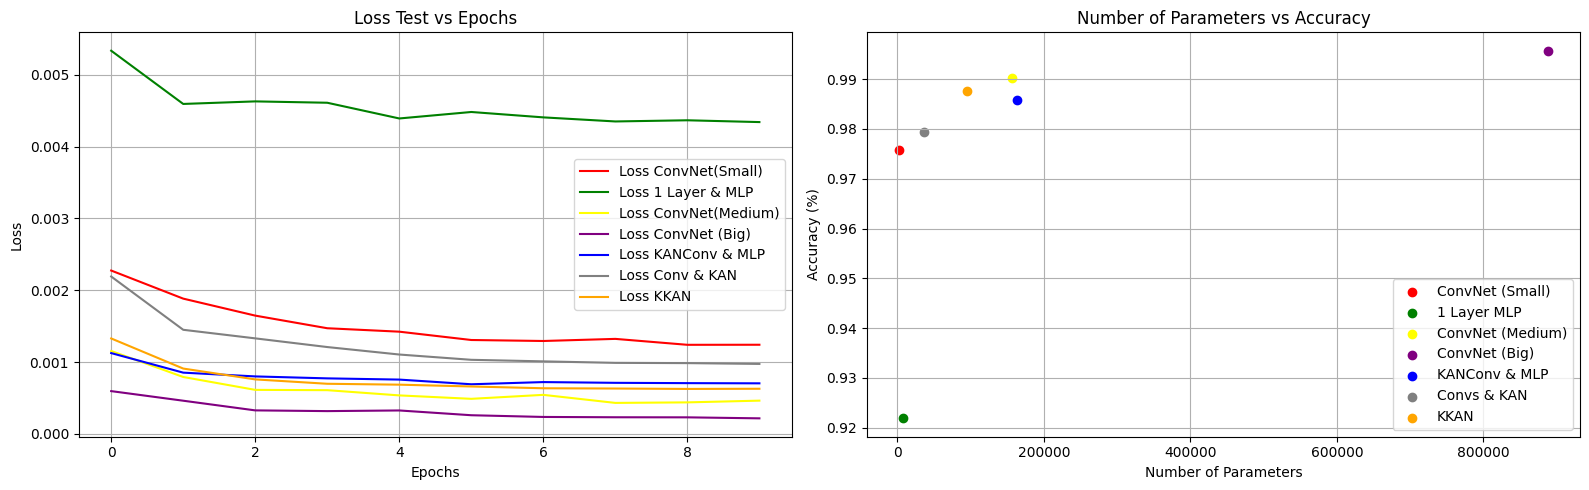

In [19]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.plot(all_test_loss_SimpleCNN, label='Loss ConvNet(Small)', color='red')
ax1.plot(all_test_loss_SimpleLinear, label='Loss 1 Layer & MLP', color='green')
ax1.plot(all_test_loss_SimpleCNN_2, label='Loss ConvNet(Medium)', color='yellow')
ax1.plot(all_test_loss_ConvNet, label='Loss ConvNet (Big)', color='purple')
ax1.plot(all_test_loss_KANC_MLP, label='Loss KANConv & MLP', color='blue')
ax1.plot(all_test_loss_Convs_and_KAN, label='Loss Conv & KAN', color='gray')
ax1.plot(all_test_loss_KKAN_Convolutional_Network, label='Loss KKAN', color='orange')

ax1.set_title('Loss Test vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

ax2.scatter(count_parameters(model_SimpleCNN), max(all_test_accuracy_SimpleCNN), color='red', label='ConvNet (Small)')
ax2.scatter(count_parameters(model_SimpleLinear), max(all_test_accuracy_SimpleLinear), color='green', label='1 Layer MLP')
ax2.scatter(count_parameters(model_SimpleCNN_2), max(all_test_accuracy_SimpleCNN_2), color='yellow', label='ConvNet (Medium)')
ax2.scatter(count_parameters(model_ConvNet), max(all_test_accuracy_ConvNet), color='purple', label='ConvNet (Big)')
ax2.scatter(count_parameters(model_KANC_MLP), max(all_test_accuracy_KANC_MLP), color='blue', label='KANConv & MLP')
ax2.scatter(count_parameters(model_Convs_and_KAN), max(all_test_accuracy_Convs_and_KAN), color='grey', label='Convs & KAN')
ax2.scatter(count_parameters(model_KKAN_Convolutional_Network), max(all_test_accuracy_KKAN_Convolutional_Network), color='orange', label='KKAN')

ax2.set_title('Number of Parameters vs Accuracy')
ax2.set_xlabel('Number of Parameters')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### 10. Compare Accuracyy & Parameter

In [20]:
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Listas para acumular datos
accs = []
precision = []
recall = []
f1s = []
params_counts = []

# Modelos y sus métricas correspondientes
models = [model_SimpleLinear, model_SimpleCNN,model_SimpleCNN_2, model_ConvNet, model_KANC_MLP, model_Convs_and_KAN, model_KKAN_Convolutional_Network]
# all_accuracys = [all_test_accuracy_SimpleLinear, all_test_accuracy_SimpleCNN, all_test_accuracy_ConvNet, all_test_accuracy_KANC_MLP, all_test_accuracy_Convs_and_KAN, all_test_accuracy_KKAN_Convolutional_Network]
# all_precision = [all_test_precision_SimpleLinear, all_test_precision_SimpleCNN, all_test_precision_ConvNet, all_test_precision_KANC_MLP, all_test_precision_Convs_and_KAN, all_test_precision_KKAN_Convolutional_Network]
# all_recall = [all_test_recall_SimpleLinear, all_test_recall_SimpleCNN, all_test_recall_ConvNet, all_test_recall_KANC_MLP, all_test_recall_Convs_and_KAN, all_test_recall_KKAN_Convolutional_Network]
# all_f1s = [all_test_f1_SimpleLinear, all_test_f1_SimpleCNN, all_test_f1_ConvNet, all_test_f1_KANC_MLP, all_test_f1_Convs_and_KAN, all_test_f1_KKAN_Convolutional_Network]


# Recopilación de datos
for i, m in enumerate(models):
    index = np.argmax(m.all_test_accuracy)
    params_counts.append(count_parameters(m))
    accs.append(m.all_test_accuracy[index])
    precision.append(m.all_test_precision[index])
    recall.append(m.all_test_recall[index])
    f1s.append(m.all_test_f1[index])

# Creación del DataFrame
df = pd.DataFrame({
    "Test Accuracy": accs,
    "Test Precision": precision,
    "Test Recall": recall,
    "Test F1 Score": f1s,
    "Number of Parameters": params_counts
}, index=["1 Layer MLP", "ConvNet (Small)","ConvNet (Medium)", "ConvNet (Big)", "KANConv & MLP", "Simple Conv & KAN", "KKAN"])

df.to_csv('experiment_28x28.csv', index=False)

# Aplicando el estilo
df_styled = df.style.apply(highlight_max, subset=df.columns[:], axis=0).format('{:.3f}')

In [21]:
df_styled

,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Number of Parameters
1 Layer MLP,0.922,0.922,0.921,0.921,7850.000
ConvNet (Small),0.976,0.976,0.976,0.976,2740.000
ConvNet (Medium),0.990,0.990,0.990,0.990,157030.000
ConvNet (Big),0.996,0.996,0.996,0.996,887530.000
KANConv & MLP,0.986,0.986,0.986,0.986,163726.000
Simple Conv & KAN,0.979,0.979,0.979,0.979,37030.000
KKAN,0.988,0.988,0.988,0.988,94650.000
